
##**Proyek Akhir KASDD**

<h2 align="center"><strong>Kafka</strong></h2>

<h3 align="center"><strong>Dataset: Cycling Segments Leaderboard (CSL)</strong></h3>

<p align="center">
Muhammad Daffa'I Rafi Prasetyo<br>
2206029191
</p>

# Deskripsi Dataset dan Preprocessing

Dataset mencakup berbagai informasi, seperti:<br>
* **user_age_group:** Grup usia peserta
* **user_weight_category:** Grup berat badan peserta
* **user_id:** User ID
* **attempt_date:** Tanggal log bersepeda
* **gender:** Jenis kelamin peserta
* **smt_rank:** Rank peserta di suatu segmen dan gender
* **smt_avg_spd:** Kecepatan rata-rata peserta di suatu segmen (lintasan) dalam km/jam
* **smt_finish_seconds:** Waktu yang dibutuhkan peserta untuk menyelesaikan suatu segmen (lintasan) dalam detik
* **smt_name:** Nama segmen (lintasan)
* **act_title:** Judul log aktivitas bersepeda
* **act_avg_spd:** Kecepatan rata-rata peserta di suatu log (sepanjang segmen + di luar segmen) dalam km/jam
* **act_max_spd:** Kecepatan maksimum peserta di suatu log (sepanjang segmen + di luar segmen) dalam km/jam
* **act_total_km:** Total jarak yang ditempuh peserta di suatu log (sepanjang segmen + di luar segmen) dalam km
* **act_moving_seconds:** Total waktu bersepeda peserta di suatu log (sepanjang segmen + di luar segmen) dalam detik
* **act_total_seconds:** Total waktu suatu log (sepanjang segmen + di luar segmen) dalam detik
* **has_hr_data:** Ada atau tidaknya data detak jantung di log tersebut

In [1094]:
!pip install pandas

In [1095]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns #untuk visualisasi
import plotly.express as px #untuk visualisasi
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm

from numpy import polyfit
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, OrdinalEncoder

In [1096]:
import warnings
warnings.filterwarnings('ignore')

## Membuat dan Membaca Informasi *Dataframe*

In [1097]:
df = pd.read_csv("https://drive.google.com/uc?id=1FUIyjpZSSDVb9QAvHR5Am4v3BxTYQu4x")

In [1098]:
test_data = pd.read_csv("https://drive.google.com/uc?id=1qPBRTfLz4wPgirhCcROaicQk0SDfeH9C")

In [1099]:
df_merged = pd.concat([df, test_data], axis=0)

In [1100]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7078 entries, 0 to 785
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_age_group        7078 non-null   object 
 1   user_id               7078 non-null   int64  
 2   attempt_date          7078 non-null   object 
 3   gender                6292 non-null   object 
 4   smt_rank              7078 non-null   int64  
 5   smt_avg_spd           7078 non-null   float64
 6   smt_finish_seconds    7078 non-null   int64  
 7   smt_name              7078 non-null   object 
 8   user_weight_category  6682 non-null   object 
 9   act_title             7078 non-null   object 
 10  act_avg_spd           7078 non-null   float64
 11  act_max_spd           7078 non-null   float64
 12  act_total_km          7078 non-null   float64
 13  act_moving_seconds    7078 non-null   int64  
 14  act_total_seconds     7078 non-null   int64  
 15  has_hr_data           7078 

In [1101]:
df_merged.head()

user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
0       25 to 34     1972   2017-12-22    male       712         15.8   
1       25 to 34      239   2015-04-13    male       189         33.2   
2       25 to 34      405   2018-02-07    male       264         23.7   
3       25 to 34      318   2018-08-24    male        50         33.4   
4       25 to 34      628   2020-03-06  female        19         21.3   

   smt_finish_seconds                             smt_name  \
0                 382           Headquarters Business Park   
1                 216                  Oghor 2 SailsIsland   
2                 593                   Starbucks to Majid   
3                 817  Al Fardoos to shellfish round about   
4                 284           Headquarters Business Park   

  user_weight_category         act_title  act_avg_spd  act_max_spd  \
0      54 kg and under        Night Ride         13.6         34.9   
1     105 kg to 114 kg        Night Ride         21.5         43.2   
2          75 to 84 kg      Evening Ride         26.7         92.9   
3          75 to 84 kg    Afternoon Ride         31.4         54.4   
4      54 kg and under  ثاني تمرين ١٠٠كم         19.9         43.2   

   act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
0         19.24                5103               5103            0  6977  
1         23.47                3926               3926            0  3518  
2         38.23                5152               5152            0   415  
3         65.77                7548               7548            1  1755  
4         96.53               17493              17493            0  7088

In [1102]:
df_merged.describe()

user_id     smt_rank  smt_avg_spd  smt_finish_seconds  act_avg_spd  \
count  7078.000000  7078.000000  7078.000000         7078.000000  7078.000000   
mean    782.694405   170.753320    26.856329          531.373834    22.723142   
std     538.270218   172.390404     8.482145          423.645808     5.829951   
min       1.000000     1.000000     0.800000          112.000000     0.000000   
25%     336.000000    36.000000    21.300000          267.000000    18.700000   
50%     706.000000   106.500000    26.600000          441.500000    22.200000   
75%    1092.750000   265.000000    32.500000          653.000000    26.500000   
max    2254.000000   805.000000    87.300000         9224.000000    75.200000   

       act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
count  7078.000000   7078.000000        7.078000e+03       7.078000e+03   
mean     44.864821     42.294493        1.221707e+04       1.221707e+04   
std      16.941726     27.923562        2.049949e+05       2.049949e+05   
min       8.600000      2.280000        2.640000e+02       2.640000e+02   
25%      36.700000     23.540000        4.093500e+03       4.093500e+03   
50%      42.100000     37.715000        5.771000e+03       5.771000e+03   
75%      48.600000     52.210000        8.100000e+03       8.100000e+03   
max     690.800000    706.590000        1.167978e+07       1.167978e+07   

       has_hr_data           id  
count   7078.00000  7078.000000  
mean       0.19935  3930.150042  
std        0.39954  2268.209422  
min        0.00000     0.000000  
25%        0.00000  1969.250000  
50%        0.00000  3920.500000  
75%        0.00000  5895.750000  
max        1.00000  7863.000000

## Handle *Missing Values*

In [1103]:
df_merged.isnull().sum()

user_age_group            0
user_id                   0
attempt_date              0
gender                  786
smt_rank                  0
smt_avg_spd               0
smt_finish_seconds        0
smt_name                  0
user_weight_category    396
act_title                 0
act_avg_spd               0
act_max_spd               0
act_total_km              0
act_moving_seconds        0
act_total_seconds         0
has_hr_data               0
id                        0
dtype: int64

In [1104]:
col_na = df_merged.isnull().sum().sort_values(ascending=False)
percent = col_na / len(df_merged)

missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])

                      Total   Percent
gender                  786  0.111048
user_weight_category    396  0.055948


In [1105]:
df_merged[df_merged.isna().any(axis=1)]

user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
18        25 to 34      222   2019-10-23   male        76         33.2   
54        25 to 34      320   2018-01-13   male       286         24.1   
69        35 to 44      824   2019-09-16   male       254         28.2   
71        25 to 34     1925   2019-12-09   male       624         18.2   
80        25 to 34      222   2019-12-16   male        82         23.4   
..             ...      ...          ...    ...       ...          ...   
781       45 to 54     1005   2018-09-06    NaN        85         19.3   
782       25 to 34      208   2020-03-14    NaN        43         41.2   
783       35 to 44      781   2014-02-24    NaN       297         23.8   
784   19 and under     1360   2015-12-30    NaN        56          8.1   
785       20 to 24       70   2019-11-22    NaN        13          7.8   

     smt_finish_seconds                                    smt_name  \
18                  512                            King Street side   
54                  250                  Headquarters Business Park   
69                  254                         Oghor 2 SailsIsland   
71                  332                  Headquarters Business Park   
80                 1361  S.Ubhur Alkurnaysh South Bound with detour   
..                  ...                                         ...   
781                 728                          Starbucks to Majid   
782                 174                         Oghor 2 SailsIsland   
783                 730                              North Corniche   
784                 883                         Oghor 2 SailsIsland   
785                3175                           Obhur North Short   

    user_weight_category        act_title  act_avg_spd  act_max_spd  \
18                   NaN     Evening Ride         27.6         45.7   
54                   NaN     Evening Ride         20.7         34.6   
69                   NaN     Evening Ride         23.2         36.4   
71                   NaN   Afternoon Ride         17.3         43.6   
80                   NaN          الجوهرة         27.5         46.4   
..                   ...              ...          ...          ...   
781          65 to 74 kg     Morning Ride         24.4         35.6   
782      54 kg and under   Afternoon Ride         25.5         51.1   
783     105 kg to 114 kg     Evening Ride         19.3         32.4   
784          65 to 74 kg     Evening Ride         18.1         41.8   
785      54 kg and under  100k challenge          24.3         49.7   

     act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
18          40.23                5253               5253            0  2057  
54          14.11                2451               2451            0  6552  
69          50.50                7821               7821            0  4224  
71          17.44                3640               3640            0  6888  
80          53.37                6987               6987            0  1226  
..            ...                 ...                ...          ...   ...  
781         74.71               11025              11025            0  1055  
782         63.13                8925               8925            0  3322  
783         21.32                3971               3971            0  5652  
784         17.95                3562               3562            0  3131  
785        100.73               14930              14930            0  1454  

[1146 rows x 17 columns]

In [1106]:
df_clean = df_merged.copy()

In [1107]:
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

In [1108]:
df_clean['user_weight_category'] = fill_null_mode(df_clean['user_weight_category'])

In [1109]:
df_clean.isnull().sum()

user_age_group            0
user_id                   0
attempt_date              0
gender                  786
smt_rank                  0
smt_avg_spd               0
smt_finish_seconds        0
smt_name                  0
user_weight_category      0
act_title                 0
act_avg_spd               0
act_max_spd               0
act_total_km              0
act_moving_seconds        0
act_total_seconds         0
has_hr_data               0
id                        0
dtype: int64

## Handle duplicate data

In [1110]:
duplicate_rows = df_clean[df_clean.duplicated()]
duplicate_total_rows, duplicate_total_attributes = duplicate_rows.shape
print('jumlah data duplicate: ', duplicate_total_rows)

jumlah data duplicate:  0


In [1111]:
df_clean.drop(["id", "user_id"], axis = 1, inplace=True)

## Handle Outlier

In [1112]:
def hitung_outlier(df) :
    outliers_dict = {}
    outliers_percentage_dict = {}

    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.select_dtypes(include=numerics) :
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        outliers = df[col][
            (df[col] > q3 + 1.5 * iqr) |
            (df[col] < q1 - 1.5 * iqr)
        ]
        outliers_dict[col] = len(outliers)
        outliers_percentage_dict[col] = (len(outliers) / len(df)) * 100

    outliers_values = tuple(outliers_dict.values())
    outliers_percentage_values = tuple(outliers_percentage_dict.values())

    outliers_df = pd.DataFrame([outliers_values, outliers_percentage_values],
                            columns=list(outliers_dict.keys()),
                            index=['Outliers count', 'Outliers percentage (%)'])
    display(outliers_df)

In [1113]:
hitung_outlier(df_merged)

user_id   smt_rank  smt_avg_spd  \
Outliers count           26.000000  181.00000    62.000000   
Outliers percentage (%)   0.367335    2.55722     0.875954   

                         smt_finish_seconds  act_avg_spd  act_max_spd  \
Outliers count                   313.000000    97.000000   428.000000   
Outliers percentage (%)            4.422153     1.370444     6.046906   

                         act_total_km  act_moving_seconds  act_total_seconds  \
Outliers count             352.000000          325.000000         325.000000   
Outliers percentage (%)      4.973156            4.591693           4.591693   

                         has_hr_data   id  
Outliers count            1411.00000  0.0  
Outliers percentage (%)     19.93501  0.0

<Axes: >

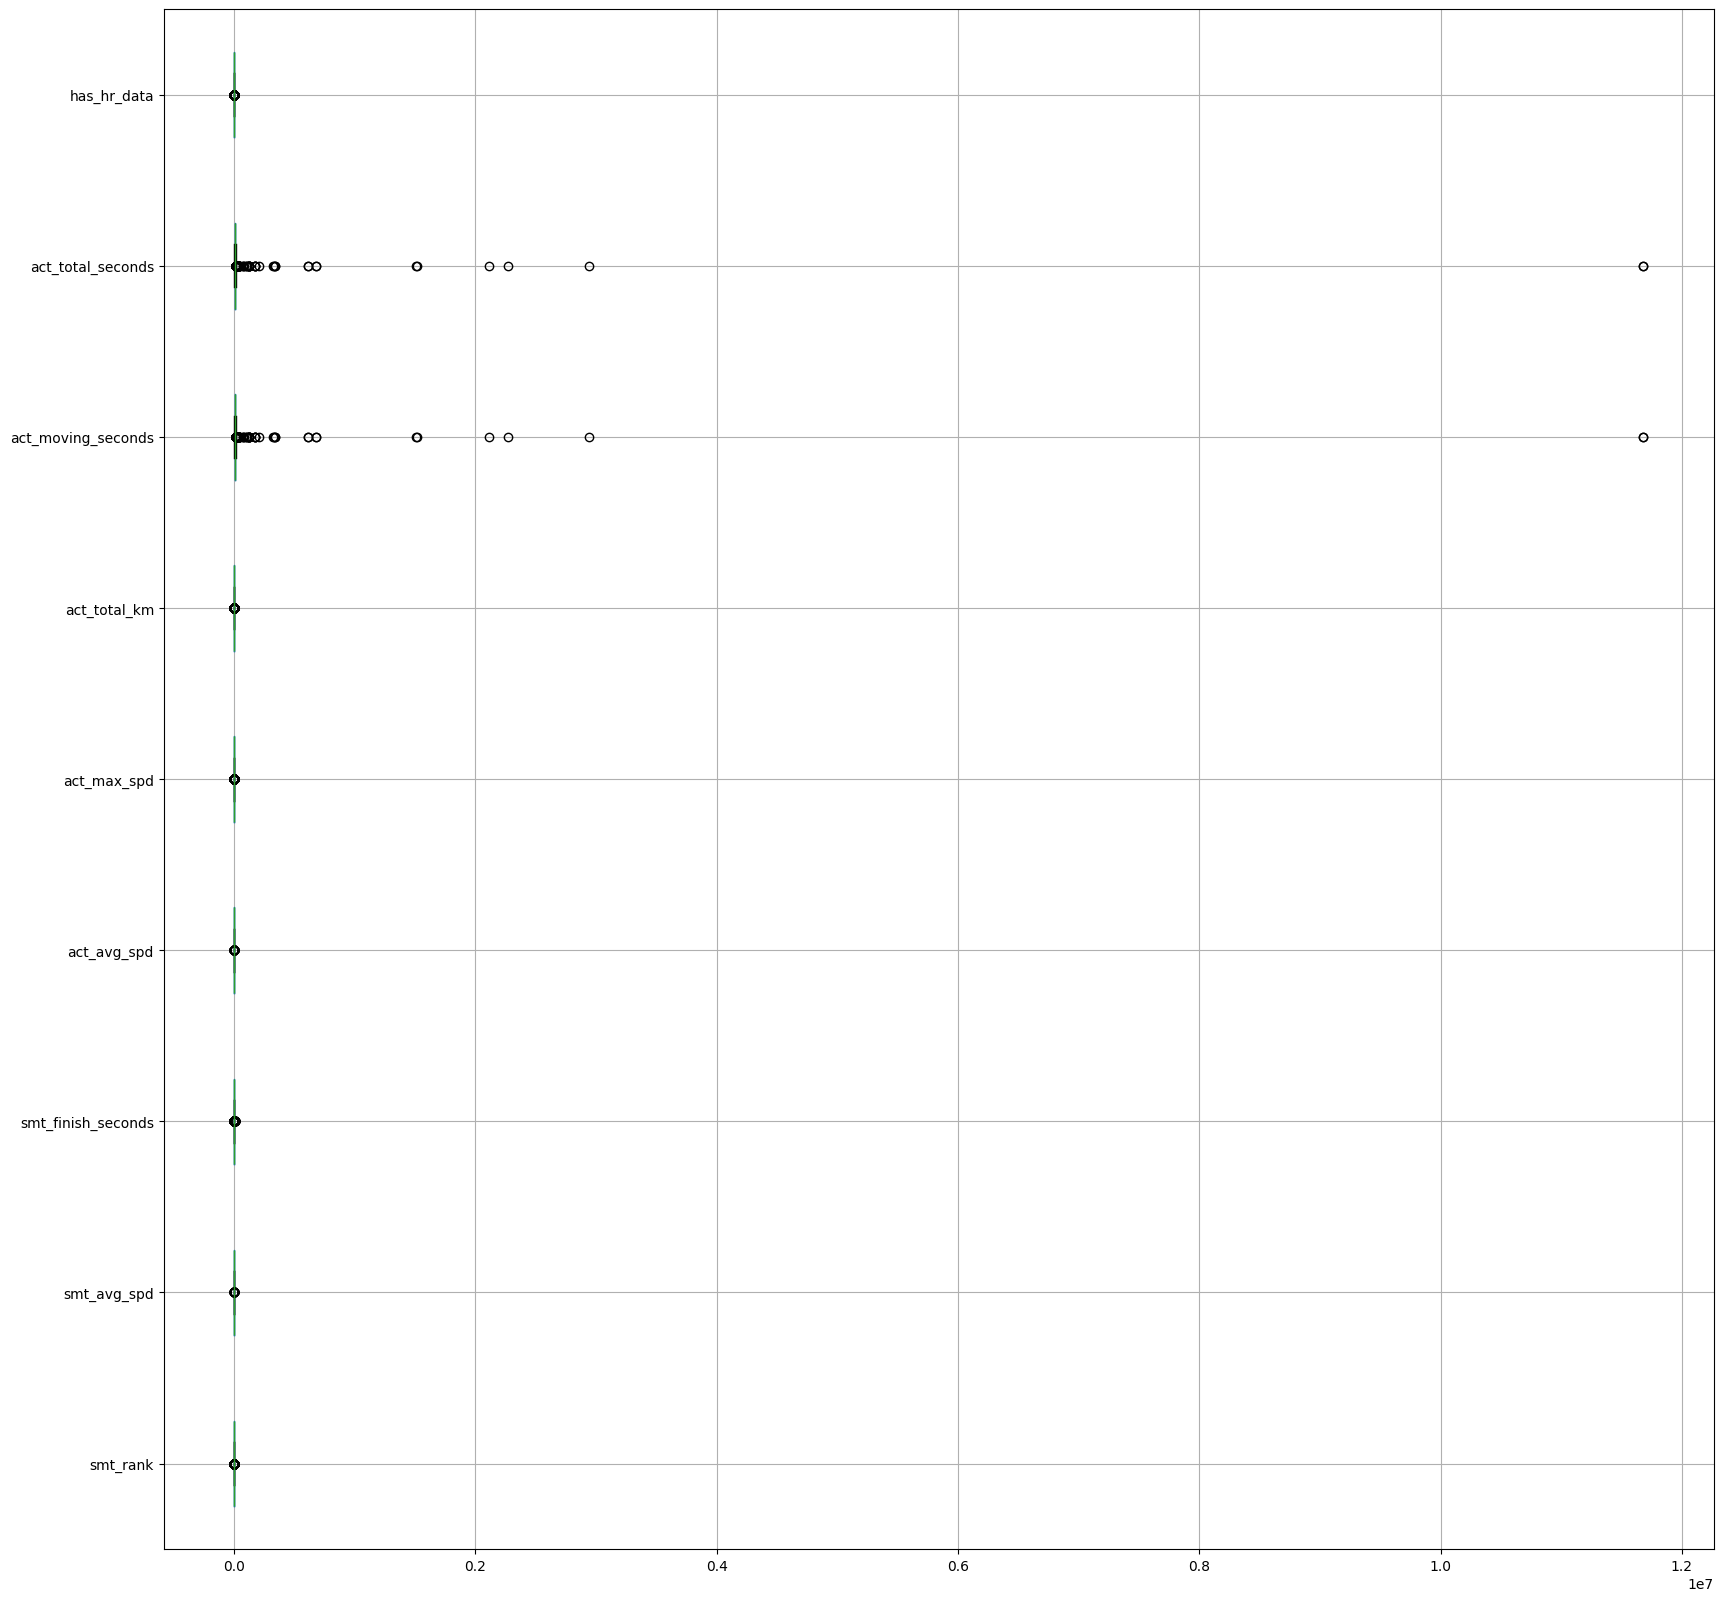

In [1114]:
df_clean.boxplot(vert=False, figsize=(20,20))

In [1115]:
def handle_outliers(df):
    # Pilih hanya kolom numerik
    selected_columns = df.select_dtypes(include='number')
    print(selected_columns)

    for col in selected_columns:
        q1 = np.percentile(df[col], 25)  # Kuartil pertama
        q3 = np.percentile(df[col], 75)  # Kuartil ketiga
        iqr = q3 - q1                    # Interquartile Range
        lower_bound = q1 - 1.5 * iqr     # Batas bawah
        upper_bound = q3 + 1.5 * iqr     # Batas atas

        # Hapus baris yang memiliki nilai di luar batas bawah atau atas
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    print(f"Jumlah data sebelum: {df.shape[0]}")
    print(f"Jumlah data setelah: {df.shape[0]}")
    return df


# Exploratory Data Analysis

## Bagaimana karakteristik performa dan fisik top 10% pemenang?


### Mengelompokan data sesuai dengan nama lintasan, gender, dan grup usia

In [1116]:
# Kelompokkan dan sort berdasarkan kolom yang diinginkan
df_sorted = df.sort_values(['smt_rank']).groupby(['smt_name', 'gender', 'user_age_group'])

# Nampilin data yang sudah sorted berdasarkan smt_rank perkelompok smt_name, gender, dan user_age_group
for group_name, group_data in df_sorted:
    print(f"Group: {group_name}")
    display(group_data)


Group: ('Al Fardoos to shellfish round about', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2474       20 to 24     1053   2018-07-27  female         1         23.3   

      smt_finish_seconds                             smt_name  \
2474                1168  Al Fardoos to shellfish round about   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
2474          65 to 74 kg  Morning Ride         22.2         37.1   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2474        101.26               16425              16425            0  1705

Group: ('Al Fardoos to shellfish round about', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
1383       25 to 34      610   2018-07-27  female         1         25.3   

      smt_finish_seconds                             smt_name  \
1383                1080  Al Fardoos to shellfish round about   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
1383          65 to 74 kg  Morning Ride         23.5         33.5   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
1383        100.06               15342              15342            1  1780

Group: ('Al Fardoos to shellfish round about', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5804   19 and under       13   2019-11-01   male         1         40.6   
5634   19 and under       46   2018-02-03   male         2         40.5   
1622   19 and under     1129   2018-10-05   male         3         39.9   
3658   19 and under       21   2019-01-11   male         4         37.0   
4338   19 and under        2   2019-03-09   male         5         35.9   
2314   19 and under       17   2017-11-11   male         6         34.9   
3826   19 and under       34   2019-01-12   male         7         33.7   
5868   19 and under        4   2017-12-13   male         8         30.3   
423    19 and under        6   2017-04-14   male         9         30.2   

      smt_finish_seconds                             smt_name  \
5804                 671  Al Fardoos to shellfish round about   
5634                 674  Al Fardoos to shellfish round about   
1622                 684  Al Fardoos to shellfish round about   
3658                 738  Al Fardoos to shellfish round about   
4338                 760  Al Fardoos to shellfish round about   
2314                 781  Al Fardoos to shellfish round about   
3826                 809  Al Fardoos to shellfish round about   
5868                 901  Al Fardoos to shellfish round about   
423                  903  Al Fardoos to shellfish round about   

     user_weight_category           act_title  act_avg_spd  act_max_spd  \
5804          65 to 74 kg        Morning Ride         36.4         58.3   
5634          75 to 84 kg      Afternoon Ride         26.6         51.8   
1622          55 to 64 kg        Morning Ride         34.3         55.1   
3658          55 to 64 kg  Early morning ride         30.4         50.4   
4338          65 to 74 kg        Morning Ride         28.2         49.0   
2314      54 kg and under        Morning Ride         28.2         47.2   
3826      54 kg and under        Morning Ride         29.4         54.4   
5868      54 kg and under      Afternoon Ride         31.4         47.5   
423       54 kg and under        Morning Ride         24.4         39.2   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
5804         54.02                5339               5339            1  1686  
5634         50.55                6843               6843            1  1687  
1622         73.43                7706               7706            0  1688  
3658         97.70               11552              11552            0  1689  
4338         98.08               12540              12540            0  1690  
2314         63.57                8125               8125            0  1691  
3826         87.27               10679              10679            0  1692  
5868         70.23                8043               8043            0  1693  
423          61.73                9105               9105            0  1694

Group: ('Al Fardoos to shellfish round about', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1040       20 to 24        2   2019-09-27   male         1         43.9   
5918       20 to 24       51   2016-01-01   male         2         40.9   
2469       20 to 24        4   2018-02-03   male         3         40.5   
3082       20 to 24       58   2018-10-05   male         4         38.8   
427        20 to 24       56   2017-05-26   male         5         38.6   
1580       20 to 24     1101   2019-01-18   male         6         35.5   
270        20 to 24       53   2019-02-01   male         8         31.7   
4369       20 to 24      512   2019-09-20   male        10          6.6   

      smt_finish_seconds                             smt_name  \
1040                 621  Al Fardoos to shellfish round about   
5918                 666  Al Fardoos to shellfish round about   
2469                 673  Al Fardoos to shellfish round about   
3082                 702  Al Fardoos to shellfish round about   
427                  706  Al Fardoos to shellfish round about   
1580                 769  Al Fardoos to shellfish round about   
270                  861  Al Fardoos to shellfish round about   
4369                4159  Al Fardoos to shellfish round about   

     user_weight_category       act_title  act_avg_spd  act_max_spd  \
1040          65 to 74 kg    Morning Ride         30.7         52.2   
5918          65 to 74 kg    Morning Ride         33.1         48.2   
2469      54 kg and under  Afternoon Ride         29.0         54.0   
3082                  NaN    Morning Ride         33.9         52.2   
427           65 to 74 kg    Morning Ride         32.7         56.9   
1580          85 to 95 kg    Morning Ride         33.0         52.6   
270           75 to 84 kg    Morning Ride         29.4         46.1   
4369      54 kg and under    Evening Ride         11.6         30.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
1040         64.03                7511               7511            0  1695  
5918        115.49               12561              12561            0  1696  
2469         89.28               11073              11073            0  1697  
3082         71.05                7550               7550            1  1698  
427          70.79                7797               7797            0  1699  
1580        117.80               12832              12832            0  1700  
270         115.85               14187              14187            0  1702  
4369         24.36                7564               7564            0  1704

Group: ('Al Fardoos to shellfish round about', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
6006       25 to 34      157   2019-09-27   male         2         44.1   
4666       25 to 34      592   2019-09-27   male         3         43.8   
4161       25 to 34      158   2016-10-14   male         4         43.5   
864        25 to 34      187   2016-10-14   male         5         43.3   
4394       25 to 34       56   2019-12-13   male         6         43.2   
4075       25 to 34     1101   2019-10-18   male         7         42.6   
4141       25 to 34      235   2019-10-11   male         8         42.0   
5753       25 to 34     1130   2019-10-18   male         9         42.0   
2081       25 to 34      170   2019-10-11   male         9         42.0   
4366       25 to 34     1131   2020-03-06   male        11         41.2   
1684       25 to 34      227   2019-11-01   male        12         41.1   
5246       25 to 34     1056   2020-01-10   male        14         40.6   
6086       25 to 34     1133   2019-10-05   male        17         39.9   
4826       25 to 34      204   2019-10-04   male        18         39.7   
2371       25 to 34     1102   2018-02-14   male        18         39.7   
3659       25 to 34      232   2019-03-02   male        20         39.6   
3179       25 to 34      162   2017-12-08   male        22         38.8   
6003       25 to 34      224   2019-03-01   male        28         38.0   
5965       25 to 34     1135   2017-09-15   male        29         37.9   
3723       25 to 34      564   2018-08-24   male        30         37.6   
1548       25 to 34      166   2015-11-13   male        31         37.4   
1237       25 to 34      225   2017-03-04   male        33         36.2   
365        25 to 34     1108   2018-01-05   male        36         35.9   
3989       25 to 34      188   2015-08-07   male        37         35.7   
1070       25 to 34      164   2019-10-11   male        38         35.6   
1232       25 to 34     1104   2019-10-11   male        39         35.5   
323        25 to 34      282   2017-11-11   male        42         35.0   
936        25 to 34      417   2017-11-11   male        43         34.9   
3169       25 to 34      201   2015-11-13   male        44         34.9   
4585       25 to 34      219   2016-10-22   male        44         34.9   
2536       25 to 34      281   2018-09-28   male        46         34.7   
2017       25 to 34      216   2016-10-22   male        47         34.5   
5219       25 to 34      176   2017-03-10   male        48         34.0   
993        25 to 34      367   2016-11-05   male        49         33.7   
3          25 to 34      318   2018-08-24   male        50         33.4   
976        25 to 34     1136   2017-11-11   male        51         33.3   
6097       25 to 34      264   2019-10-26   male        52         33.1   
4822       25 to 34     1137   2017-08-11   male        54         32.4   
469        25 to 34      199   2018-09-14   male        55         32.3   
5140       25 to 34      267   2018-05-04   male        56         31.9   
4630       25 to 34      193   2019-09-27   male        57         30.7   
4213       25 to 34      251   2017-04-14   male        58         30.1   
3566       25 to 34     1078   2018-10-27   male        59         29.2   
3675       25 to 34      167   2013-12-07   male        61         28.1   
2655       25 to 34      334   2016-04-01   male        62         27.9   
1436       25 to 34      660   2016-09-30   male        64         27.7   
1179       25 to 34     1138   2017-04-06   male        65         26.6   
4499       25 to 34      270   2018-07-14   male        66         25.4   
2539       25 to 34      325   2020-01-11   male        67         25.1   
893        25 to 34      277   2018-07-27   male        68         24.8   
2886       25 to 34       91   2019-08-30   male        69         24.5   
250        25 to 34      494   2017-11-14   male        70         23.2   
2363       25 to 34     1071  

Group: ('Al Fardoos to shellfish round about', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3125       35 to 44      639   2017-12-08   male         1         47.5   
4632       35 to 44     1139   2019-10-18   male         5         42.7   
3045       35 to 44     1072   2019-12-13   male         7         41.8   
1493       35 to 44      268   2019-08-30   male         8         41.3   
580        35 to 44     1073   2017-12-01   male         9         40.0   
4890       35 to 44      674   2019-01-11   male        11         39.9   
1019       35 to 44      682   2015-11-06   male        11         39.9   
5977       35 to 44      646   2015-11-06   male        14         39.6   
269        35 to 44      714   2018-10-26   male        15         39.5   
4447       35 to 44      231   2019-01-11   male        16         39.0   
4066       35 to 44      675   2020-01-10   male        17         38.8   
3804       35 to 44      642   2019-12-27   male        18         38.6   
3941       35 to 44      666   2019-12-20   male        19         38.5   
2922       35 to 44      652   2017-03-10   male        20         37.4   
619        35 to 44      640   2016-02-06   male        21         37.2   
5955       35 to 44      651   2018-10-19   male        22         36.7   
29         35 to 44      663   2019-06-29   male        23         36.7   
4516       35 to 44      660   2016-11-18   male        24         36.4   
565        35 to 44      669   2017-07-28   male        25         36.4   
6245       35 to 44      667   2019-10-25   male        26         36.1   
765        35 to 44      662   2017-02-24   male        28         35.7   
4241       35 to 44      777   2019-04-05   male        29         35.1   
5481       35 to 44      659   2017-09-23   male        30         34.9   
2920       35 to 44      915   2020-03-06   male        32         34.9   
1790       35 to 44      685   2016-10-22   male        33         34.7   
3155       35 to 44      672   2014-10-31   male        34         34.5   
2513       35 to 44     1141   2017-11-11   male        35         34.4   
5815       35 to 44      654   2017-04-08   male        36         34.1   
1762       35 to 44      649   2016-07-22   male        38         33.3   
319        35 to 44     1111   2019-09-27   male        39         32.7   
5547       35 to 44      216   2019-01-12   male        39         32.7   
3090       35 to 44      679   2016-11-18   male        41         32.3   
2043       35 to 44      355   2018-09-21   male        42         31.6   
5323       35 to 44     1142   2017-08-18   male        43         30.3   
5365       35 to 44      694   2017-04-14   male        44         30.2   
1143       35 to 44      676   2017-04-07   male        45         29.4   
3643       35 to 44      683   2016-11-05   male        46         29.3   
5484       35 to 44      703   2020-01-03   male        47         28.9   
5073       35 to 44     1056   2020-02-21   male        47         28.9   
2807       35 to 44     1083   2019-01-25   male        49         28.4   
1061       35 to 44      860   2019-11-08   male        50         28.3   
1134       35 to 44     1117   2019-01-25   male        51         28.0   
521        35 to 44      653   2017-05-19   male        53         25.6   
4933       35 to 44     1143   2019-11-08   male        54         23.6   
3301       35 to 44      739   2019-05-24   male        56         21.6   
1614       35 to 44     1088   2019-12-13   male        57         21.0   
5374       35 to 44     1145   2017-07-28   male        58         14.4   

      smt_finish_seconds                             smt_name  \
3125                 574  Al Fardoos to shellfish round about   
4632                 638  Al Fardoos to shellfish round about   
3045                 652  Al Fardoos to shellfish round about   
1493                 661  Al Fardoos to shellfish round about   
580                  682  Al Fardoos to shellfish round about   
4890          

Group: ('Al Fardoos to shellfish round about', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5788       45 to 54     1147   2019-09-27   male         2         44.3   
2874       45 to 54      940   2016-10-14   male         3         43.6   
5964       45 to 54      933   2016-01-30   male         4         43.4   
3803       45 to 54     1089   2019-10-11   male         6         41.8   
2961       45 to 54      682   2016-12-02   male         7         40.0   
2412       45 to 54      946   2015-12-11   male         8         39.6   
5304       45 to 54     1090   2019-12-20   male         9         39.2   
2068       45 to 54      652   2019-09-13   male        10         38.7   
1096       45 to 54      942   2014-10-10   male        12         37.9   
5438       45 to 54      978   2017-03-04   male        13         37.0   
6033       45 to 54      970   2019-01-11   male        14         36.8   
4880       45 to 54      968   2015-03-20   male        15         36.3   
4245       45 to 54      941   2016-10-14   male        16         36.2   
5492       45 to 54     1148   2019-08-16   male        16         36.2   
4958       45 to 54     1094   2019-12-20   male        18         36.1   
523        45 to 54     1121   2018-04-13   male        20         35.7   
572        45 to 54     1091   2019-12-20   male        21         35.6   
3261       45 to 54     1119   2019-10-11   male        22         35.4   
5005       45 to 54      938   2016-03-19   male        24         34.8   
4955       45 to 54      991   2019-08-02   male        26         34.0   
2873       45 to 54     1092   2018-06-15   male        27         33.8   
4464       45 to 54      685   2017-10-21   male        28         33.5   
95         45 to 54      972   2017-04-14   male        32         31.2   
1681       45 to 54      969   2019-02-02   male        34         29.9   
1434       45 to 54     1096   2019-02-16   male        35         28.8   
4214       45 to 54      952   2019-01-11   male        36         26.4   
512        45 to 54      998   2017-09-29   male        37         26.0   
2254       45 to 54      965   2020-01-18   male        38         25.8   
2541       45 to 54     1149   2019-10-12   male        39         21.1   
1109       45 to 54     1027   2017-04-21   male        40         17.8   

      smt_finish_seconds                             smt_name  \
5788                 616  Al Fardoos to shellfish round about   
2874                 626  Al Fardoos to shellfish round about   
5964                 628  Al Fardoos to shellfish round about   
3803                 653  Al Fardoos to shellfish round about   
2961                 682  Al Fardoos to shellfish round about   
2412                 688  Al Fardoos to shellfish round about   
5304                 696  Al Fardoos to shellfish round about   
2068                 704  Al Fardoos to shellfish round about   
1096                 720  Al Fardoos to shellfish round about   
5438                 737  Al Fardoos to shellfish round about   
6033                 741  Al Fardoos to shellfish round about   
4880                 752  Al Fardoos to shellfish round about   
4245                 753  Al Fardoos to shellfish round about   
5492                 753  Al Fardoos to shellfish round about   
4958                 756  Al Fardoos to shellfish round about   
523                  763  Al Fardoos to shellfish round about   
572                  765  Al Fardoos to shellfish round about   
3261                 770  Al Fardoos to shellfish round about   
5005                 783  Al Fardoos to shellfish round about   
4955                 801  Al Fardoos to shellfish round about   
2873                 807  Al Fardoos to shellfish round about   
4464                 815  Al Fardoos to shellfish round about   
95                   875  Al Fardoos to shellfish round about   
1681                 912  Al Fardoos to shellfish round about   
1434                 948  Al Fardoos to shellfish roun

Group: ('Al Fardoos to shellfish round about', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1047       55 to 64      940   2018-04-27   male         2         43.6   
3604       55 to 64     1039   2017-11-24   male         5         34.8   
3282       55 to 64     1127   2017-03-31   male         6         30.1   
5243       55 to 64     1128   2018-01-19   male         8         27.5   

      smt_finish_seconds                             smt_name  \
1047                 625  Al Fardoos to shellfish round about   
3604                 784  Al Fardoos to shellfish round about   
3282                 907  Al Fardoos to shellfish round about   
5243                 991  Al Fardoos to shellfish round about   

     user_weight_category             act_title  act_avg_spd  act_max_spd  \
1047          55 to 64 kg          Morning Ride         29.5         56.5   
3604          65 to 74 kg          Morning Ride         27.2         44.3   
3282          55 to 64 kg  March 31, 2017 Lap 1         24.8         41.8   
5243      54 kg and under          Morning Ride         21.6         37.4   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
1047         38.51                4704               4704            1  1881  
3604        106.56               14109              14109            1  1884  
3282         46.27                6704               6704            1  1885  
5243        103.11               17161              17161            0  1887

Group: ('Al Fardoos to shellfish round about', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2836            75+     1049   2019-08-02   male         1         40.1   

      smt_finish_seconds                             smt_name  \
2836                 680  Al Fardoos to shellfish round about   

     user_weight_category        act_title  act_avg_spd  act_max_spd  \
2836          85 to 95 kg  August 2nd 2019         28.1         53.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2836         85.89               11000              11000            0  1889

Group: ('Headquarters Business Park', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3704   19 and under     1674   2019-11-23  female         1         40.8   
5062   19 and under       49   2019-12-02  female         2         24.9   
5047   19 and under     1675   2019-01-13  female         3         24.7   
2796   19 and under     1676   2018-09-04  female         4         24.0   
1796   19 and under       47   2018-09-15  female         5         23.7   
5390   19 and under     1677   2018-11-14  female         6         23.1   
1760   19 and under       48   2019-12-22  female         8         18.2   
692    19 and under       50   2019-09-27  female        10         15.3   
1349   19 and under     1679   2018-12-29  female        11         12.5   
3348   19 and under     1680   2019-10-22  female        12          5.8   
2828   19 and under     1681   2019-10-22  female        13          5.7   
5973   19 and under     1683   2020-02-02  female        15          5.2   

      smt_finish_seconds                    smt_name user_weight_category  \
3704                 148  Headquarters Business Park          55 to 64 kg   
5062                 242  Headquarters Business Park      54 kg and under   
5047                 244  Headquarters Business Park      54 kg and under   
2796                 251  Headquarters Business Park      54 kg and under   
1796                 255  Headquarters Business Park      54 kg and under   
5390                 261  Headquarters Business Park      54 kg and under   
1760                 332  Headquarters Business Park      54 kg and under   
692                  394  Headquarters Business Park      54 kg and under   
1349                 483  Headquarters Business Park      54 kg and under   
3348                1046  Headquarters Business Park      54 kg and under   
2828                1054  Headquarters Business Park      54 kg and under   
5973                1150  Headquarters Business Park      54 kg and under   

             act_title  act_avg_spd  act_max_spd  act_total_km  \
3704      Morning Ride         16.4         79.9         20.99   
5062        Night Ride         17.5         78.8          8.65   
5047      Evening Ride         20.8         33.1         22.48   
2796    Afternoon Ride         20.1         40.3         16.45   
1796  من أرهب التمارين         17.7         31.3         54.53   
5390        Night Ride         18.9         35.3         21.93   
1760  20k evening ride         17.2         24.1         21.19   
692       Morning ride         17.5         30.6         36.43   
1349      Morning Ride         14.3         23.0         11.51   
3348    Afternoon Ride          6.4         16.6          4.76   
2828    Afternoon Ride          5.9         11.9          4.88   
5973      Evening Ride          7.8         18.4          3.65   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3704                4612               4612            0  6037  
5062                1777               1777            0  6038  
5047                3897               3897            0  6039  
2796                2946               2946            0  6040  
1796               11094              11094            0  6041  
5390                4178               4178            0  6042  
1760                4437               4437            0  6044  
692                 7480               7480            0  6046  
1349                2898               2898            0  6047  
3348                2688               2688            0  6048  
2828                2955               2955            0  6049  
5973                1698               1698            0  6051

Group: ('Headquarters Business Park', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3717       20 to 24     1053   2018-11-14  female         1         27.4   
359        20 to 24     1054   2019-11-12  female         2         26.2   
3927       20 to 24     1758   2018-01-14  female         3         24.3   
5255       20 to 24     1760   2019-01-12  female         5         19.9   
542        20 to 24     1761   2019-11-10  female         6         18.7   
2998       20 to 24     1397   2020-02-03  female         7         17.3   
1587       20 to 24     1396   2019-11-20  female         8         16.4   
3290       20 to 24     1765   2019-10-22  female        12         10.7   
1195       20 to 24     1766   2019-03-03  female        13          6.8   
3194       20 to 24     1768   2019-10-22  female        16          3.8   

      smt_finish_seconds                    smt_name user_weight_category  \
3717                 220  Headquarters Business Park          65 to 74 kg   
359                  230  Headquarters Business Park      54 kg and under   
3927                 248  Headquarters Business Park      54 kg and under   
5255                 303  Headquarters Business Park      54 kg and under   
542                  323  Headquarters Business Park      54 kg and under   
2998                 349  Headquarters Business Park      54 kg and under   
1587                 367  Headquarters Business Park      54 kg and under   
3290                 563  Headquarters Business Park      54 kg and under   
1195                 889  Headquarters Business Park      54 kg and under   
3194                1573  Headquarters Business Park                  NaN   

                                       act_title  act_avg_spd  act_max_spd  \
3717                     Two Amigas Morning Ride         27.4         39.2   
359                                   Night Ride         22.0         34.6   
3927                                  Night Ride         19.7         37.1   
5255                              Afternoon Ride         18.1         35.6   
542        محاوله في تعديل المزاج sleeping face          16.9         65.9   
2998                                ليال في موت          18.7         51.8   
1587                                Evening Ride         16.4         36.4   
3290                              Afternoon Ride          9.3         20.2   
1195                              Afternoon Ride         32.6        110.9   
3194  طالبات الجامعه العربية المفتوحه تحدي الامل          3.7          8.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3717         30.13                3955               3955            0  6250  
359          40.07                6569               6569            0  6251  
3927          9.24                1692               1692            0  6252  
5255         40.45                8034               8034            0  6254  
542          20.47                4354               4354            0  6255  
2998         31.87                6138               6138            0  6256  
1587         30.95                6804               6804            0  6257  
3290          5.72                2219               2219            0  6261  
1195         42.03                4638               4638            0  6262  
3194          4.85                4668               4668            0  6264

Group: ('Headquarters Business Park', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2599       25 to 34      608   2019-01-13  female         1         35.7   
2770       25 to 34      610   2019-10-01  female         2         29.3   
2020       25 to 34     1053   2019-02-26  female         3         28.7   
6135       25 to 34      616   2018-05-16  female         4         28.2   
698        25 to 34      607   2019-10-30  female         5         26.8   
4661       25 to 34      612   2020-03-06  female         6         25.9   
1960       25 to 34     1217   2018-07-14  female         7         25.2   
3469       25 to 34      614   2019-02-12  female         8         24.6   
5730       25 to 34      617   2019-10-09  female         9         23.9   
2203       25 to 34     2034   2018-11-04  female         9         23.9   
1948       25 to 34     2035   2018-11-27  female        11         23.5   
2200       25 to 34     2036   2020-03-11  female        12         23.0   
47         25 to 34     1513   2020-03-12  female        13         22.7   
138        25 to 34     1514   2019-01-24  female        13         22.7   
5379       25 to 34     2038   2018-11-28  female        16         22.6   
3230       25 to 34      613   2017-03-08  female        17         21.8   
3222       25 to 34      615   2019-09-13  female        18         21.6   
4          25 to 34      628   2020-03-06  female        19         21.3   
2196       25 to 34     2040   2019-09-21  female        21         20.4   
5537       25 to 34      623   2020-02-12  female        22         19.7   
3412       25 to 34      625   2019-04-08  female        23         19.3   
937        25 to 34     2041   2019-01-26  female        24         19.0   
922        25 to 34     2042   2019-05-30  female        25         18.9   
659        25 to 34     2044   2018-11-10  female        27         17.9   
5974       25 to 34      621   2019-11-11  female        28         17.8   
4553       25 to 34      618   2019-10-16  female        28         17.8   
6213       25 to 34      622   2020-02-17  female        30         17.5   
6243       25 to 34     2045   2019-02-10  female        32         17.3   
5154       25 to 34     2046   2018-11-10  female        33         17.0   
5168       25 to 34     2047   2018-04-17  female        34         16.8   
1899       25 to 34     2048   2018-11-12  female        34         16.8   
1487       25 to 34      630   2020-03-10  female        36         16.5   
1928       25 to 34      620   2019-05-15  female        37         16.4   
4837       25 to 34     2050   2019-11-21  female        38         16.4   
5338       25 to 34     2049   2019-03-20  female        38         16.4   
4027       25 to 34     2051   2018-09-01  female        40         16.1   
4729       25 to 34     2052   2020-02-05  female        42         15.8   
2771       25 to 34     1515   2019-01-05  female        43         15.0   
5604       25 to 34     2053   2019-10-03  female        44         14.8   
500        25 to 34      627   2019-12-09  female        45         14.7   
32         25 to 34      609   2019-01-26  female        46         14.3   
4719       25 to 34      626   2019-10-02  female        47         13.4   
1344       25 to 34     2054   2019-11-29  female        48         12.1   
284        25 to 34     2055   2019-12-09  female        49         12.0   
1472       25 to 34     2056   2018-07-05  female        50         11.9   
2848       25 to 34     2057   2019-02-20  female        50         11.9   
1636       25 to 34     2058   2019-11-23  female        52         11.1   
616        25 to 34     2059   2019-12-03  female        53         10.7   
5480       25 to 34     2061   2019-11-29  female        55          9.9   
5989       25 to 34     2062   2020-01-31  female        56          9.3   
756        25 to 34     2063   2019-04-12  female        57          8.6   

      smt_finish_seconds                    smt_name

Group: ('Headquarters Business Park', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4390       35 to 44      923   2019-08-07  female         1         28.2   
6181       35 to 44      924   2018-12-03  female         2         23.3   
766        35 to 44     2184   2018-11-24  female         3         22.1   
1814       35 to 44     2186   2019-09-30  female         5         21.5   
866        35 to 44     2187   2018-11-17  female         6         21.2   
6045       35 to 44     2189   2019-02-20  female         8         20.0   
3573       35 to 44      926   2017-12-08  female        10         19.5   
5905       35 to 44     1146   2018-06-24  female        11         19.3   
4211       35 to 44      928   2019-11-01  female        12         18.9   
5046       35 to 44      927   2019-11-18  female        13         18.8   
3113       35 to 44      929   2019-12-17  female        14         18.7   
6248       35 to 44     2191   2019-04-12  female        16         17.9   
155        35 to 44     2192   2018-12-25  female        17         17.7   
1989       35 to 44     2193   2018-12-25  female        18         17.5   
5442       35 to 44     2194   2018-08-31  female        19         16.7   
2776       35 to 44     2196   2019-02-21  female        21         15.0   
191        35 to 44     2197   2019-04-16  female        22         14.8   
747        35 to 44     2198   2018-11-06  female        23         14.6   
1182       35 to 44     2199   2019-03-17  female        24         14.3   
1863       35 to 44     2200   2018-07-08  female        25         14.1   
2312       35 to 44     2201   2019-01-04  female        26         12.1   
1141       35 to 44     2202   2018-10-01  female        27         11.3   
4070       35 to 44      922   2019-01-10  female        28         10.8   
3630       35 to 44     2203   2020-02-18  female        29         10.2   
4565       35 to 44     2204   2018-11-24  female        30          5.0   

      smt_finish_seconds                    smt_name user_weight_category  \
4390                 214  Headquarters Business Park          65 to 74 kg   
6181                 259  Headquarters Business Park          55 to 64 kg   
766                  273  Headquarters Business Park      54 kg and under   
1814                 281  Headquarters Business Park      54 kg and under   
866                  285  Headquarters Business Park          55 to 64 kg   
6045                 302  Headquarters Business Park          55 to 64 kg   
3573                 310  Headquarters Business Park          75 to 84 kg   
5905                 313  Headquarters Business Park          55 to 64 kg   
4211                 320  Headquarters Business Park      54 kg and under   
5046                 321  Headquarters Business Park          65 to 74 kg   
3113                 323  Headquarters Business Park      54 kg and under   
6248                 338  Headquarters Business Park      54 kg and under   
155                  342  Headquarters Business Park      54 kg and under   
1989                 344  Headquarters Business Park          55 to 64 kg   
5442                 361  Headquarters Business Park          55 to 64 kg   
2776                 403  Headquarters Business Park      54 kg and under   
191                  408  Headquarters Business Park      54 kg and under   
747                  414  Headquarters Business Park          55 to 64 kg   
1182                 421  Headquarters Business Park      54 kg and under   
1863                 428  Headquarters Business Park      54 kg and under   
2312                 498  Headquarters Business Park      54 kg and under   
1141                 536  Headquarters Business Park      54 kg and under   
4070                 560  Headquarters Business Park      54 kg and under   
3630                 594  Headquarters Business Park      54 kg and under   
4565                1217  Headquarters Business Park      54 kg and under   

                         

Group: ('Headquarters Business Park', 'female', '45 to 54')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2347       45 to 54     2235   2018-12-26  female         1         21.6   
1977       45 to 54     2236   2018-05-20  female         3         20.7   
3096       45 to 54     2237   2018-06-01  female         4         18.6   
2419       45 to 54     1621   2020-01-31  female         5         18.6   
4915       45 to 54     2238   2019-02-25  female         6         17.9   
3997       45 to 54     2239   2018-05-27  female         7         17.3   
3459       45 to 54     2240   2019-09-01  female         8         17.1   
3084       45 to 54     1028   2019-11-13  female         9         15.9   
952        45 to 54     2241   2018-07-30  female        10         15.7   
1177       45 to 54     2242   2018-03-25  female        11         14.9   
3892       45 to 54     2244   2019-01-17  female        13         10.8   
2696       45 to 54     1615   2018-01-15  female        15          5.4   

      smt_finish_seconds                    smt_name user_weight_category  \
2347                 280  Headquarters Business Park      54 kg and under   
1977                 292  Headquarters Business Park          55 to 64 kg   
3096                 324  Headquarters Business Park          55 to 64 kg   
2419                 325  Headquarters Business Park          55 to 64 kg   
4915                 338  Headquarters Business Park      54 kg and under   
3997                 349  Headquarters Business Park          75 to 84 kg   
3459                 352  Headquarters Business Park      54 kg and under   
3084                 380  Headquarters Business Park          85 to 95 kg   
952                  384  Headquarters Business Park      54 kg and under   
1177                 405  Headquarters Business Park      54 kg and under   
3892                 560  Headquarters Business Park          75 to 84 kg   
2696                1119  Headquarters Business Park      54 kg and under   

                                              act_title  act_avg_spd  \
2347                                     Afternoon Ride         15.1   
1977                                         Night Ride         16.7   
3096                                         Night Ride         17.4   
2419                                      Corniche Ride         15.6   
4915                                     Afternoon Ride         16.2   
3997                                         Night Ride         17.8   
3459                                     Afternoon Ride         17.4   
3084                              20k Brave Cyclists 12         15.8   
952                                        Evening Ride         14.0   
1177                                       Evening Ride         13.4   
3892                                     Afternoon Ride         11.6   
2696  احلى تمرين مع دراجي جدة سايكلس person biking: ...         18.2   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
2347         28.8         12.87                3066               3066   
1977         26.6          9.20                1978               1978   
3096         67.7         34.46                7142               7142   
2419         98.3         30.88                7115               7115   
4915         45.7         22.26                4941               4941   
3997         39.2          9.47                1912               1912   
3459         34.9         16.35                3383               3383   
3084         26.6         22.51                5140               5140   
952          22.3         13.16                3376               3376   
1177         20.2         10.62                2864               2864   
3892         23.8         14.03                4369               4369   
2696         50.4         32.32                6388               6388   

      has_hr_data    id  
2347            0  7809  
1977            0  7811  
3096            0  7812  
2419      

Group: ('Headquarters Business Park', 'female', '55 to 64')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2761       55 to 64     2251   2019-06-07  female         2         17.9   

      smt_finish_seconds                    smt_name user_weight_category  \
2761                 337  Headquarters Business Park          55 to 64 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
2761  Morning Ride         14.4         33.1          29.5   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2761                7383               7383            0  7855

Group: ('Headquarters Business Park', 'female', '65 to 69')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2023       65 to 69     2252   2019-04-08  female         1          8.1   

      smt_finish_seconds                    smt_name user_weight_category  \
2023                 742  Headquarters Business Park      54 kg and under   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
2023  Morning Bike         12.3         19.8          5.42   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2023                1591               1591            0  7859

Group: ('Headquarters Business Park', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3451   19 and under        2   2019-01-26   male         1         44.4   
1442   19 and under       15   2019-01-13   male         2         44.1   
4656   19 and under        5   2015-02-09   male         3         32.8   
3569   19 and under       27   2018-09-15   male         5         32.1   
2909   19 and under        3   2019-11-12   male         6         31.9   
...             ...      ...          ...    ...       ...          ...   
4876   19 and under     1668   2019-01-18   male        92         10.4   
5250   19 and under     1669   2018-03-23   male        93          9.9   
1158   19 and under     1670   2019-08-13   male        94          9.0   
4175   19 and under     1671   2019-01-06   male        95          8.6   
4736   19 and under     1672   2019-07-21   male        97          4.8   

      smt_finish_seconds                    smt_name user_weight_category  \
3451                 136  Headquarters Business Park          65 to 74 kg   
1442                 137  Headquarters Business Park          85 to 95 kg   
4656                 184  Headquarters Business Park      54 kg and under   
3569                 188  Headquarters Business Park                  NaN   
2909                 189  Headquarters Business Park          65 to 74 kg   
...                  ...                         ...                  ...   
4876                 578  Headquarters Business Park      54 kg and under   
5250                 607  Headquarters Business Park                  NaN   
1158                 674  Headquarters Business Park          55 to 64 kg   
4175                 699  Headquarters Business Park      54 kg and under   
4736                1249  Headquarters Business Park      54 kg and under   

                                              act_title  act_avg_spd  \
3451                                       Morning Ride         37.6   
1442                                     Afternoon Ride         22.4   
4656                        Evening Speeders Group Ride         20.2   
3569                                       Morning Ride         22.7   
2909  Evening Ride winking face flexed biceps man bi...         25.0   
...                                                 ...          ...   
4876                                     Afternoon Ride         13.8   
5250                                         Night Ride         12.8   
1158                                       Morning Ride         15.5   
4175                               تمرين خفيف فالكورنيش         16.6   
4736                                       Evening Ride         11.7   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3451         52.2         21.79                2087               2087   
1442         56.2        103.26               16570              16570   
4656         46.8        103.59               18504              18504   
3569         39.6         41.57                6594               6594   
2909         45.7         50.14                7216               7216   
...           ...           ...                 ...                ...   
4876         25.9         12.46                3250               3250   
5250         33.1         56.43               15909              15909   
1158         41.8          9.65                2249               2249   
4175         47.5         12.11                2633               2633   
4736         33.1          7.72                2371               2371   

      has_hr_data    id  
3451            0  5939  
1442            0  5940  
4656            0  5941  
3569            0  5943  
2909            1  5944  
...           ...   ...  
4876            0  6030  
5250            0  6031  
1158            0  6032  
4175            0  6033  
4736            0  6035  

[81 rows x 17 columns]

Group: ('Headquarters Business Park', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3634       20 to 24       52   2019-04-27   male         1         44.4   
3907       20 to 24       54   2018-12-27   male         2         40.2   
3315       20 to 24     1684   2019-04-19   male         4         37.5   
2041       20 to 24     1685   2019-04-19   male         5         37.3   
3780       20 to 24     1131   2019-04-19   male         5         37.3   
...             ...      ...          ...    ...       ...          ...   
4376       20 to 24     1753   2018-04-10   male       192          5.7   
1788       20 to 24     1393   2018-01-15   male       193          5.4   
4310       20 to 24     1754   2019-01-22   male       195          4.8   
3098       20 to 24     1755   2020-01-14   male       196          4.7   
1305       20 to 24     1756   2018-01-26   male       197          4.1   

      smt_finish_seconds                    smt_name user_weight_category  \
3634                 136  Headquarters Business Park          75 to 84 kg   
3907                 150  Headquarters Business Park          65 to 74 kg   
3315                 161  Headquarters Business Park          75 to 84 kg   
2041                 162  Headquarters Business Park          65 to 74 kg   
3780                 162  Headquarters Business Park      115 kg and over   
...                  ...                         ...                  ...   
4376                1063  Headquarters Business Park          75 to 84 kg   
1788                1112  Headquarters Business Park      54 kg and under   
4310                1263  Headquarters Business Park      54 kg and under   
3098                1298  Headquarters Business Park          65 to 74 kg   
1305                1461  Headquarters Business Park      54 kg and under   

                                              act_title  act_avg_spd  \
3634                                       Morning Ride         41.8   
3907  Crazy wind dashing away man biking: light skin...         30.0   
3315                                  Дневной велозаезд         37.5   
2041                                     Afternoon Ride         39.1   
3780                                     Afternoon Ride         39.4   
...                                                 ...          ...   
4376                                    الواجهة البحرية          6.7   
1788   تمسيكية جدا جميلة مع جدة سايكلست fire man bik...         19.1   
4310                                         Night Ride         13.3   
3098                                       Evening Ride          4.8   
1305                                       Evening Ride          5.7   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3634         60.1         41.65                3583               3583   
3907         58.0        112.10               13463              13463   
3315         64.1         51.14                4906               4906   
2041         64.4         50.68                4664               4664   
3780         63.4         49.92                4558               4558   
...           ...           ...                 ...                ...   
4376         33.8          6.38                3406               3406   
1788         52.6         32.41                6110               6110   
4310         73.8         18.48                5017               5017   
3098         15.5          9.00                6751               6751   
1305         25.9         10.10                6418               6418   

      has_hr_data    id  
3634            1  6052  
3907            0  6053  
3315            0  6055  
2041            0  6056  
3780            1  6057  
...           ...   ...  
4376            0  6243  
1788            0  6244  
4310            0  6246  
3098            0  6247  
1305            0  6248  

[160 rows x 17 columns]

Group: ('Headquarters Business Park', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
6282       25 to 34      146   2019-08-31   male         1         47.2   
3053       25 to 34      157   2019-04-27   male         3         45.4   
493        25 to 34      592   2019-01-26   male         4         45.0   
2773       25 to 34      226   2019-01-26   male         5         44.4   
5261       25 to 34     1139   2019-01-26   male         5         44.4   
...             ...      ...          ...    ...       ...          ...   
2855       25 to 34     2031   2019-11-28   male       801          3.5   
3893       25 to 34     2032   2018-04-06   male       802          2.3   
2948       25 to 34      383   2018-01-24   male       803          2.3   
5398       25 to 34     1300   2019-01-18   male       804          1.7   
1947       25 to 34     2033   2019-01-02   male       805          0.8   

      smt_finish_seconds                    smt_name user_weight_category  \
6282                 128  Headquarters Business Park     105 kg to 114 kg   
3053                 133  Headquarters Business Park      95 kg to 104 kg   
493                  134  Headquarters Business Park          55 to 64 kg   
2773                 136  Headquarters Business Park          65 to 74 kg   
5261                 136  Headquarters Business Park          65 to 74 kg   
...                  ...                         ...                  ...   
2855                1710  Headquarters Business Park      54 kg and under   
3893                2647  Headquarters Business Park          65 to 74 kg   
2948                2669  Headquarters Business Park      115 kg and over   
5398                3498  Headquarters Business Park      54 kg and under   
1947                7506  Headquarters Business Park      54 kg and under   

                                    act_title  act_avg_spd  act_max_spd  \
6282                             Morning Ride         19.4         76.0   
3053                             Morning Ride         40.3         54.0   
493                                 سباق جدة          39.4         57.2   
2773                             Morning Ride         39.2         55.1   
5261                           سباق تحدي جده          39.6         51.8   
...                                       ...          ...          ...   
2855                           Afternoon Ride         15.8         38.5   
3893  مسار الواجه البحريه جده دراجتي السعوديه         10.7         40.0   
2948                             Evening Ride         16.8         41.8   
5398                             Morning Ride         18.9         39.6   
1947                               Night Ride         13.1         70.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
6282         20.43                3793               3793            0  6265  
3053         41.49                3702               3702            0  6267  
493          21.03                1924               1924            1  6268  
2773         21.61                1986               1986            0  6270  
5261         21.21                1927               1927            0  6269  
...            ...                 ...                ...          ...   ...  
2855         67.87               15444              15444            0  7065  
3893          9.45                3176               3176            0  7066  
2948         30.40                6534               6534            0  7067  
5398         36.58                6975               6975            0  7068  
1947         17.67                4851               4851            0  7069  

[640 rows x 17 columns]

Group: ('Headquarters Business Park', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5359       35 to 44      635   2019-01-30   male         1         47.2   
1018       35 to 44      267   2019-04-27   male         2         45.0   
5491       35 to 44      268   2019-04-27   male         4         42.8   
4189       35 to 44      637   2019-04-27   male         5         42.2   
1932       35 to 44      636   2020-03-27   male         6         40.5   
...             ...      ...          ...    ...       ...          ...   
2384       35 to 44     1329   2019-04-27   male       495          5.8   
13         35 to 44     1582   2019-04-27   male       496          5.7   
1998       35 to 44     1563   2019-12-20   male       497          5.2   
4582       35 to 44      854   2016-06-25   male       498          5.1   
5837       35 to 44      782   2018-01-24   male       501          2.3   

      smt_finish_seconds                    smt_name user_weight_category  \
5359                 128  Headquarters Business Park      95 kg to 104 kg   
1018                 134  Headquarters Business Park          65 to 74 kg   
5491                 141  Headquarters Business Park          65 to 74 kg   
4189                 143  Headquarters Business Park      95 kg to 104 kg   
1932                 149  Headquarters Business Park          85 to 95 kg   
...                  ...                         ...                  ...   
2384                1046  Headquarters Business Park          75 to 84 kg   
13                  1061  Headquarters Business Park      95 kg to 104 kg   
1998                1164  Headquarters Business Park      54 kg and under   
4582                1176  Headquarters Business Park     105 kg to 114 kg   
5837                2667  Headquarters Business Park                  NaN   

                                              act_title  act_avg_spd  \
5359                          Back 2 bicycle العودة الى         27.4   
1018                                       Morning Ride         38.0   
5491                                       Morning Ride         39.7   
4189                                       Morning Ride         40.0   
1932  Sortie à vélo matinale - dur dur... grosse gam...         31.8   
...                                                 ...          ...   
2384                                       Evening Ride         13.5   
13                                         Evening Ride         14.1   
1998                                     Afternoon Ride         10.8   
4582                                         Night Ride         20.2   
5837                                        Hassan adlr         14.5   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
5359         50.8         64.10                8425               8425   
1018         51.1         35.31                3350               3350   
5491         49.0         38.50                3491               3491   
4189         56.9         41.90                3769               3769   
1932         47.9         35.03                3971               3971   
...           ...           ...                 ...                ...   
2384         32.0         35.48                9463               9463   
13           35.3         33.48                8559               8559   
1998         22.3          3.90                1301               1301   
4582         40.3         21.06                3758               3758   
5837         31.0         29.50                7331               7331   

      has_hr_data    id  
5359            1  7127  
1018            1  7128  
5491            1  7130  
4189            0  7131  
1932            0  7132  
...           ...   ...  
2384            1  7621  
13              1  7622  
1998            0  7623  
4582            0  7624  
5837            0  7627  

[403 rows x 17 columns]

Group: ('Headquarters Business Park', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2473       45 to 54      958   2019-01-26   male         2         40.0   
5932       45 to 54      949   2019-12-15   male         3         38.9   
4802       45 to 54      685   2019-01-26   male         4         36.1   
1345       45 to 54      936   2018-11-02   male         6         35.7   
1218       45 to 54     1092   2017-12-21   male         8         34.1   
...             ...      ...          ...    ...       ...          ...   
4514       45 to 54     2230   2019-10-22   male       143         12.3   
2124       45 to 54     2231   2019-12-11   male       144         12.2   
2373       45 to 54     1606   2017-06-15   male       146         11.3   
3418       45 to 54      983   2018-03-16   male       147         10.2   
43         45 to 54     2232   2019-02-23   male       148          9.6   

      smt_finish_seconds                    smt_name user_weight_category  \
2473                 151  Headquarters Business Park          85 to 95 kg   
5932                 155  Headquarters Business Park          75 to 84 kg   
4802                 167  Headquarters Business Park          75 to 84 kg   
1345                 169  Headquarters Business Park          75 to 84 kg   
1218                 177  Headquarters Business Park          65 to 74 kg   
...                  ...                         ...                  ...   
4514                 489  Headquarters Business Park      54 kg and under   
2124                 495  Headquarters Business Park      54 kg and under   
2373                 532  Headquarters Business Park      54 kg and under   
3418                 593  Headquarters Business Park          85 to 95 kg   
43                   630  Headquarters Business Park          75 to 84 kg   

             act_title  act_avg_spd  act_max_spd  act_total_km  \
2473  Jeddah Challenge         34.5         46.1         17.86   
5932      Morning Ride         31.3         64.1        110.70   
4802      Morning Ride         29.1         44.6         24.86   
1345      Morning Ride         30.8         44.6         90.74   
1218    Afternoon Ride         27.7         42.8         50.96   
...                ...          ...          ...           ...   
4514            Shahad          9.4         21.6          5.03   
2124      Evening Ride         12.3         33.1         15.33   
2373   كورنيش الحمراء          14.6         27.0         24.99   
3418        Night Ride         17.0        108.4         31.24   
43        Morning Ride          9.1         23.0          4.89   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2473                1865               1865            0  7659  
5932               12723              12723            1  7660  
4802                3077               3077            0  7661  
1345               10591              10591            0  7663  
1218                6630               6630            0  7665  
...                  ...                ...          ...   ...  
4514                1935               1935            0  7800  
2124                4491               4491            0  7801  
2373                6166               6166            0  7803  
3418                6603               6603            0  7804  
43                  1941               1941            1  7805  

[119 rows x 17 columns]

Group: ('Headquarters Business Park', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4095       55 to 64     1032   2018-12-27   male         1         41.1   
4861       55 to 64     1038   2019-01-26   male         2         36.4   
6037       55 to 64     1031   2019-01-26   male         3         35.9   
4503       55 to 64     1033   2019-09-28   male         5         33.7   
2950       55 to 64     1030   2014-09-01   male         6         32.6   
2684       55 to 64      937   2017-01-04   male         7         30.8   
6273       55 to 64     1034   2015-11-30   male         8         29.6   
5874       55 to 64     1039   2018-08-17   male         9         27.9   
5820       55 to 64     1037   2019-04-17   male        10         27.4   
3729       55 to 64     2246   2019-06-17   male        12         25.9   
5848       55 to 64     1041   2017-07-28   male        13         25.2   
1660       55 to 64     1620   2019-10-07   male        14         24.9   
4208       55 to 64      981   2014-10-10   male        14         24.9   
3716       55 to 64     2245   2018-12-01   male        16         24.7   
3757       55 to 64     1040   2019-11-18   male        19         24.1   
1617       55 to 64     1046   2019-02-25   male        20         24.0   
4539       55 to 64      972   2018-10-30   male        22         23.3   
4128       55 to 64     1274   2019-08-14   male        23         21.3   
5957       55 to 64     1100   2018-02-12   male        24         20.8   
2543       55 to 64     1042   2019-07-15   male        25         20.5   
5840       55 to 64     2248   2020-01-04   male        26         18.7   
3633       55 to 64     1619   2018-01-11   male        27         18.1   
1602       55 to 64     2250   2019-04-26   male        29         12.7   
5521       55 to 64     1045   2018-04-13   male        30         10.0   

      smt_finish_seconds                    smt_name user_weight_category  \
4095                 147  Headquarters Business Park      54 kg and under   
4861                 166  Headquarters Business Park      54 kg and under   
6037                 168  Headquarters Business Park          85 to 95 kg   
4503                 179  Headquarters Business Park          75 to 84 kg   
2950                 185  Headquarters Business Park      95 kg to 104 kg   
2684                 196  Headquarters Business Park          75 to 84 kg   
6273                 204  Headquarters Business Park          65 to 74 kg   
5874                 216  Headquarters Business Park          65 to 74 kg   
5820                 220  Headquarters Business Park          85 to 95 kg   
3729                 233  Headquarters Business Park      54 kg and under   
5848                 240  Headquarters Business Park          85 to 95 kg   
1660                 242  Headquarters Business Park                  NaN   
4208                 242  Headquarters Business Park          75 to 84 kg   
3716                 244  Headquarters Business Park      54 kg and under   
3757                 250  Headquarters Business Park      54 kg and under   
1617                 251  Headquarters Business Park      54 kg and under   
4539                 259  Headquarters Business Park          85 to 95 kg   
4128                 284  Headquarters Business Park      95 kg to 104 kg   
5957                 290  Headquarters Business Park      54 kg and under   
2543                 294  Headquarters Business Park      54 kg and under   
5840                 323  Headquarters Business Park          75 to 84 kg   
3633                 333  Headquarters Business Park                  NaN   
1602                 477  Headquarters Business Park                  NaN   
5521                 602  Headquarters Business Park          85 to 95 kg   

                                              act_title  act_avg_spd  \
4095                                       Morning Ride         24.5   
4861                                       Morning Ride    

Group: ('Headquarters Business Park', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1213       65 to 69     1043   2019-04-27   male         2         29.2   
1446       65 to 69     1100   2019-05-17   male         3         22.6   

      smt_finish_seconds                    smt_name user_weight_category  \
1213                 207  Headquarters Business Park          75 to 84 kg   
1446                 267  Headquarters Business Park      54 kg and under   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
1213  Morning Ride         26.8         37.1         44.27   
1446  Morning Ride         16.8         33.1         55.45   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
1213                5949               5949            0  7857  
1446               11874              11874            0  7858

Group: ('Headquarters Business Park', 'male', '70 to 74')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2966       70 to 74     2253   2018-05-03   male         1         17.7   

      smt_finish_seconds                    smt_name user_weight_category  \
2966                 342  Headquarters Business Park      54 kg and under   

           act_title  act_avg_spd  act_max_spd  act_total_km  \
2966  Afternoon Ride         14.0         34.2         14.84   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2966                3805               3805            0  7860

Group: ('Headquarters Business Park', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4240            75+     1049   2019-09-03   male         1         35.5   
2197            75+     2254   2018-02-23   male         2         26.1   
1060            75+     1048   2018-09-17   male         3         22.4   

      smt_finish_seconds                    smt_name user_weight_category  \
4240                 170  Headquarters Business Park          85 to 95 kg   
2197                 231  Headquarters Business Park          65 to 74 kg   
1060                 269  Headquarters Business Park      54 kg and under   

            act_title  act_avg_spd  act_max_spd  act_total_km  \
4240  Ride 4 d health         19.3         46.8         35.51   
2197     Morning Ride         23.7         38.9         59.42   
1060     Evening Ride         23.4         37.1         50.16   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
4240                6609               6609            0  7861  
2197                9042               9042            0  7862  
1060                7717               7717            0  7863

Group: ('King Street side', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
228    19 and under       47   2018-12-14  female         1         22.5   
477    19 and under       49   2020-01-10  female         2         10.6   
4737   19 and under       48   2020-01-10  female         2         10.6   

      smt_finish_seconds          smt_name user_weight_category  \
228                  756  King Street side      54 kg and under   
477                 1602  King Street side      54 kg and under   
4737                1602  King Street side      54 kg and under   

                       act_title  act_avg_spd  act_max_spd  act_total_km  \
228                 Morning Ride         22.1         35.6         43.63   
477               Afternoon Ride         17.3         46.1        102.65   
4737  100 K ride fire fire fire          17.3         31.3         87.18   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
228                 7104               7104            0  1919  
477                21341              21341            0  1921  
4737               18146              18146            0  1920

Group: ('King Street side', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
6187       20 to 24     1053   2018-12-26  female         1         31.6   

      smt_finish_seconds          smt_name user_weight_category     act_title  \
6187                 538  King Street side          65 to 74 kg  Morning Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
6187         30.8         37.1         32.67                3821   

      act_total_seconds  has_hr_data    id  
6187               3821            0  1981

Group: ('King Street side', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2489       25 to 34      610   2018-12-26  female         1         32.7   
6143       25 to 34      614   2018-07-20  female         2         30.6   
3518       25 to 34      616   2018-10-24  female         3         28.5   
470        25 to 34      611   2017-05-29  female         4         27.6   
3368       25 to 34     1217   2018-07-27  female         5         27.1   
2856       25 to 34     1053   2019-09-11  female         6         26.8   

      smt_finish_seconds          smt_name user_weight_category     act_title  \
2489                 520  King Street side          65 to 74 kg  Morning Ride   
6143                 556  King Street side          55 to 64 kg  Morning Ride   
3518                 597  King Street side      54 kg and under  Morning Ride   
470                  617  King Street side          75 to 84 kg    Night Ride   
3368                 629  King Street side          65 to 74 kg  Morning Ride   
2856                 636  King Street side          65 to 74 kg  Evening Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
2489         31.5         38.5         30.22                3456   
6143         25.1         36.4         40.83                5849   
3518         26.8         38.2         42.35                5684   
470          26.4         40.0         19.93                2714   
3368         25.1         36.0         40.64                5828   
2856         26.9         37.4         60.48                8104   

      act_total_seconds  has_hr_data    id  
2489               3456            1  2277  
6143               5849            1  2278  
3518               5684            1  2279  
470                2714            0  2280  
3368               5828            1  2281  
2856               8104            1  2282

Group: ('King Street side', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4292       35 to 44      614   2020-02-14  female         1         28.6   
5385       35 to 44      924   2018-07-27  female         2         27.0   
1276       35 to 44      923   2019-10-11  female         3         24.8   
5979       35 to 44      926   2017-12-29  female         5         22.1   
3007       35 to 44     1260   2018-06-05  female         6         18.9   

      smt_finish_seconds          smt_name user_weight_category  \
4292                 596  King Street side          55 to 64 kg   
5385                 631  King Street side          55 to 64 kg   
1276                 687  King Street side          65 to 74 kg   
5979                 771  King Street side          75 to 84 kg   
3007                 902  King Street side          55 to 64 kg   

                         act_title  act_avg_spd  act_max_spd  act_total_km  \
4292                  Morning Ride         27.5         35.3         55.05   
5385                  Morning Ride         24.4         31.3         42.43   
1276  Morning Ride Hope challenge          22.2         36.0        100.29   
5979                  Morning Ride         21.7         30.2         35.25   
3007                    Night Ride         22.0         31.0         35.00   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
4292                7204               7204            1  2507  
5385                6259               6259            0  2508  
1276               16265              16265            1  2509  
5979                5859               5859            0  2511  
3007                5724               5724            1  2512

Group: ('King Street side', 'female', '45 to 54')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
261       45 to 54     1028   2020-01-10  female         1         10.6   

     smt_finish_seconds          smt_name user_weight_category  \
261                1602  King Street side          85 to 95 kg   

                               act_title  act_avg_spd  act_max_spd  \
261  Brave Cyclists 15 - 100km challenge         16.1         30.6   

     act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
261         97.44               21761              21761            0  2598

Group: ('King Street side', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2308   19 and under       21   2018-12-26   male         1         43.4   
539    19 and under        2   2018-12-26   male         2         43.3   
1404   19 and under       46   2017-06-11   male         3         41.9   
5810   19 and under       17   2018-03-28   male         6         39.0   
2968   19 and under       34   2019-01-23   male         7         38.5   
3136   19 and under        7   2019-07-12   male         9         34.1   
6239   19 and under       11   2017-09-11   male        10         33.2   
3279   19 and under     1129   2018-10-05   male        11         32.9   
4788   19 and under     1150   2017-09-10   male        12         31.8   
586    19 and under       15   2019-08-08   male        13         31.0   
1982   19 and under       30   2017-10-23   male        14         30.5   
3029   19 and under       24   2019-07-24   male        15         29.4   
94     19 and under        9   2019-05-22   male        16         29.2   
5256   19 and under       19   2019-11-06   male        17         28.9   
1965   19 and under       43   2019-11-18   male        18         28.5   
5036   19 and under       20   2019-03-13   male        19         27.8   
2734   19 and under       25   2019-07-05   male        20         27.4   
3120   19 and under       23   2019-05-15   male        21         26.9   
1698   19 and under       18   2019-10-23   male        21         26.9   
4440   19 and under       68   2018-01-08   male        24         24.4   
4437   19 and under       32   2019-10-18   male        25         24.0   
5072   19 and under       40   2014-11-10   male        28         12.2   
85     19 and under     1151   2019-03-19   male        29          4.7   

      smt_finish_seconds          smt_name user_weight_category  \
2308                 392  King Street side          55 to 64 kg   
539                  393  King Street side          65 to 74 kg   
1404                 406  King Street side          75 to 84 kg   
5810                 436  King Street side      54 kg and under   
2968                 442  King Street side      54 kg and under   
3136                 499  King Street side          65 to 74 kg   
6239                 512  King Street side      54 kg and under   
3279                 517  King Street side          55 to 64 kg   
4788                 536  King Street side      54 kg and under   
586                  549  King Street side          85 to 95 kg   
1982                 558  King Street side      54 kg and under   
3029                 579  King Street side                  NaN   
94                   582  King Street side          55 to 64 kg   
5256                 590  King Street side                  NaN   
1965                 597  King Street side      54 kg and under   
5036                 613  King Street side      54 kg and under   
2734                 622  King Street side          85 to 95 kg   
3120                 632  King Street side          55 to 64 kg   
1698                 632  King Street side          65 to 74 kg   
4440                 697  King Street side      54 kg and under   
4437                 708  King Street side      54 kg and under   
5072                1400  King Street side          65 to 74 kg   
85                  3628  King Street side      54 kg and under   

                                              act_title  act_avg_spd  \
2308                                       Evening ride         26.3   
539                                        Evening Ride         30.2   
1404                                         Night Ride         35.1   
5810                                         Night Ride         32.3   
2968                                       Evening Ride         36.8   
3136                                       Morning Ride         31.2   
6239                     Jeddah cyclist monday training         26.0   
3279               

Group: ('King Street side', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1955       20 to 24       66   2018-01-13   male         2         42.9   
2179       20 to 24     1131   2018-10-24   male         2         42.9   
4150       20 to 24       56   2017-04-29   male         4         42.2   
4108       20 to 24        2   2019-08-07   male         6         41.1   
295        20 to 24        4   2018-01-13   male         7         40.5   
3351       20 to 24       58   2018-12-02   male         7         40.5   
5988       20 to 24       57   2016-10-26   male         9         40.1   
5709       20 to 24       53   2018-11-29   male        10         38.5   
2768       20 to 24       71   2017-09-19   male        11         37.1   
4423       20 to 24       69   2018-06-27   male        12         35.6   
703        20 to 24      101   2017-07-17   male        14         33.6   
2944       20 to 24     1101   2017-12-15   male        15         33.2   
1969       20 to 24       10   2017-05-15   male        16         32.1   
3214       20 to 24     1153   2017-10-09   male        17         31.9   
3984       20 to 24       60   2017-07-15   male        18         31.3   
1575       20 to 24       76   2018-09-17   male        21         30.9   
2824       20 to 24       70   2019-11-13   male        22         30.2   
5373       20 to 24       61   2017-04-10   male        23         28.8   
2709       20 to 24     1154   2018-08-13   male        25         28.2   
3863       20 to 24      105   2017-04-01   male        26         27.1   
2575       20 to 24       82   2018-03-19   male        27         27.1   
4166       20 to 24      137   2019-12-11   male        28         27.0   
1272       20 to 24        8   2020-02-07   male        29         26.7   
3595       20 to 24     1155   2017-04-28   male        29         26.7   
385        20 to 24       92   2019-12-23   male        31         26.4   
3599       20 to 24       91   2019-01-11   male        32         26.4   
75         20 to 24       77   2018-07-09   male        33         26.3   
6204       20 to 24     1156   2018-02-07   male        34         25.4   
711        20 to 24      100   2018-10-22   male        35         25.3   
5458       20 to 24       84   2018-04-18   male        36         25.2   
2087       20 to 24     1157   2017-11-27   male        36         25.2   
5961       20 to 24     1158   2018-12-12   male        38         25.1   
3621       20 to 24       86   2015-11-27   male        39         24.8   
888        20 to 24      104   2019-01-18   male        40         24.2   
1834       20 to 24      103   2018-08-27   male        41         24.2   
1097       20 to 24     1159   2017-11-08   male        42         23.5   
338        20 to 24       36   2018-04-23   male        43         22.6   
3023       20 to 24      142   2014-01-16   male        46         22.3   
5221       20 to 24      106   2013-08-14   male        47         21.9   
5238       20 to 24      118   2013-08-14   male        48         21.9   
4982       20 to 24     1161   2018-07-13   male        49         21.4   
999        20 to 24      113   2019-02-15   male        52         20.6   
3248       20 to 24     1164   2017-08-24   male        53         20.3   
5138       20 to 24        5   2016-05-16   male        54         20.0   
5167       20 to 24       90   2014-01-03   male        55         18.8   
4084       20 to 24       75   2015-10-28   male        56         16.3   
4246       20 to 24     1166   2019-06-26   male        59          9.6   

      smt_finish_seconds          smt_name user_weight_category  \
1955                 397  King Street side          75 to 84 kg   
2179                 397  King Street side      115 kg and over   
4150                 403  King Street side          65 to 74 kg   
4108                 414  King Street side          65 to 74 kg   
295                  420  King Street side      54 kg and under   
33

Group: ('King Street side', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5765       25 to 34      318   2019-01-27   male         1         46.0   
1439       25 to 34      217   2018-05-07   male         2         43.8   
4342       25 to 34      227   2018-12-26   male         3         43.3   
5310       25 to 34      180   2018-12-26   male         3         43.3   
5970       25 to 34      186   2017-07-17   male         5         43.2   
...             ...      ...          ...    ...       ...          ...   
2999       25 to 34      443   2014-04-02   male       288         11.8   
4147       25 to 34      528   2014-04-02   male       289         11.7   
1058       25 to 34     1212   2018-04-28   male       290         11.6   
182        25 to 34     1214   2017-03-30   male       292         10.0   
3156       25 to 34      503   2017-01-10   male       293          9.7   

      smt_finish_seconds          smt_name user_weight_category  \
5765                 370  King Street side          75 to 84 kg   
1439                 389  King Street side      54 kg and under   
4342                 393  King Street side          75 to 84 kg   
5310                 393  King Street side          75 to 84 kg   
5970                 394  King Street side      54 kg and under   
...                  ...               ...                  ...   
2999                1445  King Street side      54 kg and under   
4147                1451  King Street side      95 kg to 104 kg   
1058                1469  King Street side          85 to 95 kg   
182                 1707  King Street side                  NaN   
3156                1757  King Street side          75 to 84 kg   

                      act_title  act_avg_spd  act_max_spd  act_total_km  \
5765               Morning Ride         26.3         57.2         31.84   
1439               Evening Ride         33.2         51.5         49.39   
4342               Evening Ride         28.7         51.1         33.98   
5310               Evening Ride         27.3         49.7         40.67   
5970                 Night Ride         38.6         49.3         39.05   
...                         ...          ...          ...           ...   
2999  يوم التوحد و تمرين في جدة         19.2         55.1         37.12   
4147             Afternoon Ride         16.9         47.5         48.09   
1058    Home to Obhur and back!         17.2         39.2         53.27   
182              Afternoon Ride          0.5         88.9        197.10   
3156            West Sky Ride 1         15.2         41.4         21.94   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
5765                4352               4352            1  1982  
1439                5362               5362            1  1983  
4342                4267               4267            0  1985  
5310                5357               5357            0  1984  
5970                3642               3642            1  1986  
...                  ...                ...          ...   ...  
2999                6951               6951            0  2269  
4147               10250              10250            0  2270  
1058               11175              11175            0  2271  
182              1513793            1513793            0  2273  
3156                5183               5183            0  2274  

[241 rows x 17 columns]

Group: ('King Street side', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3144       35 to 44      267   2018-12-26   male         2         43.2   
5213       35 to 44      639   2018-01-13   male         3         42.8   
3964       35 to 44      662   2017-05-15   male         6         41.1   
3178       35 to 44      679   2016-10-26   male         7         41.0   
1987       35 to 44      665   2018-12-16   male         9         40.9   
...             ...      ...          ...    ...       ...          ...   
5548       35 to 44      750   2014-01-02   male       219         12.2   
2386       35 to 44     1257   2018-06-29   male       220         11.0   
5585       35 to 44     1258   2017-09-04   male       221         10.8   
1297       35 to 44     1259   2019-12-13   male       222         10.7   
4285       35 to 44      794   2013-11-01   male       223          9.1   

      smt_finish_seconds          smt_name user_weight_category  \
3144                 394  King Street side          65 to 74 kg   
5213                 398  King Street side          65 to 74 kg   
3964                 414  King Street side          75 to 84 kg   
3178                 415  King Street side          85 to 95 kg   
1987                 416  King Street side      95 kg to 104 kg   
...                  ...               ...                  ...   
5548                1394  King Street side      95 kg to 104 kg   
2386                1546  King Street side      54 kg and under   
5585                1576  King Street side      54 kg and under   
1297                1593  King Street side          85 to 95 kg   
4285                1867  King Street side      95 kg to 104 kg   

                                         act_title  act_avg_spd  act_max_spd  \
3144  Evening شوووغل Ride leaf fluttering in wind          33.2         49.7   
5213                                  Morning Ride         31.7         50.0   
3964                                    Night Ride         30.7         58.3   
3178                                Afternoon Ride         30.4         56.2   
1987                     هذا من فضل ربي red heart          24.8         63.7   
...                                            ...          ...          ...   
5548                                    Night Ride         18.3         63.0   
2386                                  Morning Ride         17.4         31.3   
5585      تمرين مسائي جميل في مدينة جدة مع ابو انس         21.7         44.3   
1297                                  Evening Ride         16.0         25.2   
4285            Friday ride with new track to try          19.5         44.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3144         50.51                5478               5478            1  2285  
5213         60.43                6855               6855            1  2286  
3964         38.98                4569               4569            1  2289  
3178         59.39                7030               7030            1  2290  
1987        263.31               38249              38249            0  2292  
...            ...                 ...                ...          ...   ...  
5548         52.84               10420              10420            0  2502  
2386         24.51                5074               5074            0  2503  
5585         52.79                8757               8757            0  2504  
1297         29.07                6525               6525            0  2505  
4285         47.84                8816               8816            0  2506  

[178 rows x 17 columns]

Group: ('King Street side', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4328       45 to 54      652   2018-12-26   male         2         43.0   
2420       45 to 54      936   2019-11-26   male         6         39.2   
3377       45 to 54      676   2018-10-22   male         8         37.2   
598        45 to 54      950   2016-09-03   male         9         36.5   
628        45 to 54      947   2019-03-13   male        10         35.2   
...             ...      ...          ...    ...       ...          ...   
5265       45 to 54      980   2013-10-27   male        81         13.7   
1596       45 to 54     1270   2018-03-20   male        82         12.4   
5112       45 to 54     1271   2020-02-21   male        83         11.7   
1683       45 to 54     1009   2020-03-07   male        84         10.9   
4966       45 to 54      981   2013-11-01   male        85          9.1   

      smt_finish_seconds          smt_name user_weight_category  \
4328                 396  King Street side          65 to 74 kg   
2420                 434  King Street side          75 to 84 kg   
3377                 458  King Street side          85 to 95 kg   
598                  466  King Street side          85 to 95 kg   
628                  483  King Street side          85 to 95 kg   
...                  ...               ...                  ...   
5265                1240  King Street side          85 to 95 kg   
1596                1369  King Street side     105 kg to 114 kg   
5112                1451  King Street side                  NaN   
1683                1565  King Street side          75 to 84 kg   
4966                1873  King Street side          75 to 84 kg   

                                     act_title  act_avg_spd  act_max_spd  \
4328                              Evening Ride         31.2         49.7   
2420                              Morning Ride         39.0         52.2   
3377                              Evening Ride         27.1         42.5   
598   Morning Ride, PR and 8th on Kings Road.          25.3         40.7   
628                               Evening Ride         26.1         43.6   
...                                        ...          ...          ...   
5265                              Evening Ride         18.8         35.6   
1596                                Last Trial         15.1         25.6   
5112                              Morning Ride         19.3         42.8   
1683                              Morning Ride         19.3         40.7   
4966                              Morning Ride         18.0         36.4   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
4328         55.05                6357               6357            1  2514  
2420         30.66                2832               2832            1  2518  
3377         25.06                3329               3329            1  2520  
598          32.57                4635               4635            0  2521  
628          56.43                7770               7770            0  2522  
...            ...                 ...                ...          ...   ...  
5265         37.24                7130               7130            0  2593  
1596         24.75                5895               5895            0  2594  
5112         73.16               13623              13623            0  2595  
1683         66.50               12391              12391            0  2596  
4966         24.03                4809               4809            0  2597  

[64 rows x 17 columns]

Group: ('King Street side', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4703       55 to 64      937   2017-02-08   male         1         40.3   
2138       55 to 64     1033   2020-03-28   male         2         39.3   
3743       55 to 64     1038   2019-02-26   male         3         37.3   
2452       55 to 64     1039   2020-03-27   male         4         37.0   
570        55 to 64     1041   2018-02-15   male         5         36.8   
4367       55 to 64     1036   2018-02-17   male         6         34.9   
2817       55 to 64     1032   2019-05-06   male         8         31.3   
2306       55 to 64      938   2019-03-30   male         9         31.2   
3176       55 to 64     1040   2020-02-03   male        10         30.6   
8          55 to 64     1037   2019-11-13   male        11         30.2   
3278       55 to 64     1044   2020-01-06   male        12         29.0   
2375       55 to 64     1128   2018-04-20   male        13         27.7   
6218       55 to 64     1127   2017-03-17   male        14         26.4   
6197       55 to 64      998   2019-11-01   male        15         26.1   
1121       55 to 64     1272   2020-02-07   male        17         24.3   
5531       55 to 64     1043   2017-12-04   male        18         22.4   
1144       55 to 64     1273   2020-03-24   male        19         19.6   
1397       55 to 64      981   2014-10-17   male        20         18.7   
1298       55 to 64     1275   2020-02-28   male        22         12.8   
5013       55 to 64     1276   2018-12-28   male        23          8.0   

      smt_finish_seconds          smt_name user_weight_category  \
4703                 422  King Street side          75 to 84 kg   
2138                 433  King Street side          75 to 84 kg   
3743                 456  King Street side      54 kg and under   
2452                 460  King Street side          65 to 74 kg   
570                  462  King Street side          85 to 95 kg   
4367                 488  King Street side          75 to 84 kg   
2817                 544  King Street side      54 kg and under   
2306                 546  King Street side          85 to 95 kg   
3176                 557  King Street side      54 kg and under   
8                    564  King Street side          85 to 95 kg   
3278                 586  King Street side          75 to 84 kg   
2375                 614  King Street side      54 kg and under   
6218                 644  King Street side          55 to 64 kg   
6197                 651  King Street side      95 kg to 104 kg   
1121                 701  King Street side      54 kg and under   
5531                 759  King Street side          75 to 84 kg   
1144                 870  King Street side      54 kg and under   
1397                 910  King Street side          75 to 84 kg   
1298                1326  King Street side                  NaN   
5013                2125  King Street side                  NaN   

                                              act_title  act_avg_spd  \
4703                    Evening Ride strong head winds          31.4   
2138  Morning sprint wind face wind face wind face s...         40.2   
3743                                         Lunch Ride         21.2   
2452                                       Morning Ride         26.3   
570                                        Evening Ride         31.9   
4367                                       Morning Ride         27.1   
2817                                         Night Ride         27.4   
2306                                       Morning Ride         26.9   
3176                                       Evening Ride         26.6   
8                             تمرين الأربعاء 2019/11/13         25.4   
3278                                       Evening Ride         28.2   
2375                                       Morning Ride         20.7   
6218                             Panda-Camel Mar 17 '17         23.5   
6197  Bike 18

Group: ('King Street side', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1329       65 to 69     1277   2020-03-04   male         1         71.8   

      smt_finish_seconds          smt_name user_weight_category  \
1329                 237  King Street side          75 to 84 kg   

            act_title  act_avg_spd  act_max_spd  act_total_km  \
1329  Fahrt am Morgen         20.4         82.8         91.99   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
1329               16223              16223            0  2622

Group: ('King Street side', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4491            75+     1049   2019-10-14   male         1         33.4   
6082            75+     1048   2018-09-17   male         2         26.4   

      smt_finish_seconds          smt_name user_weight_category  \
4491                 510  King Street side          85 to 95 kg   
6082                 644  King Street side      54 kg and under   

            act_title  act_avg_spd  act_max_spd  act_total_km  \
4491  Ride 4 d health         25.4         51.1         71.57   
6082     Evening Ride         23.4         37.1         50.16   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
4491               10147              10147            0  2624  
6082                7717               7717            0  2625

Group: ('North Corniche', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3776   19 and under       47   2018-12-14  female         1         27.3   
764    19 and under     1362   2018-11-08  female         2         22.7   
725    19 and under       50   2019-09-29  female         3         17.4   

      smt_finish_seconds        smt_name user_weight_category     act_title  \
3776                 635  North Corniche      54 kg and under  Morning Ride   
764                  764  North Corniche      54 kg and under    Night Ride   
725                 1000  North Corniche      54 kg and under  Evening Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
3776         22.1         35.6         43.63                7104   
764          16.4         38.5         27.00                5910   
725          14.7         32.8         20.57                5054   

      act_total_seconds  has_hr_data    id  
3776               7104            0  4676  
764                5910            0  4677  
725                5054            0  4678

Group: ('North Corniche', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4502       20 to 24      610   2017-11-18  female         2         23.4   
2741       20 to 24     1054   2019-09-05  female         3         23.4   
2235       20 to 24     1396   2020-01-31  female         4         17.6   
4360       20 to 24     1397   2020-01-24  female         5         10.6   

      smt_finish_seconds        smt_name user_weight_category  \
4502                 741  North Corniche          65 to 74 kg   
2741                 743  North Corniche      54 kg and under   
2235                 987  North Corniche      54 kg and under   
4360                1639  North Corniche      54 kg and under   

                               act_title  act_avg_spd  act_max_spd  \
4502                        Morning Ride         23.0         34.6   
2741                        Evening Ride         16.3         28.1   
2235                        Morning Ride         15.3         31.3   
4360   thumbs up: medium skin tone fire          14.7         24.5   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
4502         45.35                7104               7104            1  4792  
2741         56.63               12484              12484            0  4793  
2235         20.67                4866               4866            0  4794  
4360         20.40                4982               4982            0  4795

Group: ('North Corniche', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
5355       25 to 34      611   2017-01-02  female         2         35.8   
2316       25 to 34      610   2018-12-20  female         3         34.4   
2996       25 to 34     1053   2019-09-11  female         4         33.7   
2857       25 to 34      616   2018-05-09  female         5         32.2   
1111       25 to 34     1110   2020-01-30  female         6         32.0   
1884       25 to 34      613   2017-03-08  female         7         31.5   
5110       25 to 34     1217   2018-07-31  female         8         31.2   
4341       25 to 34      615   2019-02-15  female         9         31.0   
330        25 to 34      619   2016-11-07  female        10         30.0   
2425       25 to 34      614   2018-08-10  female        11         29.9   
4295       25 to 34      625   2019-11-18  female        12         23.0   
602        25 to 34     1512   2017-10-30  female        13         22.7   
5430       25 to 34     1514   2019-02-03  female        14         22.7   
3274       25 to 34      620   2019-06-15  female        15         22.3   
5165       25 to 34      621   2019-11-18  female        16         22.0   
4336       25 to 34      622   2020-02-17  female        18         21.2   
6044       25 to 34      617   2019-11-08  female        19         20.6   
2815       25 to 34      612   2020-03-06  female        20         20.4   
4215       25 to 34      607   2019-11-01  female        21         13.2   

      smt_finish_seconds        smt_name user_weight_category  \
5355                 485  North Corniche          75 to 84 kg   
2316                 505  North Corniche          65 to 74 kg   
2996                 515  North Corniche          65 to 74 kg   
2857                 539  North Corniche      54 kg and under   
1111                 543  North Corniche      54 kg and under   
1884                 551  North Corniche          65 to 74 kg   
5110                 556  North Corniche          65 to 74 kg   
4341                 560  North Corniche      54 kg and under   
330                  578  North Corniche      54 kg and under   
2425                 581  North Corniche          55 to 64 kg   
4295                 756  North Corniche                  NaN   
602                  765  North Corniche      54 kg and under   
5430                 766  North Corniche      54 kg and under   
3274                 778  North Corniche          55 to 64 kg   
5165                 790  North Corniche      54 kg and under   
4336                 820  North Corniche      54 kg and under   
6044                 841  North Corniche      54 kg and under   
2815                 852  North Corniche      54 kg and under   
4215                1313  North Corniche      54 kg and under   

                                              act_title  act_avg_spd  \
5355                                       Evening Ride         23.8   
2316                                       Morning Ride         24.9   
2996                                       Evening Ride         26.9   
2857                                       Morning Ride         23.8   
1111                                      Corniche Ride         26.4   
1884                                       Evening Ride         25.3   
5110                                       Morning Ride         22.2   
4341                                     Afternoon Ride         21.2   
330                                        Evening Ride         18.3   
2425                                       Morning Ride         24.8   
4295                                 With Brave Cyclist         15.5   
602   احلا تمرين بجدة person biking person biking tw...         19.7   
5430                                       Morning Ride         19.6   
3274                                       Evening Ride         16.0   
5165                                       Evening Ride         16.2   
4336                           

Group: ('North Corniche', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
6074       35 to 44     1583   2019-07-19  female         1         30.3   
2637       35 to 44      924   2018-12-03  female         2         29.6   
105        35 to 44      614   2019-11-22  female         3         29.0   
4975       35 to 44      923   2018-12-14  female         4         28.9   
2164       35 to 44      928   2020-02-07  female         5         28.0   
3443       35 to 44     1146   2018-05-15  female         6         27.4   
5595       35 to 44     1260   2018-06-05  female         7         25.5   
3266       35 to 44      927   2020-02-17  female         9         21.2   
790        35 to 44     1584   2017-10-01  female        10         19.1   

      smt_finish_seconds        smt_name user_weight_category     act_title  \
6074                 573  North Corniche                  NaN  Evening Ride   
2637                 587  North Corniche          55 to 64 kg  Morning Ride   
105                  598  North Corniche          55 to 64 kg  Morning Ride   
4975                 600  North Corniche          65 to 74 kg  Morning Ride   
2164                 619  North Corniche      54 kg and under  Morning Ride   
3443                 634  North Corniche          55 to 64 kg  Morning Ride   
5595                 680  North Corniche          55 to 64 kg    Night Ride   
3266                 818  North Corniche          65 to 74 kg  Evening Ride   
790                  908  North Corniche      54 kg and under    Night Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
6074         24.0         37.1         15.52                2324   
2637         25.1         35.3         50.51                7244   
105          25.8         33.8         53.59                7468   
4975         22.5         31.3         50.40                8050   
2164         19.6         36.4         38.95                7163   
3443         21.3         33.1         51.06                8615   
5595         22.0         31.0         35.00                5724   
3266         15.8         35.3         46.16               10502   
790          17.0         27.7         19.10                4051   

      act_total_seconds  has_hr_data    id  
6074               2324            0  5739  
2637               7244            1  5740  
105                7468            1  5741  
4975               8050            1  5742  
2164               7163            0  5743  
3443               8615            1  5744  
5595               5724            1  5745  
3266              10502            0  5747  
790                4051            0  5748

Group: ('North Corniche', 'female', '45 to 54')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
1856       45 to 54     1029   2019-02-25  female         1         24.3   
5862       45 to 54     1614   2020-03-07  female         2         24.0   

      smt_finish_seconds        smt_name user_weight_category  \
1856                 715  North Corniche      54 kg and under   
5862                 722  North Corniche          55 to 64 kg   

                             act_title  act_avg_spd  act_max_spd  \
1856                    Afternoon Ride         18.3         39.2   
5862  Corniche lazy saturday 7th march         16.3         32.0   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
1856         82.79               16317              16317            0  5894  
5862         33.92                7482               7482            0  5895

Group: ('North Corniche', 'female', '55 to 64')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2708       55 to 64     1621   2020-03-07  female         1         23.4   

      smt_finish_seconds        smt_name user_weight_category     act_title  \
2708                 743  North Corniche          55 to 64 kg  Morning Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
2708         14.9         45.4         33.76                8141   

      act_total_seconds  has_hr_data    id  
2708               8141            0  5930

Group: ('North Corniche', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
123    19 and under       46   2017-03-27   male         2         43.9   
3198   19 and under        6   2017-12-25   male         3         42.4   
67     19 and under        7   2019-09-18   male         4         41.3   
5082   19 and under        2   2019-04-20   male         6         41.2   
1186   19 and under        8   2019-12-27   male         8         39.7   
341    19 and under       43   2019-04-22   male         9         39.3   
5162   19 and under        3   2019-12-25   male        11         39.1   
2866   19 and under       21   2018-01-26   male        12         38.8   
1735   19 and under     1129   2018-10-05   male        14         37.1   
6090   19 and under       27   2018-10-06   male        15         36.8   
5280   19 and under       19   2019-11-06   male        16         36.7   
2884   19 and under       14   2019-04-06   male        17         35.2   
79     19 and under       13   2019-12-05   male        18         34.4   
5      19 and under       18   2019-10-30   male        18         34.4   
16     19 and under       25   2019-03-22   male        20         33.7   
5849   19 and under       28   2018-11-24   male        21         33.6   
3256   19 and under       24   2019-07-22   male        22         33.5   
4098   19 and under        9   2019-06-12   male        23         33.3   
5663   19 and under       36   2018-02-16   male        25         32.8   
4040   19 and under       68   2018-01-08   male        27         31.3   
309    19 and under       37   2020-01-24   male        28         31.0   
2642   19 and under       16   2015-04-15   male        29         30.8   
1522   19 and under        5   2015-02-02   male        30         30.5   
2263   19 and under     1351   2018-07-30   male        31         30.3   
2218   19 and under       29   2019-12-31   male        32         30.2   
5079   19 and under       10   2016-09-05   male        33         30.2   
1294   19 and under       30   2017-12-11   male        34         29.9   
327    19 and under     1352   2019-11-20   male        36         27.5   
6240   19 and under       13   2016-12-05   male        37         26.1   
6030   19 and under     1353   2018-02-21   male        38         25.7   
329    19 and under       12   2017-05-28   male        39         25.5   
4878   19 and under       31   2016-09-19   male        41         24.8   
4284   19 and under       32   2019-04-22   male        44         23.1   
3181   19 and under     1357   2019-11-11   male        45         21.7   
571    19 and under       44   2018-02-07   male        46         21.6   
1582   19 and under     1356   2018-01-22   male        47         21.0   
4997   19 and under       38   2019-07-10   male        49         19.3   
1569   19 and under     1358   2019-08-25   male        50         17.5   
5296   19 and under     1354   2018-04-09   male        52         12.3   
3005   19 and under       40   2014-11-10   male        53         12.1   
4424   19 and under       45   2015-01-16   male        54          5.7   

      smt_finish_seconds        smt_name user_weight_category  \
123                  395  North Corniche          75 to 84 kg   
3198                 409  North Corniche      54 kg and under   
67                   420  North Corniche          65 to 74 kg   
5082                 421  North Corniche          65 to 74 kg   
1186                 437  North Corniche      54 kg and under   
341                  442  North Corniche      54 kg and under   
5162                 444  North Corniche          65 to 74 kg   
2866                 447  North Corniche          55 to 64 kg   
1735                 468  North Corniche          55 to 64 kg   
6090                 472  North Corniche                  NaN   
5280                 473  North Corniche                  NaN   
2884                 493  North Corniche      54 kg and under   
79       

Group: ('North Corniche', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1701       20 to 24       58   2018-12-02   male         1         47.6   
4326       20 to 24       52   2019-04-27   male         3         44.2   
5915       20 to 24        4   2018-01-20   male         4         43.0   
4679       20 to 24        8   2020-02-08   male         5         42.5   
2401       20 to 24       66   2018-01-15   male         7         42.2   
...             ...      ...          ...    ...       ...          ...   
1361       20 to 24     1153   2017-07-17   male       108         14.8   
1150       20 to 24     1166   2019-08-08   male       109         14.7   
4652       20 to 24     1370   2017-09-17   male       110         12.6   
299        20 to 24       93   2018-03-05   male       111          8.9   
4104       20 to 24      378   2015-01-16   male       112          5.7   

      smt_finish_seconds        smt_name user_weight_category  \
1701                 365  North Corniche                  NaN   
4326                 393  North Corniche          75 to 84 kg   
5915                 404  North Corniche      54 kg and under   
4679                 408  North Corniche      54 kg and under   
2401                 411  North Corniche          75 to 84 kg   
...                  ...             ...                  ...   
1361                1172  North Corniche          65 to 74 kg   
1150                1179  North Corniche      54 kg and under   
4652                1378  North Corniche          75 to 84 kg   
299                 1950  North Corniche          55 to 64 kg   
4104                3037  North Corniche          75 to 84 kg   

              act_title  act_avg_spd  act_max_spd  act_total_km  \
1701       Evening Ride         39.0         50.8         37.71   
4326       Morning Ride         41.8         60.1         41.65   
5915       Morning Ride         32.1         54.0         58.52   
4679  Quick TT tailwind         37.2         50.4         20.82   
2401       Morning Ride         32.9         48.6         30.02   
...                 ...          ...          ...           ...   
1361       Evening Ride         23.4         41.4         19.96   
1150         Night Ride         17.5         43.9         53.66   
4652      Cooling down          23.1         36.4         18.17   
299          Beach road         15.6         32.8         30.65   
4104     Afternoon Ride         15.8         34.6         53.19   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
1701                3480               3480            1  4679  
4326                3583               3583            1  4681  
5915                6558               6558            0  4682  
4679                2015               2015            0  4683  
2401                3284               3284            1  4685  
...                  ...                ...          ...   ...  
1361                3073               3073            0  4786  
1150               11010              11010            0  4787  
4652                2836               2836            0  4788  
299                 7092               7092            0  4789  
4104               12118              12118            0  4790  

[93 rows x 17 columns]

Group: ('North Corniche', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
283        25 to 34      149   2019-07-19   male         1         57.3   
4662       25 to 34      282   2018-10-20   male         2         56.2   
6193       25 to 34      168   2019-06-16   male         3         52.0   
5693       25 to 34      158   2017-03-08   male         4         48.3   
4732       25 to 34      187   2017-01-20   male         7         46.4   
...             ...      ...          ...    ...       ...          ...   
142        25 to 34      588   2019-07-07   male       534         10.6   
3454       25 to 34     1508   2018-04-04   male       535         10.4   
3472       25 to 34     1625   2017-01-07   male       536          9.7   
246        25 to 34     1511   2016-05-23   male       538          6.6   
6280       25 to 34     1500   2015-11-15   male       539          5.6   

      smt_finish_seconds        smt_name user_weight_category       act_title  \
283                  303  North Corniche      54 kg and under  Afternoon Ride   
4662                 309  North Corniche          75 to 84 kg    Morning Ride   
6193                 334  North Corniche          65 to 74 kg    Morning Ride   
5693                 359  North Corniche          85 to 95 kg    Evening Ride   
4732                 374  North Corniche          85 to 95 kg    Morning Ride   
...                  ...             ...                  ...             ...   
142                 1644  North Corniche      54 kg and under    Evening Ride   
3454                1674  North Corniche      54 kg and under    Evening Ride   
3472                1782  North Corniche      95 kg to 104 kg    Morning Ride   
246                 2627  North Corniche          85 to 95 kg    Evening Ride   
6280                3089  North Corniche      54 kg and under  Afternoon Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
283          22.6         85.3         78.45               12507   
4662         36.1         63.7         38.33                3818   
6193         31.5         60.5        114.06               13021   
5693         36.2         56.2         41.33                4108   
4732         33.8         52.2         85.26                9069   
...           ...          ...           ...                 ...   
142          13.5         50.0         60.84               16226   
3454         15.3         28.1         21.85                5135   
3472         15.2         33.5         32.34                7680   
246          23.7         39.6         70.22               10676   
6280         17.8         50.4         38.41                7779   

      act_total_seconds  has_hr_data    id  
283               12507            0  4796  
4662               3818            0  4797  
6193              13021            1  4798  
5693               4108            1  4799  
4732               9069            1  4802  
...                 ...          ...   ...  
142               16226            0  5329  
3454               5135            0  5330  
3472               7680            0  5331  
246               10676            0  5333  
6280               7779            0  5334  

[440 rows x 17 columns]

Group: ('North Corniche', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2562       35 to 44      662   2017-02-05   male         2         46.3   
5360       35 to 44      639   2017-02-05   male         3         45.7   
919        35 to 44      670   2018-04-23   male         4         45.3   
2377       35 to 44      635   2019-02-19   male         5         45.0   
2499       35 to 44      646   2015-11-06   male         6         44.5   
...             ...      ...          ...    ...       ...          ...   
6283       35 to 44     1628   2020-01-18   male       379          6.6   
1199       35 to 44     1582   2017-09-16   male       380          5.9   
2649       35 to 44      825   2014-08-11   male       381          5.8   
247        35 to 44      868   2013-12-11   male       382          5.2   
1222       35 to 44      362   2016-05-25   male       383          2.7   

      smt_finish_seconds        smt_name user_weight_category  \
2562                 375  North Corniche          75 to 84 kg   
5360                 380  North Corniche          65 to 74 kg   
919                  383  North Corniche          65 to 74 kg   
2377                 386  North Corniche      95 kg to 104 kg   
2499                 390  North Corniche          85 to 95 kg   
...                  ...             ...                  ...   
6283                2646  North Corniche          65 to 74 kg   
1199                2960  North Corniche      95 kg to 104 kg   
2649                3006  North Corniche          75 to 84 kg   
247                 3349  North Corniche     105 kg to 114 kg   
1222                6503  North Corniche     105 kg to 114 kg   

                         act_title  act_avg_spd  act_max_spd  act_total_km  \
2562                  Evening Ride         36.1         55.8         41.95   
5360                  Evening Ride         34.3         57.6         42.90   
919         Ciclismo por la mañana         31.9         51.8         70.23   
2377   Chilly windy Ride هواء بارد         22.6         54.7         52.57   
2499           Morning Ride Jeddah         33.6         58.7         92.27   
...                            ...          ...          ...           ...   
6283  Sur la corniche de Jeddah !          16.1         47.2         44.14   
1199                  Evening Ride         11.6         29.5         12.87   
2649                    Lunch Ride         13.6         28.1         50.60   
247                   Evening Ride         18.8         34.9         19.66   
1222             تمشية ع الكورنيش          20.4         52.6         31.63   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2562                4185               4185            1  5357  
5360                4499               4499            0  5358  
919                 7921               7921            1  5359  
2377                8384               8384            1  5360  
2499                9875               9875            0  5361  
...                  ...                ...          ...   ...  
6283                9865               9865            0  5734  
1199                4009               4009            0  5735  
2649               13441              13441            0  5736  
247                 3775               3775            0  5737  
1222                5588               5588            0  5738  

[300 rows x 17 columns]

Group: ('North Corniche', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5172       45 to 54      958   2019-02-11   male         1         48.3   
2229       45 to 54      682   2019-02-16   male         2         46.0   
3299       45 to 54      949   2019-04-01   male         3         45.4   
452        45 to 54      933   2015-11-06   male         4         44.5   
4956       45 to 54      935   2018-04-10   male         5         43.6   
...             ...      ...          ...    ...       ...          ...   
4771       45 to 54     1021   2018-09-29   male       137         13.8   
2404       45 to 54      981   2013-11-04   male       139         13.5   
445        45 to 54     1605   2018-05-08   male       140         12.9   
6145       45 to 54     1089   2018-12-07   male       143         10.3   
3524       45 to 54     1611   2019-01-11   male       144          7.7   

      smt_finish_seconds        smt_name user_weight_category  \
5172                 359  North Corniche          85 to 95 kg   
2229                 377  North Corniche          75 to 84 kg   
3299                 382  North Corniche          75 to 84 kg   
452                  390  North Corniche          85 to 95 kg   
4956                 398  North Corniche          85 to 95 kg   
...                  ...             ...                  ...   
4771                1257  North Corniche      54 kg and under   
2404                1281  North Corniche          75 to 84 kg   
445                 1341  North Corniche          75 to 84 kg   
6145                1685  North Corniche      54 kg and under   
3524                2242  North Corniche          75 to 84 kg   

                                              act_title  act_avg_spd  \
5172                          Monday evening windy ride         34.7   
2229                                       Morning Ride         28.6   
3299  Monday night Crit.....schooled by a bunch of A...         33.9   
452                                        Morning Ride         35.1   
4956                                       Morning Ride         32.1   
...                                                 ...          ...   
4771                                     Afternoon Ride         13.8   
2404                                       Evening Ride         20.4   
445                                        Evening Ride         16.9   
6145                                       Morning Ride         17.7   
3524                                    Red Sea Cyclers         15.2   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
5172         52.2         41.90                4344               4344   
2229         48.6        117.44               14774              14774   
3299         78.5         41.47                4403               4403   
452          51.5         84.37                8661               8661   
4956         48.6         41.68                4673               4673   
...           ...           ...                 ...                ...   
4771         40.3         26.97                7053               7053   
2404         40.3         38.16                6729               6729   
445          31.0         37.18                7904               7904   
6145         41.8         62.33               12697              12697   
3524         33.8         55.49               13176              13176   

      has_hr_data    id  
5172            0  5750  
2229            1  5751  
3299            1  5752  
452             1  5753  
4956            1  5754  
...           ...   ...  
4771            0  5886  
2404            0  5888  
445             0  5889  
6145            0  5892  
3524            0  5893  

[110 rows x 17 columns]

Group: ('North Corniche', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5358       55 to 64      937   2018-01-01   male         1         43.4   
370        55 to 64     1034   2017-05-26   male         2         41.4   
1752       55 to 64     1033   2019-10-29   male         3         40.9   
809        55 to 64      940   2017-12-01   male         5         39.2   
1644       55 to 64     1038   2019-07-04   male         6         38.3   
5719       55 to 64     1040   2020-02-10   male         9         35.4   
399        55 to 64     1035   2017-01-28   male        10         34.9   
2501       55 to 64     1030   2017-05-22   male        11         34.2   
4325       55 to 64     1031   2019-04-27   male        12         32.6   
3307       55 to 64      972   2018-10-30   male        13         31.6   
946        55 to 64     1043   2017-11-29   male        14         30.2   
4177       55 to 64      938   2019-06-08   male        15         28.6   
4566       55 to 64     1128   2018-04-13   male        16         27.9   
2414       55 to 64     1041   2018-11-02   male        17         27.8   
6083       55 to 64     1044   2019-12-27   male        18         27.3   
1688       55 to 64     1039   2018-11-02   male        19         26.3   
5564       55 to 64     1046   2019-01-23   male        20         26.3   
2114       55 to 64     1042   2019-04-15   male        21         25.9   
5767       55 to 64     1275   2020-03-20   male        22         24.0   
316        55 to 64     1272   2020-01-31   male        23         23.7   
3270       55 to 64     1618   2019-04-22   male        24         23.2   
520        55 to 64     1127   2016-11-11   male        25         22.7   
1042       55 to 64     1274   2019-08-16   male        27         17.5   
2897       55 to 64     1616   2019-08-28   male        28         15.7   
1454       55 to 64     1617   2019-08-28   male        28         15.7   
3605       55 to 64     1045   2018-04-13   male        30         11.6   
1754       55 to 64     1100   2018-03-23   male        31          8.6   
126        55 to 64     1620   2019-10-15   male        32          4.5   

      smt_finish_seconds        smt_name user_weight_category  \
5358                 400  North Corniche          75 to 84 kg   
370                  419  North Corniche          65 to 74 kg   
1752                 424  North Corniche          75 to 84 kg   
809                  443  North Corniche          55 to 64 kg   
1644                 453  North Corniche      54 kg and under   
5719                 490  North Corniche      54 kg and under   
399                  498  North Corniche      115 kg and over   
2501                 507  North Corniche      95 kg to 104 kg   
4325                 532  North Corniche          85 to 95 kg   
3307                 549  North Corniche          85 to 95 kg   
946                  575  North Corniche          75 to 84 kg   
4177                 606  North Corniche          85 to 95 kg   
4566                 623  North Corniche      54 kg and under   
2414                 624  North Corniche          85 to 95 kg   
6083                 635  North Corniche          75 to 84 kg   
1688                 659  North Corniche          65 to 74 kg   
5564                 660  North Corniche      54 kg and under   
2114                 669  North Corniche      54 kg and under   
5767                 724  North Corniche                  NaN   
316                  733  North Corniche      54 kg and under   
3270                 748  North Corniche                  NaN   
520                  764  North Corniche          55 to 64 kg   
1042                 990  North Corniche      95 kg to 104 kg   
2897                1106  North Corniche          75 to 84 kg   
1454                1106  North Corniche          75 to 84 kg   
3605                1497  North Corniche          85 to 95 kg   
1754                2008  North Corniche      54 kg and under   
126      

Group: ('North Corniche', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5218       65 to 69     1043   2018-08-31   male         2         30.6   
4333       65 to 69     1100   2020-03-07   male         3         23.4   
2353       65 to 69     1277   2020-03-04   male         4         18.7   

      smt_finish_seconds        smt_name user_weight_category  \
5218                 567  North Corniche          75 to 84 kg   
4333                 742  North Corniche      54 kg and under   
2353                 926  North Corniche          75 to 84 kg   

            act_title  act_avg_spd  act_max_spd  act_total_km  \
5218   Afternoon Ride         23.9         37.1         55.82   
4333     Morning Ride         16.3         33.5         32.49   
2353  Fahrt am Morgen         20.4         82.8         91.99   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
5218                8423               8423            0  5932  
4333                7166               7166            0  5933  
2353               16223              16223            0  5934

Group: ('North Corniche', 'male', '70 to 74')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
599       70 to 74     1622   2016-12-05   male         1         33.8   

     smt_finish_seconds        smt_name user_weight_category   act_title  \
599                 514  North Corniche      54 kg and under  Night Ride   

     act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
599         28.4         49.0          9.71                1230   

     act_total_seconds  has_hr_data    id  
599               1230            0  5935

Group: ('North Corniche', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1568            75+     1049   2019-08-05   male         1         39.4   
467             75+     1623   2018-05-09   male         2         31.8   

      smt_finish_seconds        smt_name user_weight_category      act_title  \
1568                 441  North Corniche          85 to 95 kg  July 5th 2019   
467                  545  North Corniche          65 to 74 kg     Night Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
1568         25.2         48.2         62.54                8924   
467          17.8         54.7         16.89                3409   

      act_total_seconds  has_hr_data    id  
1568               8924            0  5936  
467                3409            0  5937

Group: ('Obhur North Short', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4068   19 and under       49   2020-01-10  female         1         17.0   

      smt_finish_seconds           smt_name user_weight_category  \
4068                1453  Obhur North Short      54 kg and under   

           act_title  act_avg_spd  act_max_spd  act_total_km  \
4068  Afternoon Ride         17.3         46.1        102.65   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
4068               21341              21341            0  1441

Group: ('Obhur North Short', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2934       20 to 24     1053   2018-07-27  female         1         24.6   
1515       20 to 24     1054   2019-09-13  female         2          7.4   

      smt_finish_seconds           smt_name user_weight_category  \
2934                1005  Obhur North Short          65 to 74 kg   
1515                3356  Obhur North Short      54 kg and under   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
2934  Morning Ride         22.2         37.1        101.26   
1515  Evening Ride         17.7         33.1        100.05   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2934               16425              16425            0  1455  
1515               20372              20372            0  1456

Group: ('Obhur North Short', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2075       25 to 34      612   2020-04-04  female         2         24.8   
113        25 to 34     1053   2019-06-08  female         4         23.5   
3191       25 to 34      615   2019-02-15  female         5         19.6   
2083       25 to 34      628   2020-03-06  female         6          8.4   
120        25 to 34      617   2020-03-06  female         7          8.4   
5500       25 to 34      629   2020-03-06  female         8          8.4   

      smt_finish_seconds           smt_name user_weight_category  \
2075                 998  Obhur North Short      54 kg and under   
113                 1053  Obhur North Short          65 to 74 kg   
3191                1258  Obhur North Short      54 kg and under   
2083                2945  Obhur North Short      54 kg and under   
120                 2946  Obhur North Short      54 kg and under   
5500                2948  Obhur North Short                  NaN   

                         act_title  act_avg_spd  act_max_spd  act_total_km  \
2075                  Morning Ride         25.2         34.6         40.02   
113   Emad tri series cycling leg          25.8         34.2         19.78   
3191                Afternoon Ride         21.2         73.1        104.74   
2083              ثاني تمرين ١٠٠كم         19.9         43.2         96.53   
120                 Afternoon Ride         19.6         36.7         49.58   
5500                  Evening Ride         21.1        161.6         68.04   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2075                5708               5708            0  1534  
113                 2764               2764            1  1536  
3191               17814              17814            0  1537  
2083               17493              17493            0  1538  
120                 9107               9107            0  1539  
5500               11609              11609            0  1540

Group: ('Obhur North Short', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
1480       35 to 44      923   2019-09-13  female         1         21.1   
4678       35 to 44      927   2019-11-15  female         2          6.3   

      smt_finish_seconds           smt_name user_weight_category  \
1480                1174  Obhur North Short          65 to 74 kg   
4678                3897  Obhur North Short          65 to 74 kg   

                     act_title  act_avg_spd  act_max_spd  act_total_km  \
1480  My 1st ever Century Ride         22.3         33.5        100.60   
4678            Afternoon Ride         15.5         36.4         86.44   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
1480               16206              16206            1  1621  
4678               20098              20098            0  1622

Group: ('Obhur North Short', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3255   19 and under        7   2019-07-12   male         3         30.5   
1756   19 and under       21   2018-11-09   male         4         29.2   
492    19 and under        4   2017-12-24   male         5         29.0   
2061   19 and under       34   2019-01-12   male         6         28.9   
4321   19 and under       46   2018-02-16   male         7         28.7   
96     19 and under       17   2017-10-21   male         8         28.0   
1820   19 and under        5   2015-02-04   male         9         18.8   
4146   19 and under       25   2018-10-12   male        11          9.0   
3877   19 and under       11   2017-07-28   male        12          8.7   

      smt_finish_seconds           smt_name user_weight_category  \
3255                 810  Obhur North Short          65 to 74 kg   
1756                 847  Obhur North Short          55 to 64 kg   
492                  852  Obhur North Short      54 kg and under   
2061                 856  Obhur North Short      54 kg and under   
4321                 862  Obhur North Short          75 to 84 kg   
96                   883  Obhur North Short      54 kg and under   
1820                1318  Obhur North Short      54 kg and under   
4146                2747  Obhur North Short          85 to 95 kg   
3877                2829  Obhur North Short      54 kg and under   

                                   act_title  act_avg_spd  act_max_spd  \
3255                            Morning Ride         31.2         47.9   
1756  Century- Rain- Strong winds- Sand- Mud         28.9         49.0   
492                             Morning Ride         26.8         51.1   
2061                            Morning Ride         29.4         54.4   
4321                            Morning Ride         32.9         53.3   
96                              Morning Ride         28.5         49.7   
1820                Early Morning Solo Ride          21.2         43.6   
4146                          Afternoon Ride         24.1        110.9   
3877                          Afternoon Ride         22.8         73.8   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3255         89.45               10322              10322            1  1431  
1756         94.93               11845              11845            0  1432  
492         100.35               13503              13503            0  1433  
2061         87.27               10679              10679            0  1434  
4321         84.04                9190               9190            1  1435  
96           91.35               11543              11543            0  1436  
1820        127.03               21594              21594            0  1437  
4146         94.74               14155              14155            0  1439  
3877         82.43               13012              13012            0  1440

Group: ('Obhur North Short', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3654       20 to 24       51   2016-08-19   male         1         37.5   
394        20 to 24        4   2018-02-17   male         2         36.8   
2468       20 to 24       56   2017-03-10   male         3         33.1   
5912       20 to 24       58   2019-03-08   male         4         31.1   
50         20 to 24        2   2019-10-25   male         5         31.0   
2972       20 to 24       67   2019-06-28   male         6         27.5   
1227       20 to 24     1101   2019-01-18   male         7         27.2   
3276       20 to 24       71   2017-07-22   male         8         22.2   
4281       20 to 24      101   2017-07-28   male        12          8.7   

      smt_finish_seconds           smt_name user_weight_category  \
3654                 659  Obhur North Short          65 to 74 kg   
394                  671  Obhur North Short      54 kg and under   
2468                 747  Obhur North Short          65 to 74 kg   
5912                 794  Obhur North Short                  NaN   
50                   796  Obhur North Short          65 to 74 kg   
2972                 900  Obhur North Short      54 kg and under   
1227                 907  Obhur North Short          85 to 95 kg   
3276                1112  Obhur North Short          75 to 84 kg   
4281                2825  Obhur North Short          75 to 84 kg   

                                              act_title  act_avg_spd  \
3654                                       Morning Ride         34.9   
394                                        Morning Ride         27.1   
2468                                       Morning Ride         28.6   
5912                                       Morning Ride         29.2   
50                                         Morning Ride         30.1   
2972                                       Morning Ride         29.0   
1227                                       Morning Ride         33.0   
3276  تمرين ال 100 km الفردي trophy person biking 1s...         25.9   
4281                                     Afternoon Ride         19.4   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3654         50.8         69.15                7138               7138   
394          54.0        101.39               13493              13493   
2468         48.2        100.78               12688              12688   
5912         50.0         65.15                8032               8032   
50           57.2        102.85               12295              12295   
2972         38.9         80.00                9938               9938   
1227         52.6        117.80               12832              12832   
3276         50.4        100.03               13895              13895   
4281         47.9         65.54               12153              12153   

      has_hr_data    id  
3654            1  1442  
394             1  1443  
2468            1  1444  
5912            0  1445  
50              1  1446  
2972            1  1447  
1227            0  1448  
3276            0  1449  
4281            0  1453

Group: ('Obhur North Short', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2798       25 to 34      214   2014-10-24   male         1         38.1   
4607       25 to 34      186   2017-01-20   male         2         37.9   
3534       25 to 34      190   2017-10-20   male         3         37.6   
5339       25 to 34      187   2016-07-30   male         4         37.5   
2531       25 to 34      158   2016-08-19   male         4         37.5   
...             ...      ...          ...    ...       ...          ...   
6235       25 to 34       72   2018-10-12   male        72          8.5   
6068       25 to 34      234   2018-10-12   male        73          8.5   
1424       25 to 34      371   2018-01-06   male        74          8.4   
5450       25 to 34      532   2020-02-14   male        75          7.8   
1537       25 to 34      311   2020-02-14   male        76          7.3   

      smt_finish_seconds           smt_name user_weight_category  \
2798                 649  Obhur North Short          75 to 84 kg   
4607                 652  Obhur North Short      54 kg and under   
3534                 658  Obhur North Short          55 to 64 kg   
5339                 659  Obhur North Short          85 to 95 kg   
2531                 659  Obhur North Short          85 to 95 kg   
...                  ...                ...                  ...   
6235                2894  Obhur North Short      54 kg and under   
6068                2899  Obhur North Short          65 to 74 kg   
1424                2947  Obhur North Short      54 kg and under   
5450                3177  Obhur North Short          75 to 84 kg   
1537                3370  Obhur North Short          75 to 84 kg   

                                              act_title  act_avg_spd  \
2798  Bike. Jeddah-North Obhur. Ritmo alegre. Grupet...         32.2   
4607                                       Morning Ride         34.0   
3534                                       Morning Ride         32.8   
5339                                       Morning Ride         30.0   
2531                                       Morning Ride         35.7   
...                                                 ...          ...   
6235                                     Afternoon Ride         22.1   
6068                                     Afternoon Ride         21.7   
1424                                     Afternoon Ride         18.4   
5450                                       Morning Ride         15.7   
1537          رحلة خليج سلمان بقيادة الرحالة محمد فقية          16.3   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
2798         53.3        104.27               11653              11653   
4607         49.0        105.09               11119              11119   
3534         50.8         94.12               10328              10328   
5339         43.2         87.60               10507              10507   
2531         51.5         82.75                8341               8341   
...           ...           ...                 ...                ...   
6235         46.1         96.92               15753              15753   
6068         37.8         96.57               16002              16002   
1424         59.4        100.50               19691              19691   
5450         59.8         69.64               15931              15931   
1537         36.7         88.48               19484              19484   

      has_hr_data    id  
2798            0  1457  
4607            1  1458  
3534            1  1459  
5339            1  1460  
2531            1  1461  
...           ...   ...  
6235            0  1528  
6068            0  1529  
1424            0  1530  
5450            0  1531  
1537            1  1532  

[62 rows x 17 columns]

Group: ('Obhur North Short', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2329       35 to 44      639   2018-02-17   male         1         37.6   
5510       35 to 44      267   2019-09-28   male         2         35.8   
106        35 to 44      660   2016-10-28   male         3         35.7   
3764       35 to 44      652   2017-03-10   male         6         34.8   
4344       35 to 44      641   2014-12-05   male         7         34.4   
...             ...      ...          ...    ...       ...          ...   
1050       35 to 44     1117   2019-02-22   male        72          9.4   
3465       35 to 44      746   2018-05-11   male        73          9.1   
1324       35 to 44      686   2017-07-28   male        74          8.6   
5056       35 to 44      666   2020-02-14   male        79          7.5   
615        35 to 44      855   2020-02-14   male        80          7.5   

      smt_finish_seconds           smt_name user_weight_category  \
2329                 658  Obhur North Short          65 to 74 kg   
5510                 691  Obhur North Short          65 to 74 kg   
106                  693  Obhur North Short          75 to 84 kg   
3764                 710  Obhur North Short          65 to 74 kg   
4344                 718  Obhur North Short          65 to 74 kg   
...                  ...                ...                  ...   
1050                2630  Obhur North Short                  NaN   
3465                2709  Obhur North Short          65 to 74 kg   
1324                2858  Obhur North Short          75 to 84 kg   
5056                3286  Obhur North Short      115 kg and over   
615                 3287  Obhur North Short      54 kg and under   

                                              act_title  act_avg_spd  \
2329                                       Morning Ride         27.4   
5510            تمرين هلاك... collision على الجمر fire          29.7   
106                                        Morning Ride         32.5   
3764                                       Morning Ride         29.8   
4344   12/05/2014 Jeddah, Makkah Province, Saudi Arabia         33.4   
...                                                 ...          ...   
1050                                       Morning Ride         19.9   
3465  123 km Ride smiling face with heart-eyes man b...         22.7   
1324                                     Afternoon Ride         18.9   
5056                                       Morning Ride         17.9   
615                                        Morning Ride         15.2   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
2329         50.0        100.91               13267              13267   
5510         42.1         93.01               11259              11259   
106          42.8         71.74                7946               7946   
3764         60.1         99.81               12050              12050   
4344         54.4        163.05               17574              17574   
...           ...           ...                 ...                ...   
1050         33.1         92.68               16801              16801   
3465         47.2        123.09               19550              19550   
1324         59.8         49.56                9464               9464   
5056         38.9        140.97               28277              28277   
615          39.6         87.38               20663              20663   

      has_hr_data    id  
2329            1  1541  
5510            0  1542  
106             1  1543  
3764            0  1546  
4344            1  1547  
...           ...   ...  
1050            0  1612  
3465            0  1613  
1324            0  1614  
5056            0  1619  
615             0  1620  

[61 rows x 17 columns]

Group: ('Obhur North Short', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3887       45 to 54      936   2018-11-30   male         2         39.0   
5603       45 to 54      940   2017-01-20   male         3         37.9   
2233       45 to 54      942   2014-10-10   male         4         37.7   
2751       45 to 54      682   2016-05-27   male         5         35.8   
2863       45 to 54      935   2016-10-28   male         5         35.8   
2563       45 to 54      941   2016-10-28   male         7         35.6   
1045       45 to 54      933   2015-10-30   male         8         35.0   
5649       45 to 54      946   2015-09-18   male         9         34.4   
5350       45 to 54      949   2020-03-25   male        11         34.0   
5662       45 to 54      978   2017-07-31   male        13         32.8   
6024       45 to 54     1118   2017-12-24   male        14         32.1   
3898       45 to 54      943   2019-11-15   male        15         31.7   
3583       45 to 54     1093   2018-10-30   male        16         31.3   
4419       45 to 54     1119   2019-10-11   male        17         31.2   
4912       45 to 54      646   2019-10-11   male        17         31.2   
3240       45 to 54     1095   2019-07-05   male        19         31.0   
1669       45 to 54     1120   2019-12-21   male        20         30.5   
2937       45 to 54      938   2016-05-07   male        22         29.9   
4885       45 to 54     1121   2018-04-13   male        23         29.5   
5182       45 to 54      970   2019-02-23   male        24         29.4   
1576       45 to 54      969   2019-02-02   male        25         29.1   
5914       45 to 54      648   2019-06-08   male        26         29.0   
3308       45 to 54      953   2018-02-10   male        29         28.0   
205        45 to 54      991   2019-11-01   male        30         27.7   
3390       45 to 54     1097   2017-11-17   male        31         27.4   
1153       45 to 54      968   2015-03-20   male        32         27.3   
3993       45 to 54      967   2018-04-13   male        33         27.1   
675        45 to 54      972   2015-05-22   male        35         26.7   
2024       45 to 54      934   2015-05-22   male        36         26.7   
1839       45 to 54      939   2018-11-26   male        37         25.7   
3790       45 to 54      932   2017-09-05   male        38         23.8   
1999       45 to 54      997   2019-05-01   male        39         23.1   
6069       45 to 54     1089   2017-09-22   male        41         22.6   
5707       45 to 54     1099   2019-08-11   male        42         21.7   
1032       45 to 54      948   2019-02-15   male        44         19.6   
3899       45 to 54     1124   2018-08-07   male        45         18.2   
5341       45 to 54     1125   2018-10-19   male        46         15.8   

      smt_finish_seconds           smt_name user_weight_category  \
3887                 633  Obhur North Short          75 to 84 kg   
5603                 652  Obhur North Short          55 to 64 kg   
2233                 656  Obhur North Short          75 to 84 kg   
2751                 691  Obhur North Short          75 to 84 kg   
2863                 691  Obhur North Short          85 to 95 kg   
2563                 695  Obhur North Short      95 kg to 104 kg   
1045                 706  Obhur North Short          85 to 95 kg   
5649                 718  Obhur North Short          65 to 74 kg   
5350                 727  Obhur North Short          75 to 84 kg   
5662                 753  Obhur North Short          85 to 95 kg   
6024                 769  Obhur North Short          65 to 74 kg   
3898                 779  Obhur North Short          85 to 95 kg   
3583                 790  Obhur North Short          65 to 74 kg   
4419                 793  Obhur North Short          75 to 84 kg   
4912                 793  Obhur North Short          85 to 95 kg   
3240                 798  Obhur North Short          85 to 95 kg  

Group: ('Obhur North Short', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5061       55 to 64      940   2018-06-03   male         2         33.5   
3490       55 to 64      937   2017-03-10   male         3         33.3   
1304       55 to 64     1036   2017-12-29   male         4         31.0   
2226       55 to 64     1038   2019-02-26   male         5         28.4   
6092       55 to 64     1039   2017-10-27   male         7         27.8   
5685       55 to 64     1041   2017-10-27   male         8         27.6   
5489       55 to 64     1127   2016-11-25   male         9         25.6   
3823       55 to 64     1032   2018-10-27   male        10         19.6   
5926       55 to 64     1128   2019-02-01   male        11          7.8   
552        55 to 64     1037   2020-02-15   male        12          2.7   

      smt_finish_seconds           smt_name user_weight_category  \
5061                 738  Obhur North Short          55 to 64 kg   
3490                 743  Obhur North Short          75 to 84 kg   
1304                 797  Obhur North Short          75 to 84 kg   
2226                 869  Obhur North Short      54 kg and under   
6092                 890  Obhur North Short          65 to 74 kg   
5685                 894  Obhur North Short          85 to 95 kg   
5489                 967  Obhur North Short          55 to 64 kg   
3823                1261  Obhur North Short      54 kg and under   
5926                3174  Obhur North Short      54 kg and under   
552                 9224  Obhur North Short          85 to 95 kg   

                                      act_title  act_avg_spd  act_max_spd  \
5061                               Morning Ride         29.8         51.1   
3490                Morning Ride 100km with JC          28.5         45.7   
1304                               Morning Ride         26.1         41.0   
2226                                 Lunch Ride         21.2         46.4   
6092                               Morning Ride         30.0         42.8   
5685                               Morning Ride         29.8         41.4   
5489                               Morning Ride         21.9         33.5   
3823                               Morning Ride         25.7         65.5   
5926                   Sarawat to buhairat loop         17.7         56.2   
552   رحله الى خليج سلمان مع دراج جدة 2020/2/15         10.1        161.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
5061        110.18               13313              13313            1  1673  
3490        103.28               13031              13031            1  1674  
1304        108.91               14996              14996            1  1675  
2226        104.14               17675              17675            0  1676  
6092         84.32               10111              10111            1  1678  
5685         82.43                9958               9958            1  1679  
5489         60.72                9987               9987            0  1680  
3823         56.82                7963               7963            1  1681  
5926        134.85               27358              27358            0  1682  
552         106.28               37822              37822            0  1683

Group: ('Obhur North Short', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1245       65 to 69     1047   2018-04-28   male         1         33.4   

      smt_finish_seconds           smt_name user_weight_category  \
1245                 740  Obhur North Short          75 to 84 kg   

                       act_title  act_avg_spd  act_max_spd  act_total_km  \
1245  Saturday Spin with Patrice         32.2         41.8        101.09   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
1245               11287              11287            1  1684

Group: ('Obhur North Short', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
6271            75+     1049   2019-06-18   male         1         28.5   

      smt_finish_seconds           smt_name user_weight_category  \
6271                 867  Obhur North Short          85 to 95 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
6271  Morning Ride         20.5         40.3         60.17   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
6271               10586              10586            0  1685

Group: ('Oghor 2 SailsIsland', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
161    19 and under       47   2018-12-14  female         1         25.3   
2831   19 and under     1362   2018-11-08  female         2         23.8   
5363   19 and under       50   2019-09-29  female         4         16.2   

      smt_finish_seconds             smt_name user_weight_category  \
161                  284  Oghor 2 SailsIsland      54 kg and under   
2831                 302  Oghor 2 SailsIsland      54 kg and under   
5363                 444  Oghor 2 SailsIsland      54 kg and under   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
161   Morning Ride         22.1         35.6         43.63   
2831    Night Ride         16.4         38.5         27.00   
5363  Evening Ride         14.7         32.8         20.57   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
161                 7104               7104            0  3133  
2831                5910               5910            0  3134  
5363                5054               5054            0  3136

Group: ('Oghor 2 SailsIsland', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
808        20 to 24     1053   2018-12-26  female         1         32.6   
2801       20 to 24     1054   2019-09-05  female         2         22.6   
2423       20 to 24      610   2017-11-18  female         3         21.9   
1920       20 to 24     1396   2020-01-31  female         4         17.2   
5299       20 to 24     1397   2020-01-24  female         5          6.3   

      smt_finish_seconds             smt_name user_weight_category  \
808                  220  Oghor 2 SailsIsland          65 to 74 kg   
2801                 317  Oghor 2 SailsIsland      54 kg and under   
2423                 328  Oghor 2 SailsIsland          65 to 74 kg   
1920                 417  Oghor 2 SailsIsland      54 kg and under   
5299                1136  Oghor 2 SailsIsland      54 kg and under   

                               act_title  act_avg_spd  act_max_spd  \
808                         Morning Ride         30.8         37.1   
2801                        Evening Ride         16.3         28.1   
2423                        Morning Ride         23.0         34.6   
1920                        Morning Ride         15.3         31.3   
5299   thumbs up: medium skin tone fire          14.7         24.5   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
808          32.67                3821               3821            0  3274  
2801         56.63               12484              12484            0  3275  
2423         45.35                7104               7104            1  3276  
1920         20.67                4866               4866            0  3277  
5299         20.40                4982               4982            0  3278

Group: ('Oghor 2 SailsIsland', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2021       25 to 34      611   2016-12-28  female         2         35.7   
5562       25 to 34      616   2018-05-09  female         7         31.3   
4708       25 to 34     1110   2020-01-30  female         8         31.1   
551        25 to 34     1217   2018-07-31  female        10         29.3   
2004       25 to 34      614   2018-08-10  female        11         28.9   
3805       25 to 34     1512   2017-10-30  female        12         23.1   
3122       25 to 34      612   2020-03-06  female        12         23.1   
4533       25 to 34      625   2019-11-18  female        14         22.8   
557        25 to 34      620   2019-06-15  female        16         21.9   
5312       25 to 34      621   2019-11-18  female        17         21.6   
4250       25 to 34     1514   2019-02-03  female        18         21.5   
64         25 to 34      624   2020-02-17  female        19         21.2   
4216       25 to 34      622   2020-02-17  female        20         20.9   
3374       25 to 34     1515   2019-02-03  female        22         14.7   
5613       25 to 34      607   2019-11-01  female        24          8.8   

      smt_finish_seconds             smt_name user_weight_category  \
2021                 201  Oghor 2 SailsIsland          75 to 84 kg   
5562                 229  Oghor 2 SailsIsland      54 kg and under   
4708                 231  Oghor 2 SailsIsland      54 kg and under   
551                  245  Oghor 2 SailsIsland          65 to 74 kg   
2004                 248  Oghor 2 SailsIsland          55 to 64 kg   
3805                 310  Oghor 2 SailsIsland      54 kg and under   
3122                 310  Oghor 2 SailsIsland      54 kg and under   
4533                 314  Oghor 2 SailsIsland                  NaN   
557                  328  Oghor 2 SailsIsland          55 to 64 kg   
5312                 332  Oghor 2 SailsIsland      54 kg and under   
4250                 333  Oghor 2 SailsIsland      54 kg and under   
64                   339  Oghor 2 SailsIsland      54 kg and under   
4216                 343  Oghor 2 SailsIsland      54 kg and under   
3374                 488  Oghor 2 SailsIsland      54 kg and under   
5613                 814  Oghor 2 SailsIsland      54 kg and under   

                                              act_title  act_avg_spd  \
2021                                       Evening Ride         24.5   
5562                                       Morning Ride         23.8   
4708                                      Corniche Ride         26.4   
551                                        Morning Ride         22.2   
2004                                       Morning Ride         24.8   
3805  احلا تمرين بجدة person biking person biking tw...         19.7   
3122                                       Morning Ride         23.4   
4533                                 With Brave Cyclist         15.5   
557                                        Evening Ride         16.0   
5312                                       Evening Ride         16.2   
4250                                       Morning Ride         19.6   
64                     with Brave Cyclist woman biking          17.4   
4216                                         Night Ride         16.6   
3374                                        New track 1         15.4   
5613                                       Morning Ride         16.4   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
2021         46.1         24.55                3606               3606   
5562         36.0         30.86                4674               4674   
4708         36.0         36.42                4961               4961   
551          37.4         32.45                5261               5261   
2004         33.1         45.02                6536               6536   
3805         34.6         19.44                3550               3550

Group: ('Oghor 2 SailsIsland', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3951       35 to 44      923   2018-12-14  female         1         28.4   
3153       35 to 44      924   2018-12-03  female         1         28.4   
332        35 to 44      614   2019-11-22  female         4         27.5   
3700       35 to 44      928   2020-02-07  female         5         26.7   
1296       35 to 44     1146   2018-05-15  female         6         26.6   
4777       35 to 44     1260   2018-06-05  female         7         24.0   
2491       35 to 44     1584   2017-09-20  female        10         19.2   
6047       35 to 44      930   2019-05-03  female        12         17.3   

      smt_finish_seconds             smt_name user_weight_category  \
3951                 253  Oghor 2 SailsIsland          65 to 74 kg   
3153                 253  Oghor 2 SailsIsland          55 to 64 kg   
332                  261  Oghor 2 SailsIsland          55 to 64 kg   
3700                 269  Oghor 2 SailsIsland      54 kg and under   
1296                 270  Oghor 2 SailsIsland          55 to 64 kg   
4777                 299  Oghor 2 SailsIsland          55 to 64 kg   
2491                 374  Oghor 2 SailsIsland      54 kg and under   
6047                 414  Oghor 2 SailsIsland      54 kg and under   

                                              act_title  act_avg_spd  \
3951                                       Morning Ride         22.5   
3153                                       Morning Ride         25.1   
332                                        Morning Ride         25.8   
3700                                       Morning Ride         19.6   
1296                                       Morning Ride         21.3   
4777                                         Night Ride         22.0   
2491                                       Evening Ride         14.7   
6047  Back to the track with Shak victory hand: medi...         17.2   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3951         31.3         50.40                8050               8050   
3153         35.3         50.51                7244               7244   
332          33.8         53.59                7468               7468   
3700         36.4         38.95                7163               7163   
1296         33.1         51.06                8615               8615   
4777         31.0         35.00                5724               5724   
2491         24.5         17.62                4308               4308   
6047         38.5         15.17                3184               3184   

      has_hr_data    id  
3951            1  4403  
3153            1  4402  
332             1  4405  
3700            0  4406  
1296            1  4407  
4777            1  4408  
2491            0  4411  
6047            0  4413

Group: ('Oghor 2 SailsIsland', 'female', '45 to 54')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3666       45 to 54     1614   2020-03-07  female         1         24.7   
2679       45 to 54     1029   2019-02-25  female         2         23.1   
3066       45 to 54     1028   2019-09-16  female         3         18.0   
4312       45 to 54     1615   2018-01-15  female         4         13.5   

      smt_finish_seconds             smt_name user_weight_category  \
3666                 290  Oghor 2 SailsIsland          55 to 64 kg   
2679                 310  Oghor 2 SailsIsland      54 kg and under   
3066                 399  Oghor 2 SailsIsland          85 to 95 kg   
4312                 533  Oghor 2 SailsIsland      54 kg and under   

                                              act_title  act_avg_spd  \
3666                   Corniche lazy saturday 7th march         16.3   
2679                                     Afternoon Ride         18.3   
3066                               30k Brave Cyclists 9         15.8   
4312  احلى تمرين مع دراجي جدة سايكلس person biking: ...         18.2   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3666         32.0         33.92                7482               7482   
2679         39.2         82.79               16317              16317   
3066         27.0         34.33                7842               7842   
4312         50.4         32.32                6388               6388   

      has_hr_data    id  
3666            0  4576  
2679            0  4577  
3066            0  4578  
4312            0  4579

Group: ('Oghor 2 SailsIsland', 'female', '55 to 64')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
5345       55 to 64     1621   2020-03-07  female         1         23.4   

      smt_finish_seconds             smt_name user_weight_category  \
5345                 307  Oghor 2 SailsIsland          55 to 64 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
5345  Morning Ride         14.9         45.4         33.76   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
5345                8141               8141            0  4613

Group: ('Oghor 2 SailsIsland', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
190    19 and under       34   2018-12-10   male         2         46.3   
4779   19 and under        2   2019-04-20   male         4         43.7   
112    19 and under        4   2017-12-26   male         5         43.0   
4012   19 and under        3   2019-12-25   male         6         41.5   
1546   19 and under        7   2019-09-18   male         7         40.5   
3557   19 and under       15   2018-12-19   male         8         40.1   
3693   19 and under       21   2018-01-26   male         8         40.1   
1067   19 and under       43   2019-04-22   male        10         39.2   
5174   19 and under       17   2019-01-01   male        11         39.0   
5644   19 and under        8   2019-12-27   male        12         37.6   
1567   19 and under       19   2019-11-06   male        13         37.4   
3497   19 and under        9   2019-06-12   male        13         37.4   
1352   19 and under       27   2018-10-06   male        15         36.2   
2294   19 and under       11   2017-12-01   male        15         36.2   
6284   19 and under       18   2019-10-30   male        17         35.5   
4266   19 and under       23   2019-05-08   male        18         34.0   
2394   19 and under       28   2018-11-24   male        20         33.2   
45     19 and under     1129   2018-10-05   male        20         33.2   
3795   19 and under       13   2019-12-05   male        22         32.9   
6140   19 and under       10   2016-08-15   male        24         32.5   
1872   19 and under       24   2019-07-22   male        25         32.3   
685    19 and under       36   2018-02-16   male        27         31.5   
6134   19 and under       16   2015-04-29   male        29         30.4   
304    19 and under       22   2014-12-24   male        31         30.1   
1259   19 and under       68   2018-01-08   male        31         30.1   
2076   19 and under       30   2017-12-11   male        33         29.4   
5933   19 and under       31   2016-09-19   male        33         29.4   
4983   19 and under     1351   2018-07-30   male        35         28.9   
4387   19 and under       44   2018-09-11   male        35         28.9   
2916   19 and under       39   2018-11-11   male        37         27.3   
4602   19 and under       29   2019-12-31   male        40         26.6   
2435   19 and under       12   2017-05-28   male        41         26.4   
5223   19 and under     1353   2018-02-21   male        41         26.4   
5676   19 and under     1354   2018-04-09   male        43         25.1   
2697   19 and under       45   2015-01-16   male        44         24.8   
5847   19 and under     1355   2019-12-13   male        45         24.5   
5235   19 and under       33   2017-02-27   male        47         23.1   
840    19 and under     1356   2018-01-22   male        48         22.6   
5743   19 and under     1278   2018-01-16   male        49         21.7   
324    19 and under       38   2019-07-10   male        50         21.0   
2188   19 and under       40   2014-10-08   male        54         15.3   
1893   19 and under     1359   2018-04-09   male        55         13.4   
1490   19 and under     1361   2017-03-18   male        57          6.7   

      smt_finish_seconds             smt_name user_weight_category  \
190                  155  Oghor 2 SailsIsland      54 kg and under   
4779                 164  Oghor 2 SailsIsland          65 to 74 kg   
112                  167  Oghor 2 SailsIsland      54 kg and under   
4012                 173  Oghor 2 SailsIsland          65 to 74 kg   
1546                 177  Oghor 2 SailsIsland          65 to 74 kg   
3557                 179  Oghor 2 SailsIsland          85 to 95 kg   
3693                 179  Oghor 2 SailsIsland          55 to 64 kg   
1067                 183  Oghor 2 SailsIsland      54 kg and under   
5174                 184  Oghor 2 SailsIsland      54 kg and under   
5644

Group: ('Oghor 2 SailsIsland', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3372       20 to 24       58   2018-12-02   male         1         47.8   
3638       20 to 24        2   2019-11-02   male         1         47.8   
1371       20 to 24       51   2016-07-19   male         3         46.3   
5483       20 to 24       53   2018-11-03   male         4         44.6   
5539       20 to 24       56   2017-04-24   male         4         44.6   
...             ...      ...          ...    ...       ...          ...   
2006       20 to 24     1393   2018-01-15   male       134         13.4   
2398       20 to 24     1394   2015-12-10   male       135         13.0   
3504       20 to 24     1157   2017-11-19   male       136         12.3   
5983       20 to 24      132   2018-05-08   male       137          8.3   
3781       20 to 24     1395   2019-03-28   male       138          7.2   

      smt_finish_seconds             smt_name user_weight_category  \
3372                 150  Oghor 2 SailsIsland                  NaN   
3638                 150  Oghor 2 SailsIsland          65 to 74 kg   
1371                 155  Oghor 2 SailsIsland          65 to 74 kg   
5483                 161  Oghor 2 SailsIsland          75 to 84 kg   
5539                 161  Oghor 2 SailsIsland          65 to 74 kg   
...                  ...                  ...                  ...   
2006                 536  Oghor 2 SailsIsland      54 kg and under   
2398                 550  Oghor 2 SailsIsland      54 kg and under   
3504                 581  Oghor 2 SailsIsland      54 kg and under   
5983                 868  Oghor 2 SailsIsland          85 to 95 kg   
3781                 996  Oghor 2 SailsIsland      54 kg and under   

                                              act_title  act_avg_spd  \
3372                                       Evening Ride         39.0   
3638                                       Evening Ride         25.1   
1371                                       Morning Ride         33.0   
5483                                       Morning Ride         42.8   
5539                                       Evening Ride         33.0   
...                                                 ...          ...   
2006   تمسيكية جدا جميلة مع جدة سايكلست fire man bik...         19.1   
2398                                         Night Ride         14.2   
3504                                         Night Ride         23.3   
5983                                         Night Ride         15.6   
3781                                         Night Ride         14.2   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3372         50.8         37.71                3480               3480   
3638         52.2          7.27                1041               1041   
1371         58.7         67.77                7389               7389   
5483         47.9          3.13                 264                264   
5539         48.6         59.30                6460               6460   
...           ...           ...                 ...                ...   
2006         52.6         32.41                6110               6110   
2398         51.1         16.01                4073               4073   
3504         36.7         23.18                3580               3580   
5983         44.6         30.92                7128               7128   
3781         38.2         19.05                4818               4818   

      has_hr_data    id  
3372            1  3137  
3638            1  3138  
1371            1  3139  
5483            0  3141  
5539            0  3140  
...           ...   ...  
2006            0  3269  
2398            0  3270  
3504            0  3271  
5983            0  3272  
3781            0  3273  

[115 rows x 17 columns]

Group: ('Oghor 2 SailsIsland', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4706       25 to 34      404   2019-12-20   male         1         60.8   
4914       25 to 34      282   2018-10-20   male         3         56.0   
5159       25 to 34      168   2019-06-16   male         5         53.1   
5433       25 to 34     1398   2018-03-02   male         6         52.0   
2434       25 to 34      158   2017-03-08   male         7         50.2   
...             ...      ...          ...    ...       ...          ...   
2982       25 to 34     1508   2018-04-04   male       612          7.3   
1885       25 to 34     1509   2016-05-27   male       614          6.7   
6202       25 to 34      594   2019-04-17   male       615          6.6   
803        25 to 34     1510   2018-03-20   male       616          4.6   
1470       25 to 34     1511   2016-05-23   male       617          3.2   

      smt_finish_seconds             smt_name user_weight_category  \
4706                 118  Oghor 2 SailsIsland      95 kg to 104 kg   
4914                 128  Oghor 2 SailsIsland          75 to 84 kg   
5159                 135  Oghor 2 SailsIsland          65 to 74 kg   
5433                 138  Oghor 2 SailsIsland      115 kg and over   
2434                 143  Oghor 2 SailsIsland          85 to 95 kg   
...                  ...                  ...                  ...   
2982                 988  Oghor 2 SailsIsland      54 kg and under   
1885                1078  Oghor 2 SailsIsland      54 kg and under   
6202                1091  Oghor 2 SailsIsland      54 kg and under   
803                 1557  Oghor 2 SailsIsland          75 to 84 kg   
1470                2243  Oghor 2 SailsIsland          85 to 95 kg   

           act_title  act_avg_spd  act_max_spd  act_total_km  \
4706    Morning Ride         26.3         72.7         24.14   
4914    Morning Ride         36.1         63.7         38.33   
5159    Morning Ride         31.5         60.5        114.06   
5433      Lunch Ride         37.0         67.0         15.34   
2434    Evening Ride         36.2         56.2         41.33   
...              ...          ...          ...           ...   
2982    Evening Ride         15.3         28.1         21.85   
1885    Evening Ride         15.1         61.9         36.61   
6202    Evening Ride         17.3         40.7         29.39   
803   Afternoon Ride         15.3         31.0         15.75   
1470    Evening Ride         23.7         39.6         70.22   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
4706                3305               3305            0  3280  
4914                3818               3818            0  3281  
5159               13021              13021            1  3283  
5433                1493               1493            0  3284  
2434                4108               4108            1  3285  
...                  ...                ...          ...   ...  
2982                5135               5135            0  3940  
1885                8726               8726            0  3942  
6202                6110               6110            0  3943  
803                 3717               3717            0  3944  
1470               10676              10676            0  3945  

[553 rows x 17 columns]

Group: ('Oghor 2 SailsIsland', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3161       35 to 44      672   2015-05-15   male         1         50.5   
4401       35 to 44      669   2017-05-26   male         3         49.8   
5598       35 to 44      635   2019-02-19   male         4         48.1   
74         35 to 44      670   2018-04-23   male         4         48.1   
88         35 to 44      639   2017-06-05   male         6         47.5   
...             ...      ...          ...    ...       ...          ...   
1253       35 to 44     1579   2014-08-02   male       428          8.9   
348        35 to 44      875   2020-01-11   male       429          7.6   
3858       35 to 44     1580   2018-09-23   male       430          7.2   
3876       35 to 44     1581   2019-10-28   male       431          6.7   
1672       35 to 44     1582   2017-09-16   male       432          3.8   

      smt_finish_seconds             smt_name user_weight_category  \
3161                 142  Oghor 2 SailsIsland      95 kg to 104 kg   
4401                 144  Oghor 2 SailsIsland          85 to 95 kg   
5598                 149  Oghor 2 SailsIsland      95 kg to 104 kg   
74                   149  Oghor 2 SailsIsland          65 to 74 kg   
88                   151  Oghor 2 SailsIsland          65 to 74 kg   
...                  ...                  ...                  ...   
1253                 802  Oghor 2 SailsIsland          85 to 95 kg   
348                  945  Oghor 2 SailsIsland                  NaN   
3858                 990  Oghor 2 SailsIsland          65 to 74 kg   
3876                1073  Oghor 2 SailsIsland      54 kg and under   
1672                1894  Oghor 2 SailsIsland      95 kg to 104 kg   

                                             act_title  act_avg_spd  \
3161  05/15/2015 Jeddah, Makkah Province, Saudi Arabia         28.6   
4401                                    Afternoon Ride         31.9   
5598                       Chilly windy Ride هواء بارد         22.6   
74                              Ciclismo por la mañana         31.9   
88                                          Night Ride         33.4   
...                                                ...          ...   
1253                                      Evening Ride         13.2   
348                                           MTB ride         17.0   
3858                                    Afternoon Ride          7.0   
3876                                        Night Ride         14.5   
1672                                      Evening Ride         11.6   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3161         56.5         88.11               11091              11091   
4401         57.2         35.07                3961               3961   
5598         54.7         52.57                8384               8384   
74           51.8         70.23                7921               7921   
88           57.6         47.28                5102               5102   
...           ...           ...                 ...                ...   
1253         39.6          6.50                1780               1780   
348          59.0         64.78               13715              13715   
3858         21.2          7.89                4041               4041   
3876         24.1          6.91                1721               1721   
1672         29.5         12.87                4009               4009   

      has_hr_data    id  
3161            1  3970  
4401            1  3972  
5598            1  3974  
74              1  3973  
88              0  3975  
...           ...   ...  
1253            0  4397  
348             0  4398  
3858            0  4399  
3876            0  4400  
1672            0  4401  

[349 rows x 17 columns]

Group: ('Oghor 2 SailsIsland', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5075       45 to 54      932   2020-02-01   male         1         56.9   
1919       45 to 54      933   2015-05-15   male         2         50.5   
1840       45 to 54      958   2019-04-13   male         2         50.5   
3836       45 to 54      682   2017-08-19   male         5         46.0   
2346       45 to 54      955   2019-02-19   male         6         45.4   
...             ...      ...          ...    ...       ...          ...   
5192       45 to 54     1610   2018-08-18   male       155         13.4   
1263       45 to 54     1027   2018-06-22   male       156         13.1   
5344       45 to 54     1611   2019-01-11   male       157         12.3   
4506       45 to 54     1021   2018-09-29   male       158         11.5   
4049       45 to 54     1612   2017-05-29   male       159         10.3   

      smt_finish_seconds             smt_name user_weight_category  \
5075                 126  Oghor 2 SailsIsland          85 to 95 kg   
1919                 142  Oghor 2 SailsIsland          85 to 95 kg   
1840                 142  Oghor 2 SailsIsland          85 to 95 kg   
3836                 156  Oghor 2 SailsIsland          75 to 84 kg   
2346                 158  Oghor 2 SailsIsland      95 kg to 104 kg   
...                  ...                  ...                  ...   
5192                 534  Oghor 2 SailsIsland      54 kg and under   
1263                 547  Oghor 2 SailsIsland          75 to 84 kg   
5344                 581  Oghor 2 SailsIsland          75 to 84 kg   
4506                 622  Oghor 2 SailsIsland      54 kg and under   
4049                 697  Oghor 2 SailsIsland          65 to 74 kg   

                                         act_title  act_avg_spd  act_max_spd  \
5075                                    Lunch Ride         28.3         63.7   
1919             Wind in my hair! 40 out - 40 back         31.6         54.7   
1840                         THC Saturday Club Run         29.5         56.2   
3836    Should have kept those low profile wheels          28.8         53.3   
2346  Very windy and cold.. we had to cut it short         20.2         51.8   
...                                            ...          ...          ...   
5192                                  Morning Ride         17.7         31.7   
1263                                  Morning Ride         12.1         16.9   
5344                               Red Sea Cyclers         15.2         33.8   
4506                                Afternoon Ride         13.8         40.3   
4049                                    Night Ride         10.8         28.4   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
5075         53.53                6815               6815            1  4415  
1919         84.44                9630               9630            1  4416  
1840        121.10               14799              14799            0  4417  
3836         45.76                5715               5715            1  4419  
2346         25.11                4479               4479            1  4420  
...            ...                 ...                ...          ...   ...  
5192         35.73                7251               7251            0  4569  
1263         21.01                6254               6254            0  4570  
5344         55.49               13176              13176            0  4571  
4506         26.97                7053               7053            0  4572  
4049          6.50                2165               2165            0  4573  

[133 rows x 17 columns]

Group: ('Oghor 2 SailsIsland', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5171       55 to 64      937   2017-05-03   male         1         45.4   
726        55 to 64     1034   2017-05-26   male         2         43.2   
292        55 to 64     1032   2019-05-24   male         3         42.4   
5698       55 to 64     1033   2019-10-29   male         4         41.2   
3967       55 to 64     1036   2018-03-31   male         5         38.0   
635        55 to 64     1040   2020-02-10   male         7         37.6   
3900       55 to 64     1030   2014-07-18   male        10         35.9   
678        55 to 64     1035   2017-01-28   male        11         34.2   
5639       55 to 64     1031   2019-01-26   male        13         31.2   
1388       55 to 64      981   2014-01-01   male        14         30.1   
3034       55 to 64     1128   2018-07-20   male        17         27.8   
634        55 to 64     1039   2018-11-09   male        18         27.1   
6132       55 to 64     1616   2019-08-28   male        19         26.9   
4034       55 to 64     1617   2019-08-28   male        19         26.9   
935        55 to 64     1044   2019-12-27   male        21         26.1   
1290       55 to 64     1046   2019-01-23   male        23         25.2   
1822       55 to 64     1042   2019-07-29   male        24         24.8   
1104       55 to 64     1618   2019-04-22   male        25         24.3   
3563       55 to 64     1127   2016-11-28   male        26         24.1   
1922       55 to 64     1272   2020-01-31   male        27         23.3   
2935       55 to 64     1275   2020-03-20   male        30         20.4   
5645       55 to 64     1100   2018-01-23   male        32         17.2   
4957       55 to 64     1045   2018-04-13   male        33          8.7   

      smt_finish_seconds             smt_name user_weight_category  \
5171                 158  Oghor 2 SailsIsland          75 to 84 kg   
726                  166  Oghor 2 SailsIsland          65 to 74 kg   
292                  169  Oghor 2 SailsIsland      54 kg and under   
5698                 174  Oghor 2 SailsIsland          75 to 84 kg   
3967                 189  Oghor 2 SailsIsland          75 to 84 kg   
635                  191  Oghor 2 SailsIsland      54 kg and under   
3900                 200  Oghor 2 SailsIsland      95 kg to 104 kg   
678                  210  Oghor 2 SailsIsland      115 kg and over   
5639                 230  Oghor 2 SailsIsland          85 to 95 kg   
1388                 238  Oghor 2 SailsIsland          75 to 84 kg   
3034                 258  Oghor 2 SailsIsland      54 kg and under   
634                  265  Oghor 2 SailsIsland          65 to 74 kg   
6132                 267  Oghor 2 SailsIsland          75 to 84 kg   
4034                 267  Oghor 2 SailsIsland          75 to 84 kg   
935                  275  Oghor 2 SailsIsland          75 to 84 kg   
1290                 285  Oghor 2 SailsIsland      54 kg and under   
1822                 289  Oghor 2 SailsIsland      54 kg and under   
1104                 295  Oghor 2 SailsIsland                  NaN   
3563                 298  Oghor 2 SailsIsland          55 to 64 kg   
1922                 308  Oghor 2 SailsIsland      54 kg and under   
2935                 352  Oghor 2 SailsIsland                  NaN   
5645                 417  Oghor 2 SailsIsland      54 kg and under   
4957                 829  Oghor 2 SailsIsland          85 to 95 kg   

                                              act_title  act_avg_spd  \
5171                               Evening Ride with JC         28.5   
726                                        Morning Ride         28.3   
292                                          Night Ride         28.0   
5698                             Fastantic Evening Ride         30.2   
3967                                       Morning Ride         27.3   
635                                        Evening Ride         23.1   
3900               

Group: ('Oghor 2 SailsIsland', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2710       65 to 69     1277   2020-03-04   male         1         63.5   
2883       65 to 69     1047   2018-04-10   male         2         46.6   
4704       65 to 69     1043   2018-08-31   male         3         32.2   
2551       65 to 69     1100   2020-03-07   male         4         23.3   

      smt_finish_seconds             smt_name user_weight_category  \
2710                 113  Oghor 2 SailsIsland          75 to 84 kg   
2883                 154  Oghor 2 SailsIsland          75 to 84 kg   
4704                 223  Oghor 2 SailsIsland          75 to 84 kg   
2551                 308  Oghor 2 SailsIsland      54 kg and under   

            act_title  act_avg_spd  act_max_spd  act_total_km  \
2710  Fahrt am Morgen         20.4         82.8         91.99   
2883     Morning Ride         28.3         47.5         91.22   
4704   Afternoon Ride         23.9         37.1         55.82   
2551     Morning Ride         16.3         33.5         32.49   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2710               16223              16223            0  4614  
2883               11616              11616            1  4615  
4704                8423               8423            0  4616  
2551                7166               7166            0  4617

Group: ('Oghor 2 SailsIsland', 'male', '70 to 74')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2239       70 to 74     1622   2016-12-05   male         1         33.1   

      smt_finish_seconds             smt_name user_weight_category  \
2239                 217  Oghor 2 SailsIsland      54 kg and under   

       act_title  act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
2239  Night Ride         28.4         49.0          9.71                1230   

      act_total_seconds  has_hr_data    id  
2239               1230            0  4618

Group: ('Oghor 2 SailsIsland', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
964             75+     1049   2019-08-05   male         1         40.5   
2415            75+     1623   2018-05-09   male         2         28.8   
5187            75+     1048   2018-09-17   male         3         24.0   

      smt_finish_seconds             smt_name user_weight_category  \
964                  177  Oghor 2 SailsIsland          85 to 95 kg   
2415                 249  Oghor 2 SailsIsland          65 to 74 kg   
5187                 299  Oghor 2 SailsIsland      54 kg and under   

          act_title  act_avg_spd  act_max_spd  act_total_km  \
964   July 5th 2019         25.2         48.2         62.54   
2415     Night Ride         17.8         54.7         16.89   
5187   Evening Ride         23.4         37.1         50.16   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
964                 8924               8924            0  4619  
2415                3409               3409            0  4620  
5187                7717               7717            0  4621

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
184       35 to 44     1339   2017-05-29  female         1         63.9   

     smt_finish_seconds                           smt_name  \
184                 153  PRINCE SULTAN - ASSALAM TO FATIMA   

    user_weight_category   act_title  act_avg_spd  act_max_spd  act_total_km  \
184      54 kg and under  Night Ride         17.9         72.4         25.14   

     act_moving_seconds  act_total_seconds  has_hr_data    id  
184                5070               5070            0  2984

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'female', '45 to 54')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4901       45 to 54     1350   2019-07-12  female         1         28.0   

      smt_finish_seconds                           smt_name  \
4901                 349  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
4901          75 to 84 kg  Morning Ride         24.7         46.8   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
4901          71.2               10385              10385            0  3056

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4979   19 and under       17   2019-01-01   male         1         40.4   
759    19 and under       34   2019-03-27   male         3         38.2   
3339   19 and under       13   2019-10-09   male         5         30.6   
3789   19 and under        7   2019-03-18   male         6         28.2   
4480   19 and under     1278   2018-01-15   male         7         27.9   
1838   19 and under       46   2017-04-07   male         8         27.6   
3360   19 and under     1279   2019-05-22   male         9         27.1   
5032   19 and under       43   2019-11-20   male        10         25.9   
3820   19 and under       36   2018-03-09   male        11         24.9   
3761   19 and under       44   2018-04-28   male        12         24.9   
4008   19 and under       39   2018-09-27   male        14         24.1   
2259   19 and under        5   2015-02-09   male        15         19.1   
663    19 and under     1280   2018-11-20   male        16         17.1   
1802   19 and under     1281   2016-07-31   male        17         14.7   

      smt_finish_seconds                           smt_name  \
4979                 242  PRINCE SULTAN - ASSALAM TO FATIMA   
759                  256  PRINCE SULTAN - ASSALAM TO FATIMA   
3339                 319  PRINCE SULTAN - ASSALAM TO FATIMA   
3789                 346  PRINCE SULTAN - ASSALAM TO FATIMA   
4480                 350  PRINCE SULTAN - ASSALAM TO FATIMA   
1838                 354  PRINCE SULTAN - ASSALAM TO FATIMA   
3360                 360  PRINCE SULTAN - ASSALAM TO FATIMA   
5032                 378  PRINCE SULTAN - ASSALAM TO FATIMA   
3820                 392  PRINCE SULTAN - ASSALAM TO FATIMA   
3761                 393  PRINCE SULTAN - ASSALAM TO FATIMA   
4008                 405  PRINCE SULTAN - ASSALAM TO FATIMA   
2259                 513  PRINCE SULTAN - ASSALAM TO FATIMA   
663                  572  PRINCE SULTAN - ASSALAM TO FATIMA   
1802                 665  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category                    act_title  act_avg_spd  \
4979      54 kg and under                   Night Ride         29.1   
759       54 kg and under                 Evening Ride         32.5   
3339          65 to 74 kg                 Evening Ride         31.3   
3789          65 to 74 kg                 Evening Ride         32.4   
4480          55 to 64 kg                   Night Ride         19.5   
1838          75 to 84 kg                 Morning Ride         27.6   
3360      54 kg and under                   Night Ride         16.6   
5032      54 kg and under                 تمرين كادنس          24.1   
3820      54 kg and under                 Evening ride         17.3   
3761          75 to 84 kg                 Evening Ride         17.3   
4008      115 kg and over               Afternoon Ride         18.9   
2259      54 kg and under  Evening Speeders Group Ride         20.2   
663       54 kg and under               Afternoon Ride         11.2   
1802                  NaN                 Morning Ride         14.5   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
4979         52.2         23.97                2968               2968   
759          54.7         68.86                7626               7626   
3339         54.7         61.04                7020               7020   
3789         49.7         67.44                7502               7502   
4480         33.5          8.75                1618               1618   
1838         46.4         88.99               11591              11591   
3360         97.6         49.01               10652              10652   
5032         47.2         49.19                7354               7354   
3820         36.7         21.37                4445               4445   
3761         39.6         10.99                2292               2292   
4008         31.3         19.53                3715  

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3235       20 to 24      137   2019-01-05   male         1         81.4   
468        20 to 24        2   2019-08-28   male         2         43.1   
4959       20 to 24       72   2017-07-29   male         3         38.2   
3367       20 to 24       60   2015-06-17   male         7         32.0   
2213       20 to 24     1282   2019-12-28   male        10         29.9   
1159       20 to 24     1101   2019-02-23   male        12         29.1   
2411       20 to 24       77   2018-05-20   male        12         29.1   
828        20 to 24       83   2017-01-09   male        14         27.8   
4691       20 to 24     1050   2015-04-28   male        15         27.7   
2845       20 to 24     1284   2017-02-25   male        16         27.6   
3262       20 to 24       80   2020-03-10   male        17         25.5   
5746       20 to 24     1285   2017-11-14   male        18         23.3   
3713       20 to 24     1164   2017-09-09   male        19         22.0   
1079       20 to 24     1286   2017-12-08   male        21         20.9   
1062       20 to 24      105   2017-04-01   male        22         20.5   
3698       20 to 24     1287   2017-01-25   male        23         19.6   
1421       20 to 24       90   2013-11-01   male        24         19.4   

      smt_finish_seconds                           smt_name  \
3235                 120  PRINCE SULTAN - ASSALAM TO FATIMA   
468                  227  PRINCE SULTAN - ASSALAM TO FATIMA   
4959                 256  PRINCE SULTAN - ASSALAM TO FATIMA   
3367                 305  PRINCE SULTAN - ASSALAM TO FATIMA   
2213                 327  PRINCE SULTAN - ASSALAM TO FATIMA   
1159                 336  PRINCE SULTAN - ASSALAM TO FATIMA   
2411                 336  PRINCE SULTAN - ASSALAM TO FATIMA   
828                  351  PRINCE SULTAN - ASSALAM TO FATIMA   
4691                 353  PRINCE SULTAN - ASSALAM TO FATIMA   
2845                 354  PRINCE SULTAN - ASSALAM TO FATIMA   
3262                 384  PRINCE SULTAN - ASSALAM TO FATIMA   
5746                 419  PRINCE SULTAN - ASSALAM TO FATIMA   
3713                 444  PRINCE SULTAN - ASSALAM TO FATIMA   
1079                 467  PRINCE SULTAN - ASSALAM TO FATIMA   
1062                 476  PRINCE SULTAN - ASSALAM TO FATIMA   
3698                 498  PRINCE SULTAN - ASSALAM TO FATIMA   
1421                 503  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category                    act_title  act_avg_spd  \
3235      54 kg and under                 Morning Ride         27.3   
468           65 to 74 kg                 Evening Ride         32.4   
4959      54 kg and under                 Evening Ride         21.5   
3367          85 to 95 kg                 Evening Ride         20.9   
2213                  NaN                 Morning Ride         25.1   
1159          85 to 95 kg  strava started after 23 km          30.8   
2411          75 to 84 kg    Great ride with madon 9.0         23.2   
828           85 to 95 kg                 Evening Ride         23.6   
4691          65 to 74 kg                 Morning Ride         21.3   
2845      54 kg and under                   Night Ride         22.9   
3262      54 kg and under                 Evening Ride         18.0   
5746      54 kg and under               Afternoon Ride         17.7   
3713      54 kg and under                 Evening Ride         19.2   
1079      54 kg and under                 Morning Ride         17.2   
1062          85 to 95 kg                 Morning Ride         23.6   
3698      54 kg and under                  First trip          16.2   
1421          85 to 95 kg                 Morning Ride         17.8   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3235         94.3         31.02                4095               4095   
468          52.6         84.43                9392               9392   
4959         44.3 

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4541       25 to 34      397   2018-02-16   male         1         87.3   
2542       25 to 34      169   2017-08-23   male         2         55.2   
2446       25 to 34     1288   2018-09-03   male         4         49.9   
2579       25 to 34      170   2018-12-19   male         5         47.0   
3530       25 to 34      226   2018-12-19   male         6         44.8   
...             ...      ...          ...    ...       ...          ...   
817        25 to 34     1318   2018-05-03   male       163         14.9   
3854       25 to 34      356   2016-07-23   male       164         13.5   
5409       25 to 34      503   2017-01-10   male       165         13.0   
5270       25 to 34      456   2018-05-05   male       166          8.6   
1005       25 to 34     1319   2017-11-28   male       167          6.0   

      smt_finish_seconds                           smt_name  \
4541                 112  PRINCE SULTAN - ASSALAM TO FATIMA   
2542                 177  PRINCE SULTAN - ASSALAM TO FATIMA   
2446                 196  PRINCE SULTAN - ASSALAM TO FATIMA   
2579                 208  PRINCE SULTAN - ASSALAM TO FATIMA   
3530                 218  PRINCE SULTAN - ASSALAM TO FATIMA   
...                  ...                                ...   
817                  655  PRINCE SULTAN - ASSALAM TO FATIMA   
3854                 722  PRINCE SULTAN - ASSALAM TO FATIMA   
5409                 750  PRINCE SULTAN - ASSALAM TO FATIMA   
5270                1137  PRINCE SULTAN - ASSALAM TO FATIMA   
1005                1616  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category                          act_title  act_avg_spd  \
4541          85 to 95 kg                       Evening Ride         17.6   
2542     105 kg to 114 kg                       Evening Ride         23.8   
2446                  NaN                       Evening Ride         17.3   
2579          85 to 95 kg            Sortie à vélo en soirée         33.2   
3530          65 to 74 kg                       Evening Ride         32.6   
...                   ...                                ...          ...   
817       54 kg and under                       Evening Ride         16.4   
3854          75 to 84 kg  Morning Ride تمرين مع دراج الحجاز         23.0   
5409          75 to 84 kg                    West Sky Ride 1         15.2   
5270      54 kg and under                       Evening Ride         16.9   
1005      54 kg and under                       Evening Ride         17.6   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
4541        108.0         20.57                4197               4197   
2542         66.6         36.50                5526               5526   
2446         59.0         28.73                5985               5985   
2579         56.9         60.06                6507               6507   
3530         56.2         59.00                6524               6524   
...           ...           ...                 ...                ...   
817          40.3         60.20               13217              13217   
3854         33.5         24.15                3782               3782   
5409         41.4         21.94                5183               5183   
5270         34.9         47.42               10112              10112   
1005         42.5         38.43                7844               7844   

      has_hr_data    id  
4541            0  2667  
2542            0  2668  
2446            0  2670  
2579            0  2671  
3530            0  2672  
...           ...   ...  
817             0  2829  
3854            0  2830  
5409            0  2831  
5270            0  2832  
1005            0  2833  

[139 rows x 17 columns]

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2742       35 to 44      216   2019-02-02   male         1         75.8   
5711       35 to 44     1227   2018-09-03   male         4         49.9   
3437       35 to 44     1077   2018-09-03   male         4         49.9   
5643       35 to 44      267   2018-12-19   male         6         46.1   
278        35 to 44      679   2015-01-19   male         7         44.0   
...             ...      ...          ...    ...       ...          ...   
4067       35 to 44      774   2019-08-13   male       146         16.3   
2822       35 to 44      285   2020-04-03   male       147         14.4   
1650       35 to 44      850   2020-03-09   male       148          8.9   
5526       35 to 44      804   2020-03-10   male       149          6.3   
4537       35 to 44      668   2018-08-19   male       150          4.7   

      smt_finish_seconds                           smt_name  \
2742                 129  PRINCE SULTAN - ASSALAM TO FATIMA   
5711                 196  PRINCE SULTAN - ASSALAM TO FATIMA   
3437                 196  PRINCE SULTAN - ASSALAM TO FATIMA   
5643                 212  PRINCE SULTAN - ASSALAM TO FATIMA   
278                  222  PRINCE SULTAN - ASSALAM TO FATIMA   
...                  ...                                ...   
4067                 599  PRINCE SULTAN - ASSALAM TO FATIMA   
2822                 677  PRINCE SULTAN - ASSALAM TO FATIMA   
1650                1092  PRINCE SULTAN - ASSALAM TO FATIMA   
5526                1549  PRINCE SULTAN - ASSALAM TO FATIMA   
4537                2091  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category                                  act_title  \
2742          75 to 84 kg                               Morning Ride   
5711      95 kg to 104 kg                               Evening Ride   
3437          65 to 74 kg                               Evening Ride   
5643          65 to 74 kg  Cycling is hard Sport weary face bicycle    
278           85 to 95 kg                               Evening Ride   
...                   ...                                        ...   
4067          75 to 84 kg                               Morning Ride   
2822      95 kg to 104 kg                               Morning Ride   
1650          65 to 74 kg                               Evening Ride   
5526      95 kg to 104 kg                       تمرين جدة 10/03/2020   
4537          85 to 95 kg                               Morning Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
2742         35.4         98.3         78.00                7926   
5711         17.3         59.0         28.73                5985   
3437         17.3         59.0         28.73                5985   
5643         34.3         56.9         56.52                5926   
278          29.0         54.4         42.84                5313   
...           ...          ...           ...                 ...   
4067         19.5         33.5         59.38               10938   
2822         20.0         49.3         21.43                3862   
1650         17.1         32.0         51.34               10781   
5526         18.9         34.6         26.47                5049   
4537         27.3         45.0         85.72               11296   

      act_total_seconds  has_hr_data    id  
2742               7926            1  2834  
5711               5985            0  2838  
3437               5985            0  2837  
5643               5926            1  2839  
278                5313            0  2840  
...                 ...          ...   ...  
4067              10938            0  2979  
2822               3862            0  2980  
1650              10781            0  2981  
5526               5049            0  2982  
4537              11296            1  2983  

[122 rows x 17 columns]

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2042       45 to 54     1124   2018-08-07   male         1         66.9   
3869       45 to 54     1123   2017-02-06   male         5         43.6   
3423       45 to 54     1090   2020-02-01   male         6         40.2   
5504       45 to 54      652   2018-12-19   male         9         39.7   
4286       45 to 54     1147   2019-10-30   male        10         39.4   
504        45 to 54      938   2019-02-02   male        11         38.6   
188        45 to 54      975   2019-06-09   male        11         38.6   
2951       45 to 54      950   2017-02-01   male        14         37.7   
6022       45 to 54      965   2020-01-20   male        14         37.7   
118        45 to 54      685   2019-07-29   male        16         37.4   
1073       45 to 54     1092   2019-05-15   male        18         36.1   
4600       45 to 54      940   2015-10-13   male        20         35.0   
6241       45 to 54     1096   2019-10-04   male        21         34.9   
1221       45 to 54      991   2019-11-30   male        23         33.5   
2191       45 to 54     1089   2017-09-26   male        24         33.4   
5803       45 to 54      966   2020-03-22   male        24         33.4   
1976       45 to 54      949   2019-05-22   male        26         32.4   
1112       45 to 54     1266   2020-03-30   male        26         32.4   
3126       45 to 54      943   2019-11-12   male        29         32.3   
459        45 to 54     1340   2020-02-01   male        30         32.1   
3872       45 to 54      809   2016-08-27   male        31         32.0   
5406       45 to 54     1007   2018-04-13   male        35         31.0   
4393       45 to 54      970   2019-01-14   male        36         30.8   
1556       45 to 54     1002   2020-03-07   male        36         30.8   
3856       45 to 54      979   2019-01-09   male        38         30.3   
719        45 to 54     1341   2018-08-17   male        40         29.1   
1024       45 to 54     1019   2019-07-06   male        41         29.0   
1369       45 to 54     1264   2020-03-13   male        42         28.9   
4663       45 to 54     1011   2019-12-13   male        44         28.3   
3568       45 to 54     1342   2020-03-13   male        45         28.0   
4883       45 to 54      948   2019-12-21   male        46         27.7   
5267       45 to 54     1343   2019-08-13   male        47         27.5   
1355       45 to 54     1271   2020-02-21   male        48         27.4   
1655       45 to 54     1345   2017-04-18   male        51         27.0   
3608       45 to 54      973   2018-09-23   male        52         26.6   
5306       45 to 54      682   2019-03-09   male        53         26.5   
941        45 to 54      944   2018-03-16   male        55         25.2   
3778       45 to 54      931   2018-12-12   male        56         25.0   
4158       45 to 54      676   2018-12-07   male        57         24.9   
4549       45 to 54      985   2020-03-10   male        58         24.7   
1265       45 to 54     1346   2020-01-24   male        60         23.7   
3733       45 to 54      687   2020-03-10   male        61         23.3   
629        45 to 54      972   2016-10-06   male        61         23.3   
3166       45 to 54      939   2019-01-21   male        64         22.7   
597        45 to 54      999   2019-10-26   male        65         22.7   
481        45 to 54     1335   2020-02-21   male        66         22.0   
5741       45 to 54     1347   2020-01-11   male        67         21.4   
4041       45 to 54     1023   2018-11-09   male        68         21.2   
4991       45 to 54     1349   2020-01-31   male        70         14.9   

      smt_finish_seconds                           smt_name  \
2042                 146  PRINCE SULTAN - ASSALAM TO FATIMA   
3869                 224  PRINCE SULTAN - ASSALAM TO FATIMA   
3423                 243  PRINCE SULTAN - ASSALAM TO FATIMA   
55

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4803       55 to 64     1041   2017-11-28   male         1         40.7   
1598       55 to 64     1039   2017-10-11   male         2         40.4   
5671       55 to 64     1033   2020-02-12   male         3         37.0   
6078       55 to 64     1127   2017-05-26   male         4         36.3   
3720       55 to 64     1031   2019-09-11   male         5         35.5   
3206       55 to 64     1044   2020-01-06   male         6         35.4   
2300       55 to 64     1040   2019-12-04   male         7         35.0   
2173       55 to 64      938   2019-06-24   male         7         35.0   
1846       55 to 64     1034   2016-05-07   male        10         29.7   
5852       55 to 64      998   2019-12-06   male        11         29.1   
4964       55 to 64     1047   2017-07-13   male        12         28.8   
5602       55 to 64     1273   2020-03-22   male        13         27.3   
750        55 to 64      940   2018-06-03   male        14         26.4   
294        55 to 64     1128   2018-01-19   male        15         24.0   
5457       55 to 64     1272   2020-02-28   male        16         14.2   
6200       55 to 64     1275   2020-02-28   male        16         14.2   

      smt_finish_seconds                           smt_name  \
4803                 240  PRINCE SULTAN - ASSALAM TO FATIMA   
1598                 242  PRINCE SULTAN - ASSALAM TO FATIMA   
5671                 264  PRINCE SULTAN - ASSALAM TO FATIMA   
6078                 269  PRINCE SULTAN - ASSALAM TO FATIMA   
3720                 275  PRINCE SULTAN - ASSALAM TO FATIMA   
3206                 276  PRINCE SULTAN - ASSALAM TO FATIMA   
2300                 279  PRINCE SULTAN - ASSALAM TO FATIMA   
2173                 279  PRINCE SULTAN - ASSALAM TO FATIMA   
1846                 329  PRINCE SULTAN - ASSALAM TO FATIMA   
5852                 336  PRINCE SULTAN - ASSALAM TO FATIMA   
4964                 339  PRINCE SULTAN - ASSALAM TO FATIMA   
5602                 358  PRINCE SULTAN - ASSALAM TO FATIMA   
750                  370  PRINCE SULTAN - ASSALAM TO FATIMA   
294                  408  PRINCE SULTAN - ASSALAM TO FATIMA   
5457                 689  PRINCE SULTAN - ASSALAM TO FATIMA   
6200                 689  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category                                          act_title  \
4803          85 to 95 kg                                       Evening Ride   
1598          65 to 74 kg                                       Evening Ride   
5671          75 to 84 kg                                       Morning Ride   
6078          55 to 64 kg                                       May 26, 2017   
3720          85 to 95 kg                                       Morning Ride   
3206          75 to 84 kg                                       Evening Ride   
2300      54 kg and under                                       Evening Ride   
2173          85 to 95 kg                                       Evening Ride   
1846          65 to 74 kg                                       Morning Ride   
5852      95 kg to 104 kg  Bike 150 mins - 65.00km - 26.00kph - 2/4 2nd p...   
4964          75 to 84 kg                                     Camel and back   
5602      54 kg and under                                       Morning Ride   
750           55 to 64 kg                                       Morning Ride   
294       54 kg and under                                       Morning Ride   
5457      54 kg and under  My First Camel Ride... Yahoo... mission accomp...   
6200                  NaN                               Camel Circle Ride V2   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
4803         33.3         44.6         39.93                4324   
1598         32.5         45.7         36.25                4014   
5671         27.5         40.7         28.56                3733   
6078         26.5       

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1652       65 to 69     1047   2018-05-30   male         1         38.2   

      smt_finish_seconds                           smt_name  \
1652                 256  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category                    act_title  act_avg_spd  \
1652          75 to 84 kg  Wednesday Ramadan Ride Solo         29.8   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
1652         40.0         74.75                9021               9021   

      has_hr_data    id  
1652            1  3074

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2111            75+     1049   2019-06-09   male         1         36.2   

      smt_finish_seconds                           smt_name  \
2111                 270  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
2111          85 to 95 kg  Morning Ride         20.4         52.9   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2111         53.85                9508               9508            0  3075

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
954   19 and under       47   2018-12-14  female         1         26.2   

     smt_finish_seconds                                    smt_name  \
954                1217  S.Ubhur Alkurnaysh South Bound with detour   

    user_weight_category     act_title  act_avg_spd  act_max_spd  \
954      54 kg and under  Morning Ride         22.1         35.6   

     act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
954         43.63                7104               7104            0  1121

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
5086       20 to 24     1053   2019-01-04  female         1         29.4   

      smt_finish_seconds                                    smt_name  \
5086                1083  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
5086          65 to 74 kg  Morning Ride         26.2         39.2   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
5086         60.79                8355               8355            0  1141

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4498       25 to 34      608   2019-12-20  female         2         32.2   

      smt_finish_seconds                                    smt_name  \
4498                 990  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
4498      54 kg and under  Morning Ride         25.0         44.3   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
4498          59.2                8528               8528            1  1262

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
1094       35 to 44      926   2017-12-08  female         1         28.6   
3890       35 to 44      614   2019-11-22  female         2         28.2   
3411       35 to 44      927   2019-11-15  female         3         22.1   

      smt_finish_seconds                                    smt_name  \
1094                1114  S.Ubhur Alkurnaysh South Bound with detour   
3890                1129  S.Ubhur Alkurnaysh South Bound with detour   
3411                1441  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category           act_title  act_avg_spd  act_max_spd  \
1094          75 to 84 kg  Bravo Bravo Jeddah         20.2         35.6   
3890          55 to 64 kg        Morning Ride         25.8         33.8   
3411          65 to 74 kg      Afternoon Ride         15.5         36.4   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
1094         34.27                6115               6115            0  1366  
3890         53.59                7468               7468            1  1367  
3411         86.44               20098              20098            0  1368

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2015   19 and under        6   2017-12-04   male         1         41.1   
2193   19 and under        4   2017-12-11   male         2         40.6   
2582   19 and under       34   2019-11-11   male         2         40.6   
4139   19 and under        8   2020-01-08   male         4         39.6   
12     19 and under       14   2019-07-10   male         5         37.3   
259    19 and under        2   2018-12-24   male         6         35.9   
2949   19 and under       13   2019-12-17   male         7         35.7   
2012   19 and under        3   2019-12-25   male         8         32.4   
1085   19 and under        7   2019-12-25   male         9         31.5   
2400   19 and under       25   2018-12-28   male        10         31.1   
1300   19 and under       12   2016-12-23   male        11         29.2   
2328   19 and under       21   2019-01-07   male        13         25.8   
1198   19 and under       37   2019-11-22   male        14         23.8   
5043   19 and under       30   2017-12-25   male        15         19.0   
475    19 and under       43   2019-11-18   male        16         18.2   
4965   19 and under       19   2019-11-06   male        17         17.8   

      smt_finish_seconds                                    smt_name  \
2015                 776  S.Ubhur Alkurnaysh South Bound with detour   
2193                 784  S.Ubhur Alkurnaysh South Bound with detour   
2582                 784  S.Ubhur Alkurnaysh South Bound with detour   
4139                 804  S.Ubhur Alkurnaysh South Bound with detour   
12                   854  S.Ubhur Alkurnaysh South Bound with detour   
259                  888  S.Ubhur Alkurnaysh South Bound with detour   
2949                 893  S.Ubhur Alkurnaysh South Bound with detour   
2012                 982  S.Ubhur Alkurnaysh South Bound with detour   
1085                1011  S.Ubhur Alkurnaysh South Bound with detour   
2400                1024  S.Ubhur Alkurnaysh South Bound with detour   
1300                1091  S.Ubhur Alkurnaysh South Bound with detour   
2328                1237  S.Ubhur Alkurnaysh South Bound with detour   
1198                1336  S.Ubhur Alkurnaysh South Bound with detour   
5043                1679  S.Ubhur Alkurnaysh South Bound with detour   
475                 1750  S.Ubhur Alkurnaysh South Bound with detour   
4965                1789  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category                                          act_title  \
2015      54 kg and under                                       Evening Ride   
2193      54 kg and under                                         Night Ride   
2582      54 kg and under                                       Evening Ride   
4139      54 kg and under                                       Morning Ride   
12        54 kg and under                                         Night Ride   
259           65 to 74 kg                                       Evening Ride   
2949          65 to 74 kg                                     Afternoon Ride   
2012          65 to 74 kg  Evening Ride winking face flexed biceps person...   
1085          65 to 74 kg                                       Morning Ride   
2400          85 to 95 kg                                       Morning Ride   
1300      54 kg and under                       ذهاب إلى مجدولة جدة و الرجوع   
2328          55 to 64 kg              going back from jawhara, strong wind    
1198      54 kg and under                                       Morning Ride   
5043      54 kg and under                                       Evening Ride   
475       54 kg and under                               بعد قطعه طويله fire    
4965                  NaN                                       Evening Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
2015         32.2         46.4         49.92                5581   
2193   

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5581       20 to 24        2   2020-01-03   male         1         43.9   
3356       20 to 24       51   2015-12-06   male         3         42.1   
3744       20 to 24       57   2016-12-05   male         4         34.8   
1500       20 to 24       56   2016-11-30   male         5         34.5   
2416       20 to 24       53   2019-01-07   male         6         34.3   
2846       20 to 24       85   2016-12-09   male         9         30.5   
4525       20 to 24     1050   2015-05-11   male        10         27.8   
3320       20 to 24      137   2019-12-11   male        11         27.7   
3626       20 to 24       72   2017-11-20   male        12         24.3   
2749       20 to 24       65   2015-01-17   male        13         23.4   
2062       20 to 24       66   2018-12-26   male        14         21.2   
4643       20 to 24       70   2019-11-25   male        15         19.7   
2686       20 to 24       92   2019-12-23   male        16         17.4   
3043       20 to 24        8   2020-02-15   male        17         15.0   
5826       20 to 24     1051   2016-03-11   male        18         10.6   
2730       20 to 24     1052   2019-01-02   male        19          8.9   

      smt_finish_seconds                                    smt_name  \
5581                 726  S.Ubhur Alkurnaysh South Bound with detour   
3356                 757  S.Ubhur Alkurnaysh South Bound with detour   
3744                 916  S.Ubhur Alkurnaysh South Bound with detour   
1500                 923  S.Ubhur Alkurnaysh South Bound with detour   
2416                 930  S.Ubhur Alkurnaysh South Bound with detour   
2846                1046  S.Ubhur Alkurnaysh South Bound with detour   
4525                1146  S.Ubhur Alkurnaysh South Bound with detour   
3320                1151  S.Ubhur Alkurnaysh South Bound with detour   
3626                1312  S.Ubhur Alkurnaysh South Bound with detour   
2749                1364  S.Ubhur Alkurnaysh South Bound with detour   
2062                1505  S.Ubhur Alkurnaysh South Bound with detour   
4643                1619  S.Ubhur Alkurnaysh South Bound with detour   
2686                1828  S.Ubhur Alkurnaysh South Bound with detour   
3043                2117  S.Ubhur Alkurnaysh South Bound with detour   
5826                3014  S.Ubhur Alkurnaysh South Bound with detour   
2730                3585  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category                          act_title  act_avg_spd  \
5581          65 to 74 kg                       Morning Ride         34.3   
3356          65 to 74 kg                      Time trial D1         37.7   
3744          65 to 74 kg                       Evening Ride         31.5   
1500          65 to 74 kg                       Evening Ride         32.6   
2416          75 to 84 kg                       Evening Ride         32.1   
2846          85 to 95 kg                                  S         24.2   
4525          65 to 74 kg                       Morning Ride         29.3   
3320      54 kg and under                       Evening Ride         25.4   
3626      54 kg and under                       Evening Ride         28.0   
2749      95 kg to 104 kg                     Afternoon Ride         19.0   
2062          75 to 84 kg                     Afternoon Ride         24.7   
4643      54 kg and under                       Monday trip          25.5   
2686          75 to 84 kg  رايد مع وحوش جده Jeddah cyclists          24.6   
3043      54 kg and under                         Cross wind         27.7   
5826      95 kg to 104 kg                       Morning Ride         22.1   
2730      54 kg and under                       Evening Ride         19.2   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
5581         59.0         65.31                6862               6862   
3356         48.6         23.52               

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3011       25 to 34      158   2016-12-16   male         1         45.5   
5402       25 to 34       56   2019-12-13   male         3         44.2   
5982       25 to 34      226   2020-01-03   male         5         43.5   
5758       25 to 34      157   2018-12-17   male         6         43.2   
5710       25 to 34     1056   2020-01-06   male         8         42.0   
...             ...      ...          ...    ...       ...          ...   
1462       25 to 34      228   2019-11-29   male       113         14.6   
5423       25 to 34      529   2017-11-19   male       114         14.2   
2792       25 to 34      306   2019-05-27   male       115         13.9   
1270       25 to 34      585   2019-07-02   male       116         11.8   
1031       25 to 34      266   2019-06-27   male       118          7.8   

      smt_finish_seconds                                    smt_name  \
3011                 700  S.Ubhur Alkurnaysh South Bound with detour   
5402                 721  S.Ubhur Alkurnaysh South Bound with detour   
5982                 732  S.Ubhur Alkurnaysh South Bound with detour   
5758                 738  S.Ubhur Alkurnaysh South Bound with detour   
5710                 758  S.Ubhur Alkurnaysh South Bound with detour   
...                  ...                                         ...   
1462                2189  S.Ubhur Alkurnaysh South Bound with detour   
5423                2251  S.Ubhur Alkurnaysh South Bound with detour   
2792                2300  S.Ubhur Alkurnaysh South Bound with detour   
1270                2699  S.Ubhur Alkurnaysh South Bound with detour   
1031                4096  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category       act_title  act_avg_spd  act_max_spd  \
3011          85 to 95 kg    Morning Ride         34.6         54.4   
5402          65 to 74 kg    Morning Ride         32.8         56.9   
5982          65 to 74 kg    Morning Ride         36.1         56.9   
5758      95 kg to 104 kg    Evening Ride         34.9         54.0   
5710                  NaN    Evening Ride         37.3         58.0   
...                   ...             ...          ...          ...   
1462          75 to 84 kg    Morning Ride         28.0         43.6   
5423      54 kg and under  Afternoon Ride         19.1         34.9   
2792          75 to 84 kg   Evening Ride          22.1         34.9   
1270          65 to 74 kg      Night Ride         17.5         38.5   
1031          75 to 84 kg      Night Ride         16.4         32.4   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3011         85.00                8854               8854            1  1143  
5402         68.15                7481               7481            1  1145  
5982         61.63                6142               6142            1  1147  
5758         70.15                7230               7230            0  1148  
5710         53.23                5137               5137            0  1150  
...            ...                 ...                ...          ...   ...  
1462        100.13               12878              12878            1  1255  
5423         23.54                4430               4430            0  1256  
2792        106.43               17322              17322            1  1257  
1270         81.26               16732              16732            0  1258  
1031         68.04               14898              14898            0  1260  

[95 rows x 17 columns]

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2596       35 to 44      639   2016-12-16   male         1         45.6   
4311       35 to 44     1072   2019-12-13   male         2         44.2   
4114       35 to 44      267   2020-01-03   male         3         43.7   
6237       35 to 44     1073   2017-12-01   male         4         43.6   
749        35 to 44     1074   2018-12-14   male         5         42.9   
...             ...      ...          ...    ...       ...          ...   
1711       35 to 44     1087   2016-12-23   male        98         15.3   
510        35 to 44      773   2019-11-29   male        99         15.0   
6216       35 to 44      817   2017-12-16   male       100         14.9   
3944       35 to 44     1088   2019-12-13   male       101         14.8   
5557       35 to 44      543   2019-12-06   male       102         11.1   

      smt_finish_seconds                                    smt_name  \
2596                 698  S.Ubhur Alkurnaysh South Bound with detour   
4311                 721  S.Ubhur Alkurnaysh South Bound with detour   
4114                 729  S.Ubhur Alkurnaysh South Bound with detour   
6237                 730  S.Ubhur Alkurnaysh South Bound with detour   
749                  742  S.Ubhur Alkurnaysh South Bound with detour   
...                  ...                                         ...   
1711                2089  S.Ubhur Alkurnaysh South Bound with detour   
510                 2117  S.Ubhur Alkurnaysh South Bound with detour   
6216                2138  S.Ubhur Alkurnaysh South Bound with detour   
3944                2158  S.Ubhur Alkurnaysh South Bound with detour   
5557                2880  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category                                          act_title  \
2596          65 to 74 kg                                       Morning Ride   
4311          75 to 84 kg                                       Morning Ride   
4114          65 to 74 kg  Morning Ride sun behind small cloud beach with...   
6237      54 kg and under                                       Morning Ride   
749           65 to 74 kg                                     Fantastic ride   
...                   ...                                                ...   
1711      54 kg and under                                       Morning Ride   
510           85 to 95 kg                                       Morning Ride   
6216      95 kg to 104 kg                                       Evening Ride   
3944      54 kg and under                                       Morning Ride   
5557      54 kg and under                                       Morning Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
2596         31.7         52.9         83.60                9504   
4311         30.0         59.4         75.36                9040   
4114         35.6         58.7         56.68                5731   
6237         25.9         50.8         82.99               11519   
749          24.3         57.2         87.27               12940   
...           ...          ...           ...                 ...   
1711         15.9         43.6         41.62                9444   
510          28.0         44.3         93.67               12062   
6216         16.2         90.7         53.96               11998   
3944         18.6         41.0         93.43               18084   
5557         18.8         75.6         61.77               11805   

      act_total_seconds  has_hr_data    id  
2596               9504            1  1264  
4311               9040            1  1265  
4114               5731            0  1266  
6237              11519            0  1267  
749               12940            0  1268  
...                 ...          ...   ...  
1711               9444            0  1361  
510               12062            1  1362  
6216              11998            0  1363  
3944       

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5971       45 to 54      958   2019-12-13   male         1         44.4   
489        45 to 54     1089   2018-12-14   male         3         43.0   
3394       45 to 54      945   2020-03-30   male         8         39.3   
3038       45 to 54      935   2017-12-18   male         9         39.2   
2557       45 to 54      943   2019-11-15   male        10         39.2   
389        45 to 54      940   2016-12-16   male        11         38.5   
4422       45 to 54      959   2019-11-20   male        12         38.4   
2643       45 to 54      685   2019-11-20   male        13         38.4   
3581       45 to 54      936   2019-11-14   male        14         37.7   
5459       45 to 54      978   2016-12-23   male        16         35.5   
4655       45 to 54      933   2015-12-11   male        18         35.0   
4717       45 to 54     1091   2019-12-20   male        19         33.3   
5493       45 to 54     1092   2019-01-04   male        20         33.2   
4457       45 to 54      960   2019-07-05   male        21         33.0   
3990       45 to 54      961   2019-07-05   male        21         33.0   
2137       45 to 54     1093   2019-06-20   male        23         31.8   
1687       45 to 54     1094   2019-12-20   male        24         31.7   
4062       45 to 54      979   2018-12-28   male        26         31.1   
3100       45 to 54     1008   2019-12-26   male        27         30.0   
5417       45 to 54      809   2016-12-23   male        28         29.3   
465        45 to 54     1095   2019-05-31   male        29         29.1   
879        45 to 54      965   2019-12-29   male        30         29.0   
2797       45 to 54      970   2018-12-12   male        31         29.0   
2492       45 to 54     1097   2017-11-17   male        33         28.2   
3580       45 to 54     1023   2019-12-13   male        35         26.3   
3353       45 to 54      975   2019-01-09   male        36         25.7   
3802       45 to 54     1099   2019-11-08   male        40         23.0   
5800       45 to 54      954   2019-11-20   male        41         17.8   
735        45 to 54     1026   2019-01-02   male        43          8.9   

      smt_finish_seconds                                    smt_name  \
5971                 718  S.Ubhur Alkurnaysh South Bound with detour   
489                  741  S.Ubhur Alkurnaysh South Bound with detour   
3394                 811  S.Ubhur Alkurnaysh South Bound with detour   
3038                 812  S.Ubhur Alkurnaysh South Bound with detour   
2557                 813  S.Ubhur Alkurnaysh South Bound with detour   
389                  828  S.Ubhur Alkurnaysh South Bound with detour   
4422                 829  S.Ubhur Alkurnaysh South Bound with detour   
2643                 830  S.Ubhur Alkurnaysh South Bound with detour   
3581                 846  S.Ubhur Alkurnaysh South Bound with detour   
5459                 897  S.Ubhur Alkurnaysh South Bound with detour   
4655                 910  S.Ubhur Alkurnaysh South Bound with detour   
4717                 957  S.Ubhur Alkurnaysh South Bound with detour   
5493                 961  S.Ubhur Alkurnaysh South Bound with detour   
4457                 964  S.Ubhur Alkurnaysh South Bound with detour   
3990                 964  S.Ubhur Alkurnaysh South Bound with detour   
2137                1001  S.Ubhur Alkurnaysh South Bound with detour   
1687                1004  S.Ubhur Alkurnaysh South Bound with detour   
4062                1024  S.Ubhur Alkurnaysh South Bound with detour   
3100                1063  S.Ubhur Alkurnaysh South Bound with detour   
5417                1088  S.Ubhur Alkurnaysh South Bound with detour   
465                 1096  S.Ubhur Alkurnaysh South Bound with detour   
879                 1097  S.Ubhur Alkurnaysh South Bound with detour   
2797                1098  S.Ubhur Alkurnaysh South Bound with detour   
2492                1130  

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2287       55 to 64      940   2017-12-08   male         1         45.4   
1865       55 to 64     1033   2019-11-22   male         3         34.0   
647        55 to 64      937   2017-12-09   male         4         33.8   
2393       55 to 64     1032   2018-12-29   male         5         33.8   
4407       55 to 64     1036   2017-12-15   male         6         31.3   
3229       55 to 64     1040   2019-11-27   male        10         20.6   
374        55 to 64     1038   2018-12-12   male        11         19.7   
2176       55 to 64      938   2019-06-05   male        12         18.6   

      smt_finish_seconds                                    smt_name  \
2287                 702  S.Ubhur Alkurnaysh South Bound with detour   
1865                 937  S.Ubhur Alkurnaysh South Bound with detour   
647                  943  S.Ubhur Alkurnaysh South Bound with detour   
2393                 944  S.Ubhur Alkurnaysh South Bound with detour   
4407                1018  S.Ubhur Alkurnaysh South Bound with detour   
3229                1548  S.Ubhur Alkurnaysh South Bound with detour   
374                 1615  S.Ubhur Alkurnaysh South Bound with detour   
2176                1713  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category          act_title  act_avg_spd  act_max_spd  \
2287          55 to 64 kg       Morning Ride         27.0         59.4   
1865          75 to 84 kg       Morning Ride         31.8         40.3   
647           75 to 84 kg  Morning Solo Ride         27.6         46.1   
2393      54 kg and under       Morning Ride         26.5         45.7   
4407          75 to 84 kg       Morning Ride         26.3         35.3   
3229      54 kg and under       Evening Ride         27.9         40.3   
374       54 kg and under       Evening Ride         28.8         86.0   
2176          85 to 95 kg       Morning Ride         22.9         35.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2287         76.46               10212              10212            1  1413  
1865         68.53                7767               7767            0  1415  
647          86.66               11286              11286            1  1416  
2393         60.35                8194               8194            0  1417  
4407         58.64                8034               8034            1  1418  
3229         44.64                5769               5769            1  1422  
374          71.56                8940               8940            0  1423  
2176         48.32                7594               7594            1  1424

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2185       65 to 69     1100   2020-01-08   male         2         28.0   

      smt_finish_seconds                                    smt_name  \
2185                1139  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
2185      54 kg and under  Morning Ride         21.2         81.7   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2185         42.34                7184               7184            0  1427

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3375            75+     1049   2019-11-20   male         1         39.9   

      smt_finish_seconds                                    smt_name  \
3375                 798  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category      act_title  act_avg_spd  act_max_spd  \
3375          85 to 95 kg  Nov.20th 2019         21.0         48.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3375         72.14               12373              12373            0  1428

Group: ('Starbucks to Majid', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4573   19 and under       47   2018-09-15  female         1         25.3   
1063   19 and under       48   2020-02-03  female         2         18.2   
1890   19 and under       50   2019-09-29  female         4         15.1   

      smt_finish_seconds            smt_name user_weight_category  \
4573                 556  Starbucks to Majid      54 kg and under   
1063                 772  Starbucks to Majid      54 kg and under   
1890                 933  Starbucks to Majid      54 kg and under   

             act_title  act_avg_spd  act_max_spd  act_total_km  \
4573  من أرهب التمارين         17.7         31.3         54.53   
1063         35 k ride         14.6         40.0         16.62   
1890      Evening Ride         14.7         32.8         20.57   

      act_moving_seconds  act_total_seconds  has_hr_data  id  
4573               11094              11094            0  46  
1063                4099               4099            0  47  
1890                5054               5054            0  49

Group: ('Starbucks to Majid', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
872       20 to 24      145   2018-01-26  female       101          3.5   

     smt_finish_seconds            smt_name user_weight_category  \
872                4053  Starbucks to Majid          85 to 95 kg   

        act_title  act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
872  Evening Ride         13.7         39.2         28.72                7572   

     act_total_seconds  has_hr_data   id  
872               7572            0  151

Group: ('Starbucks to Majid', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3987       25 to 34      607   2019-10-30  female         1         55.0   
1610       25 to 34      609   2019-01-05  female         3         32.1   
5943       25 to 34      611   2016-12-28  female         5         27.3   
249        25 to 34      614   2019-07-26  female         8         22.9   
1184       25 to 34      615   2019-09-13  female         9         22.9   
4560       25 to 34      616   2018-05-13  female        10         22.2   
4010       25 to 34      617   2019-11-08  female        11         18.8   
3770       25 to 34      618   2019-10-16  female        12         18.3   
3245       25 to 34      619   2016-09-25  female        13         18.2   
3696       25 to 34      620   2019-05-15  female        14         17.1   
1555       25 to 34      621   2019-12-11  female        15         16.5   
4151       25 to 34      622   2020-02-05  female        16         16.1   
5726       25 to 34      623   2020-02-05  female        17         16.1   
1117       25 to 34      624   2019-12-30  female        18         15.7   
1561       25 to 34      625   2019-11-18  female        19         15.6   
5196       25 to 34      626   2019-10-04  female        20         13.3   
3056       25 to 34      627   2019-12-09  female        21         13.0   
307        25 to 34      628   2020-03-06  female        22         12.0   

      smt_finish_seconds            smt_name user_weight_category  \
3987                 256  Starbucks to Majid      54 kg and under   
1610                 439  Starbucks to Majid      54 kg and under   
5943                 515  Starbucks to Majid          75 to 84 kg   
249                  614  Starbucks to Majid          55 to 64 kg   
1184                 616  Starbucks to Majid      54 kg and under   
4560                 634  Starbucks to Majid      54 kg and under   
4010                 750  Starbucks to Majid      54 kg and under   
3770                 770  Starbucks to Majid      54 kg and under   
3245                 775  Starbucks to Majid      54 kg and under   
3696                 823  Starbucks to Majid          55 to 64 kg   
1555                 852  Starbucks to Majid      54 kg and under   
4151                 872  Starbucks to Majid      54 kg and under   
5726                 873  Starbucks to Majid      54 kg and under   
1117                 899  Starbucks to Majid      54 kg and under   
1561                 902  Starbucks to Majid                  NaN   
5196                1061  Starbucks to Majid      54 kg and under   
3056                1079  Starbucks to Majid      54 kg and under   
307                 1178  Starbucks to Majid      54 kg and under   

               act_title  act_avg_spd  act_max_spd  act_total_km  \
3987        Evening Ride         22.3         92.2         35.72   
1610       Solo 5th Jan          14.6         91.1         24.57   
5943        Evening Ride         24.5         46.1         24.55   
249         Morning Ride         21.8         30.2         41.87   
1184      Afternoon Ride         22.8         39.6        105.28   
4560        Morning Ride         24.5         34.6         24.55   
4010        Morning Ride         16.9         28.1         44.03   
3770          Night Ride         17.9         30.6         19.73   
3245        Morning Ride         18.2         61.9         15.13   
3696          Night Ride         26.6         24.5         28.87   
1555          Night Ride         20.6         84.6         32.84   
4151          Night ride         16.1         32.4         21.19   
5726          Night Ride         17.6         27.0         20.94   
1117        Evening Ride         18.1         34.9         36.29   
1561  With Brave Cyclist         15.5         32.0         37.88   
5196        Evening Ride         13.6         24.1          8.94   
3056        Evening Ride         14.1         29.5         30.02   
307     ثاني تمرين ١٠٠كم

Group: ('Starbucks to Majid', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3870       35 to 44      922   2018-05-09  female         1         38.8   
3468       35 to 44      923   2019-07-26  female         2         22.6   
4478       35 to 44      924   2019-08-21  female         3         20.5   
372        35 to 44      925   2018-06-22  female         4         20.1   
4835       35 to 44      927   2019-10-21  female         6         16.9   
886        35 to 44      928   2020-01-28  female         7         16.9   
3981       35 to 44      929   2019-12-09  female         8         15.6   
564        35 to 44      930   2019-05-03  female         9         12.6   

      smt_finish_seconds            smt_name user_weight_category  \
3870                 363  Starbucks to Majid      54 kg and under   
3468                 622  Starbucks to Majid          65 to 74 kg   
4478                 686  Starbucks to Majid          55 to 64 kg   
372                  699  Starbucks to Majid      54 kg and under   
4835                 833  Starbucks to Majid          65 to 74 kg   
886                  834  Starbucks to Majid      54 kg and under   
3981                 904  Starbucks to Majid      54 kg and under   
564                 1120  Starbucks to Majid      54 kg and under   

                                              act_title  act_avg_spd  \
3870                                       Evening Ride         18.7   
3468                                       Morning Ride         22.6   
4478                                       Evening Ride         20.6   
372                                      Afternoon Ride         18.7   
4835                                       Evening Ride         15.2   
886                                        Evening Ride         19.0   
3981                                       Evening Ride         17.2   
564   Back to the track with Shak victory hand: medi...         17.2   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3870         78.8         31.84                6114               6114   
3468         29.9         40.14                6402               6402   
4478         35.6         80.64               14071              14071   
372          37.4         34.31                6619               6619   
4835         26.3         28.38                6722               6722   
886          31.7         44.35                8392               8392   
3981         56.9         40.75                8548               8548   
564          38.5         15.17                3184               3184   

      has_hr_data   id  
3870            0  961  
3468            1  962  
4478            1  963  
372             0  964  
4835            0  966  
886             0  967  
3981            1  968  
564             0  969

Group: ('Starbucks to Majid', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4169   19 and under        2   2019-04-27   male         2         39.9   
4432   19 and under        3   2019-12-13   male         3         36.4   
5105   19 and under        4   2017-12-28   male         4         36.2   
5740   19 and under        5   2015-02-09   male         5         35.0   
5109   19 and under        6   2017-12-04   male         6         32.7   
2821   19 and under        7   2019-09-18   male         7         31.9   
3150   19 and under        8   2019-12-25   male         8         29.2   
5371   19 and under       10   2016-07-25   male        10         28.9   
4466   19 and under       11   2017-12-01   male        11         28.7   
3860   19 and under       12   2016-12-23   male        12         28.6   
1197   19 and under       13   2017-09-12   male        13         28.4   
4035   19 and under       14   2019-04-06   male        14         28.2   
499    19 and under       16   2015-03-11   male        16         27.8   
5846   19 and under       17   2018-07-07   male        17         27.7   
2907   19 and under       19   2019-11-06   male        19         26.8   
3846   19 and under       21   2018-08-29   male        21         26.2   
4305   19 and under       22   2014-12-24   male        22         25.9   
3388   19 and under       23   2019-05-15   male        23         25.7   
2658   19 and under       25   2018-10-19   male        25         25.2   
2395   19 and under       26   2018-10-19   male        26         25.1   
4024   19 and under       28   2018-11-21   male        28         24.0   
4290   19 and under       29   2020-01-31   male        29         23.9   
633    19 and under       30   2017-12-11   male        30         23.0   
1108   19 and under       31   2016-03-25   male        31         22.2   
2462   19 and under       33   2017-02-27   male        33         21.6   
6207   19 and under       35   2016-04-05   male        35         20.1   
3808   19 and under       36   2018-02-16   male        36         19.4   
4396   19 and under       37   2018-09-23   male        37         19.0   
4534   19 and under       39   2018-11-13   male        39         17.9   
2119   19 and under       40   2014-11-10   male        40         16.5   
4683   19 and under       41   2018-06-17   male        41         15.0   
3853   19 and under       43   2018-04-21   male        43         11.2   
1398   19 and under       44   2018-04-28   male        44          9.4   
545    19 and under       45   2015-01-16   male        45          4.9   
203    19 and under       46   2018-04-27   male        46          2.9   

      smt_finish_seconds            smt_name user_weight_category  \
4169                 353  Starbucks to Majid          65 to 74 kg   
4432                 387  Starbucks to Majid          65 to 74 kg   
5105                 389  Starbucks to Majid      54 kg and under   
5740                 402  Starbucks to Majid      54 kg and under   
5109                 430  Starbucks to Majid      54 kg and under   
2821                 442  Starbucks to Majid          65 to 74 kg   
3150                 482  Starbucks to Majid      54 kg and under   
5371                 487  Starbucks to Majid          65 to 74 kg   
4466                 491  Starbucks to Majid      54 kg and under   
3860                 493  Starbucks to Majid      54 kg and under   
1197                 496  Starbucks to Majid          65 to 74 kg   
4035                 500  Starbucks to Majid      54 kg and under   
499                  506  Starbucks to Majid      95 kg to 104 kg   
5846                 509  Starbucks to Majid      54 kg and under   
2907                 525  Starbucks to Majid                  NaN   
3846                 538  Starbucks to Majid          55 to 64 kg   
4305                 543  Starbucks to Majid     105 kg to 114 kg   
3388                 547  Starbucks to Majid          55 to 64

Group: ('Starbucks to Majid', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
257        20 to 24       52   2019-04-27   male         2         45.4   
2602       20 to 24       53   2019-03-24   male         3         43.1   
4446       20 to 24        4   2018-01-22   male         4         39.3   
4783       20 to 24       54   2018-12-27   male         5         37.1   
5195       20 to 24       55   2015-08-10   male         6         35.5   
...             ...      ...          ...    ...       ...          ...   
4484       20 to 24      140   2018-01-24   male        96         16.7   
5968       20 to 24      141   2017-08-07   male        97         15.7   
3495       20 to 24      142   2014-01-24   male        98         12.8   
4647       20 to 24      143   2019-01-28   male        99          7.3   
1739       20 to 24      145   2018-01-26   male       101          3.5   

      smt_finish_seconds            smt_name user_weight_category  \
257                  310  Starbucks to Majid          75 to 84 kg   
2602                 327  Starbucks to Majid          75 to 84 kg   
4446                 358  Starbucks to Majid      54 kg and under   
4783                 380  Starbucks to Majid          65 to 74 kg   
5195                 397  Starbucks to Majid      54 kg and under   
...                  ...                 ...                  ...   
4484                 844  Starbucks to Majid      54 kg and under   
5968                 896  Starbucks to Majid          75 to 84 kg   
3495                1096  Starbucks to Majid      115 kg and over   
4647                1941  Starbucks to Majid      54 kg and under   
1739                4053  Starbucks to Majid          85 to 95 kg   

                                              act_title  act_avg_spd  \
257                                        Morning Ride         41.8   
2602                                         Night Ride         30.2   
4446                                     Afternoon Ride         31.4   
4783  Crazy wind dashing away man biking: light skin...         30.0   
5195                                         Night Ride         27.1   
...                                                 ...          ...   
4484                                       Morning Ride         19.5   
5968                                       Evening Ride         16.7   
3495                                       Evening Ride         15.5   
4647                                       Evening Ride         11.8   
1739                                       Evening Ride         13.7   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
257          60.1         41.65                3583               3583   
2602         52.2         16.64                1984               1984   
4446         52.6         56.53                6486               6486   
4783         58.0        112.10               13463              13463   
5195         51.1         43.09                5715               5715   
...           ...           ...                 ...                ...   
4484         31.7         15.21                2804               2804   
5968         39.6         18.87                4066               4066   
3495         75.2         60.50               14085              14085   
4647         51.8         28.31                8628               8628   
1739         39.2         28.72                7572               7572   

      has_hr_data   id  
257             1   51  
2602            0   52  
4446            1   53  
4783            0   54  
5195            0   55  
...           ...  ...  
4484            1  145  
5968            1  146  
3495            0  147  
4647            0  148  
1739            0  150  

[78 rows x 17 columns]

Group: ('Starbucks to Majid', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2025       25 to 34      146   2019-05-08   male         1         69.4   
4625       25 to 34      147   2019-02-12   male         2         67.7   
5802       25 to 34      148   2018-10-27   male         3         66.7   
3063       25 to 34      149   2019-05-13   male         4         58.2   
4085       25 to 34      152   2018-12-16   male         7         47.7   
...             ...      ...          ...    ...       ...          ...   
4545       25 to 34      602   2019-02-10   male       463          8.1   
2431       25 to 34      603   2019-01-23   male       464          7.8   
5599       25 to 34      604   2017-08-18   male       465          7.8   
1770       25 to 34      605   2018-11-01   male       466          7.5   
2278       25 to 34      606   2019-03-08   male       467          6.5   

      smt_finish_seconds            smt_name user_weight_category  \
2025                 203  Starbucks to Majid     105 kg to 114 kg   
4625                 208  Starbucks to Majid      54 kg and under   
5802                 211  Starbucks to Majid      54 kg and under   
3063                 242  Starbucks to Majid      54 kg and under   
4085                 295  Starbucks to Majid      54 kg and under   
...                  ...                 ...                  ...   
4545                1741  Starbucks to Majid      54 kg and under   
2431                1802  Starbucks to Majid      54 kg and under   
5599                1812  Starbucks to Majid          85 to 95 kg   
1770                1881  Starbucks to Majid                  NaN   
2278                2157  Starbucks to Majid          85 to 95 kg   

                act_title  act_avg_spd  act_max_spd  act_total_km  \
2025           Night Ride         28.8        105.5         28.01   
4625       Afternoon Ride         31.6        122.0         20.55   
5802       Afternoon Ride         14.2        110.9         25.39   
3063           Night Ride          5.0        107.6        114.54   
4085         Evening Ride         19.0         73.8         19.34   
...                   ...          ...          ...           ...   
4545       Afternoon Ride         15.5         38.9         26.09   
2431  تمرين ممتع من ابحر          18.8         30.6         43.16   
5599         Evening Ride         23.6         46.8         23.98   
1770         Evening Ride         15.2         36.0         24.38   
2278       تمرين الكورنيش         18.0         41.8         29.04   

      act_moving_seconds  act_total_seconds  has_hr_data   id  
2025                3504               3504            0  152  
4625                2341               2341            0  153  
5802                6432               6432            0  154  
3063               82218              82218            0  155  
4085                3664               3664            0  158  
...                  ...                ...          ...  ...  
4545                6052               6052            0  614  
2431                8268               8268            0  615  
5599                3659               3659            0  616  
1770                5790               5790            0  617  
2278                5808               5808            0  618  

[365 rows x 17 columns]

Group: ('Starbucks to Majid', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2432       35 to 44      631   2019-09-30   male         1         68.7   
1642       35 to 44      632   2018-12-24   male         2         57.0   
5103       35 to 44      633   2018-09-29   male         3         54.2   
6231       35 to 44      634   2018-01-30   male         4         51.2   
1682       35 to 44      636   2020-03-27   male         6         45.0   
...             ...      ...          ...    ...       ...          ...   
5873       35 to 44      915   2019-01-23   male       313         11.4   
4076       35 to 44      916   2018-12-16   male       314         11.4   
5893       35 to 44      917   2018-12-11   male       315         11.4   
658        35 to 44      919   2019-02-07   male       317          9.3   
5855       35 to 44      920   2018-03-24   male       318          7.5   

      smt_finish_seconds            smt_name user_weight_category  \
2432                 205  Starbucks to Majid      54 kg and under   
1642                 247  Starbucks to Majid      54 kg and under   
5103                 260  Starbucks to Majid      54 kg and under   
6231                 275  Starbucks to Majid          85 to 95 kg   
1682                 313  Starbucks to Majid          85 to 95 kg   
...                  ...                 ...                  ...   
5873                1232  Starbucks to Majid          75 to 84 kg   
4076                1233  Starbucks to Majid      115 kg and over   
5893                1234  Starbucks to Majid          85 to 95 kg   
658                 1520  Starbucks to Majid      54 kg and under   
5855                1881  Starbucks to Majid      95 kg to 104 kg   

                                              act_title  act_avg_spd  \
2432                                  تمرين مع دراج جده         32.4   
1642                                       Evening Ride         20.2   
5103                                     Afternoon Ride         20.9   
6231                                         Night Ride         21.2   
1682  Sortie à vélo matinale - dur dur... grosse gam...         31.8   
...                                                 ...          ...   
5873                                       Evening Ride         31.2   
4076                                         Night Ride         19.4   
5893                                       Evening Ride         22.9   
658                                        Morning Ride         20.2   
5855                 تمرين الواجهة البحرية بجدة7-7-1439         19.5   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
2432        110.9         50.52                5606               5606   
1642         97.9         63.05               11210              11210   
5103         86.0         38.59                6642               6642   
6231         69.8         22.87                3886               3886   
1682         47.9         35.03                3971               3971   
...           ...           ...                 ...                ...   
5873         46.4         38.71                4465               4465   
4076         27.7         14.28                2655               2655   
5893         51.8         57.10                8988               8988   
658          47.2         29.33                5239               5239   
5855         43.2         50.57                9344               9344   

      has_hr_data   id  
2432            0  643  
1642            0  644  
5103            0  645  
6231            0  646  
1682            0  648  
...           ...  ...  
5873            1  954  
4076            0  955  
5893            1  956  
658             0  958  
5855            0  959  

[262 rows x 17 columns]

Group: ('Starbucks to Majid', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5773       45 to 54      682   2016-07-25   male         2         40.2   
2449       45 to 54      932   2019-04-27   male         3         38.2   
2623       45 to 54      933   2016-01-08   male         4         36.4   
6246       45 to 54      935   2018-03-09   male         5         35.9   
4404       45 to 54      934   2015-08-06   male         5         35.9   
...             ...      ...          ...    ...       ...          ...   
1409       45 to 54     1021   2018-04-02   male       102         11.0   
3787       45 to 54     1022   2019-09-29   male       103         10.6   
715        45 to 54     1023   2019-09-29   male       104         10.6   
6173       45 to 54     1026   2019-01-23   male       107          8.2   
5309       45 to 54     1027   2019-12-12   male       108          2.5   

      smt_finish_seconds            smt_name user_weight_category  \
5773                 350  Starbucks to Majid          75 to 84 kg   
2449                 369  Starbucks to Majid          85 to 95 kg   
2623                 387  Starbucks to Majid          85 to 95 kg   
6246                 392  Starbucks to Majid          85 to 95 kg   
4404                 392  Starbucks to Majid          55 to 64 kg   
...                  ...                 ...                  ...   
1409                1277  Starbucks to Majid      54 kg and under   
3787                1326  Starbucks to Majid          75 to 84 kg   
715                 1329  Starbucks to Majid                  NaN   
6173                1725  Starbucks to Majid          75 to 84 kg   
5309                5683  Starbucks to Majid          75 to 84 kg   

                                             act_title  act_avg_spd  \
5773                                      Morning Ride         29.1   
2449                                      Morning Ride         35.2   
2623                                      Morning Ride         30.5   
6246                                      Morning Ride         28.4   
4404  08/06/2015 Jeddah, Makkah Province, Saudi Arabia         22.1   
...                                                ...          ...   
1409                                    Afternoon Ride         18.1   
3787                                      Evening Ride         18.5   
715                                    2019sep29-night         19.7   
6173                             تمرين ٤٠ ك مع القروب          19.8   
5309                                    Afternoon Ride         26.7   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
5773         46.4         43.71                5413               5413   
2449         47.5         41.45                4242               4242   
2623         40.0         90.52               10701              10701   
6246         46.1         24.85                3149               3149   
4404         39.6         28.10                4580               4580   
...           ...           ...                 ...                ...   
1409        105.8         25.14                5002               5002   
3787         39.2         36.15                7051               7051   
715          34.2         35.40                6483               6483   
6173         34.6         40.63                7405               7405   
5309        128.5        210.59               28386              28386   

      has_hr_data    id  
5773            1   971  
2449            1   972  
2623            1   973  
6246            0   975  
4404            0   974  
...           ...   ...  
1409            0  1071  
3787            0  1072  
715             0  1073  
6173            0  1076  
5309            0  1077  

[76 rows x 17 columns]

Group: ('Starbucks to Majid', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3342       55 to 64     1030   2014-08-27   male         1         37.5   
5706       55 to 64      937   2018-05-02   male         2         36.3   
6251       55 to 64     1031   2019-04-27   male         3         34.3   
1120       55 to 64     1032   2018-10-20   male         4         34.2   
2992       55 to 64     1034   2016-02-06   male         6         31.3   
917        55 to 64     1035   2017-04-22   male         7         30.7   
2660       55 to 64     1037   2019-03-13   male         7         30.7   
3067       55 to 64     1038   2019-06-27   male        10         28.9   
3171       55 to 64     1040   2019-11-27   male        12         27.1   
636        55 to 64      940   2018-02-09   male        13         26.3   
1327       55 to 64     1041   2017-07-28   male        14         24.7   
1146       55 to 64     1042   2019-07-15   male        15         22.5   
1041       55 to 64      981   2014-01-08   male        16         21.3   
1484       55 to 64     1043   2017-12-04   male        17         20.6   
4272       55 to 64     1045   2018-04-13   male        19          9.5   
1983       55 to 64     1046   2019-01-23   male        20          7.9   

      smt_finish_seconds            smt_name user_weight_category  \
3342                 375  Starbucks to Majid      95 kg to 104 kg   
5706                 388  Starbucks to Majid          75 to 84 kg   
6251                 411  Starbucks to Majid          85 to 95 kg   
1120                 412  Starbucks to Majid      54 kg and under   
2992                 450  Starbucks to Majid          65 to 74 kg   
917                  459  Starbucks to Majid      115 kg and over   
2660                 459  Starbucks to Majid          85 to 95 kg   
3067                 487  Starbucks to Majid      54 kg and under   
3171                 519  Starbucks to Majid      54 kg and under   
636                  535  Starbucks to Majid          55 to 64 kg   
1327                 571  Starbucks to Majid          85 to 95 kg   
1146                 626  Starbucks to Majid      54 kg and under   
1041                 662  Starbucks to Majid          75 to 84 kg   
1484                 685  Starbucks to Majid          75 to 84 kg   
4272                1478  Starbucks to Majid          85 to 95 kg   
1983                1778  Starbucks to Majid      54 kg and under   

              act_title  act_avg_spd  act_max_spd  act_total_km  \
3342       Morning Ride         25.9         67.7         33.37   
5706  Solo Evening Ride         29.1         40.3         25.55   
6251  Geely Jeddah 50km         32.6         44.6         44.34   
1120       Morning Ride         25.7         41.4         65.29   
2992       Morning Ride         31.5         49.3         92.55   
917        Morning Ride         27.2         41.8         28.75   
2660       Evening Ride         27.6         39.6         32.42   
3067       Morning Ride         25.9         47.5         37.80   
3171       Evening Ride         27.9         40.3         44.64   
636        Morning Ride         27.6         50.8         80.92   
1327       Morning Ride         24.2         33.8         35.95   
1146     Afternoon Ride         17.9         27.7         22.50   
1041       Evening Ride         18.9         36.0         23.06   
1484       Evening Ride         21.5         40.7         54.07   
4272          Night Run         13.2         23.8         23.24   
1983         Night Ride         19.0         29.9         43.47   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3342                4639               4639            0  1080  
5706                3159               3159            1  1081  
6251                4902               4902            0  1082  
1120                9157               9157            0  1083  
2992               10571              10571            0  1085  
917                 3810 

Group: ('Starbucks to Majid', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3760       65 to 69     1047   2018-05-07   male         1         28.7   
421        65 to 69     1043   2018-06-22   male         2         27.1   

      smt_finish_seconds            smt_name user_weight_category  \
3760                 490  Starbucks to Majid          75 to 84 kg   
421                  519  Starbucks to Majid          75 to 84 kg   

             act_title  act_avg_spd  act_max_spd  act_total_km  \
3760  Monday Solo Ride         28.4         38.9        102.57   
421       Evening Ride         22.0         35.3         70.42   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3760               12988              12988            1  1100  
421                11511              11511            0  1101

Group: ('Starbucks to Majid', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2422            75+     1048   2018-09-17   male         1         24.1   

      smt_finish_seconds            smt_name user_weight_category  \
2422                 583  Starbucks to Majid      54 kg and under   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
2422  Evening Ride         23.4         37.1         50.16   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2422                7717               7717            0  1102

### Mengambil 10% tertinggi untuk tiap kelompok

In [1117]:
import math

# Nampilin top 10% pada tiap group
for group_name, group_data in df_sorted:
    top_10_group_data = group_data.head(math.ceil(len(group_data) * 0.1))
    print(f"Group: {group_name}")
    display(top_10_group_data)

Group: ('Al Fardoos to shellfish round about', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2474       20 to 24     1053   2018-07-27  female         1         23.3   

      smt_finish_seconds                             smt_name  \
2474                1168  Al Fardoos to shellfish round about   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
2474          65 to 74 kg  Morning Ride         22.2         37.1   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2474        101.26               16425              16425            0  1705

Group: ('Al Fardoos to shellfish round about', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
1383       25 to 34      610   2018-07-27  female         1         25.3   

      smt_finish_seconds                             smt_name  \
1383                1080  Al Fardoos to shellfish round about   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
1383          65 to 74 kg  Morning Ride         23.5         33.5   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
1383        100.06               15342              15342            1  1780

Group: ('Al Fardoos to shellfish round about', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5804   19 and under       13   2019-11-01   male         1         40.6   

      smt_finish_seconds                             smt_name  \
5804                 671  Al Fardoos to shellfish round about   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
5804          65 to 74 kg  Morning Ride         36.4         58.3   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
5804         54.02                5339               5339            1  1686

Group: ('Al Fardoos to shellfish round about', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1040       20 to 24        2   2019-09-27   male         1         43.9   

      smt_finish_seconds                             smt_name  \
1040                 621  Al Fardoos to shellfish round about   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
1040          65 to 74 kg  Morning Ride         30.7         52.2   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
1040         64.03                7511               7511            0  1695

Group: ('Al Fardoos to shellfish round about', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
6006       25 to 34      157   2019-09-27   male         2         44.1   
4666       25 to 34      592   2019-09-27   male         3         43.8   
4161       25 to 34      158   2016-10-14   male         4         43.5   
864        25 to 34      187   2016-10-14   male         5         43.3   
4394       25 to 34       56   2019-12-13   male         6         43.2   
4075       25 to 34     1101   2019-10-18   male         7         42.6   

      smt_finish_seconds                             smt_name  \
6006                 618  Al Fardoos to shellfish round about   
4666                 622  Al Fardoos to shellfish round about   
4161                 627  Al Fardoos to shellfish round about   
864                  630  Al Fardoos to shellfish round about   
4394                 632  Al Fardoos to shellfish round about   
4075                 640  Al Fardoos to shellfish round about   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
6006      95 kg to 104 kg  Morning Ride         32.4         55.1   
4666          55 to 64 kg  Morning Ride         35.6         54.4   
4161          85 to 95 kg  Morning Ride         35.2         51.1   
864           85 to 95 kg  Morning Ride         35.0         52.2   
4394          65 to 74 kg  Morning Ride         32.8         56.9   
4075          85 to 95 kg  Morning Ride         35.5         62.3   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
6006         74.53                8289               8289            1  1707  
4666         60.56                6118               6118            1  1708  
4161        101.92               10423              10423            1  1709  
864         103.12               10601              10601            1  1710  
4394         68.15                7481               7481            1  1711  
4075         69.40                7029               7029            1  1712

Group: ('Al Fardoos to shellfish round about', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3125       35 to 44      639   2017-12-08   male         1         47.5   
4632       35 to 44     1139   2019-10-18   male         5         42.7   
3045       35 to 44     1072   2019-12-13   male         7         41.8   
1493       35 to 44      268   2019-08-30   male         8         41.3   
580        35 to 44     1073   2017-12-01   male         9         40.0   

      smt_finish_seconds                             smt_name  \
3125                 574  Al Fardoos to shellfish round about   
4632                 638  Al Fardoos to shellfish round about   
3045                 652  Al Fardoos to shellfish round about   
1493                 661  Al Fardoos to shellfish round about   
580                  682  Al Fardoos to shellfish round about   

     user_weight_category                 act_title  act_avg_spd  act_max_spd  \
3125          65 to 74 kg              Morning Ride         29.7         52.9   
4632          65 to 74 kg  تمرين جدة دراجين الغربية         33.1         52.9   
3045          75 to 84 kg              Morning Ride         30.0         59.4   
1493          65 to 74 kg              Morning Ride         33.6         57.2   
580       54 kg and under              Morning Ride         25.9         50.8   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3125        101.13               12265              12265            0  1781  
4632         68.31                7428               7428            0  1785  
3045         75.36                9040               9040            1  1787  
1493         67.78                7268               7268            1  1788  
580          82.99               11519              11519            0  1789

Group: ('Al Fardoos to shellfish round about', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5788       45 to 54     1147   2019-09-27   male         2         44.3   
2874       45 to 54      940   2016-10-14   male         3         43.6   
5964       45 to 54      933   2016-01-30   male         4         43.4   

      smt_finish_seconds                             smt_name  \
5788                 616  Al Fardoos to shellfish round about   
2874                 626  Al Fardoos to shellfish round about   
5964                 628  Al Fardoos to shellfish round about   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
5788                  NaN  Morning Ride         29.9         56.9   
2874          55 to 64 kg  Morning Ride         32.1         50.4   
5964          85 to 95 kg  Morning Ride         32.4         47.9   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
5788         74.87                9015               9015            0  1841  
2874        116.25               13055              13055            0  1842  
5964         70.45                7817               7817            1  1843

Group: ('Al Fardoos to shellfish round about', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1047       55 to 64      940   2018-04-27   male         2         43.6   

      smt_finish_seconds                             smt_name  \
1047                 625  Al Fardoos to shellfish round about   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
1047          55 to 64 kg  Morning Ride         29.5         56.5   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
1047         38.51                4704               4704            1  1881

Group: ('Al Fardoos to shellfish round about', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2836            75+     1049   2019-08-02   male         1         40.1   

      smt_finish_seconds                             smt_name  \
2836                 680  Al Fardoos to shellfish round about   

     user_weight_category        act_title  act_avg_spd  act_max_spd  \
2836          85 to 95 kg  August 2nd 2019         28.1         53.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2836         85.89               11000              11000            0  1889

Group: ('Headquarters Business Park', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3704   19 and under     1674   2019-11-23  female         1         40.8   
5062   19 and under       49   2019-12-02  female         2         24.9   

      smt_finish_seconds                    smt_name user_weight_category  \
3704                 148  Headquarters Business Park          55 to 64 kg   
5062                 242  Headquarters Business Park      54 kg and under   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
3704  Morning Ride         16.4         79.9         20.99   
5062    Night Ride         17.5         78.8          8.65   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3704                4612               4612            0  6037  
5062                1777               1777            0  6038

Group: ('Headquarters Business Park', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3717       20 to 24     1053   2018-11-14  female         1         27.4   

      smt_finish_seconds                    smt_name user_weight_category  \
3717                 220  Headquarters Business Park          65 to 74 kg   

                    act_title  act_avg_spd  act_max_spd  act_total_km  \
3717  Two Amigas Morning Ride         27.4         39.2         30.13   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3717                3955               3955            0  6250

Group: ('Headquarters Business Park', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2599       25 to 34      608   2019-01-13  female         1         35.7   
2770       25 to 34      610   2019-10-01  female         2         29.3   
2020       25 to 34     1053   2019-02-26  female         3         28.7   
6135       25 to 34      616   2018-05-16  female         4         28.2   
698        25 to 34      607   2019-10-30  female         5         26.8   
4661       25 to 34      612   2020-03-06  female         6         25.9   

      smt_finish_seconds                    smt_name user_weight_category  \
2599                 169  Headquarters Business Park      54 kg and under   
2770                 206  Headquarters Business Park          65 to 74 kg   
2020                 210  Headquarters Business Park          65 to 74 kg   
6135                 214  Headquarters Business Park      54 kg and under   
698                  225  Headquarters Business Park      54 kg and under   
4661                 233  Headquarters Business Park      54 kg and under   

           act_title  act_avg_spd  act_max_spd  act_total_km  \
2599  Afternoon Ride         24.4         40.0         24.43   
2770    Evening Ride         24.8         37.1         35.80   
2020      Night Ride         24.9         37.4         30.01   
6135    Morning Ride         27.7         37.8         30.75   
698     Evening Ride         22.3         92.2         35.72   
4661    Morning Ride         23.4         31.0         60.02   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2599                3611               3611            1  7070  
2770                5202               5202            1  7071  
2020                4339               4339            1  7072  
6135                3994               3994            1  7073  
698                 5762               5762            0  7074  
4661                9237               9237            0  7075

Group: ('Headquarters Business Park', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4390       35 to 44      923   2019-08-07  female         1         28.2   
6181       35 to 44      924   2018-12-03  female         2         23.3   
766        35 to 44     2184   2018-11-24  female         3         22.1   

      smt_finish_seconds                    smt_name user_weight_category  \
4390                 214  Headquarters Business Park          65 to 74 kg   
6181                 259  Headquarters Business Park          55 to 64 kg   
766                  273  Headquarters Business Park      54 kg and under   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
4390  Morning Ride         21.2         32.0         17.80   
6181  Morning Ride         25.1         35.3         50.51   
766   Morning Ride         17.5         32.4         15.71   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
4390                3029               3029            1  7628  
6181                7244               7244            1  7629  
766                 3224               3224            0  7630

Group: ('Headquarters Business Park', 'female', '45 to 54')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2347       45 to 54     2235   2018-12-26  female         1         21.6   
1977       45 to 54     2236   2018-05-20  female         3         20.7   

      smt_finish_seconds                    smt_name user_weight_category  \
2347                 280  Headquarters Business Park      54 kg and under   
1977                 292  Headquarters Business Park          55 to 64 kg   

           act_title  act_avg_spd  act_max_spd  act_total_km  \
2347  Afternoon Ride         15.1         28.8         12.87   
1977      Night Ride         16.7         26.6          9.20   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2347                3066               3066            0  7809  
1977                1978               1978            0  7811

Group: ('Headquarters Business Park', 'female', '55 to 64')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2761       55 to 64     2251   2019-06-07  female         2         17.9   

      smt_finish_seconds                    smt_name user_weight_category  \
2761                 337  Headquarters Business Park          55 to 64 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
2761  Morning Ride         14.4         33.1          29.5   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2761                7383               7383            0  7855

Group: ('Headquarters Business Park', 'female', '65 to 69')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2023       65 to 69     2252   2019-04-08  female         1          8.1   

      smt_finish_seconds                    smt_name user_weight_category  \
2023                 742  Headquarters Business Park      54 kg and under   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
2023  Morning Bike         12.3         19.8          5.42   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2023                1591               1591            0  7859

Group: ('Headquarters Business Park', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3451   19 and under        2   2019-01-26   male         1         44.4   
1442   19 and under       15   2019-01-13   male         2         44.1   
4656   19 and under        5   2015-02-09   male         3         32.8   
3569   19 and under       27   2018-09-15   male         5         32.1   
2909   19 and under        3   2019-11-12   male         6         31.9   
1479   19 and under        4   2017-12-28   male         7         31.4   
699    19 and under        6   2017-12-04   male         8         31.1   
5019   19 and under       13   2017-09-12   male         9         30.3   
5712   19 and under       46   2018-05-04   male        11         28.6   

      smt_finish_seconds                    smt_name user_weight_category  \
3451                 136  Headquarters Business Park          65 to 74 kg   
1442                 137  Headquarters Business Park          85 to 95 kg   
4656                 184  Headquarters Business Park      54 kg and under   
3569                 188  Headquarters Business Park                  NaN   
2909                 189  Headquarters Business Park          65 to 74 kg   
1479                 192  Headquarters Business Park      54 kg and under   
699                  194  Headquarters Business Park      54 kg and under   
5019                 199  Headquarters Business Park          65 to 74 kg   
5712                 211  Headquarters Business Park          75 to 84 kg   

                                              act_title  act_avg_spd  \
3451                                       Morning Ride         37.6   
1442                                     Afternoon Ride         22.4   
4656                        Evening Speeders Group Ride         20.2   
3569                                       Morning Ride         22.7   
2909  Evening Ride winking face flexed biceps man bi...         25.0   
1479                                       Morning Ride         31.4   
699                                        Evening Ride         32.2   
5019                                       Evening Ride         28.5   
5712                                       Morning Ride         24.6   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3451         52.2         21.79                2087               2087   
1442         56.2        103.26               16570              16570   
4656         46.8        103.59               18504              18504   
3569         39.6         41.57                6594               6594   
2909         45.7         50.14                7216               7216   
1479         45.4         44.60                5121               5121   
699          46.4         49.92                5581               5581   
5019         46.1         39.08                4932               4932   
5712         47.5         24.92                3644               3644   

      has_hr_data    id  
3451            0  5939  
1442            0  5940  
4656            0  5941  
3569            0  5943  
2909            1  5944  
1479            0  5945  
699             0  5946  
5019            0  5947  
5712            1  5949

Group: ('Headquarters Business Park', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3634       20 to 24       52   2019-04-27   male         1         44.4   
3907       20 to 24       54   2018-12-27   male         2         40.2   
3315       20 to 24     1684   2019-04-19   male         4         37.5   
2041       20 to 24     1685   2019-04-19   male         5         37.3   
3780       20 to 24     1131   2019-04-19   male         5         37.3   
3945       20 to 24       68   2019-03-14   male         7         36.6   
575        20 to 24     1366   2018-03-12   male         8         35.9   
358        20 to 24       51   2015-10-12   male         9         35.3   
2844       20 to 24       53   2019-01-05   male        10         33.7   
2331       20 to 24       66   2018-01-11   male        11         33.0   
2894       20 to 24     1101   2017-12-15   male        12         31.6   
2585       20 to 24     1278   2020-03-24   male        12         31.6   
5953       20 to 24     1686   2018-04-22   male        14         31.1   
2204       20 to 24       67   2019-03-23   male        14         31.1   
2504       20 to 24       55   2015-08-10   male        14         31.1   
174        20 to 24      107   2018-12-26   male        17         31.0   

      smt_finish_seconds                    smt_name user_weight_category  \
3634                 136  Headquarters Business Park          75 to 84 kg   
3907                 150  Headquarters Business Park          65 to 74 kg   
3315                 161  Headquarters Business Park          75 to 84 kg   
2041                 162  Headquarters Business Park          65 to 74 kg   
3780                 162  Headquarters Business Park      115 kg and over   
3945                 165  Headquarters Business Park      54 kg and under   
575                  168  Headquarters Business Park          75 to 84 kg   
358                  171  Headquarters Business Park          65 to 74 kg   
2844                 179  Headquarters Business Park          75 to 84 kg   
2331                 183  Headquarters Business Park          75 to 84 kg   
2894                 191  Headquarters Business Park          85 to 95 kg   
2585                 191  Headquarters Business Park          55 to 64 kg   
5953                 194  Headquarters Business Park      54 kg and under   
2204                 194  Headquarters Business Park      54 kg and under   
2504                 194  Headquarters Business Park      54 kg and under   
174                  195  Headquarters Business Park          65 to 74 kg   

                                              act_title  act_avg_spd  \
3634                                       Morning Ride         41.8   
3907  Crazy wind dashing away man biking: light skin...         30.0   
3315                                  Дневной велозаезд         37.5   
2041                                     Afternoon Ride         39.1   
3780                                     Afternoon Ride         39.4   
3945                                         Lunch Ride         29.1   
575                                          Night Ride         17.1   
358                                        Evening Ride         31.1   
2844                                       Morning Ride         30.8   
2331      person running person biking person swimming          28.1   
2894                                       Morning Ride         27.7   
2585                                       Morning Ride         28.2   
5953  كورنيش جدة crying face smiling face with heart...         16.8   
2204                                       Morning Ride         32.3   
2504                                         Night Ride         27.1   
174                                           Training          22.0   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3634         60.1         41.65                3583               3583   
3907         58.0        112.10               

Group: ('Headquarters Business Park', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
6282       25 to 34      146   2019-08-31   male         1         47.2   
3053       25 to 34      157   2019-04-27   male         3         45.4   
493        25 to 34      592   2019-01-26   male         4         45.0   
2773       25 to 34      226   2019-01-26   male         5         44.4   
5261       25 to 34     1139   2019-01-26   male         5         44.4   
...             ...      ...          ...    ...       ...          ...   
4303       25 to 34      322   2019-02-25   male        69         31.1   
1420       25 to 34      213   2020-04-05   male        71         31.0   
4181       25 to 34      176   2017-04-10   male        71         31.0   
5583       25 to 34      202   2017-05-03   male        71         31.0   
4143       25 to 34      189   2016-11-12   male        74         30.8   

      smt_finish_seconds                    smt_name user_weight_category  \
6282                 128  Headquarters Business Park     105 kg to 114 kg   
3053                 133  Headquarters Business Park      95 kg to 104 kg   
493                  134  Headquarters Business Park          55 to 64 kg   
2773                 136  Headquarters Business Park          65 to 74 kg   
5261                 136  Headquarters Business Park          65 to 74 kg   
...                  ...                         ...                  ...   
4303                 194  Headquarters Business Park                  NaN   
1420                 195  Headquarters Business Park      54 kg and under   
4181                 195  Headquarters Business Park      95 kg to 104 kg   
5583                 195  Headquarters Business Park          75 to 84 kg   
4143                 196  Headquarters Business Park          85 to 95 kg   

                                           act_title  act_avg_spd  \
6282                                    Morning Ride         19.4   
3053                                    Morning Ride         40.3   
493                                        سباق جدة          39.4   
2773                                    Morning Ride         39.2   
5261                                  سباق تحدي جده          39.6   
...                                              ...          ...   
4303                    و قفلنا ع المفتاح في السيارة         16.7   
1420                                    Morning Ride         31.2   
4181                                      Night Ride         29.1   
5583  Cycling madness solo on roads in Saudi Arabia          33.6   
4143                                    Morning Ride         34.1   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
6282         76.0         20.43                3793               3793   
3053         54.0         41.49                3702               3702   
493          57.2         21.03                1924               1924   
2773         55.1         21.61                1986               1986   
5261         51.8         21.21                1927               1927   
...           ...           ...                 ...                ...   
4303         36.7         30.12                6483               6483   
1420         52.9         43.03                4969               4969   
4181         40.7         27.47                3399               3399   
5583         50.0         39.39                4225               4225   
4143         43.2        100.04               10550              10550   

      has_hr_data    id  
6282            0  6265  
3053            0  6267  
493             1  6268  
2773            0  6270  
5261            0  6269  
...           ...   ...  
4303            0  6334  
1420            1  6337  
4181            0  6336  
5583            1  6335  
4143            0  6338  

[64 rows x 17 columns]

Group: ('Headquarters Business Park', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5359       35 to 44      635   2019-01-30   male         1         47.2   
1018       35 to 44      267   2019-04-27   male         2         45.0   
5491       35 to 44      268   2019-04-27   male         4         42.8   
4189       35 to 44      637   2019-04-27   male         5         42.2   
1932       35 to 44      636   2020-03-27   male         6         40.5   
3030       35 to 44      642   2019-04-27   male         7         39.7   
3928       35 to 44      641   2014-12-01   male         9         38.0   
5745       35 to 44      714   2019-04-19   male         9         38.0   
53         35 to 44     2065   2019-04-19   male        11         37.5   
2689       35 to 44     2066   2019-04-19   male        12         37.0   
4053       35 to 44      653   2019-03-14   male        13         36.8   
3076       35 to 44      638   2018-11-29   male        14         36.6   
2143       35 to 44      645   2015-01-26   male        14         36.6   
4340       35 to 44      355   2019-04-19   male        16         36.1   
1072       35 to 44      657   2019-01-26   male        17         35.5   
5449       35 to 44      918   2019-01-26   male        18         35.3   
5748       35 to 44      658   2019-04-27   male        19         34.9   
2500       35 to 44      754   2019-02-26   male        19         34.9   
3203       35 to 44     1230   2019-01-26   male        21         34.7   
3376       35 to 44     1222   2019-01-26   male        21         34.7   
4764       35 to 44     1531   2019-01-26   male        23         34.5   
683        35 to 44      640   2015-02-07   male        24         34.3   
1611       35 to 44      662   2016-12-07   male        26         33.9   
3088       35 to 44      650   2018-09-04   male        26         33.9   
3449       35 to 44      915   2019-01-26   male        29         33.5   
5930       35 to 44      647   2020-03-12   male        31         33.4   
870        35 to 44      775   2019-10-01   male        33         33.0   
1191       35 to 44      723   2018-06-17   male        34         32.6   
6142       35 to 44      777   2019-04-19   male        34         32.6   
4357       35 to 44      659   2018-07-29   male        36         32.5   
3087       35 to 44      808   2018-09-04   male        36         32.5   
5558       35 to 44     1321   2019-04-19   male        36         32.5   
1804       35 to 44      839   2019-05-22   male        36         32.5   
660        35 to 44      643   2014-03-17   male        40         32.3   
1743       35 to 44      655   2015-01-26   male        41         32.1   
639        35 to 44      677   2014-09-28   male        41         32.1   
4358       35 to 44      639   2018-01-13   male        43         31.9   
3657       35 to 44      663   2019-07-27   male        43         31.9   
806        35 to 44      229   2019-09-28   male        45         31.4   
1551       35 to 44      364   2019-05-07   male        46         31.3   
3104       35 to 44      834   2020-02-15   male        48         31.1   

      smt_finish_seconds                    smt_name user_weight_category  \
5359                 128  Headquarters Business Park      95 kg to 104 kg   
1018                 134  Headquarters Business Park          65 to 74 kg   
5491                 141  Headquarters Business Park          65 to 74 kg   
4189                 143  Headquarters Business Park      95 kg to 104 kg   
1932                 149  Headquarters Business Park          85 to 95 kg   
3030                 152  Headquarters Business Park          75 to 84 kg   
3928                 159  Headquarters Business Park          65 to 74 kg   
5745                 159  Headquarters Business Park          65 to 74 kg   
53                   161  Headquarters Business Park          65 to 74 kg   
2689                 163  Headquarters Business Park          65 to 74 kg   
4053   

Group: ('Headquarters Business Park', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2473       45 to 54      958   2019-01-26   male         2         40.0   
5932       45 to 54      949   2019-12-15   male         3         38.9   
4802       45 to 54      685   2019-01-26   male         4         36.1   
1345       45 to 54      936   2018-11-02   male         6         35.7   
1218       45 to 54     1092   2017-12-21   male         8         34.1   
4351       45 to 54      973   2019-01-28   male         8         34.1   
156        45 to 54      945   2018-11-05   male        10         33.5   
488        45 to 54      989   2019-10-02   male        11         33.4   
1174       45 to 54      938   2019-01-26   male        11         33.4   
5660       45 to 54      951   2019-08-07   male        13         32.8   
1378       45 to 54      948   2019-03-04   male        14         32.6   
3313       45 to 54      939   2018-02-11   male        16         31.9   

      smt_finish_seconds                    smt_name user_weight_category  \
2473                 151  Headquarters Business Park          85 to 95 kg   
5932                 155  Headquarters Business Park          75 to 84 kg   
4802                 167  Headquarters Business Park          75 to 84 kg   
1345                 169  Headquarters Business Park          75 to 84 kg   
1218                 177  Headquarters Business Park          65 to 74 kg   
4351                 177  Headquarters Business Park     105 kg to 114 kg   
156                  180  Headquarters Business Park      54 kg and under   
488                  181  Headquarters Business Park          65 to 74 kg   
1174                 181  Headquarters Business Park          85 to 95 kg   
5660                 184  Headquarters Business Park                  NaN   
1378                 185  Headquarters Business Park      54 kg and under   
3313                 189  Headquarters Business Park          65 to 74 kg   

             act_title  act_avg_spd  act_max_spd  act_total_km  \
2473  Jeddah Challenge         34.5         46.1         17.86   
5932      Morning Ride         31.3         64.1        110.70   
4802      Morning Ride         29.1         44.6         24.86   
1345      Morning Ride         30.8         44.6         90.74   
1218    Afternoon Ride         27.7         42.8         50.96   
4351      Morning Ride         24.3         42.1         15.62   
156       Morning Ride         34.3         44.6         48.29   
488       Morning Ride         24.2         36.0         32.00   
1174      Morning Ride         38.9         49.3         20.75   
5660    Afternoon Ride         24.7         42.5         60.35   
1378      Evening Ride         18.3         79.9         41.39   
3313      Evening Ride         20.1         46.4         41.77   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2473                1865               1865            0  7659  
5932               12723              12723            1  7660  
4802                3077               3077            0  7661  
1345               10591              10591            0  7663  
1218                6630               6630            0  7665  
4351                2318               2318            1  7666  
156                 5069               5069            1  7667  
488                 4754               4754            0  7669  
1174                1921               1921            1  7668  
5660                8791               8791            0  7670  
1378                8154               8154            0  7671  
3313                7482               7482            0  7673

Group: ('Headquarters Business Park', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4095       55 to 64     1032   2018-12-27   male         1         41.1   
4861       55 to 64     1038   2019-01-26   male         2         36.4   
6037       55 to 64     1031   2019-01-26   male         3         35.9   

      smt_finish_seconds                    smt_name user_weight_category  \
4095                 147  Headquarters Business Park      54 kg and under   
4861                 166  Headquarters Business Park      54 kg and under   
6037                 168  Headquarters Business Park          85 to 95 kg   

                                              act_title  act_avg_spd  \
4095                                       Morning Ride         24.5   
4861                                       Morning Ride         29.0   
6037  Inaugural Jeddah challenge: met the paving gri...         35.2   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
4095         70.2         60.21                8833               8833   
4861         47.5         21.37                2652               2652   
6037         50.0         20.99                2148               2148   

      has_hr_data    id  
4095            1  7824  
4861            0  7825  
6037            0  7826

Group: ('Headquarters Business Park', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1213       65 to 69     1043   2019-04-27   male         2         29.2   

      smt_finish_seconds                    smt_name user_weight_category  \
1213                 207  Headquarters Business Park          75 to 84 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
1213  Morning Ride         26.8         37.1         44.27   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
1213                5949               5949            0  7857

Group: ('Headquarters Business Park', 'male', '70 to 74')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2966       70 to 74     2253   2018-05-03   male         1         17.7   

      smt_finish_seconds                    smt_name user_weight_category  \
2966                 342  Headquarters Business Park      54 kg and under   

           act_title  act_avg_spd  act_max_spd  act_total_km  \
2966  Afternoon Ride         14.0         34.2         14.84   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2966                3805               3805            0  7860

Group: ('Headquarters Business Park', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4240            75+     1049   2019-09-03   male         1         35.5   

      smt_finish_seconds                    smt_name user_weight_category  \
4240                 170  Headquarters Business Park          85 to 95 kg   

            act_title  act_avg_spd  act_max_spd  act_total_km  \
4240  Ride 4 d health         19.3         46.8         35.51   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
4240                6609               6609            0  7861

Group: ('King Street side', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
228   19 and under       47   2018-12-14  female         1         22.5   

     smt_finish_seconds          smt_name user_weight_category     act_title  \
228                 756  King Street side      54 kg and under  Morning Ride   

     act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
228         22.1         35.6         43.63                7104   

     act_total_seconds  has_hr_data    id  
228               7104            0  1919

Group: ('King Street side', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
6187       20 to 24     1053   2018-12-26  female         1         31.6   

      smt_finish_seconds          smt_name user_weight_category     act_title  \
6187                 538  King Street side          65 to 74 kg  Morning Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
6187         30.8         37.1         32.67                3821   

      act_total_seconds  has_hr_data    id  
6187               3821            0  1981

Group: ('King Street side', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2489       25 to 34      610   2018-12-26  female         1         32.7   

      smt_finish_seconds          smt_name user_weight_category     act_title  \
2489                 520  King Street side          65 to 74 kg  Morning Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
2489         31.5         38.5         30.22                3456   

      act_total_seconds  has_hr_data    id  
2489               3456            1  2277

Group: ('King Street side', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4292       35 to 44      614   2020-02-14  female         1         28.6   

      smt_finish_seconds          smt_name user_weight_category     act_title  \
4292                 596  King Street side          55 to 64 kg  Morning Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
4292         27.5         35.3         55.05                7204   

      act_total_seconds  has_hr_data    id  
4292               7204            1  2507

Group: ('King Street side', 'female', '45 to 54')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
261       45 to 54     1028   2020-01-10  female         1         10.6   

     smt_finish_seconds          smt_name user_weight_category  \
261                1602  King Street side          85 to 95 kg   

                               act_title  act_avg_spd  act_max_spd  \
261  Brave Cyclists 15 - 100km challenge         16.1         30.6   

     act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
261         97.44               21761              21761            0  2598

Group: ('King Street side', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2308   19 and under       21   2018-12-26   male         1         43.4   
539    19 and under        2   2018-12-26   male         2         43.3   
1404   19 and under       46   2017-06-11   male         3         41.9   

      smt_finish_seconds          smt_name user_weight_category     act_title  \
2308                 392  King Street side          55 to 64 kg  Evening ride   
539                  393  King Street side          65 to 74 kg  Evening Ride   
1404                 406  King Street side          75 to 84 kg    Night Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
2308         26.3         50.4         57.90                7921   
539          30.2         50.8         56.28                6720   
1404         35.1         50.0         42.49                4362   

      act_total_seconds  has_hr_data    id  
2308               7921            0  1890  
539                6720            0  1891  
1404               4362            1  1892

Group: ('King Street side', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1955       20 to 24       66   2018-01-13   male         2         42.9   
2179       20 to 24     1131   2018-10-24   male         2         42.9   
4150       20 to 24       56   2017-04-29   male         4         42.2   
4108       20 to 24        2   2019-08-07   male         6         41.1   
295        20 to 24        4   2018-01-13   male         7         40.5   

      smt_finish_seconds          smt_name user_weight_category  \
1955                 397  King Street side          75 to 84 kg   
2179                 397  King Street side      115 kg and over   
4150                 403  King Street side          65 to 74 kg   
4108                 414  King Street side          65 to 74 kg   
295                  420  King Street side      54 kg and under   

                                   act_title  act_avg_spd  act_max_spd  \
1955                            Morning Ride         36.8         48.6   
2179  تحت المطر والهوا يا لطيف ( تمرين جده )         32.7         55.8   
4150                          Afternoon Ride         30.7         54.4   
4108                              Night Ride         35.3         55.4   
295                             Morning Ride         31.0         51.1   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
1955         40.84                3995               3995            1  1923  
2179         39.11                4312               4312            0  1924  
4150         40.35                4731               4731            0  1925  
4108         33.86                3458               3458            1  1927  
295          60.85                7072               7072            1  1928

Group: ('King Street side', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5765       25 to 34      318   2019-01-27   male         1         46.0   
1439       25 to 34      217   2018-05-07   male         2         43.8   
4342       25 to 34      227   2018-12-26   male         3         43.3   
5310       25 to 34      180   2018-12-26   male         3         43.3   
5970       25 to 34      186   2017-07-17   male         5         43.2   
2078       25 to 34      267   2018-05-07   male         6         42.3   
2071       25 to 34      224   2017-11-20   male         7         41.9   
4100       25 to 34      436   2017-04-05   male         8         41.7   
4850       25 to 34      247   2017-07-31   male         9         41.5   
3160       25 to 34      168   2017-06-11   male        10         41.2   
4007       25 to 34      173   2018-05-07   male        12         41.1   
5049       25 to 34      157   2018-11-26   male        13         41.0   
2478       25 to 34      282   2018-10-17   male        14         40.7   
4988       25 to 34      564   2018-10-17   male        15         40.5   
5455       25 to 34      190   2017-08-21   male        15         40.5   
6041       25 to 34      200   2017-02-08   male        17         40.4   
2676       25 to 34      172   2016-10-26   male        18         40.2   
5343       25 to 34      592   2018-12-12   male        18         40.2   
2289       25 to 34      374   2017-11-20   male        20         40.1   
3273       25 to 34      268   2018-07-16   male        22         39.5   
972        25 to 34      196   2017-11-20   male        23         39.2   
2545       25 to 34      226   2019-10-01   male        24         39.1   
2293       25 to 34      235   2019-10-01   male        24         39.1   
1800       25 to 34      357   2019-01-23   male        26         39.0   
2954       25 to 34      162   2018-03-28   male        26         39.0   

      smt_finish_seconds          smt_name user_weight_category  \
5765                 370  King Street side          75 to 84 kg   
1439                 389  King Street side      54 kg and under   
4342                 393  King Street side          75 to 84 kg   
5310                 393  King Street side          75 to 84 kg   
5970                 394  King Street side      54 kg and under   
2078                 402  King Street side          65 to 74 kg   
2071                 406  King Street side          75 to 84 kg   
4100                 408  King Street side          65 to 74 kg   
4850                 410  King Street side          65 to 74 kg   
3160                 413  King Street side          65 to 74 kg   
4007                 414  King Street side      54 kg and under   
5049                 415  King Street side      95 kg to 104 kg   
2478                 418  King Street side          75 to 84 kg   
4988                 420  King Street side          65 to 74 kg   
5455                 420  King Street side          55 to 64 kg   
6041                 421  King Street side          85 to 95 kg   
2676                 423  King Street side          75 to 84 kg   
5343                 423  King Street side          55 to 64 kg   
2289                 424  King Street side          75 to 84 kg   
3273                 431  King Street side          65 to 74 kg   
972                  434  King Street side          65 to 74 kg   
2545                 435  King Street side          65 to 74 kg   
2293                 435  King Street side      54 kg and under   
1800                 436  King Street side          55 to 64 kg   
2954                 436  King Street side          75 to 84 kg   

                     act_title  act_avg_spd  act_max_spd  act_total_km  \
5765              Morning Ride         26.3         57.2         31.84   
1439              Evening Ride         33.2         51.5         49.39   
4342              Evening Ride         28.7         51.1         33.98   
5310           

Group: ('King Street side', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3144       35 to 44      267   2018-12-26   male         2         43.2   
5213       35 to 44      639   2018-01-13   male         3         42.8   
3964       35 to 44      662   2017-05-15   male         6         41.1   
3178       35 to 44      679   2016-10-26   male         7         41.0   
1987       35 to 44      665   2018-12-16   male         9         40.9   
3561       35 to 44      674   2018-07-18   male        10         40.5   
5688       35 to 44      667   2017-01-15   male        11         40.4   
3064       35 to 44     1072   2020-02-21   male        12         39.0   
5217       35 to 44      663   2019-08-05   male        13         38.8   
3234       35 to 44      742   2018-11-30   male        14         38.6   
895        35 to 44      775   2020-01-15   male        14         38.6   
90         35 to 44      675   2020-01-15   male        14         38.6   
5824       35 to 44      659   2017-07-03   male        17         38.3   
584        35 to 44      652   2016-11-14   male        18         38.2   
60         35 to 44      648   2016-08-03   male        19         37.8   
93         35 to 44     1075   2019-02-06   male        20         37.6   
347        35 to 44      216   2018-09-12   male        20         37.6   
1805       35 to 44      714   2018-10-22   male        22         37.2   

      smt_finish_seconds          smt_name user_weight_category  \
3144                 394  King Street side          65 to 74 kg   
5213                 398  King Street side          65 to 74 kg   
3964                 414  King Street side          75 to 84 kg   
3178                 415  King Street side          85 to 95 kg   
1987                 416  King Street side      95 kg to 104 kg   
3561                 420  King Street side          85 to 95 kg   
5688                 421  King Street side          85 to 95 kg   
3064                 437  King Street side          75 to 84 kg   
5217                 439  King Street side          75 to 84 kg   
3234                 441  King Street side      54 kg and under   
895                  441  King Street side          65 to 74 kg   
90                   441  King Street side          75 to 84 kg   
5824                 445  King Street side          75 to 84 kg   
584                  446  King Street side          65 to 74 kg   
60                   450  King Street side          65 to 74 kg   
93                   453  King Street side      54 kg and under   
347                  453  King Street side          75 to 84 kg   
1805                 458  King Street side          65 to 74 kg   

                                              act_title  act_avg_spd  \
3144       Evening شوووغل Ride leaf fluttering in wind          33.2   
5213                                       Morning Ride         31.7   
3964                                         Night Ride         30.7   
3178                                     Afternoon Ride         30.4   
1987                          هذا من فضل ربي red heart          24.8   
3561                                         Night Ride         35.4   
5688                                       Evening Ride         34.8   
3064                                       Morning Ride         33.6   
5217                                         Night Ride         35.5   
3234                                     Afternoon Ride         25.7   
895                                          Lunch Ride         27.7   
90                                           Lunch Ride         32.5   
5824                                         Night Ride         28.9   
584                                        Evening Ride         31.9   
60                                         Morning Ride         29.1   
93                                         Evening Ride         32.0   
347                                          Night Ride         32.8   
1805  Nic

Group: ('King Street side', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4328       45 to 54      652   2018-12-26   male         2         43.0   
2420       45 to 54      936   2019-11-26   male         6         39.2   
3377       45 to 54      676   2018-10-22   male         8         37.2   
598        45 to 54      950   2016-09-03   male         9         36.5   
628        45 to 54      947   2019-03-13   male        10         35.2   
939        45 to 54      959   2019-10-23   male        11         35.2   
5842       45 to 54     1145   2019-01-26   male        12         35.1   

      smt_finish_seconds          smt_name user_weight_category  \
4328                 396  King Street side          65 to 74 kg   
2420                 434  King Street side          75 to 84 kg   
3377                 458  King Street side          85 to 95 kg   
598                  466  King Street side          85 to 95 kg   
628                  483  King Street side          85 to 95 kg   
939                  484  King Street side          75 to 84 kg   
5842                 485  King Street side          75 to 84 kg   

                                              act_title  act_avg_spd  \
4328                                       Evening Ride         31.2   
2420                                       Morning Ride         39.0   
3377                                       Evening Ride         27.1   
598            Morning Ride, PR and 8th on Kings Road.          25.3   
628                                        Evening Ride         26.1   
939   تمرين بطل ماشاء الله person biking: light skin...         27.5   
5842                                تحدي جده مع الكباتن         28.3   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
4328         49.7         55.05                6357               6357   
2420         52.2         30.66                2832               2832   
3377         42.5         25.06                3329               3329   
598          40.7         32.57                4635               4635   
628          43.6         56.43                7770               7770   
939          45.4         61.25                8007               8007   
5842         40.0         41.93                5339               5339   

      has_hr_data    id  
4328            1  2514  
2420            1  2518  
3377            1  2520  
598             0  2521  
628             0  2522  
939             0  2523  
5842            1  2524

Group: ('King Street side', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4703       55 to 64      937   2017-02-08   male         1         40.3   
2138       55 to 64     1033   2020-03-28   male         2         39.3   

      smt_finish_seconds          smt_name user_weight_category  \
4703                 422  King Street side          75 to 84 kg   
2138                 433  King Street side          75 to 84 kg   

                                              act_title  act_avg_spd  \
4703                    Evening Ride strong head winds          31.4   
2138  Morning sprint wind face wind face wind face s...         40.2   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
4703         50.0         46.72                5360               5360   
2138         52.9         29.72                2660               2660   

      has_hr_data    id  
4703            1  2599  
2138            0  2600

Group: ('King Street side', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1329       65 to 69     1277   2020-03-04   male         1         71.8   

      smt_finish_seconds          smt_name user_weight_category  \
1329                 237  King Street side          75 to 84 kg   

            act_title  act_avg_spd  act_max_spd  act_total_km  \
1329  Fahrt am Morgen         20.4         82.8         91.99   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
1329               16223              16223            0  2622

Group: ('King Street side', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4491            75+     1049   2019-10-14   male         1         33.4   

      smt_finish_seconds          smt_name user_weight_category  \
4491                 510  King Street side          85 to 95 kg   

            act_title  act_avg_spd  act_max_spd  act_total_km  \
4491  Ride 4 d health         25.4         51.1         71.57   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
4491               10147              10147            0  2624

Group: ('North Corniche', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3776   19 and under       47   2018-12-14  female         1         27.3   

      smt_finish_seconds        smt_name user_weight_category     act_title  \
3776                 635  North Corniche      54 kg and under  Morning Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
3776         22.1         35.6         43.63                7104   

      act_total_seconds  has_hr_data    id  
3776               7104            0  4676

Group: ('North Corniche', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4502       20 to 24      610   2017-11-18  female         2         23.4   

      smt_finish_seconds        smt_name user_weight_category     act_title  \
4502                 741  North Corniche          65 to 74 kg  Morning Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
4502         23.0         34.6         45.35                7104   

      act_total_seconds  has_hr_data    id  
4502               7104            1  4792

Group: ('North Corniche', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
5355       25 to 34      611   2017-01-02  female         2         35.8   
2316       25 to 34      610   2018-12-20  female         3         34.4   

      smt_finish_seconds        smt_name user_weight_category     act_title  \
5355                 485  North Corniche          75 to 84 kg  Evening Ride   
2316                 505  North Corniche          65 to 74 kg  Morning Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
5355         23.8         45.4         17.47                2646   
2316         24.9         36.4         30.33                4389   

      act_total_seconds  has_hr_data    id  
5355               2646            0  5336  
2316               4389            1  5337

Group: ('North Corniche', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
6074       35 to 44     1583   2019-07-19  female         1         30.3   

      smt_finish_seconds        smt_name user_weight_category     act_title  \
6074                 573  North Corniche                  NaN  Evening Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
6074         24.0         37.1         15.52                2324   

      act_total_seconds  has_hr_data    id  
6074               2324            0  5739

Group: ('North Corniche', 'female', '45 to 54')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
1856       45 to 54     1029   2019-02-25  female         1         24.3   

      smt_finish_seconds        smt_name user_weight_category       act_title  \
1856                 715  North Corniche      54 kg and under  Afternoon Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
1856         18.3         39.2         82.79               16317   

      act_total_seconds  has_hr_data    id  
1856              16317            0  5894

Group: ('North Corniche', 'female', '55 to 64')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2708       55 to 64     1621   2020-03-07  female         1         23.4   

      smt_finish_seconds        smt_name user_weight_category     act_title  \
2708                 743  North Corniche          55 to 64 kg  Morning Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
2708         14.9         45.4         33.76                8141   

      act_total_seconds  has_hr_data    id  
2708               8141            0  5930

Group: ('North Corniche', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
123    19 and under       46   2017-03-27   male         2         43.9   
3198   19 and under        6   2017-12-25   male         3         42.4   
67     19 and under        7   2019-09-18   male         4         41.3   
5082   19 and under        2   2019-04-20   male         6         41.2   
1186   19 and under        8   2019-12-27   male         8         39.7   

      smt_finish_seconds        smt_name user_weight_category     act_title  \
123                  395  North Corniche          75 to 84 kg    Night Ride   
3198                 409  North Corniche      54 kg and under  Evening Ride   
67                   420  North Corniche          65 to 74 kg  Morning Ride   
5082                 421  North Corniche          65 to 74 kg  Evening Ride   
1186                 437  North Corniche      54 kg and under  Evening Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
123          33.6         47.5         42.64                4567   
3198         32.8         57.2         41.14                4515   
67           32.8         47.9         43.62                4789   
5082         28.8         54.4         26.64                3330   
1186         29.2         54.0         51.96                6416   

      act_total_seconds  has_hr_data    id  
123                4567            1  4623  
3198               4515            0  4624  
67                 4789            1  4626  
5082               3330            0  4627  
1186               6416            0  4629

Group: ('North Corniche', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1701       20 to 24       58   2018-12-02   male         1         47.6   
4326       20 to 24       52   2019-04-27   male         3         44.2   
5915       20 to 24        4   2018-01-20   male         4         43.0   
4679       20 to 24        8   2020-02-08   male         5         42.5   
2401       20 to 24       66   2018-01-15   male         7         42.2   
266        20 to 24        2   2019-09-15   male         9         42.0   
4715       20 to 24       64   2016-02-07   male        10         41.5   
2286       20 to 24       53   2019-03-17   male        11         40.3   
851        20 to 24       59   2019-07-05   male        13         39.6   
2529       20 to 24       67   2019-03-23   male        14         37.5   

      smt_finish_seconds        smt_name user_weight_category  \
1701                 365  North Corniche                  NaN   
4326                 393  North Corniche          75 to 84 kg   
5915                 404  North Corniche      54 kg and under   
4679                 408  North Corniche      54 kg and under   
2401                 411  North Corniche          75 to 84 kg   
266                  413  North Corniche          65 to 74 kg   
4715                 418  North Corniche          55 to 64 kg   
2286                 431  North Corniche          75 to 84 kg   
851                  438  North Corniche          85 to 95 kg   
2529                 463  North Corniche      54 kg and under   

                  act_title  act_avg_spd  act_max_spd  act_total_km  \
1701           Evening Ride         39.0         50.8         37.71   
4326           Morning Ride         41.8         60.1         41.65   
5915           Morning Ride         32.1         54.0         58.52   
4679      Quick TT tailwind         37.2         50.4         20.82   
2401           Morning Ride         32.9         48.6         30.02   
266            Evening Ride         34.0         56.9         40.18   
4715         Afternoon Ride         24.0         50.4         23.35   
2286             Night Ride         32.9         46.4         13.79   
851   Evening Ride (Part 2)         30.9         49.3         17.46   
2529           Morning Ride         32.3         43.9         49.43   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
1701                3480               3480            1  4679  
4326                3583               3583            1  4681  
5915                6558               6558            0  4682  
4679                2015               2015            0  4683  
2401                3284               3284            1  4685  
266                 4249               4249            1  4687  
4715                3507               3507            0  4688  
2286                1507               1507            0  4689  
851                 2034               2034            1  4691  
2529                5514               5514            1  4692

Group: ('North Corniche', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
283        25 to 34      149   2019-07-19   male         1         57.3   
4662       25 to 34      282   2018-10-20   male         2         56.2   
6193       25 to 34      168   2019-06-16   male         3         52.0   
5693       25 to 34      158   2017-03-08   male         4         48.3   
4732       25 to 34      187   2017-01-20   male         7         46.4   
5375       25 to 34      235   2019-08-28   male         9         43.7   
4848       25 to 34      202   2017-05-03   male        10         43.4   
4569       25 to 34      318   2019-01-09   male        11         43.1   
4924       25 to 34     1183   2020-02-08   male        12         42.8   
5336       25 to 34      226   2018-11-19   male        13         42.5   
705        25 to 34      217   2018-02-28   male        13         42.5   
641        25 to 34      417   2017-08-02   male        15         42.4   
4298       25 to 34      224   2018-11-19   male        16         42.3   
1517       25 to 34      496   2017-09-23   male        17         42.1   
2644       25 to 34      156   2019-04-27   male        18         42.0   
672        25 to 34      357   2018-11-21   male        18         42.0   
1139       25 to 34      592   2018-12-19   male        20         41.9   
3788       25 to 34      225   2017-03-25   male        20         41.9   
1046       25 to 34      159   2019-04-27   male        24         41.3   
5017       25 to 34      232   2017-08-19   male        25         41.2   
5194       25 to 34      369   2016-10-24   male        26         40.7   
220        25 to 34      161   2019-04-27   male        26         40.7   
4555       25 to 34      564   2018-03-21   male        26         40.7   
4673       25 to 34      160   2019-04-27   male        29         40.6   
1787       25 to 34     1061   2018-12-10   male        29         40.6   
687        25 to 34      190   2017-09-22   male        32         40.5   
1632       25 to 34      193   2019-10-04   male        33         40.4   
2849       25 to 34      660   2016-09-27   male        33         40.4   
437        25 to 34      180   2019-01-16   male        33         40.4   
4710       25 to 34      200   2017-03-08   male        36         40.3   
2366       25 to 34      192   2019-01-10   male        36         40.3   
4280       25 to 34      423   2017-08-14   male        38         40.2   
5392       25 to 34      199   2019-03-02   male        39         40.1   
1794       25 to 34      436   2017-08-14   male        41         39.8   
418        25 to 34      220   2019-09-25   male        42         39.7   
3560       25 to 34      249   2019-01-16   male        42         39.7   
3739       25 to 34     1108   2018-03-21   male        44         39.5   
2046       25 to 34     1139   2019-01-26   male        44         39.5   
4734       25 to 34      207   2019-03-27   male        46         39.4   
2417       25 to 34      198   2018-12-12   male        47         39.4   
2933       25 to 34      176   2017-04-15   male        48         39.3   
2925       25 to 34      219   2017-03-22   male        48         39.3   
6255       25 to 34      169   2017-03-08   male        48         39.3   
2554       25 to 34      197   2017-11-30   male        51         39.1   

      smt_finish_seconds        smt_name user_weight_category  \
283                  303  North Corniche      54 kg and under   
4662                 309  North Corniche          75 to 84 kg   
6193                 334  North Corniche          65 to 74 kg   
5693                 359  North Corniche          85 to 95 kg   
4732                 374  North Corniche          85 to 95 kg   
5375                 397  North Corniche      54 kg and under   
4848                 400  North Corniche          75 to 84 kg   
4569                 403  North Corniche          75 to 84 kg   
4924                 406  North Corniche    

Group: ('North Corniche', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2562       35 to 44      662   2017-02-05   male         2         46.3   
5360       35 to 44      639   2017-02-05   male         3         45.7   
919        35 to 44      670   2018-04-23   male         4         45.3   
2377       35 to 44      635   2019-02-19   male         5         45.0   
2499       35 to 44      646   2015-11-06   male         6         44.5   
420        35 to 44      682   2015-11-06   male         7         44.2   
2224       35 to 44      674   2018-11-19   male        11         43.4   
3591       35 to 44      660   2018-04-10   male        14         42.6   
4402       35 to 44      651   2018-11-28   male        15         42.4   
4961       35 to 44      637   2019-04-27   male        17         42.2   
1792       35 to 44      714   2018-10-22   male        17         42.2   
5204       35 to 44      652   2016-12-19   male        21         41.8   
1780       35 to 44      216   2019-03-25   male        23         41.6   
657        35 to 44      650   2017-12-25   male        24         41.5   
3678       35 to 44      663   2019-04-10   male        25         41.2   
1115       35 to 44      703   2020-02-09   male        26         40.8   
4765       35 to 44      673   2018-03-30   male        27         40.2   
1624       35 to 44      659   2017-04-17   male        29         39.6   
5623       35 to 44      676   2017-03-15   male        32         39.1   
6288       35 to 44      918   2018-11-21   male        34         38.9   
5563       35 to 44      681   2019-03-18   male        37         38.5   
6227       35 to 44      715   2018-07-18   male        38         38.4   
1761       35 to 44      234   2019-03-06   male        40         38.1   
405        35 to 44      231   2019-04-10   male        40         38.1   
4716       35 to 44      666   2019-10-30   male        43         38.0   
2556       35 to 44      657   2019-01-18   male        43         38.0   
3726       35 to 44     1073   2017-12-01   male        45         37.9   
5141       35 to 44      656   2019-01-18   male        46         37.8   
1209       35 to 44      917   2018-12-10   male        47         37.6   
3617       35 to 44      643   2014-02-03   male        49         37.4   

      smt_finish_seconds        smt_name user_weight_category  \
2562                 375  North Corniche          75 to 84 kg   
5360                 380  North Corniche          65 to 74 kg   
919                  383  North Corniche          65 to 74 kg   
2377                 386  North Corniche      95 kg to 104 kg   
2499                 390  North Corniche          85 to 95 kg   
420                  393  North Corniche          75 to 84 kg   
2224                 400  North Corniche          85 to 95 kg   
3591                 407  North Corniche          75 to 84 kg   
4402                 409  North Corniche          65 to 74 kg   
4961                 411  North Corniche      95 kg to 104 kg   
1792                 411  North Corniche          65 to 74 kg   
5204                 415  North Corniche          65 to 74 kg   
1780                 417  North Corniche          75 to 84 kg   
657                  418  North Corniche      95 kg to 104 kg   
3678                 421  North Corniche          75 to 84 kg   
1115                 425  North Corniche      95 kg to 104 kg   
4765                 432  North Corniche          75 to 84 kg   
1624                 438  North Corniche          75 to 84 kg   
5623                 444  North Corniche          85 to 95 kg   
6288                 446  North Corniche          85 to 95 kg   
5563                 451  North Corniche      115 kg and over   
6227                 452  North Corniche          55 to 64 kg   
1761                 455  North Corniche          65 to 74 kg   
405                  455  North Corniche          65 to 74 kg   
4716                 457  North Corniche      115 kg a

Group: ('North Corniche', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5172       45 to 54      958   2019-02-11   male         1         48.3   
2229       45 to 54      682   2019-02-16   male         2         46.0   
3299       45 to 54      949   2019-04-01   male         3         45.4   
452        45 to 54      933   2015-11-06   male         4         44.5   
4956       45 to 54      935   2018-04-10   male         5         43.6   
5960       45 to 54      945   2018-11-12   male         8         41.2   
1830       45 to 54      941   2016-10-24   male         8         41.2   
6009       45 to 54     1585   2016-10-17   male         8         41.2   
1043       45 to 54      652   2018-10-22   male        11         40.9   
4620       45 to 54      936   2018-11-26   male        11         40.9   
387        45 to 54      938   2019-01-26   male        13         40.0   

      smt_finish_seconds        smt_name user_weight_category  \
5172                 359  North Corniche          85 to 95 kg   
2229                 377  North Corniche          75 to 84 kg   
3299                 382  North Corniche          75 to 84 kg   
452                  390  North Corniche          85 to 95 kg   
4956                 398  North Corniche          85 to 95 kg   
5960                 421  North Corniche      54 kg and under   
1830                 421  North Corniche      95 kg to 104 kg   
6009                 421  North Corniche          65 to 74 kg   
1043                 424  North Corniche          65 to 74 kg   
4620                 424  North Corniche          75 to 84 kg   
387                  434  North Corniche          85 to 95 kg   

                                              act_title  act_avg_spd  \
5172                          Monday evening windy ride         34.7   
2229                                       Morning Ride         28.6   
3299  Monday night Crit.....schooled by a bunch of A...         33.9   
452                                        Morning Ride         35.1   
4956                                       Morning Ride         32.1   
5960                                       Morning Ride         34.4   
1830                                 Pedalada de mañana         30.8   
6009                                       Evening Ride         34.5   
1043                                       Evening Ride         36.4   
4620                                       Morning Ride         34.5   
387                                        Morning Ride         38.9   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
5172         52.2         41.90                4344               4344   
2229         48.6        117.44               14774              14774   
3299         78.5         41.47                4403               4403   
452          51.5         84.37                8661               8661   
4956         48.6         41.68                4673               4673   
5960         46.1         42.47                4443               4443   
1830         45.7         35.23                4124               4124   
6009         51.5         41.55                4330               4330   
1043         46.8         43.21                4271               4271   
4620         45.0         20.22                2112               2112   
387          49.3         20.75                1921               1921   

      has_hr_data    id  
5172            0  5750  
2229            1  5751  
3299            1  5752  
452             1  5753  
4956            1  5754  
5960            1  5759  
1830            1  5758  
6009            0  5757  
1043            1  5761  
4620            0  5760  
387             1  5762

Group: ('North Corniche', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5358       55 to 64      937   2018-01-01   male         1         43.4   
370        55 to 64     1034   2017-05-26   male         2         41.4   
1752       55 to 64     1033   2019-10-29   male         3         40.9   

      smt_finish_seconds        smt_name user_weight_category  \
5358                 400  North Corniche          75 to 84 kg   
370                  419  North Corniche          65 to 74 kg   
1752                 424  North Corniche          75 to 84 kg   

                       act_title  act_avg_spd  act_max_spd  act_total_km  \
5358  Solo training Evening Ride         30.7         47.5         19.28   
370                 Morning Ride         28.3         60.8        105.69   
1752      Fastantic Evening Ride         30.2         46.4         30.03   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
5358                2259               2259            1  5898  
370                13442              13442            0  5899  
1752                3582               3582            0  5900

Group: ('North Corniche', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5218       65 to 69     1043   2018-08-31   male         2         30.6   

      smt_finish_seconds        smt_name user_weight_category       act_title  \
5218                 567  North Corniche          75 to 84 kg  Afternoon Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
5218         23.9         37.1         55.82                8423   

      act_total_seconds  has_hr_data    id  
5218               8423            0  5932

Group: ('North Corniche', 'male', '70 to 74')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
599       70 to 74     1622   2016-12-05   male         1         33.8   

     smt_finish_seconds        smt_name user_weight_category   act_title  \
599                 514  North Corniche      54 kg and under  Night Ride   

     act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
599         28.4         49.0          9.71                1230   

     act_total_seconds  has_hr_data    id  
599               1230            0  5935

Group: ('North Corniche', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1568            75+     1049   2019-08-05   male         1         39.4   

      smt_finish_seconds        smt_name user_weight_category      act_title  \
1568                 441  North Corniche          85 to 95 kg  July 5th 2019   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
1568         25.2         48.2         62.54                8924   

      act_total_seconds  has_hr_data    id  
1568               8924            0  5936

Group: ('Obhur North Short', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4068   19 and under       49   2020-01-10  female         1         17.0   

      smt_finish_seconds           smt_name user_weight_category  \
4068                1453  Obhur North Short      54 kg and under   

           act_title  act_avg_spd  act_max_spd  act_total_km  \
4068  Afternoon Ride         17.3         46.1        102.65   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
4068               21341              21341            0  1441

Group: ('Obhur North Short', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2934       20 to 24     1053   2018-07-27  female         1         24.6   

      smt_finish_seconds           smt_name user_weight_category  \
2934                1005  Obhur North Short          65 to 74 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
2934  Morning Ride         22.2         37.1        101.26   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2934               16425              16425            0  1455

Group: ('Obhur North Short', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2075       25 to 34      612   2020-04-04  female         2         24.8   

      smt_finish_seconds           smt_name user_weight_category  \
2075                 998  Obhur North Short      54 kg and under   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
2075  Morning Ride         25.2         34.6         40.02   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2075                5708               5708            0  1534

Group: ('Obhur North Short', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
1480       35 to 44      923   2019-09-13  female         1         21.1   

      smt_finish_seconds           smt_name user_weight_category  \
1480                1174  Obhur North Short          65 to 74 kg   

                     act_title  act_avg_spd  act_max_spd  act_total_km  \
1480  My 1st ever Century Ride         22.3         33.5         100.6   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
1480               16206              16206            1  1621

Group: ('Obhur North Short', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3255   19 and under        7   2019-07-12   male         3         30.5   

      smt_finish_seconds           smt_name user_weight_category  \
3255                 810  Obhur North Short          65 to 74 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
3255  Morning Ride         31.2         47.9         89.45   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3255               10322              10322            1  1431

Group: ('Obhur North Short', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3654       20 to 24       51   2016-08-19   male         1         37.5   

      smt_finish_seconds           smt_name user_weight_category  \
3654                 659  Obhur North Short          65 to 74 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
3654  Morning Ride         34.9         50.8         69.15   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3654                7138               7138            1  1442

Group: ('Obhur North Short', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2798       25 to 34      214   2014-10-24   male         1         38.1   
4607       25 to 34      186   2017-01-20   male         2         37.9   
3534       25 to 34      190   2017-10-20   male         3         37.6   
5339       25 to 34      187   2016-07-30   male         4         37.5   
2531       25 to 34      158   2016-08-19   male         4         37.5   
3777       25 to 34      168   2016-08-19   male         6         36.6   
260        25 to 34      198   2019-09-28   male         7         35.8   

      smt_finish_seconds           smt_name user_weight_category  \
2798                 649  Obhur North Short          75 to 84 kg   
4607                 652  Obhur North Short      54 kg and under   
3534                 658  Obhur North Short          55 to 64 kg   
5339                 659  Obhur North Short          85 to 95 kg   
2531                 659  Obhur North Short          85 to 95 kg   
3777                 676  Obhur North Short          65 to 74 kg   
260                  690  Obhur North Short          65 to 74 kg   

                                              act_title  act_avg_spd  \
2798  Bike. Jeddah-North Obhur. Ritmo alegre. Grupet...         32.2   
4607                                       Morning Ride         34.0   
3534                                       Morning Ride         32.8   
5339                                       Morning Ride         30.0   
2531                                       Morning Ride         35.7   
3777                                       Morning Ride         36.8   
260                                        Morning Ride         30.1   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
2798         53.3        104.27               11653              11653   
4607         49.0        105.09               11119              11119   
3534         50.8         94.12               10328              10328   
5339         43.2         87.60               10507              10507   
2531         51.5         82.75                8341               8341   
3777        101.9         61.65                6023               6023   
260          42.8         46.56                5577               5577   

      has_hr_data    id  
2798            0  1457  
4607            1  1458  
3534            1  1459  
5339            1  1460  
2531            1  1461  
3777            0  1462  
260             0  1464

Group: ('Obhur North Short', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2329       35 to 44      639   2018-02-17   male         1         37.6   
5510       35 to 44      267   2019-09-28   male         2         35.8   
106        35 to 44      660   2016-10-28   male         3         35.7   
3764       35 to 44      652   2017-03-10   male         6         34.8   
4344       35 to 44      641   2014-12-05   male         7         34.4   
2526       35 to 44      669   2018-10-05   male         8         33.4   
3567       35 to 44      672   2014-11-07   male         9         33.1   

      smt_finish_seconds           smt_name user_weight_category  \
2329                 658  Obhur North Short          65 to 74 kg   
5510                 691  Obhur North Short          65 to 74 kg   
106                  693  Obhur North Short          75 to 84 kg   
3764                 710  Obhur North Short          65 to 74 kg   
4344                 718  Obhur North Short          65 to 74 kg   
2526                 741  Obhur North Short          85 to 95 kg   
3567                 746  Obhur North Short      95 kg to 104 kg   

                                             act_title  act_avg_spd  \
2329                                      Morning Ride         27.4   
5510           تمرين هلاك... collision على الجمر fire          29.7   
106                                       Morning Ride         32.5   
3764                                      Morning Ride         29.8   
4344  12/05/2014 Jeddah, Makkah Province, Saudi Arabia         33.4   
2526                                      Morning Ride         31.2   
3567  11/07/2014 Jeddah, Makkah Province, Saudi Arabia         28.1   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
2329         50.0        100.91               13267              13267   
5510         42.1         93.01               11259              11259   
106          42.8         71.74                7946               7946   
3764         60.1         99.81               12050              12050   
4344         54.4        163.05               17574              17574   
2526         43.9         68.86                7942               7942   
3567         41.4        108.49               13884              13884   

      has_hr_data    id  
2329            1  1541  
5510            0  1542  
106             1  1543  
3764            0  1546  
4344            1  1547  
2526            1  1548  
3567            1  1549

Group: ('Obhur North Short', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3887       45 to 54      936   2018-11-30   male         2         39.0   
5603       45 to 54      940   2017-01-20   male         3         37.9   
2233       45 to 54      942   2014-10-10   male         4         37.7   
2751       45 to 54      682   2016-05-27   male         5         35.8   

      smt_finish_seconds           smt_name user_weight_category  \
3887                 633  Obhur North Short          75 to 84 kg   
5603                 652  Obhur North Short          55 to 64 kg   
2233                 656  Obhur North Short          75 to 84 kg   
2751                 691  Obhur North Short          75 to 84 kg   

                                             act_title  act_avg_spd  \
3887                                      Morning Ride         32.9   
5603                                      Morning Ride         30.8   
2233  10/10/2014 Jeddah, Makkah Province, Saudi Arabia         32.3   
2751                                      Morning Ride         31.8   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3887         48.6         91.78               10045              10045   
5603         50.0        119.49               13962              13962   
2233         48.6         86.08                9586               9586   
2751         43.2        101.50               11482              11482   

      has_hr_data    id  
3887            0  1624  
5603            1  1625  
2233            0  1626  
2751            1  1627

Group: ('Obhur North Short', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5061       55 to 64      940   2018-06-03   male         2         33.5   

      smt_finish_seconds           smt_name user_weight_category  \
5061                 738  Obhur North Short          55 to 64 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
5061  Morning Ride         29.8         51.1        110.18   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
5061               13313              13313            1  1673

Group: ('Obhur North Short', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1245       65 to 69     1047   2018-04-28   male         1         33.4   

      smt_finish_seconds           smt_name user_weight_category  \
1245                 740  Obhur North Short          75 to 84 kg   

                       act_title  act_avg_spd  act_max_spd  act_total_km  \
1245  Saturday Spin with Patrice         32.2         41.8        101.09   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
1245               11287              11287            1  1684

Group: ('Obhur North Short', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
6271            75+     1049   2019-06-18   male         1         28.5   

      smt_finish_seconds           smt_name user_weight_category  \
6271                 867  Obhur North Short          85 to 95 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
6271  Morning Ride         20.5         40.3         60.17   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
6271               10586              10586            0  1685

Group: ('Oghor 2 SailsIsland', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
161   19 and under       47   2018-12-14  female         1         25.3   

     smt_finish_seconds             smt_name user_weight_category  \
161                 284  Oghor 2 SailsIsland      54 kg and under   

        act_title  act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
161  Morning Ride         22.1         35.6         43.63                7104   

     act_total_seconds  has_hr_data    id  
161               7104            0  3133

Group: ('Oghor 2 SailsIsland', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
808       20 to 24     1053   2018-12-26  female         1         32.6   

     smt_finish_seconds             smt_name user_weight_category  \
808                 220  Oghor 2 SailsIsland          65 to 74 kg   

        act_title  act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
808  Morning Ride         30.8         37.1         32.67                3821   

     act_total_seconds  has_hr_data    id  
808               3821            0  3274

Group: ('Oghor 2 SailsIsland', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2021       25 to 34      611   2016-12-28  female         2         35.7   
5562       25 to 34      616   2018-05-09  female         7         31.3   

      smt_finish_seconds             smt_name user_weight_category  \
2021                 201  Oghor 2 SailsIsland          75 to 84 kg   
5562                 229  Oghor 2 SailsIsland      54 kg and under   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
2021  Evening Ride         24.5         46.1         24.55   
5562  Morning Ride         23.8         36.0         30.86   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2021                3606               3606            0  3947  
5562                4674               4674            1  3952

Group: ('Oghor 2 SailsIsland', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3951       35 to 44      923   2018-12-14  female         1         28.4   

      smt_finish_seconds             smt_name user_weight_category  \
3951                 253  Oghor 2 SailsIsland          65 to 74 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
3951  Morning Ride         22.5         31.3          50.4   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3951                8050               8050            1  4403

Group: ('Oghor 2 SailsIsland', 'female', '45 to 54')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3666       45 to 54     1614   2020-03-07  female         1         24.7   

      smt_finish_seconds             smt_name user_weight_category  \
3666                 290  Oghor 2 SailsIsland          55 to 64 kg   

                             act_title  act_avg_spd  act_max_spd  \
3666  Corniche lazy saturday 7th march         16.3         32.0   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3666         33.92                7482               7482            0  4576

Group: ('Oghor 2 SailsIsland', 'female', '55 to 64')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
5345       55 to 64     1621   2020-03-07  female         1         23.4   

      smt_finish_seconds             smt_name user_weight_category  \
5345                 307  Oghor 2 SailsIsland          55 to 64 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
5345  Morning Ride         14.9         45.4         33.76   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
5345                8141               8141            0  4613

Group: ('Oghor 2 SailsIsland', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
190    19 and under       34   2018-12-10   male         2         46.3   
4779   19 and under        2   2019-04-20   male         4         43.7   
112    19 and under        4   2017-12-26   male         5         43.0   
4012   19 and under        3   2019-12-25   male         6         41.5   
1546   19 and under        7   2019-09-18   male         7         40.5   

      smt_finish_seconds             smt_name user_weight_category  \
190                  155  Oghor 2 SailsIsland      54 kg and under   
4779                 164  Oghor 2 SailsIsland          65 to 74 kg   
112                  167  Oghor 2 SailsIsland      54 kg and under   
4012                 173  Oghor 2 SailsIsland          65 to 74 kg   
1546                 177  Oghor 2 SailsIsland          65 to 74 kg   

                                              act_title  act_avg_spd  \
190                                        Evening Ride         31.3   
4779                                       Evening Ride         28.8   
112                                          Lunch Ride         26.8   
4012  Evening Ride winking face flexed biceps person...         25.3   
1546                                       Morning Ride         32.8   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
190          55.4         41.46                4762               4762   
4779         54.4         26.64                3330               3330   
112          51.5         99.21               13306              13306   
4012         45.7         67.16                9561               9561   
1546         47.9         43.62                4789               4789   

      has_hr_data    id  
190             0  3077  
4779            0  3079  
112             0  3080  
4012            1  3081  
1546            1  3082

Group: ('Oghor 2 SailsIsland', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3372       20 to 24       58   2018-12-02   male         1         47.8   
3638       20 to 24        2   2019-11-02   male         1         47.8   
1371       20 to 24       51   2016-07-19   male         3         46.3   
5483       20 to 24       53   2018-11-03   male         4         44.6   
5539       20 to 24       56   2017-04-24   male         4         44.6   
4148       20 to 24       52   2019-04-27   male         8         43.0   
5687       20 to 24       59   2019-07-05   male        10         42.0   
5593       20 to 24        4   2018-01-20   male        10         42.0   
1129       20 to 24       66   2018-01-15   male        12         41.7   
971        20 to 24       57   2016-12-28   male        13         40.3   
1797       20 to 24     1131   2018-12-19   male        14         39.9   
563        20 to 24       55   2015-08-17   male        15         37.6   

      smt_finish_seconds             smt_name user_weight_category  \
3372                 150  Oghor 2 SailsIsland                  NaN   
3638                 150  Oghor 2 SailsIsland          65 to 74 kg   
1371                 155  Oghor 2 SailsIsland          65 to 74 kg   
5483                 161  Oghor 2 SailsIsland          75 to 84 kg   
5539                 161  Oghor 2 SailsIsland          65 to 74 kg   
4148                 167  Oghor 2 SailsIsland          75 to 84 kg   
5687                 171  Oghor 2 SailsIsland          85 to 95 kg   
5593                 171  Oghor 2 SailsIsland      54 kg and under   
1129                 172  Oghor 2 SailsIsland          75 to 84 kg   
971                  178  Oghor 2 SailsIsland          65 to 74 kg   
1797                 180  Oghor 2 SailsIsland      115 kg and over   
563                  191  Oghor 2 SailsIsland      54 kg and under   

                  act_title  act_avg_spd  act_max_spd  act_total_km  \
3372           Evening Ride         39.0         50.8         37.71   
3638           Evening Ride         25.1         52.2          7.27   
1371           Morning Ride         33.0         58.7         67.77   
5483           Morning Ride         42.8         47.9          3.13   
5539           Evening Ride         33.0         48.6         59.30   
4148           Morning Ride         41.8         60.1         41.65   
5687  Evening Ride (Part 2)         30.9         49.3         17.46   
5593           Morning Ride         32.1         54.0         58.52   
1129           Morning Ride         32.9         48.6         30.02   
971            Evening Ride         23.7         46.4         44.99   
1797           Evening Ride         34.0         60.5         40.71   
563              Night Ride         28.4         52.6         36.70   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3372                3480               3480            1  3137  
3638                1041               1041            1  3138  
1371                7389               7389            1  3139  
5483                 264                264            0  3141  
5539                6460               6460            0  3140  
4148                3583               3583            1  3144  
5687                2034               2034            1  3147  
5593                6558               6558            0  3146  
1129                3284               3284            1  3148  
971                 6844               6844            0  3149  
1797                4311               4311            1  3150  
563                 4652               4652            0  3151

Group: ('Oghor 2 SailsIsland', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4706       25 to 34      404   2019-12-20   male         1         60.8   
4914       25 to 34      282   2018-10-20   male         3         56.0   
5159       25 to 34      168   2019-06-16   male         5         53.1   
5433       25 to 34     1398   2018-03-02   male         6         52.0   
2434       25 to 34      158   2017-03-08   male         7         50.2   
1076       25 to 34      186   2017-05-26   male         7         50.2   
5189       25 to 34      204   2019-04-13   male         9         49.1   
1566       25 to 34      157   2019-09-16   male        10         48.8   
3915       25 to 34      357   2019-01-23   male        12         45.4   
4798       25 to 34      306   2019-02-19   male        14         45.1   
3578       25 to 34      172   2016-12-14   male        14         45.1   
5524       25 to 34      225   2017-03-24   male        16         44.8   
1526       25 to 34      417   2017-08-19   male        16         44.8   
1620       25 to 34      592   2018-12-12   male        18         44.3   
21         25 to 34      232   2017-08-19   male        20         43.7   
2447       25 to 34      202   2017-05-03   male        21         43.5   
4768       25 to 34      496   2017-09-23   male        22         43.2   
6064       25 to 34      191   2014-05-31   male        23         43.0   
6036       25 to 34      564   2018-02-28   male        23         43.0   
5511       25 to 34      166   2015-08-31   male        23         43.0   
2324       25 to 34      200   2017-03-08   male        28         42.7   
1772       25 to 34      224   2018-11-19   male        29         42.4   
558        25 to 34      171   2019-06-25   male        29         42.4   
2902       25 to 34      190   2017-10-18   male        32         42.2   
4769       25 to 34      176   2017-04-15   male        32         42.2   
2365       25 to 34      423   2017-08-14   male        35         42.0   
6085       25 to 34     1183   2020-02-08   male        35         42.0   
1166       25 to 34      193   2019-07-05   male        37         41.7   
2106       25 to 34     1102   2018-02-22   male        40         41.5   
2220       25 to 34      436   2017-08-30   male        40         41.5   
2899       25 to 34      235   2019-08-28   male        43         41.2   
5512       25 to 34      249   2019-03-27   male        45         41.0   
2528       25 to 34      247   2017-01-22   male        45         41.0   
2243       25 to 34      162   2017-03-01   male        47         40.8   
4929       25 to 34      343   2016-12-14   male        47         40.8   
4347       25 to 34      161   2019-04-27   male        49         40.5   
881        25 to 34      156   2019-04-27   male        49         40.5   
5819       25 to 34      180   2018-11-19   male        49         40.5   
5415       25 to 34      369   2016-10-17   male        52         40.3   
4793       25 to 34      499   2020-02-10   male        52         40.3   
608        25 to 34       91   2019-10-14   male        52         40.3   
1320       25 to 34      270   2018-02-06   male        52         40.3   
3268       25 to 34      214   2015-05-15   male        52         40.3   
2646       25 to 34      160   2019-04-27   male        58         40.1   
3873       25 to 34      229   2019-04-12   male        59         39.9   
3141       25 to 34      159   2019-04-27   male        59         39.9   
5176       25 to 34      234   2018-09-10   male        64         39.6   
1691       25 to 34      207   2019-08-09   male        64         39.6   
4217       25 to 34     1108   2018-03-21   male        64         39.6   
6183       25 to 34      194   2016-10-17   male        64         39.6   
5696       25 to 34      219   2017-03-22   male        64         39.6   
2175       25 to 34      220   2019-03-18   male        69         39.4   
1521       25 to 34      188  

Group: ('Oghor 2 SailsIsland', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3161       35 to 44      672   2015-05-15   male         1         50.5   
4401       35 to 44      669   2017-05-26   male         3         49.8   
5598       35 to 44      635   2019-02-19   male         4         48.1   
74         35 to 44      670   2018-04-23   male         4         48.1   
88         35 to 44      639   2017-06-05   male         6         47.5   
3796       35 to 44      741   2019-11-21   male         7         47.2   
779        35 to 44      662   2017-02-05   male         8         46.6   
1248       35 to 44      660   2017-02-06   male         9         45.7   
1663       35 to 44      755   2017-10-18   male         9         45.7   
1054       35 to 44      673   2018-03-30   male        11         45.4   
1210       35 to 44      703   2020-03-01   male        12         45.1   
5297       35 to 44      638   2019-09-26   male        12         45.1   
4759       35 to 44      636   2020-03-20   male        12         45.1   
1482       35 to 44      650   2017-12-25   male        15         44.6   
3879       35 to 44      659   2017-04-17   male        17         44.3   
5884       35 to 44      714   2018-10-22   male        18         44.0   
3430       35 to 44     1518   2020-02-13   male        19         43.7   
4567       35 to 44      682   2015-10-09   male        20         43.5   
5917       35 to 44      267   2019-04-27   male        20         43.5   
369        35 to 44      646   2015-11-06   male        20         43.5   
2429       35 to 44      653   2019-04-13   male        23         43.2   
6171       35 to 44      674   2018-10-10   male        23         43.2   
2505       35 to 44      679   2015-02-13   male        23         43.2   
5628       35 to 44      268   2018-09-07   male        29         42.7   
4350       35 to 44      668   2016-01-09   male        29         42.7   
4287       35 to 44      667   2017-05-22   male        29         42.7   
1351       35 to 44      216   2019-03-25   male        34         41.7   
1376       35 to 44      641   2014-12-01   male        35         41.5   
2879       35 to 44      663   2019-05-08   male        35         41.5   
4042       35 to 44      685   2017-02-27   male        35         41.5   
5146       35 to 44      676   2017-03-15   male        38         41.2   
3751       35 to 44      637   2019-04-27   male        39         41.0   
4064       35 to 44      752   2020-02-10   male        39         41.0   
644        35 to 44      234   2019-10-14   male        43         40.3   
6208       35 to 44      661   2020-02-10   male        43         40.3   

      smt_finish_seconds             smt_name user_weight_category  \
3161                 142  Oghor 2 SailsIsland      95 kg to 104 kg   
4401                 144  Oghor 2 SailsIsland          85 to 95 kg   
5598                 149  Oghor 2 SailsIsland      95 kg to 104 kg   
74                   149  Oghor 2 SailsIsland          65 to 74 kg   
88                   151  Oghor 2 SailsIsland          65 to 74 kg   
3796                 152  Oghor 2 SailsIsland      54 kg and under   
779                  154  Oghor 2 SailsIsland          75 to 84 kg   
1248                 157  Oghor 2 SailsIsland          75 to 84 kg   
1663                 157  Oghor 2 SailsIsland      54 kg and under   
1054                 158  Oghor 2 SailsIsland          75 to 84 kg   
1210                 159  Oghor 2 SailsIsland      95 kg to 104 kg   
5297                 159  Oghor 2 SailsIsland      115 kg and over   
4759                 159  Oghor 2 SailsIsland          85 to 95 kg   
1482                 161  Oghor 2 SailsIsland      95 kg to 104 kg   
3879                 162  Oghor 2 SailsIsland          75 to 84 kg   
5884                 163  Oghor 2 SailsIsland          65 to 74 kg   
3430                 164  Oghor 2 SailsIsland          75 to 84 kg   
4567                 165  Oghor 2 SailsIslan

Group: ('Oghor 2 SailsIsland', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5075       45 to 54      932   2020-02-01   male         1         56.9   
1919       45 to 54      933   2015-05-15   male         2         50.5   
1840       45 to 54      958   2019-04-13   male         2         50.5   
3836       45 to 54      682   2017-08-19   male         5         46.0   
2346       45 to 54      955   2019-02-19   male         6         45.4   
4824       45 to 54      949   2019-04-01   male         8         44.3   
2481       45 to 54      943   2019-11-20   male         9         43.2   
1011       45 to 54      941   2016-10-24   male        10         43.0   
6279       45 to 54      652   2018-01-24   male        11         42.7   
4749       45 to 54      942   2013-10-12   male        11         42.7   
1077       45 to 54      945   2020-02-05   male        13         42.4   
2019       45 to 54      685   2018-04-23   male        14         41.7   
5037       45 to 54      937   2015-04-13   male        15         41.5   
4561       45 to 54      965   2019-10-16   male        16         41.2   

      smt_finish_seconds             smt_name user_weight_category  \
5075                 126  Oghor 2 SailsIsland          85 to 95 kg   
1919                 142  Oghor 2 SailsIsland          85 to 95 kg   
1840                 142  Oghor 2 SailsIsland          85 to 95 kg   
3836                 156  Oghor 2 SailsIsland          75 to 84 kg   
2346                 158  Oghor 2 SailsIsland      95 kg to 104 kg   
4824                 162  Oghor 2 SailsIsland          75 to 84 kg   
2481                 166  Oghor 2 SailsIsland          85 to 95 kg   
1011                 167  Oghor 2 SailsIsland      95 kg to 104 kg   
6279                 168  Oghor 2 SailsIsland          65 to 74 kg   
4749                 168  Oghor 2 SailsIsland          75 to 84 kg   
1077                 169  Oghor 2 SailsIsland      54 kg and under   
2019                 172  Oghor 2 SailsIsland          75 to 84 kg   
5037                 173  Oghor 2 SailsIsland          75 to 84 kg   
4561                 174  Oghor 2 SailsIsland          75 to 84 kg   

                                              act_title  act_avg_spd  \
5075                                         Lunch Ride         28.3   
1919                  Wind in my hair! 40 out - 40 back         31.6   
1840                              THC Saturday Club Run         29.5   
3836         Should have kept those low profile wheels          28.8   
2346       Very windy and cold.. we had to cut it short         20.2   
4824  Monday night Crit.....schooled by a bunch of A...         33.9   
2481                                     Afternoon Ride         28.3   
1011                                 Pedalada de mañana         30.8   
6279                                         Night Ride         30.0   
4749                                       Morning Ride         32.3   
1077                                       Morning Ride         33.0   
2019                                         Night Ride         29.0   
5037                         Night Ride Jeddah Cyclists         26.3   
4561  Wednesday Evening Ride person biking  night wi...         27.8   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
5075         63.7         53.53                6815               6815   
1919         54.7         84.44                9630               9630   
1840         56.2        121.10               14799              14799   
3836         53.3         45.76                5715               5715   
2346         51.8         25.11                4479               4479   
4824         78.5         41.47                4403               4403   
2481         49.0         33.37                4249               4249   
1011         45.7         35.23                4124               4124   
6279         48.6         19.93                2392               2392   
4749   

Group: ('Oghor 2 SailsIsland', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5171       55 to 64      937   2017-05-03   male         1         45.4   
726        55 to 64     1034   2017-05-26   male         2         43.2   
292        55 to 64     1032   2019-05-24   male         3         42.4   

      smt_finish_seconds             smt_name user_weight_category  \
5171                 158  Oghor 2 SailsIsland          75 to 84 kg   
726                  166  Oghor 2 SailsIsland          65 to 74 kg   
292                  169  Oghor 2 SailsIsland      54 kg and under   

                 act_title  act_avg_spd  act_max_spd  act_total_km  \
5171  Evening Ride with JC         28.5         54.4         32.40   
726           Morning Ride         28.3         60.8        105.69   
292             Night Ride         28.0         46.1         55.05   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
5171                4096               4096            1  4580  
726                13442              13442            0  4581  
292                 7076               7076            1  4582

Group: ('Oghor 2 SailsIsland', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2710       65 to 69     1277   2020-03-04   male         1         63.5   

      smt_finish_seconds             smt_name user_weight_category  \
2710                 113  Oghor 2 SailsIsland          75 to 84 kg   

            act_title  act_avg_spd  act_max_spd  act_total_km  \
2710  Fahrt am Morgen         20.4         82.8         91.99   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2710               16223              16223            0  4614

Group: ('Oghor 2 SailsIsland', 'male', '70 to 74')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2239       70 to 74     1622   2016-12-05   male         1         33.1   

      smt_finish_seconds             smt_name user_weight_category  \
2239                 217  Oghor 2 SailsIsland      54 kg and under   

       act_title  act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
2239  Night Ride         28.4         49.0          9.71                1230   

      act_total_seconds  has_hr_data    id  
2239               1230            0  4618

Group: ('Oghor 2 SailsIsland', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
964            75+     1049   2019-08-05   male         1         40.5   

     smt_finish_seconds             smt_name user_weight_category  \
964                 177  Oghor 2 SailsIsland          85 to 95 kg   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
964  July 5th 2019         25.2         48.2         62.54   

     act_moving_seconds  act_total_seconds  has_hr_data    id  
964                8924               8924            0  4619

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
184       35 to 44     1339   2017-05-29  female         1         63.9   

     smt_finish_seconds                           smt_name  \
184                 153  PRINCE SULTAN - ASSALAM TO FATIMA   

    user_weight_category   act_title  act_avg_spd  act_max_spd  act_total_km  \
184      54 kg and under  Night Ride         17.9         72.4         25.14   

     act_moving_seconds  act_total_seconds  has_hr_data    id  
184                5070               5070            0  2984

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'female', '45 to 54')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4901       45 to 54     1350   2019-07-12  female         1         28.0   

      smt_finish_seconds                           smt_name  \
4901                 349  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
4901          75 to 84 kg  Morning Ride         24.7         46.8   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
4901          71.2               10385              10385            0  3056

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4979   19 and under       17   2019-01-01   male         1         40.4   
759    19 and under       34   2019-03-27   male         3         38.2   

      smt_finish_seconds                           smt_name  \
4979                 242  PRINCE SULTAN - ASSALAM TO FATIMA   
759                  256  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
4979      54 kg and under    Night Ride         29.1         52.2   
759       54 kg and under  Evening Ride         32.5         54.7   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
4979         23.97                2968               2968            1  2626  
759          68.86                7626               7626            0  2628

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3235       20 to 24      137   2019-01-05   male         1         81.4   
468        20 to 24        2   2019-08-28   male         2         43.1   

      smt_finish_seconds                           smt_name  \
3235                 120  PRINCE SULTAN - ASSALAM TO FATIMA   
468                  227  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
3235      54 kg and under  Morning Ride         27.3         94.3   
468           65 to 74 kg  Evening Ride         32.4         52.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3235         31.02                4095               4095            0  2643  
468          84.43                9392               9392            1  2644

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4541       25 to 34      397   2018-02-16   male         1         87.3   
2542       25 to 34      169   2017-08-23   male         2         55.2   
2446       25 to 34     1288   2018-09-03   male         4         49.9   
2579       25 to 34      170   2018-12-19   male         5         47.0   
3530       25 to 34      226   2018-12-19   male         6         44.8   
671        25 to 34      166   2015-10-08   male         7         43.1   
4936       25 to 34      282   2018-11-17   male         8         42.5   
6056       25 to 34      217   2018-12-24   male         9         41.4   
1592       25 to 34      162   2018-05-31   male        11         40.6   
1161       25 to 34      235   2019-07-10   male        12         40.2   
4713       25 to 34      220   2019-07-10   male        13         40.1   
4417       25 to 34     1055   2020-02-08   male        15         39.7   
5502       25 to 34      216   2016-10-08   male        15         39.7   
435        25 to 34      318   2018-08-14   male        17         39.6   

      smt_finish_seconds                           smt_name  \
4541                 112  PRINCE SULTAN - ASSALAM TO FATIMA   
2542                 177  PRINCE SULTAN - ASSALAM TO FATIMA   
2446                 196  PRINCE SULTAN - ASSALAM TO FATIMA   
2579                 208  PRINCE SULTAN - ASSALAM TO FATIMA   
3530                 218  PRINCE SULTAN - ASSALAM TO FATIMA   
671                  227  PRINCE SULTAN - ASSALAM TO FATIMA   
4936                 230  PRINCE SULTAN - ASSALAM TO FATIMA   
6056                 236  PRINCE SULTAN - ASSALAM TO FATIMA   
1592                 241  PRINCE SULTAN - ASSALAM TO FATIMA   
1161                 243  PRINCE SULTAN - ASSALAM TO FATIMA   
4713                 244  PRINCE SULTAN - ASSALAM TO FATIMA   
4417                 246  PRINCE SULTAN - ASSALAM TO FATIMA   
5502                 246  PRINCE SULTAN - ASSALAM TO FATIMA   
435                  247  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category                act_title  act_avg_spd  act_max_spd  \
4541          85 to 95 kg             Evening Ride         17.6        108.0   
2542     105 kg to 114 kg             Evening Ride         23.8         66.6   
2446                  NaN             Evening Ride         17.3         59.0   
2579          85 to 95 kg  Sortie à vélo en soirée         33.2         56.9   
3530          65 to 74 kg             Evening Ride         32.6         56.2   
671       95 kg to 104 kg           Afternoon Ride         27.0         76.3   
4936          75 to 84 kg           Afternoon Ride         32.8         56.9   
6056      54 kg and under             Evening Ride         33.0         55.4   
1592          75 to 84 kg           Afternoon Ride         27.6         51.1   
1161      54 kg and under               Night Ride         30.3         78.1   
4713          65 to 74 kg               Night Ride         31.2         50.4   
4417          55 to 64 kg           Afternoon Ride         26.2         52.9   
5502          75 to 84 kg             Morning Ride         27.1         49.7   
435           75 to 84 kg             Morning Ride         29.9         49.0   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
4541         20.57                4197               4197            0  2667  
2542         36.50                5526               5526            0  2668  
2446         28.73                5985               5985            0  2670  
2579         60.06                6507               6507            0  2671  
3530         59.00                6524               6524            0  2672  
671          39.57                5286               5286            0  2673  
4936         37.55                4127               4127            1  2674  
6056         56.54                6176               6176            1  2675  
1592         34.50   

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2742       35 to 44      216   2019-02-02   male         1         75.8   
5711       35 to 44     1227   2018-09-03   male         4         49.9   
3437       35 to 44     1077   2018-09-03   male         4         49.9   
5643       35 to 44      267   2018-12-19   male         6         46.1   
278        35 to 44      679   2015-01-19   male         7         44.0   
2666       35 to 44      639   2016-10-08   male         8         43.6   
1686       35 to 44      651   2019-09-02   male        10         42.3   
4274       35 to 44      903   2016-10-08   male        11         41.4   
1301       35 to 44      268   2019-01-18   male        13         40.1   
4168       35 to 44      652   2017-04-08   male        15         39.9   
5703       35 to 44     1321   2018-09-22   male        16         39.7   
1289       35 to 44     1322   2018-12-28   male        17         39.6   
3767       35 to 44      683   2016-10-08   male        19         39.4   

      smt_finish_seconds                           smt_name  \
2742                 129  PRINCE SULTAN - ASSALAM TO FATIMA   
5711                 196  PRINCE SULTAN - ASSALAM TO FATIMA   
3437                 196  PRINCE SULTAN - ASSALAM TO FATIMA   
5643                 212  PRINCE SULTAN - ASSALAM TO FATIMA   
278                  222  PRINCE SULTAN - ASSALAM TO FATIMA   
2666                 224  PRINCE SULTAN - ASSALAM TO FATIMA   
1686                 231  PRINCE SULTAN - ASSALAM TO FATIMA   
4274                 236  PRINCE SULTAN - ASSALAM TO FATIMA   
1301                 244  PRINCE SULTAN - ASSALAM TO FATIMA   
4168                 245  PRINCE SULTAN - ASSALAM TO FATIMA   
5703                 246  PRINCE SULTAN - ASSALAM TO FATIMA   
1289                 247  PRINCE SULTAN - ASSALAM TO FATIMA   
3767                 248  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category                                  act_title  \
2742          75 to 84 kg                               Morning Ride   
5711      95 kg to 104 kg                               Evening Ride   
3437          65 to 74 kg                               Evening Ride   
5643          65 to 74 kg  Cycling is hard Sport weary face bicycle    
278           85 to 95 kg                               Evening Ride   
2666          65 to 74 kg                               Morning Ride   
1686          65 to 74 kg                               Evening Ride   
4274     105 kg to 114 kg    أول مرة أصل لهذه السرعة مع دراج الحجاز    
1301          65 to 74 kg                               Morning Ride   
4168          65 to 74 kg                               Morning Ride   
5703          75 to 84 kg                               Morning Ride   
1289          85 to 95 kg                               Morning Ride   
3767      95 kg to 104 kg                               Morning Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
2742         35.4         98.3         78.00                7926   
5711         17.3         59.0         28.73                5985   
3437         17.3         59.0         28.73                5985   
5643         34.3         56.9         56.52                5926   
278          29.0         54.4         42.84                5313   
2666         27.0         52.6         54.72                7297   
1686         30.3         50.8        124.85               14833   
4274         28.7         50.4         45.25                5670   
1301         30.5         52.9        110.24               13001   
4168         29.9         56.2         55.64                6705   
5703         26.5         55.4         34.48                4686   
1289         30.1         43.6         46.75                5585   
3767         23.1         48.2         53.01                8254   

      act_total_seconds  has_hr_data    id  
2742               7926            1  2834  
5711               

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2042       45 to 54     1124   2018-08-07   male         1         66.9   
3869       45 to 54     1123   2017-02-06   male         5         43.6   
3423       45 to 54     1090   2020-02-01   male         6         40.2   
5504       45 to 54      652   2018-12-19   male         9         39.7   
4286       45 to 54     1147   2019-10-30   male        10         39.4   

      smt_finish_seconds                           smt_name  \
2042                 146  PRINCE SULTAN - ASSALAM TO FATIMA   
3869                 224  PRINCE SULTAN - ASSALAM TO FATIMA   
3423                 243  PRINCE SULTAN - ASSALAM TO FATIMA   
5504                 246  PRINCE SULTAN - ASSALAM TO FATIMA   
4286                 248  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category      act_title  act_avg_spd  act_max_spd  \
2042      54 kg and under   Evening Ride         24.2         80.6   
3869      95 kg to 104 kg   Morning Ride         29.8         50.0   
3423          65 to 74 kg  Saturday ride         23.8         60.8   
5504          65 to 74 kg   Evening Ride         32.9         47.9   
4286                  NaN   Morning Ride         28.3         46.4   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2042         92.43               13775              13775            0  2985  
3869         38.53                4658               4658            1  2989  
3423         59.03                8931               8931            0  2990  
5504         57.76                6327               6327            1  2993  
4286         35.26                4489               4489            0  2994

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4803       55 to 64     1041   2017-11-28   male         1         40.7   
1598       55 to 64     1039   2017-10-11   male         2         40.4   

      smt_finish_seconds                           smt_name  \
4803                 240  PRINCE SULTAN - ASSALAM TO FATIMA   
1598                 242  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
4803          85 to 95 kg  Evening Ride         33.3         44.6   
1598          65 to 74 kg  Evening Ride         32.5         45.7   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
4803         39.93                4324               4324            1  3057  
1598         36.25                4014               4014            1  3058

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
1652       65 to 69     1047   2018-05-30   male         1         38.2   

      smt_finish_seconds                           smt_name  \
1652                 256  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category                    act_title  act_avg_spd  \
1652          75 to 84 kg  Wednesday Ramadan Ride Solo         29.8   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
1652         40.0         74.75                9021               9021   

      has_hr_data    id  
1652            1  3074

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2111            75+     1049   2019-06-09   male         1         36.2   

      smt_finish_seconds                           smt_name  \
2111                 270  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
2111          85 to 95 kg  Morning Ride         20.4         52.9   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2111         53.85                9508               9508            0  3075

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
954   19 and under       47   2018-12-14  female         1         26.2   

     smt_finish_seconds                                    smt_name  \
954                1217  S.Ubhur Alkurnaysh South Bound with detour   

    user_weight_category     act_title  act_avg_spd  act_max_spd  \
954      54 kg and under  Morning Ride         22.1         35.6   

     act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
954         43.63                7104               7104            0  1121

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
5086       20 to 24     1053   2019-01-04  female         1         29.4   

      smt_finish_seconds                                    smt_name  \
5086                1083  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
5086          65 to 74 kg  Morning Ride         26.2         39.2   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
5086         60.79                8355               8355            0  1141

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4498       25 to 34      608   2019-12-20  female         2         32.2   

      smt_finish_seconds                                    smt_name  \
4498                 990  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
4498      54 kg and under  Morning Ride         25.0         44.3   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
4498          59.2                8528               8528            1  1262

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
1094       35 to 44      926   2017-12-08  female         1         28.6   

      smt_finish_seconds                                    smt_name  \
1094                1114  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category           act_title  act_avg_spd  act_max_spd  \
1094          75 to 84 kg  Bravo Bravo Jeddah         20.2         35.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
1094         34.27                6115               6115            0  1366

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2015   19 and under        6   2017-12-04   male         1         41.1   
2193   19 and under        4   2017-12-11   male         2         40.6   

      smt_finish_seconds                                    smt_name  \
2015                 776  S.Ubhur Alkurnaysh South Bound with detour   
2193                 784  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
2015      54 kg and under  Evening Ride         32.2         46.4   
2193      54 kg and under    Night Ride         36.7         46.8   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2015         49.92                5581               5581            0  1104  
2193         49.32                4842               4842            0  1105

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5581       20 to 24        2   2020-01-03   male         1         43.9   
3356       20 to 24       51   2015-12-06   male         3         42.1   

      smt_finish_seconds                                    smt_name  \
5581                 726  S.Ubhur Alkurnaysh South Bound with detour   
3356                 757  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category      act_title  act_avg_spd  act_max_spd  \
5581          65 to 74 kg   Morning Ride         34.3         59.0   
3356          65 to 74 kg  Time trial D1         37.7         48.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
5581         65.31                6862               6862            1  1122  
3356         23.52                2243               2243            0  1124

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3011       25 to 34      158   2016-12-16   male         1         45.5   
5402       25 to 34       56   2019-12-13   male         3         44.2   
5982       25 to 34      226   2020-01-03   male         5         43.5   
5758       25 to 34      157   2018-12-17   male         6         43.2   
5710       25 to 34     1056   2020-01-06   male         8         42.0   
1971       25 to 34      197   2017-12-04   male         9         41.1   
1628       25 to 34      183   2019-11-11   male        10         40.6   
5923       25 to 34      196   2017-12-04   male        12         40.2   
5485       25 to 34      417   2016-12-14   male        13         39.9   
5522       25 to 34      247   2016-12-14   male        13         39.9   

      smt_finish_seconds                                    smt_name  \
3011                 700  S.Ubhur Alkurnaysh South Bound with detour   
5402                 721  S.Ubhur Alkurnaysh South Bound with detour   
5982                 732  S.Ubhur Alkurnaysh South Bound with detour   
5758                 738  S.Ubhur Alkurnaysh South Bound with detour   
5710                 758  S.Ubhur Alkurnaysh South Bound with detour   
1971                 776  S.Ubhur Alkurnaysh South Bound with detour   
1628                 784  S.Ubhur Alkurnaysh South Bound with detour   
5923                 793  S.Ubhur Alkurnaysh South Bound with detour   
5485                 799  S.Ubhur Alkurnaysh South Bound with detour   
5522                 799  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
3011          85 to 95 kg  Morning Ride         34.6         54.4   
5402          65 to 74 kg  Morning Ride         32.8         56.9   
5982          65 to 74 kg  Morning Ride         36.1         56.9   
5758      95 kg to 104 kg  Evening Ride         34.9         54.0   
5710                  NaN  Evening Ride         37.3         58.0   
1971          85 to 95 kg  Evening Ride         29.9         58.3   
1628          85 to 95 kg  Evening Ride         32.7         50.8   
5923          65 to 74 kg  Evening Ride         26.1         46.8   
5485     105 kg to 114 kg  Evening Ride         33.3         49.7   
5522          65 to 74 kg  Evening Ride         33.7         51.5   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3011         85.00                8854               8854            1  1143  
5402         68.15                7481               7481            1  1145  
5982         61.63                6142               6142            1  1147  
5758         70.15                7230               7230            0  1148  
5710         53.23                5137               5137            0  1150  
1971         50.08                6021               6021            0  1151  
1628         59.98                6597               6597            1  1152  
5923         50.99                7022               7022            0  1154  
5485         41.80                4514               4514            1  1155  
5522         41.50                4436               4436            1  1156

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2596       35 to 44      639   2016-12-16   male         1         45.6   
4311       35 to 44     1072   2019-12-13   male         2         44.2   
4114       35 to 44      267   2020-01-03   male         3         43.7   
6237       35 to 44     1073   2017-12-01   male         4         43.6   
749        35 to 44     1074   2018-12-14   male         5         42.9   
4060       35 to 44      642   2019-12-27   male         6         42.4   
2272       35 to 44      674   2020-01-06   male         7         41.9   
1791       35 to 44      668   2018-12-14   male         8         41.8   
734        35 to 44      651   2019-11-06   male         9         41.2   

      smt_finish_seconds                                    smt_name  \
2596                 698  S.Ubhur Alkurnaysh South Bound with detour   
4311                 721  S.Ubhur Alkurnaysh South Bound with detour   
4114                 729  S.Ubhur Alkurnaysh South Bound with detour   
6237                 730  S.Ubhur Alkurnaysh South Bound with detour   
749                  742  S.Ubhur Alkurnaysh South Bound with detour   
4060                 751  S.Ubhur Alkurnaysh South Bound with detour   
2272                 760  S.Ubhur Alkurnaysh South Bound with detour   
1791                 763  S.Ubhur Alkurnaysh South Bound with detour   
734                  773  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category                                          act_title  \
2596          65 to 74 kg                                       Morning Ride   
4311          75 to 84 kg                                       Morning Ride   
4114          65 to 74 kg  Morning Ride sun behind small cloud beach with...   
6237      54 kg and under                                       Morning Ride   
749           65 to 74 kg                                     Fantastic ride   
4060          75 to 84 kg                تمرين ما اكتمل بنشر كفر على اخر درب   
2272          85 to 95 kg                                       Evening Ride   
1791          85 to 95 kg                                       Morning Ride   
734           65 to 74 kg                                       Evening Ride   

      act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
2596         31.7         52.9         83.60                9504   
4311         30.0         59.4         75.36                9040   
4114         35.6         58.7         56.68                5731   
6237         25.9         50.8         82.99               11519   
749          24.3         57.2         87.27               12940   
4060         30.8         50.4         64.31                7506   
2272         37.0         51.1         54.15                5262   
1791         29.1         46.1         94.82               11715   
734          35.1         51.5         35.75                3672   

      act_total_seconds  has_hr_data    id  
2596               9504            1  1264  
4311               9040            1  1265  
4114               5731            0  1266  
6237              11519            0  1267  
749               12940            0  1268  
4060               7506            1  1269  
2272               5262            1  1270  
1791              11715            1  1271  
734                3672            1  1272

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5971       45 to 54      958   2019-12-13   male         1         44.4   
489        45 to 54     1089   2018-12-14   male         3         43.0   
3394       45 to 54      945   2020-03-30   male         8         39.3   

      smt_finish_seconds                                    smt_name  \
5971                 718  S.Ubhur Alkurnaysh South Bound with detour   
489                  741  S.Ubhur Alkurnaysh South Bound with detour   
3394                 811  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
5971          85 to 95 kg  Morning Ride         31.1         55.1   
489       54 kg and under  Morning Ride         25.4         50.0   
3394      54 kg and under  Morning Ride         36.4         49.7   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
5971         80.52                9325               9325            1  1369  
489          80.20               11387              11387            0  1371  
3394         37.02                3663               3663            1  1376

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2287       55 to 64      940   2017-12-08   male         1         45.4   

      smt_finish_seconds                                    smt_name  \
2287                 702  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
2287          55 to 64 kg  Morning Ride         27.0         59.4   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2287         76.46               10212              10212            1  1413

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2185       65 to 69     1100   2020-01-08   male         2         28.0   

      smt_finish_seconds                                    smt_name  \
2185                1139  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category     act_title  act_avg_spd  act_max_spd  \
2185      54 kg and under  Morning Ride         21.2         81.7   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2185         42.34                7184               7184            0  1427

Group: ('S.Ubhur Alkurnaysh South Bound with detour', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3375            75+     1049   2019-11-20   male         1         39.9   

      smt_finish_seconds                                    smt_name  \
3375                 798  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category      act_title  act_avg_spd  act_max_spd  \
3375          85 to 95 kg  Nov.20th 2019         21.0         48.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3375         72.14               12373              12373            0  1428

Group: ('Starbucks to Majid', 'female', '19 and under')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4573   19 and under       47   2018-09-15  female         1         25.3   

      smt_finish_seconds            smt_name user_weight_category  \
4573                 556  Starbucks to Majid      54 kg and under   

             act_title  act_avg_spd  act_max_spd  act_total_km  \
4573  من أرهب التمارين         17.7         31.3         54.53   

      act_moving_seconds  act_total_seconds  has_hr_data  id  
4573               11094              11094            0  46

Group: ('Starbucks to Majid', 'female', '20 to 24')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
872       20 to 24      145   2018-01-26  female       101          3.5   

     smt_finish_seconds            smt_name user_weight_category  \
872                4053  Starbucks to Majid          85 to 95 kg   

        act_title  act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
872  Evening Ride         13.7         39.2         28.72                7572   

     act_total_seconds  has_hr_data   id  
872               7572            0  151

Group: ('Starbucks to Majid', 'female', '25 to 34')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3987       25 to 34      607   2019-10-30  female         1         55.0   
1610       25 to 34      609   2019-01-05  female         3         32.1   

      smt_finish_seconds            smt_name user_weight_category  \
3987                 256  Starbucks to Majid      54 kg and under   
1610                 439  Starbucks to Majid      54 kg and under   

          act_title  act_avg_spd  act_max_spd  act_total_km  \
3987   Evening Ride         22.3         92.2         35.72   
1610  Solo 5th Jan          14.6         91.1         24.57   

      act_moving_seconds  act_total_seconds  has_hr_data   id  
3987                5762               5762            0  619  
1610                6040               6040            0  621

Group: ('Starbucks to Majid', 'female', '35 to 44')


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3870       35 to 44      922   2018-05-09  female         1         38.8   

      smt_finish_seconds            smt_name user_weight_category  \
3870                 363  Starbucks to Majid      54 kg and under   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
3870  Evening Ride         18.7         78.8         31.84   

      act_moving_seconds  act_total_seconds  has_hr_data   id  
3870                6114               6114            0  961

Group: ('Starbucks to Majid', 'male', '19 and under')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
4169   19 and under        2   2019-04-27   male         2         39.9   
4432   19 and under        3   2019-12-13   male         3         36.4   
5105   19 and under        4   2017-12-28   male         4         36.2   
5740   19 and under        5   2015-02-09   male         5         35.0   

      smt_finish_seconds            smt_name user_weight_category  \
4169                 353  Starbucks to Majid          65 to 74 kg   
4432                 387  Starbucks to Majid          65 to 74 kg   
5105                 389  Starbucks to Majid      54 kg and under   
5740                 402  Starbucks to Majid      54 kg and under   

                                              act_title  act_avg_spd  \
4169                                       Morning Ride         37.3   
4432  تمرين صباحي جميل winking face flexed biceps ma...         26.3   
5105                                       Morning Ride         31.4   
5740                        Evening Speeders Group Ride         20.2   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
4169         53.3         42.06                4057               4057   
4432         46.4         65.43                8962               8962   
5105         45.4         44.60                5121               5121   
5740         46.8        103.59               18504              18504   

      has_hr_data  id  
4169            0   1  
4432            0   2  
5105            0   3  
5740            0   4

Group: ('Starbucks to Majid', 'male', '20 to 24')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
257        20 to 24       52   2019-04-27   male         2         45.4   
2602       20 to 24       53   2019-03-24   male         3         43.1   
4446       20 to 24        4   2018-01-22   male         4         39.3   
4783       20 to 24       54   2018-12-27   male         5         37.1   
5195       20 to 24       55   2015-08-10   male         6         35.5   
293        20 to 24        8   2020-02-15   male         8         33.1   
432        20 to 24       58   2018-10-01   male        10         32.8   
4618       20 to 24       59   2019-05-20   male        11         31.5   

      smt_finish_seconds            smt_name user_weight_category  \
257                  310  Starbucks to Majid          75 to 84 kg   
2602                 327  Starbucks to Majid          75 to 84 kg   
4446                 358  Starbucks to Majid      54 kg and under   
4783                 380  Starbucks to Majid          65 to 74 kg   
5195                 397  Starbucks to Majid      54 kg and under   
293                  425  Starbucks to Majid      54 kg and under   
432                  429  Starbucks to Majid                  NaN   
4618                 447  Starbucks to Majid          85 to 95 kg   

                                              act_title  act_avg_spd  \
257                                        Morning Ride         41.8   
2602                                         Night Ride         30.2   
4446                                     Afternoon Ride         31.4   
4783  Crazy wind dashing away man biking: light skin...         30.0   
5195                                         Night Ride         27.1   
293                                          Cross wind         27.7   
432                                        Evening Ride         32.9   
4618                                         Night Ride         27.5   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
257          60.1         41.65                3583               3583   
2602         52.2         16.64                1984               1984   
4446         52.6         56.53                6486               6486   
4783         58.0        112.10               13463              13463   
5195         51.1         43.09                5715               5715   
293          58.7         51.56                6691               6691   
432          47.5         47.63                5216               5216   
4618         47.5         35.07                4589               4589   

      has_hr_data  id  
257             1  51  
2602            0  52  
4446            1  53  
4783            0  54  
5195            0  55  
293             0  57  
432             1  59  
4618            1  60

Group: ('Starbucks to Majid', 'male', '25 to 34')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2025       25 to 34      146   2019-05-08   male         1         69.4   
4625       25 to 34      147   2019-02-12   male         2         67.7   
5802       25 to 34      148   2018-10-27   male         3         66.7   
3063       25 to 34      149   2019-05-13   male         4         58.2   
4085       25 to 34      152   2018-12-16   male         7         47.7   
2605       25 to 34      153   2019-12-16   male         8         45.9   
5890       25 to 34      154   2019-05-30   male         9         45.1   
6189       25 to 34      155   2018-09-09   male        10         44.4   
3249       25 to 34      156   2019-04-27   male        11         43.3   
3551       25 to 34      157   2019-04-27   male        12         43.1   
4756       25 to 34      158   2017-12-06   male        13         41.8   
4192       25 to 34      159   2019-04-27   male        14         40.0   
2001       25 to 34      160   2019-04-27   male        15         39.9   
2495       25 to 34      164   2019-04-27   male        19         38.5   
4608       25 to 34      165   2019-04-27   male        20         38.2   
2898       25 to 34      167   2014-01-15   male        22         37.5   
1981       25 to 34      168   2018-07-28   male        23         36.8   
1767       25 to 34      169   2018-12-26   male        24         36.7   
1167       25 to 34      172   2016-11-28   male        27         35.6   
2099       25 to 34      174   2019-01-13   male        28         35.5   
2917       25 to 34      176   2017-04-12   male        31         35.1   
880        25 to 34      177   2019-05-31   male        31         35.1   
457        25 to 34      178   2015-01-28   male        33         35.0   
4642       25 to 34      180   2018-12-14   male        35         34.7   
2638       25 to 34      181   2014-04-26   male        36         34.4   
6244       25 to 34      183   2019-09-28   male        37         34.3   
5825       25 to 34      184   2019-10-09   male        37         34.3   
108        25 to 34      182   2019-04-27   male        37         34.3   
1978       25 to 34      185   2019-04-27   male        40         34.2   
1498       25 to 34      186   2017-04-10   male        41         33.9   
2955       25 to 34      187   2016-11-12   male        42         33.7   
2430       25 to 34       91   2020-01-17   male        43         33.6   
5990       25 to 34      190   2017-12-01   male        44         33.4   
1627       25 to 34      188   2015-03-21   male        44         33.4   
6138       25 to 34      193   2019-04-27   male        47         33.1   
4872       25 to 34      194   2016-10-12   male        50         32.8   
5998       25 to 34      195   2018-10-10   male        51         32.7   

      smt_finish_seconds            smt_name user_weight_category  \
2025                 203  Starbucks to Majid     105 kg to 114 kg   
4625                 208  Starbucks to Majid      54 kg and under   
5802                 211  Starbucks to Majid      54 kg and under   
3063                 242  Starbucks to Majid      54 kg and under   
4085                 295  Starbucks to Majid      54 kg and under   
2605                 307  Starbucks to Majid      54 kg and under   
5890                 312  Starbucks to Majid                  NaN   
6189                 317  Starbucks to Majid      54 kg and under   
3249                 325  Starbucks to Majid          65 to 74 kg   
3551                 327  Starbucks to Majid      95 kg to 104 kg   
4756                 337  Starbucks to Majid          85 to 95 kg   
4192                 352  Starbucks to Majid          75 to 84 kg   
2001                 353  Starbucks to Majid          75 to 84 kg   
2495                 366  Starbucks to Majid          75 to 84 kg   
4608                 369  Starbucks to Majid          85 to 95 kg   
2898                 375  Starbucks to Majid      

Group: ('Starbucks to Majid', 'male', '35 to 44')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2432       35 to 44      631   2019-09-30   male         1         68.7   
1642       35 to 44      632   2018-12-24   male         2         57.0   
5103       35 to 44      633   2018-09-29   male         3         54.2   
6231       35 to 44      634   2018-01-30   male         4         51.2   
1682       35 to 44      636   2020-03-27   male         6         45.0   
3763       35 to 44      637   2019-04-27   male         7         43.3   
2166       35 to 44      268   2019-04-27   male         7         43.3   
3455       35 to 44      267   2019-04-27   male         9         42.8   
262        35 to 44      638   2019-01-26   male        10         42.2   
1211       35 to 44      639   2017-12-06   male        11         41.4   
752        35 to 44      640   2016-07-25   male        12         40.3   
478        35 to 44      641   2014-12-01   male        13         38.7   
2737       35 to 44      642   2019-04-27   male        14         38.3   
1936       35 to 44      644   2018-07-05   male        15         37.6   
1358       35 to 44      643   2014-03-31   male        15         37.6   
5976       35 to 44      645   2015-01-28   male        17         37.1   
2985       35 to 44      646   2014-11-10   male        18         36.7   
4099       35 to 44      647   2020-03-12   male        19         36.0   
378        35 to 44      648   2016-08-03   male        20         35.7   
6042       35 to 44      649   2016-08-03   male        21         35.6   
233        35 to 44      651   2018-05-02   male        22         35.3   
2463       35 to 44      650   2017-12-20   male        22         35.3   
5241       35 to 44      652   2017-04-10   male        24         35.2   
5405       35 to 44      653   2019-11-06   male        24         35.2   
1831       35 to 44      654   2016-08-03   male        26         35.0   
3118       35 to 44      655   2015-01-28   male        27         34.8   
1413       35 to 44      656   2019-04-27   male        28         34.6   

      smt_finish_seconds            smt_name user_weight_category  \
2432                 205  Starbucks to Majid      54 kg and under   
1642                 247  Starbucks to Majid      54 kg and under   
5103                 260  Starbucks to Majid      54 kg and under   
6231                 275  Starbucks to Majid          85 to 95 kg   
1682                 313  Starbucks to Majid          85 to 95 kg   
3763                 325  Starbucks to Majid      95 kg to 104 kg   
2166                 325  Starbucks to Majid          65 to 74 kg   
3455                 329  Starbucks to Majid          65 to 74 kg   
262                  334  Starbucks to Majid      115 kg and over   
1211                 340  Starbucks to Majid          65 to 74 kg   
752                  349  Starbucks to Majid          85 to 95 kg   
478                  364  Starbucks to Majid          65 to 74 kg   
2737                 368  Starbucks to Majid          75 to 84 kg   
1936                 374  Starbucks to Majid          85 to 95 kg   
1358                 374  Starbucks to Majid          75 to 84 kg   
5976                 379  Starbucks to Majid      115 kg and over   
2985                 384  Starbucks to Majid          85 to 95 kg   
4099                 391  Starbucks to Majid          65 to 74 kg   
378                  394  Starbucks to Majid          65 to 74 kg   
6042                 396  Starbucks to Majid          85 to 95 kg   
233                  399  Starbucks to Majid          65 to 74 kg   
2463                 399  Starbucks to Majid      95 kg to 104 kg   
5241                 400  Starbucks to Majid          65 to 74 kg   
5405                 400  Starbucks to Majid          65 to 74 kg   
1831                 402  Starbucks to Majid          65 to 74 kg   
3118                 404  Starbucks to Majid          75 to 84 kg   
1413                 407  Starbucks to Ma

Group: ('Starbucks to Majid', 'male', '45 to 54')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
5773       45 to 54      682   2016-07-25   male         2         40.2   
2449       45 to 54      932   2019-04-27   male         3         38.2   
2623       45 to 54      933   2016-01-08   male         4         36.4   
6246       45 to 54      935   2018-03-09   male         5         35.9   
4404       45 to 54      934   2015-08-06   male         5         35.9   
2977       45 to 54      936   2018-11-28   male         7         35.6   
609        45 to 54      937   2015-08-10   male         8         35.4   
1051       45 to 54      938   2016-08-03   male         9         34.7   

      smt_finish_seconds            smt_name user_weight_category  \
5773                 350  Starbucks to Majid          75 to 84 kg   
2449                 369  Starbucks to Majid          85 to 95 kg   
2623                 387  Starbucks to Majid          85 to 95 kg   
6246                 392  Starbucks to Majid          85 to 95 kg   
4404                 392  Starbucks to Majid          55 to 64 kg   
2977                 395  Starbucks to Majid          75 to 84 kg   
609                  398  Starbucks to Majid          75 to 84 kg   
1051                 406  Starbucks to Majid          85 to 95 kg   

                                              act_title  act_avg_spd  \
5773                                       Morning Ride         29.1   
2449                                       Morning Ride         35.2   
2623                                       Morning Ride         30.5   
6246                                       Morning Ride         28.4   
4404   08/06/2015 Jeddah, Makkah Province, Saudi Arabia         22.1   
2977                                       Morning Ride         35.3   
609   Evening Ride with JC a bit breezy round Al Shatte         28.6   
1051                                       Morning Ride         26.6   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
5773         46.4         43.71                5413               5413   
2449         47.5         41.45                4242               4242   
2623         40.0         90.52               10701              10701   
6246         46.1         24.85                3149               3149   
4404         39.6         28.10                4580               4580   
2977         43.2         27.34                2788               2788   
609          43.9         34.80                4381               4381   
1051         40.0         39.91                5409               5409   

      has_hr_data   id  
5773            1  971  
2449            1  972  
2623            1  973  
6246            0  975  
4404            0  974  
2977            0  976  
609             0  977  
1051            1  978

Group: ('Starbucks to Majid', 'male', '55 to 64')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3342       55 to 64     1030   2014-08-27   male         1         37.5   
5706       55 to 64      937   2018-05-02   male         2         36.3   

      smt_finish_seconds            smt_name user_weight_category  \
3342                 375  Starbucks to Majid      95 kg to 104 kg   
5706                 388  Starbucks to Majid          75 to 84 kg   

              act_title  act_avg_spd  act_max_spd  act_total_km  \
3342       Morning Ride         25.9         67.7         33.37   
5706  Solo Evening Ride         29.1         40.3         25.55   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3342                4639               4639            0  1080  
5706                3159               3159            1  1081

Group: ('Starbucks to Majid', 'male', '65 to 69')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
3760       65 to 69     1047   2018-05-07   male         1         28.7   

      smt_finish_seconds            smt_name user_weight_category  \
3760                 490  Starbucks to Majid          75 to 84 kg   

             act_title  act_avg_spd  act_max_spd  act_total_km  \
3760  Monday Solo Ride         28.4         38.9        102.57   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3760               12988              12988            1  1100

Group: ('Starbucks to Majid', 'male', '75+')


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2422            75+     1048   2018-09-17   male         1         24.1   

      smt_finish_seconds            smt_name user_weight_category  \
2422                 583  Starbucks to Majid      54 kg and under   

         act_title  act_avg_spd  act_max_spd  act_total_km  \
2422  Evening Ride         23.4         37.1         50.16   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2422                7717               7717            0  1102

### Menggabungkan 10% peringkat teratas pada tiap grup

In [1118]:
import math

top_10_percent_combined = pd.DataFrame()

# Melakukan concat
for group_name, group_data in df_sorted:
    top_10_group_data = group_data.head(math.ceil(len(group_data) * 0.1))
    top_10_percent_combined = pd.concat([top_10_percent_combined, top_10_group_data], ignore_index=True)

display(top_10_percent_combined)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
0         20 to 24     1053   2018-07-27  female         1         23.3   
1         25 to 34      610   2018-07-27  female         1         25.3   
2     19 and under       13   2019-11-01    male         1         40.6   
3         20 to 24        2   2019-09-27    male         1         43.9   
4         25 to 34      157   2019-09-27    male         2         44.1   
..             ...      ...          ...     ...       ...          ...   
689       45 to 54      938   2016-08-03    male         9         34.7   
690       55 to 64     1030   2014-08-27    male         1         37.5   
691       55 to 64      937   2018-05-02    male         2         36.3   
692       65 to 69     1047   2018-05-07    male         1         28.7   
693            75+     1048   2018-09-17    male         1         24.1   

     smt_finish_seconds                             smt_name  \
0                  1168  Al Fardoos to shellfish round about   
1                  1080  Al Fardoos to shellfish round about   
2                   671  Al Fardoos to shellfish round about   
3                   621  Al Fardoos to shellfish round about   
4                   618  Al Fardoos to shellfish round about   
..                  ...                                  ...   
689                 406                   Starbucks to Majid   
690                 375                   Starbucks to Majid   
691                 388                   Starbucks to Majid   
692                 490                   Starbucks to Majid   
693                 583                   Starbucks to Majid   

    user_weight_category          act_title  act_avg_spd  act_max_spd  \
0            65 to 74 kg       Morning Ride         22.2         37.1   
1            65 to 74 kg       Morning Ride         23.5         33.5   
2            65 to 74 kg       Morning Ride         36.4         58.3   
3            65 to 74 kg       Morning Ride         30.7         52.2   
4        95 kg to 104 kg       Morning Ride         32.4         55.1   
..                   ...                ...          ...          ...   
689          85 to 95 kg       Morning Ride         26.6         40.0   
690      95 kg to 104 kg       Morning Ride         25.9         67.7   
691          75 to 84 kg  Solo Evening Ride         29.1         40.3   
692          75 to 84 kg   Monday Solo Ride         28.4         38.9   
693      54 kg and under       Evening Ride         23.4         37.1   

     act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
0          101.26               16425              16425            0  1705  
1          100.06               15342              15342            1  1780  
2           54.02                5339               5339            1  1686  
3           64.03                7511               7511            0  1695  
4           74.53                8289               8289            1  1707  
..            ...                 ...                ...          ...   ...  
689         39.91                5409               5409            1   978  
690         33.37                4639               4639            0  1080  
691         25.55                3159               3159            1  1081  
692        102.57               12988              12988            1  1100  
693         50.16                7717               7717            0  1102  

[694 rows x 17 columns]

### Menampilkan hasil visualisasi

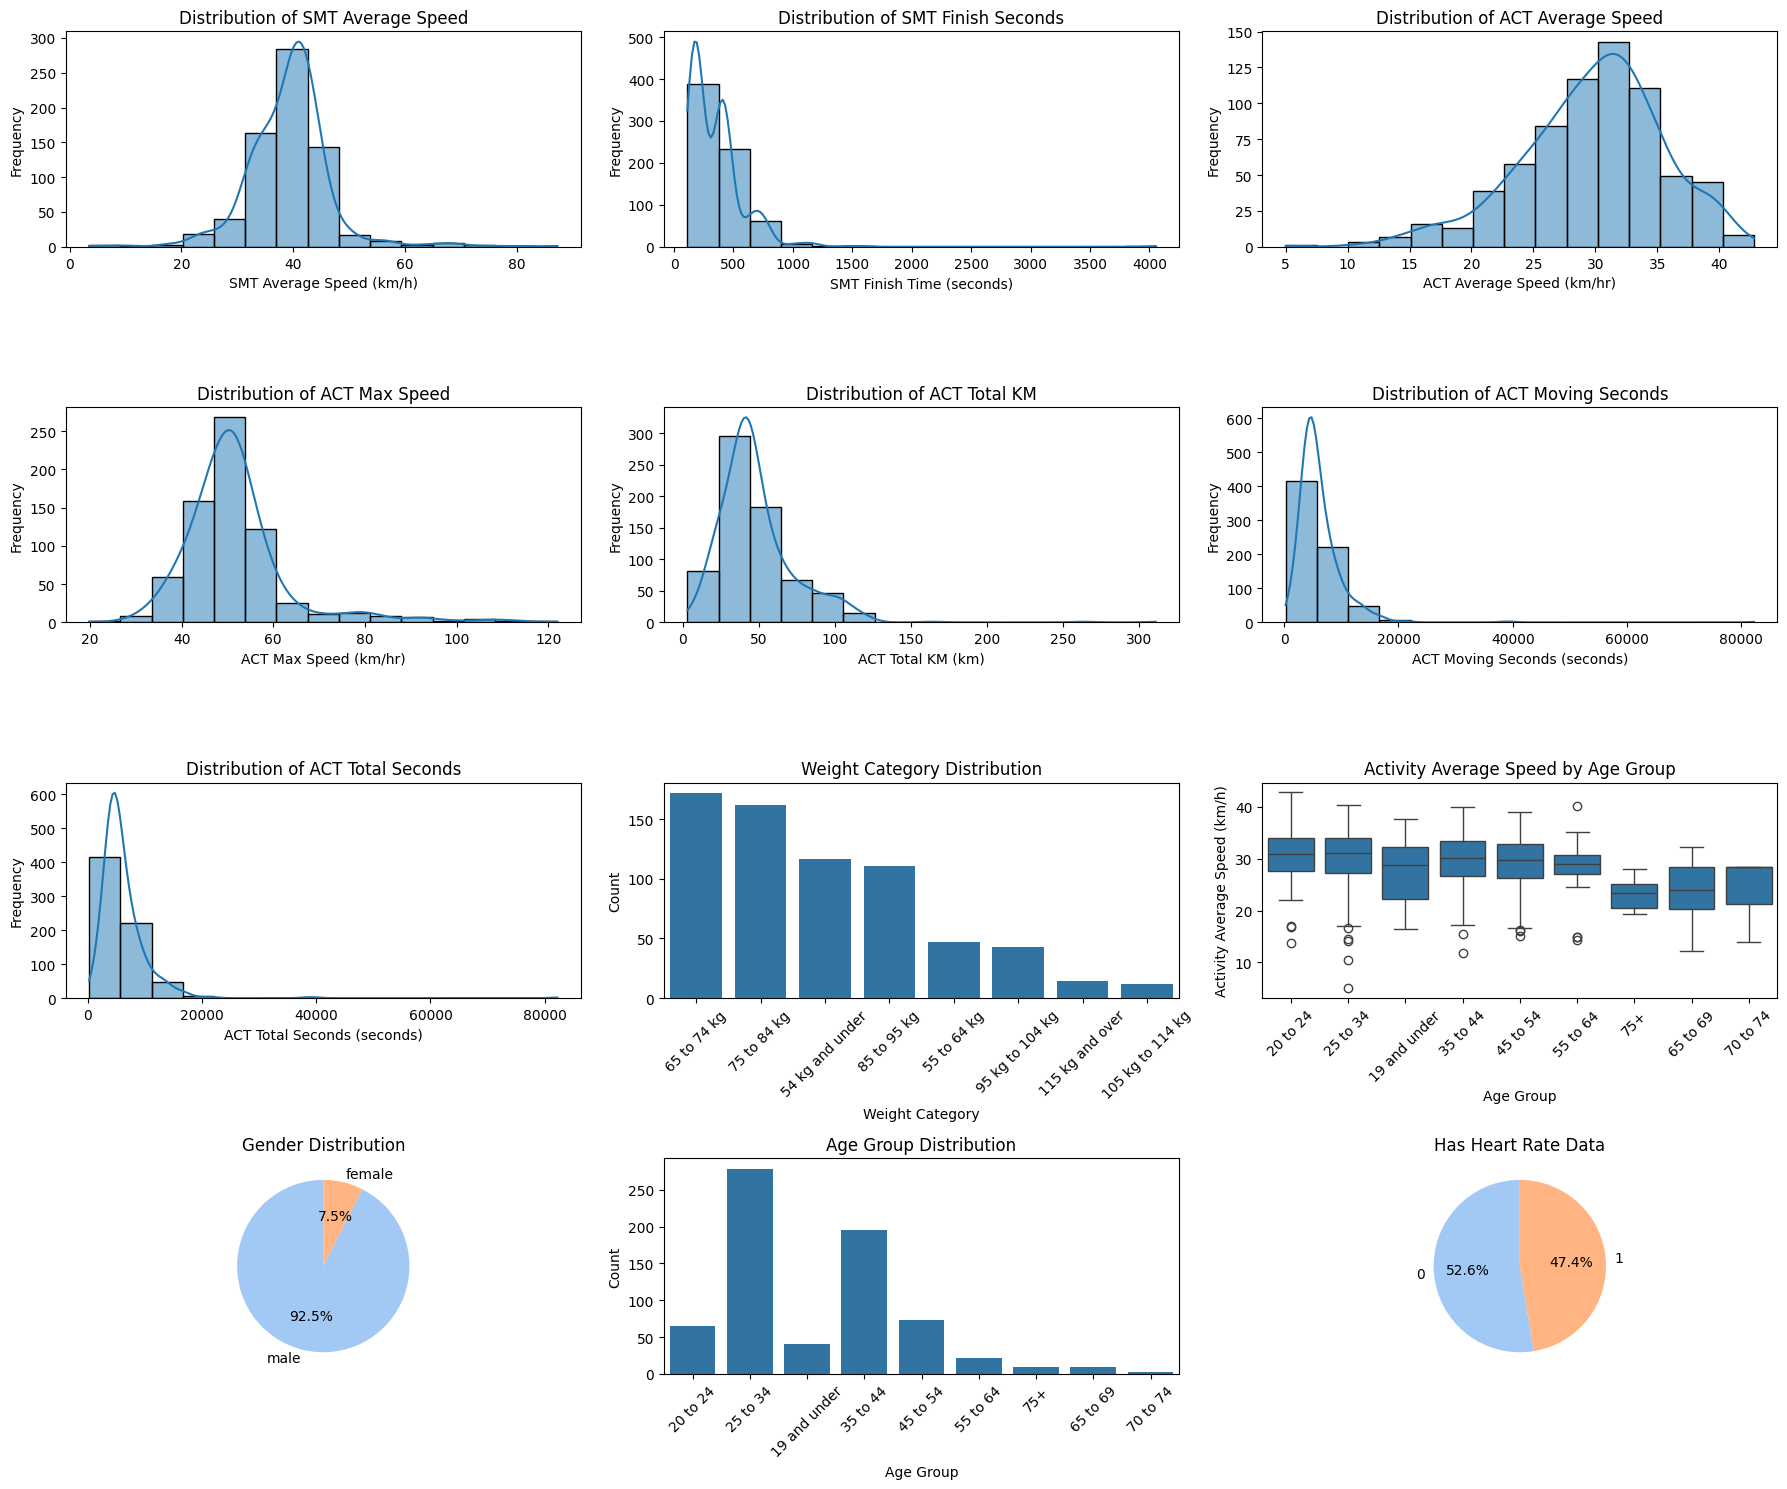

In [1119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualizations with 3x3 layout to fit all histograms and plots
fig, axs = plt.subplots(4, 3, figsize=(18, 15))

# Histogram of SMT Average Speed
sns.histplot(top_10_percent_combined['smt_avg_spd'], bins=15, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of SMT Average Speed')
axs[0, 0].set_xlabel('SMT Average Speed (km/h)')
axs[0, 0].set_ylabel('Frequency')

# Histogram of SMT Finish Seconds
sns.histplot(top_10_percent_combined['smt_finish_seconds'], bins=15, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of SMT Finish Seconds')
axs[0, 1].set_xlabel('SMT Finish Time (seconds)')
axs[0, 1].set_ylabel('Frequency')

# Histogram of ACT Average Speed
sns.histplot(top_10_percent_combined['act_avg_spd'], bins=15, kde=True, ax=axs[0, 2])
axs[0, 2].set_title('Distribution of ACT Average Speed')
axs[0, 2].set_xlabel('ACT Average Speed (km/hr)')
axs[0, 2].set_ylabel('Frequency')

# Histogram of ACT Max Speed
sns.histplot(top_10_percent_combined['act_max_spd'], bins=15, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of ACT Max Speed')
axs[1, 0].set_xlabel('ACT Max Speed (km/hr)')
axs[1, 0].set_ylabel('Frequency')

# Histogram of ACT Total KM
sns.histplot(top_10_percent_combined['act_total_km'], bins=15, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of ACT Total KM')
axs[1, 1].set_xlabel('ACT Total KM (km)')
axs[1, 1].set_ylabel('Frequency')

# Histogram of ACT Moving Seconds
sns.histplot(top_10_percent_combined['act_moving_seconds'], bins=15, kde=True, ax=axs[1, 2])
axs[1, 2].set_title('Distribution of ACT Moving Seconds')
axs[1, 2].set_xlabel('ACT Moving Seconds (seconds)')
axs[1, 2].set_ylabel('Frequency')

# Histogram of ACT Total Seconds
sns.histplot(top_10_percent_combined['act_total_seconds'], bins=15, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribution of ACT Total Seconds')
axs[2, 0].set_xlabel('ACT Total Seconds (seconds)')
axs[2, 0].set_ylabel('Frequency')

# Distribution of Weight Categories
sns.countplot(x='user_weight_category', data=top_10_percent_combined,
              order=top_10_percent_combined['user_weight_category'].value_counts().index, ax=axs[2, 1])
axs[2, 1].set_title('Weight Category Distribution')
axs[2, 1].set_xlabel('Weight Category')
axs[2, 1].set_ylabel('Count')
axs[2, 1].tick_params(axis='x', rotation=45)

# Boxplot of Activity Average Speed by Age Group
sns.boxplot(x='user_age_group', y='act_avg_spd', data=top_10_percent_combined, ax=axs[2, 2])
axs[2, 2].tick_params(axis='x', rotation=45)
axs[2, 2].set_title('Activity Average Speed by Age Group')
axs[2, 2].set_xlabel('Age Group')
axs[2, 2].set_ylabel('Activity Average Speed (km/h)')

# Gender Distribution Pie Chart
gender_counts = top_10_percent_combined['gender'].value_counts()
axs[3, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axs[3, 0].set_title('Gender Distribution')

# Age Group Distribution
sns.countplot(x='user_age_group', data=top_10_percent_combined, ax=axs[3, 1])
axs[3, 1].tick_params(axis='x', rotation=45)
axs[3, 1].set_title('Age Group Distribution')
axs[3, 1].set_xlabel('Age Group')
axs[3, 1].set_ylabel('Count')

# Has Heart Rate Data Distribution Pie Chart
hr_data_counts = top_10_percent_combined['has_hr_data'].value_counts()
axs[3, 2].pie(hr_data_counts, labels=hr_data_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axs[3, 2].set_title('Has Heart Rate Data')

# Adjust layout for better fit
plt.tight_layout()
plt.show()


### Kesimpulan

Karakteristik performa dan fisik dari top 10% pemenang yang telah digabungkan menunjukkan pola sebagai berikut:

1. **Distribusi Umur dan Gender**:
   - **Kelompok Usia**: Mayoritas pemenang berada dalam kelompok usia **25 hingga 34 tahun**. Ini menunjukkan bahwa rentang usia ini memiliki performa terbaik dalam aktivitas tersebut.
   - **Gender**: Sebagian besar pemenang adalah **laki-laki**. Partisipasi perempuan dalam kelompok top 10% relatif lebih rendah.

2. **Kategori Berat Badan**:
   - **Kategori Berat**: Banyak pemenang berada dalam kategori berat **65 kg hingga 74 kg** dan **75 kg hingga 84 kg**. Ini menunjukkan bahwa berat badan dalam rentang ini mungkin memberikan keseimbangan optimal antara kekuatan dan kecepatan.
   - **Performa Berdasarkan Berat**: Pemenang dengan berat badan lebih ringan cenderung memiliki kecepatan rata-rata yang lebih tinggi, sementara yang lebih berat mungkin memiliki kekuatan tahan lama dalam jarak yang lebih panjang.

3. **Kecepatan dan Waktu Penyelesaian**:
   - **Kecepatan Rata-Rata SMT (smt_avg_spd)**: Pemenang top 10% memiliki kecepatan rata-rata sekitar **39 km/jam** atau lebih tinggi pada segmen SMT, menunjukkan tingkat performa yang tinggi.
   - **Waktu Penyelesaian SMT (smt_finish_seconds)**: Waktu penyelesaian mereka umumnya lebih cepat dibandingkan dengan peserta lain, mencerminkan efisiensi dan kecepatan dalam segmen tersebut.

4. **Aktivitas Keseluruhan**:
   - **Kecepatan Rata-Rata Aktivitas (act_avg_spd)**: Kecepatan rata-rata dalam seluruh aktivitas berkisar antara **32 km/jam hingga 36 km/jam**, menunjukkan konsistensi performa tinggi tidak hanya pada segmen SMT tetapi juga dalam keseluruhan aktivitas.
   - **Jarak Total Aktivitas (act_total_km)**: Pemenang top 10% sering menempuh jarak antara **60 km hingga 100 km**, menunjukkan tingkat ketahanan dan stamina yang baik.


5. **Data Denyut Jantung (HR Data)**:
   - **Penggunaan HR Monitor**: Hanya sekitar sedikit lebih dari setengah dari top 10% pemenang yang memiliki data denyut jantung yang terekam. Hal ini menunjukkan bahwa meskipun beberapa pemenang serius dalam memonitor performa mereka secara fisiologis, sebagiannya lagi tidak menggunakan Heart Rate monitor.


### Referensi

- [First Step in EDA: Descriptive Statistics Analysis](https://medium.com/analytics-vidhya/first-step-in-eda-descriptive-statistics-analysis-f49ca309da15)
- [Descriptive Statistics: Definition, Overview, Types, and Examples](https://www.investopedia.com/terms/d/descriptive_statistics.asp)


## Apakah peserta dari kategori berat badan tertentu memiliki kecenderungan lebih besar untuk mendominasi segmen tertentu (lebih banyak peserta dari kategori tersebut di peringkat 10 besar)?

### Mengelompokan data sesuai dengan nama lintasan

In [1120]:
# Kelompokkan dan sort berdasarkan kolom yang diinginkan
df_sorted = df.sort_values(['smt_rank']).groupby(['smt_name'])

# Nampilin data yang sudah sorted berdasarkan smt_rank perkelompok smt_name, gender, dan user_age_group
for group_name, group_data in df_sorted:
    print(f"Group: {group_name}")
    display(group_data)


Group: ('Al Fardoos to shellfish round about',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3125       35 to 44      639   2017-12-08    male         1         47.5   
1383       25 to 34      610   2018-07-27  female         1         25.3   
2474       20 to 24     1053   2018-07-27  female         1         23.3   
5804   19 and under       13   2019-11-01    male         1         40.6   
1040       20 to 24        2   2019-09-27    male         1         43.9   
...             ...      ...          ...     ...       ...          ...   
250        25 to 34      494   2017-11-14    male        70         23.2   
2363       25 to 34     1071   2019-12-13    male        71         20.6   
1649       25 to 34      413   2018-11-22    male        72         19.9   
3358       25 to 34      200   2017-03-24    male        73         15.8   
1759       25 to 34     1051   2019-03-15    male        74          7.9   

      smt_finish_seconds                             smt_name  \
3125                 574  Al Fardoos to shellfish round about   
1383                1080  Al Fardoos to shellfish round about   
2474                1168  Al Fardoos to shellfish round about   
5804                 671  Al Fardoos to shellfish round about   
1040                 621  Al Fardoos to shellfish round about   
...                  ...                                  ...   
250                 1175  Al Fardoos to shellfish round about   
2363                1323  Al Fardoos to shellfish round about   
1649                1372  Al Fardoos to shellfish round about   
3358                1724  Al Fardoos to shellfish round about   
1759                3445  Al Fardoos to shellfish round about   

     user_weight_category                     act_title  act_avg_spd  \
3125          65 to 74 kg                  Morning Ride         29.7   
1383          65 to 74 kg                  Morning Ride         23.5   
2474          65 to 74 kg                  Morning Ride         22.2   
5804          65 to 74 kg                  Morning Ride         36.4   
1040          65 to 74 kg                  Morning Ride         30.7   
...                   ...                           ...          ...   
250       54 kg and under                  تمرين اليوم          19.2   
2363      54 kg and under                  Morning Ride         18.5   
1649      54 kg and under  3rd Jeddah challenge round 1         20.2   
3358          85 to 95 kg                          Mezo         26.6   
1759      95 kg to 104 kg                  Morning Ride         30.7   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3125         52.9        101.13               12265              12265   
1383         33.5        100.06               15342              15342   
2474         37.1        101.26               16425              16425   
5804         58.3         54.02                5339               5339   
1040         52.2         64.03                7511               7511   
...           ...           ...                 ...                ...   
250          38.2         34.89                6550               6550   
2363         39.2         95.00               18495              18495   
1649         43.6         63.28               11253              11253   
3358         42.8         83.46               11313              11313   
1759         50.8        101.73               11933              11933   

      has_hr_data    id  
3125            0  1781  
1383            1  1780  
2474            0  1705  
5804            1  1686  
1040            0  1695  
...           ...   ...  
250             0  1775  
2363            0  1776  
1649            0  1777  
3358            0  1778  
1759            1  1779  

[157 rows x 17 columns]

Group: ('Headquarters Business Park',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2966       70 to 74     2253   2018-05-03    male         1         17.7   
2599       25 to 34      608   2019-01-13  female         1         35.7   
4390       35 to 44      923   2019-08-07  female         1         28.2   
3717       20 to 24     1053   2018-11-14  female         1         27.4   
4240            75+     1049   2019-09-03    male         1         35.5   
...             ...      ...          ...     ...       ...          ...   
2855       25 to 34     2031   2019-11-28    male       801          3.5   
3893       25 to 34     2032   2018-04-06    male       802          2.3   
2948       25 to 34      383   2018-01-24    male       803          2.3   
5398       25 to 34     1300   2019-01-18    male       804          1.7   
1947       25 to 34     2033   2019-01-02    male       805          0.8   

      smt_finish_seconds                    smt_name user_weight_category  \
2966                 342  Headquarters Business Park      54 kg and under   
2599                 169  Headquarters Business Park      54 kg and under   
4390                 214  Headquarters Business Park          65 to 74 kg   
3717                 220  Headquarters Business Park          65 to 74 kg   
4240                 170  Headquarters Business Park          85 to 95 kg   
...                  ...                         ...                  ...   
2855                1710  Headquarters Business Park      54 kg and under   
3893                2647  Headquarters Business Park          65 to 74 kg   
2948                2669  Headquarters Business Park      115 kg and over   
5398                3498  Headquarters Business Park      54 kg and under   
1947                7506  Headquarters Business Park      54 kg and under   

                                    act_title  act_avg_spd  act_max_spd  \
2966                           Afternoon Ride         14.0         34.2   
2599                           Afternoon Ride         24.4         40.0   
4390                             Morning Ride         21.2         32.0   
3717                  Two Amigas Morning Ride         27.4         39.2   
4240                          Ride 4 d health         19.3         46.8   
...                                       ...          ...          ...   
2855                           Afternoon Ride         15.8         38.5   
3893  مسار الواجه البحريه جده دراجتي السعوديه         10.7         40.0   
2948                             Evening Ride         16.8         41.8   
5398                             Morning Ride         18.9         39.6   
1947                               Night Ride         13.1         70.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2966         14.84                3805               3805            0  7860  
2599         24.43                3611               3611            1  7070  
4390         17.80                3029               3029            1  7628  
3717         30.13                3955               3955            0  6250  
4240         35.51                6609               6609            0  7861  
...            ...                 ...                ...          ...   ...  
2855         67.87               15444              15444            0  7065  
3893          9.45                3176               3176            0  7066  
2948         30.40                6534               6534            0  7067  
5398         36.58                6975               6975            0  7068  
1947         17.67                4851               4851            0  7069  

[1545 rows x 17 columns]

Group: ('King Street side',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2489       25 to 34      610   2018-12-26  female         1         32.7   
2308   19 and under       21   2018-12-26    male         1         43.4   
261        45 to 54     1028   2020-01-10  female         1         10.6   
4292       35 to 44      614   2020-02-14  female         1         28.6   
4703       55 to 64      937   2017-02-08    male         1         40.3   
...             ...      ...          ...     ...       ...          ...   
2999       25 to 34      443   2014-04-02    male       288         11.8   
4147       25 to 34      528   2014-04-02    male       289         11.7   
1058       25 to 34     1212   2018-04-28    male       290         11.6   
182        25 to 34     1214   2017-03-30    male       292         10.0   
3156       25 to 34      503   2017-01-10    male       293          9.7   

      smt_finish_seconds          smt_name user_weight_category  \
2489                 520  King Street side          65 to 74 kg   
2308                 392  King Street side          55 to 64 kg   
261                 1602  King Street side          85 to 95 kg   
4292                 596  King Street side          55 to 64 kg   
4703                 422  King Street side          75 to 84 kg   
...                  ...               ...                  ...   
2999                1445  King Street side      54 kg and under   
4147                1451  King Street side      95 kg to 104 kg   
1058                1469  King Street side          85 to 95 kg   
182                 1707  King Street side                  NaN   
3156                1757  King Street side          75 to 84 kg   

                                act_title  act_avg_spd  act_max_spd  \
2489                         Morning Ride         31.5         38.5   
2308                         Evening ride         26.3         50.4   
261   Brave Cyclists 15 - 100km challenge         16.1         30.6   
4292                         Morning Ride         27.5         35.3   
4703      Evening Ride strong head winds          31.4         50.0   
...                                   ...          ...          ...   
2999            يوم التوحد و تمرين في جدة         19.2         55.1   
4147                       Afternoon Ride         16.9         47.5   
1058              Home to Obhur and back!         17.2         39.2   
182                        Afternoon Ride          0.5         88.9   
3156                      West Sky Ride 1         15.2         41.4   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2489         30.22                3456               3456            1  2277  
2308         57.90                7921               7921            0  1890  
261          97.44               21761              21761            0  2598  
4292         55.05                7204               7204            1  2507  
4703         46.72                5360               5360            1  2599  
...            ...                 ...                ...          ...   ...  
2999         37.12                6951               6951            0  2269  
4147         48.09               10250              10250            0  2270  
1058         53.27               11175              11175            0  2271  
182         197.10             1513793            1513793            0  2273  
3156         21.94                5183               5183            0  2274  

[592 rows x 17 columns]

Group: ('North Corniche',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
5172       45 to 54      958   2019-02-11    male         1         48.3   
5358       55 to 64      937   2018-01-01    male         1         43.4   
1701       20 to 24       58   2018-12-02    male         1         47.6   
599        70 to 74     1622   2016-12-05    male         1         33.8   
6074       35 to 44     1583   2019-07-19  female         1         30.3   
...             ...      ...          ...     ...       ...          ...   
142        25 to 34      588   2019-07-07    male       534         10.6   
3454       25 to 34     1508   2018-04-04    male       535         10.4   
3472       25 to 34     1625   2017-01-07    male       536          9.7   
246        25 to 34     1511   2016-05-23    male       538          6.6   
6280       25 to 34     1500   2015-11-15    male       539          5.6   

      smt_finish_seconds        smt_name user_weight_category  \
5172                 359  North Corniche          85 to 95 kg   
5358                 400  North Corniche          75 to 84 kg   
1701                 365  North Corniche                  NaN   
599                  514  North Corniche      54 kg and under   
6074                 573  North Corniche                  NaN   
...                  ...             ...                  ...   
142                 1644  North Corniche      54 kg and under   
3454                1674  North Corniche      54 kg and under   
3472                1782  North Corniche      95 kg to 104 kg   
246                 2627  North Corniche          85 to 95 kg   
6280                3089  North Corniche      54 kg and under   

                       act_title  act_avg_spd  act_max_spd  act_total_km  \
5172   Monday evening windy ride         34.7         52.2         41.90   
5358  Solo training Evening Ride         30.7         47.5         19.28   
1701                Evening Ride         39.0         50.8         37.71   
599                   Night Ride         28.4         49.0          9.71   
6074                Evening Ride         24.0         37.1         15.52   
...                          ...          ...          ...           ...   
142                 Evening Ride         13.5         50.0         60.84   
3454                Evening Ride         15.3         28.1         21.85   
3472                Morning Ride         15.2         33.5         32.34   
246                 Evening Ride         23.7         39.6         70.22   
6280              Afternoon Ride         17.8         50.4         38.41   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
5172                4344               4344            0  5750  
5358                2259               2259            1  5898  
1701                3480               3480            1  4679  
599                 1230               1230            0  5935  
6074                2324               2324            0  5739  
...                  ...                ...          ...   ...  
142                16226              16226            0  5329  
3454                5135               5135            0  5330  
3472                7680               7680            0  5331  
246                10676              10676            0  5333  
6280                7779               7779            0  5334  

[1056 rows x 17 columns]

Group: ('Obhur North Short',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2329       35 to 44      639   2018-02-17    male         1         37.6   
6271            75+     1049   2019-06-18    male         1         28.5   
3654       20 to 24       51   2016-08-19    male         1         37.5   
1480       35 to 44      923   2019-09-13  female         1         21.1   
2934       20 to 24     1053   2018-07-27  female         1         24.6   
...             ...      ...          ...     ...       ...          ...   
1324       35 to 44      686   2017-07-28    male        74          8.6   
5450       25 to 34      532   2020-02-14    male        75          7.8   
1537       25 to 34      311   2020-02-14    male        76          7.3   
5056       35 to 44      666   2020-02-14    male        79          7.5   
615        35 to 44      855   2020-02-14    male        80          7.5   

      smt_finish_seconds           smt_name user_weight_category  \
2329                 658  Obhur North Short          65 to 74 kg   
6271                 867  Obhur North Short          85 to 95 kg   
3654                 659  Obhur North Short          65 to 74 kg   
1480                1174  Obhur North Short          65 to 74 kg   
2934                1005  Obhur North Short          65 to 74 kg   
...                  ...                ...                  ...   
1324                2858  Obhur North Short          75 to 84 kg   
5450                3177  Obhur North Short          75 to 84 kg   
1537                3370  Obhur North Short          75 to 84 kg   
5056                3286  Obhur North Short      115 kg and over   
615                 3287  Obhur North Short      54 kg and under   

                                       act_title  act_avg_spd  act_max_spd  \
2329                                Morning Ride         27.4         50.0   
6271                                Morning Ride         20.5         40.3   
3654                                Morning Ride         34.9         50.8   
1480                    My 1st ever Century Ride         22.3         33.5   
2934                                Morning Ride         22.2         37.1   
...                                          ...          ...          ...   
1324                              Afternoon Ride         18.9         59.8   
5450                                Morning Ride         15.7         59.8   
1537   رحلة خليج سلمان بقيادة الرحالة محمد فقية          16.3         36.7   
5056                                Morning Ride         17.9         38.9   
615                                 Morning Ride         15.2         39.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2329        100.91               13267              13267            1  1541  
6271         60.17               10586              10586            0  1685  
3654         69.15                7138               7138            1  1442  
1480        100.60               16206              16206            1  1621  
2934        101.26               16425              16425            0  1455  
...            ...                 ...                ...          ...   ...  
1324         49.56                9464               9464            0  1614  
5450         69.64               15931              15931            0  1531  
1537         88.48               19484              19484            1  1532  
5056        140.97               28277              28277            0  1619  
615          87.38               20663              20663            0  1620  

[201 rows x 17 columns]

Group: ('Oghor 2 SailsIsland',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3951       35 to 44      923   2018-12-14  female         1         28.4   
3372       20 to 24       58   2018-12-02    male         1         47.8   
3666       45 to 54     1614   2020-03-07  female         1         24.7   
4706       25 to 34      404   2019-12-20    male         1         60.8   
5171       55 to 64      937   2017-05-03    male         1         45.4   
...             ...      ...          ...     ...       ...          ...   
2982       25 to 34     1508   2018-04-04    male       612          7.3   
1885       25 to 34     1509   2016-05-27    male       614          6.7   
6202       25 to 34      594   2019-04-17    male       615          6.6   
803        25 to 34     1510   2018-03-20    male       616          4.6   
1470       25 to 34     1511   2016-05-23    male       617          3.2   

      smt_finish_seconds             smt_name user_weight_category  \
3951                 253  Oghor 2 SailsIsland          65 to 74 kg   
3372                 150  Oghor 2 SailsIsland                  NaN   
3666                 290  Oghor 2 SailsIsland          55 to 64 kg   
4706                 118  Oghor 2 SailsIsland      95 kg to 104 kg   
5171                 158  Oghor 2 SailsIsland          75 to 84 kg   
...                  ...                  ...                  ...   
2982                 988  Oghor 2 SailsIsland      54 kg and under   
1885                1078  Oghor 2 SailsIsland      54 kg and under   
6202                1091  Oghor 2 SailsIsland      54 kg and under   
803                 1557  Oghor 2 SailsIsland          75 to 84 kg   
1470                2243  Oghor 2 SailsIsland          85 to 95 kg   

                             act_title  act_avg_spd  act_max_spd  \
3951                      Morning Ride         22.5         31.3   
3372                      Evening Ride         39.0         50.8   
3666  Corniche lazy saturday 7th march         16.3         32.0   
4706                      Morning Ride         26.3         72.7   
5171              Evening Ride with JC         28.5         54.4   
...                                ...          ...          ...   
2982                      Evening Ride         15.3         28.1   
1885                      Evening Ride         15.1         61.9   
6202                      Evening Ride         17.3         40.7   
803                     Afternoon Ride         15.3         31.0   
1470                      Evening Ride         23.7         39.6   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3951         50.40                8050               8050            1  4403  
3372         37.71                3480               3480            1  3137  
3666         33.92                7482               7482            0  4576  
4706         24.14                3305               3305            0  3280  
5171         32.40                4096               4096            1  4580  
...            ...                 ...                ...          ...   ...  
2982         21.85                5135               5135            0  3940  
1885         36.61                8726               8726            0  3942  
6202         29.39                6110               6110            0  3943  
803          15.75                3717               3717            0  3944  
1470         70.22               10676              10676            0  3945  

[1260 rows x 17 columns]

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4803       55 to 64     1041   2017-11-28    male         1         40.7   
4541       25 to 34      397   2018-02-16    male         1         87.3   
3235       20 to 24      137   2019-01-05    male         1         81.4   
2111            75+     1049   2019-06-09    male         1         36.2   
184        35 to 44     1339   2017-05-29  female         1         63.9   
...             ...      ...          ...     ...       ...          ...   
817        25 to 34     1318   2018-05-03    male       163         14.9   
3854       25 to 34      356   2016-07-23    male       164         13.5   
5409       25 to 34      503   2017-01-10    male       165         13.0   
5270       25 to 34      456   2018-05-05    male       166          8.6   
1005       25 to 34     1319   2017-11-28    male       167          6.0   

      smt_finish_seconds                           smt_name  \
4803                 240  PRINCE SULTAN - ASSALAM TO FATIMA   
4541                 112  PRINCE SULTAN - ASSALAM TO FATIMA   
3235                 120  PRINCE SULTAN - ASSALAM TO FATIMA   
2111                 270  PRINCE SULTAN - ASSALAM TO FATIMA   
184                  153  PRINCE SULTAN - ASSALAM TO FATIMA   
...                  ...                                ...   
817                  655  PRINCE SULTAN - ASSALAM TO FATIMA   
3854                 722  PRINCE SULTAN - ASSALAM TO FATIMA   
5409                 750  PRINCE SULTAN - ASSALAM TO FATIMA   
5270                1137  PRINCE SULTAN - ASSALAM TO FATIMA   
1005                1616  PRINCE SULTAN - ASSALAM TO FATIMA   

     user_weight_category                          act_title  act_avg_spd  \
4803          85 to 95 kg                       Evening Ride         33.3   
4541          85 to 95 kg                       Evening Ride         17.6   
3235      54 kg and under                       Morning Ride         27.3   
2111          85 to 95 kg                       Morning Ride         20.4   
184       54 kg and under                         Night Ride         17.9   
...                   ...                                ...          ...   
817       54 kg and under                       Evening Ride         16.4   
3854          75 to 84 kg  Morning Ride تمرين مع دراج الحجاز         23.0   
5409          75 to 84 kg                    West Sky Ride 1         15.2   
5270      54 kg and under                       Evening Ride         16.9   
1005      54 kg and under                       Evening Ride         17.6   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
4803         44.6         39.93                4324               4324   
4541        108.0         20.57                4197               4197   
3235         94.3         31.02                4095               4095   
2111         52.9         53.85                9508               9508   
184          72.4         25.14                5070               5070   
...           ...           ...                 ...                ...   
817          40.3         60.20               13217              13217   
3854         33.5         24.15                3782               3782   
5409         41.4         21.94                5183               5183   
5270         34.9         47.42               10112              10112   
1005         42.5         38.43                7844               7844   

      has_hr_data    id  
4803            1  3057  
4541            0  2667  
3235            0  2643  
2111            0  3075  
184             0  2984  
...           ...   ...  
817             0  2829  
3854            0  2830  
5409            0  2831  
5270            0  2832  
1005            0  2833  

[361 rows x 17 columns]

Group: ('S.Ubhur Alkurnaysh South Bound with detour',)


user_age_group  user_id attempt_date gender  smt_rank  smt_avg_spd  \
2015   19 and under        6   2017-12-04   male         1         41.1   
3011       25 to 34      158   2016-12-16   male         1         45.5   
3375            75+     1049   2019-11-20   male         1         39.9   
2287       55 to 64      940   2017-12-08   male         1         45.4   
2596       35 to 44      639   2016-12-16   male         1         45.6   
...             ...      ...          ...    ...       ...          ...   
1462       25 to 34      228   2019-11-29   male       113         14.6   
5423       25 to 34      529   2017-11-19   male       114         14.2   
2792       25 to 34      306   2019-05-27   male       115         13.9   
1270       25 to 34      585   2019-07-02   male       116         11.8   
1031       25 to 34      266   2019-06-27   male       118          7.8   

      smt_finish_seconds                                    smt_name  \
2015                 776  S.Ubhur Alkurnaysh South Bound with detour   
3011                 700  S.Ubhur Alkurnaysh South Bound with detour   
3375                 798  S.Ubhur Alkurnaysh South Bound with detour   
2287                 702  S.Ubhur Alkurnaysh South Bound with detour   
2596                 698  S.Ubhur Alkurnaysh South Bound with detour   
...                  ...                                         ...   
1462                2189  S.Ubhur Alkurnaysh South Bound with detour   
5423                2251  S.Ubhur Alkurnaysh South Bound with detour   
2792                2300  S.Ubhur Alkurnaysh South Bound with detour   
1270                2699  S.Ubhur Alkurnaysh South Bound with detour   
1031                4096  S.Ubhur Alkurnaysh South Bound with detour   

     user_weight_category       act_title  act_avg_spd  act_max_spd  \
2015      54 kg and under    Evening Ride         32.2         46.4   
3011          85 to 95 kg    Morning Ride         34.6         54.4   
3375          85 to 95 kg   Nov.20th 2019         21.0         48.6   
2287          55 to 64 kg    Morning Ride         27.0         59.4   
2596          65 to 74 kg    Morning Ride         31.7         52.9   
...                   ...             ...          ...          ...   
1462          75 to 84 kg    Morning Ride         28.0         43.6   
5423      54 kg and under  Afternoon Ride         19.1         34.9   
2792          75 to 84 kg   Evening Ride          22.1         34.9   
1270          65 to 74 kg      Night Ride         17.5         38.5   
1031          75 to 84 kg      Night Ride         16.4         32.4   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
2015         49.92                5581               5581            0  1104  
3011         85.00                8854               8854            1  1143  
3375         72.14               12373              12373            0  1428  
2287         76.46               10212              10212            1  1413  
2596         83.60                9504               9504            1  1264  
...            ...                 ...                ...          ...   ...  
1462        100.13               12878              12878            1  1255  
5423         23.54                4430               4430            0  1256  
2792        106.43               17322              17322            1  1257  
1270         81.26               16732              16732            0  1258  
1031         68.04               14898              14898            0  1260  

[255 rows x 17 columns]

Group: ('Starbucks to Majid',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3760       65 to 69     1047   2018-05-07    male         1         28.7   
3870       35 to 44      922   2018-05-09  female         1         38.8   
4573   19 and under       47   2018-09-15  female         1         25.3   
2432       35 to 44      631   2019-09-30    male         1         68.7   
2025       25 to 34      146   2019-05-08    male         1         69.4   
...             ...      ...          ...     ...       ...          ...   
4545       25 to 34      602   2019-02-10    male       463          8.1   
2431       25 to 34      603   2019-01-23    male       464          7.8   
5599       25 to 34      604   2017-08-18    male       465          7.8   
1770       25 to 34      605   2018-11-01    male       466          7.5   
2278       25 to 34      606   2019-03-08    male       467          6.5   

      smt_finish_seconds            smt_name user_weight_category  \
3760                 490  Starbucks to Majid          75 to 84 kg   
3870                 363  Starbucks to Majid      54 kg and under   
4573                 556  Starbucks to Majid      54 kg and under   
2432                 205  Starbucks to Majid      54 kg and under   
2025                 203  Starbucks to Majid     105 kg to 114 kg   
...                  ...                 ...                  ...   
4545                1741  Starbucks to Majid      54 kg and under   
2431                1802  Starbucks to Majid      54 kg and under   
5599                1812  Starbucks to Majid          85 to 95 kg   
1770                1881  Starbucks to Majid                  NaN   
2278                2157  Starbucks to Majid          85 to 95 kg   

                act_title  act_avg_spd  act_max_spd  act_total_km  \
3760     Monday Solo Ride         28.4         38.9        102.57   
3870         Evening Ride         18.7         78.8         31.84   
4573     من أرهب التمارين         17.7         31.3         54.53   
2432    تمرين مع دراج جده         32.4        110.9         50.52   
2025           Night Ride         28.8        105.5         28.01   
...                   ...          ...          ...           ...   
4545       Afternoon Ride         15.5         38.9         26.09   
2431  تمرين ممتع من ابحر          18.8         30.6         43.16   
5599         Evening Ride         23.6         46.8         23.98   
1770         Evening Ride         15.2         36.0         24.38   
2278       تمرين الكورنيش         18.0         41.8         29.04   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3760               12988              12988            1  1100  
3870                6114               6114            0   961  
4573               11094              11094            0    46  
2432                5606               5606            0   643  
2025                3504               3504            0   152  
...                  ...                ...          ...   ...  
4545                6052               6052            0   614  
2431                8268               8268            0   615  
5599                3659               3659            0   616  
1770                5790               5790            0   617  
2278                5808               5808            0   618  

[865 rows x 17 columns]

### Menampilkan data peringkat 10% dari tiap data group

In [1121]:
import math

for group_name, group_data in df_sorted:
    top_10_group_data = group_data.head(math.ceil(len(group_data) * 0.1))
    print(f"Group: {group_name}")
    display(top_10_group_data)

Group: ('Al Fardoos to shellfish round about',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3125       35 to 44      639   2017-12-08    male         1         47.5   
1383       25 to 34      610   2018-07-27  female         1         25.3   
2474       20 to 24     1053   2018-07-27  female         1         23.3   
5804   19 and under       13   2019-11-01    male         1         40.6   
1040       20 to 24        2   2019-09-27    male         1         43.9   
2836            75+     1049   2019-08-02    male         1         40.1   
6006       25 to 34      157   2019-09-27    male         2         44.1   
5634   19 and under       46   2018-02-03    male         2         40.5   
5918       20 to 24       51   2016-01-01    male         2         40.9   
1047       55 to 64      940   2018-04-27    male         2         43.6   
5788       45 to 54     1147   2019-09-27    male         2         44.3   
4666       25 to 34      592   2019-09-27    male         3         43.8   
1622   19 and under     1129   2018-10-05    male         3         39.9   
2469       20 to 24        4   2018-02-03    male         3         40.5   
2874       45 to 54      940   2016-10-14    male         3         43.6   
5964       45 to 54      933   2016-01-30    male         4         43.4   

      smt_finish_seconds                             smt_name  \
3125                 574  Al Fardoos to shellfish round about   
1383                1080  Al Fardoos to shellfish round about   
2474                1168  Al Fardoos to shellfish round about   
5804                 671  Al Fardoos to shellfish round about   
1040                 621  Al Fardoos to shellfish round about   
2836                 680  Al Fardoos to shellfish round about   
6006                 618  Al Fardoos to shellfish round about   
5634                 674  Al Fardoos to shellfish round about   
5918                 666  Al Fardoos to shellfish round about   
1047                 625  Al Fardoos to shellfish round about   
5788                 616  Al Fardoos to shellfish round about   
4666                 622  Al Fardoos to shellfish round about   
1622                 684  Al Fardoos to shellfish round about   
2469                 673  Al Fardoos to shellfish round about   
2874                 626  Al Fardoos to shellfish round about   
5964                 628  Al Fardoos to shellfish round about   

     user_weight_category        act_title  act_avg_spd  act_max_spd  \
3125          65 to 74 kg     Morning Ride         29.7         52.9   
1383          65 to 74 kg     Morning Ride         23.5         33.5   
2474          65 to 74 kg     Morning Ride         22.2         37.1   
5804          65 to 74 kg     Morning Ride         36.4         58.3   
1040          65 to 74 kg     Morning Ride         30.7         52.2   
2836          85 to 95 kg  August 2nd 2019         28.1         53.6   
6006      95 kg to 104 kg     Morning Ride         32.4         55.1   
5634          75 to 84 kg   Afternoon Ride         26.6         51.8   
5918          65 to 74 kg     Morning Ride         33.1         48.2   
1047          55 to 64 kg     Morning Ride         29.5         56.5   
5788                  NaN     Morning Ride         29.9         56.9   
4666          55 to 64 kg     Morning Ride         35.6         54.4   
1622          55 to 64 kg     Morning Ride         34.3         55.1   
2469      54 kg and under   Afternoon Ride         29.0         54.0   
2874          55 to 64 kg     Morning Ride         32.1         50.4   
5964          85 to 95 kg     Morning Ride         32.4         47.9   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3125        101.13               12265              12265            0  1781  
1383        100.06               15342              15342            1  1780  
2474        101.26               16425              16425            0  1705  
5804         54.02                5339               5339        

Group: ('Headquarters Business Park',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2966       70 to 74     2253   2018-05-03    male         1         17.7   
2599       25 to 34      608   2019-01-13  female         1         35.7   
4390       35 to 44      923   2019-08-07  female         1         28.2   
3717       20 to 24     1053   2018-11-14  female         1         27.4   
4240            75+     1049   2019-09-03    male         1         35.5   
...             ...      ...          ...     ...       ...          ...   
1138       45 to 54     1022   2018-08-25    male        16         31.9   
4340       35 to 44      355   2019-04-19    male        16         36.1   
2479   19 and under       18   2019-11-16    male        16         28.1   
5379       25 to 34     2038   2018-11-28  female        16         22.6   
3230       25 to 34      613   2017-03-08  female        17         21.8   

      smt_finish_seconds                    smt_name user_weight_category  \
2966                 342  Headquarters Business Park      54 kg and under   
2599                 169  Headquarters Business Park      54 kg and under   
4390                 214  Headquarters Business Park          65 to 74 kg   
3717                 220  Headquarters Business Park          65 to 74 kg   
4240                 170  Headquarters Business Park          85 to 95 kg   
...                  ...                         ...                  ...   
1138                 189  Headquarters Business Park          75 to 84 kg   
4340                 167  Headquarters Business Park          85 to 95 kg   
2479                 215  Headquarters Business Park          65 to 74 kg   
5379                 267  Headquarters Business Park      54 kg and under   
3230                 277  Headquarters Business Park          65 to 74 kg   

                    act_title  act_avg_spd  act_max_spd  act_total_km  \
2966           Afternoon Ride         14.0         34.2         14.84   
2599           Afternoon Ride         24.4         40.0         24.43   
4390             Morning Ride         21.2         32.0         17.80   
3717  Two Amigas Morning Ride         27.4         39.2         30.13   
4240          Ride 4 d health         19.3         46.8         35.51   
...                       ...          ...          ...           ...   
1138             Morning Ride         17.6         38.2         38.30   
4340           Afternoon Ride         38.7         64.1         49.84   
2479             Morning Ride         23.9         43.6         50.45   
5379               Night Ride         17.3         34.2         23.65   
3230             Evening Ride         25.3         37.8         27.68   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2966                3805               3805            0  7860  
2599                3611               3611            1  7070  
4390                3029               3029            1  7628  
3717                3955               3955            0  6250  
4240                6609               6609            0  7861  
...                  ...                ...          ...   ...  
1138                7829               7829            1  7674  
4340                4635               4635            1  7142  
2479                7596               7596            0  5955  
5379                4910               4910            0  7085  
3230                3945               3945            0  7086  

[155 rows x 17 columns]

Group: ('King Street side',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2489       25 to 34      610   2018-12-26  female         1         32.7   
2308   19 and under       21   2018-12-26    male         1         43.4   
261        45 to 54     1028   2020-01-10  female         1         10.6   
4292       35 to 44      614   2020-02-14  female         1         28.6   
4703       55 to 64      937   2017-02-08    male         1         40.3   
6187       20 to 24     1053   2018-12-26  female         1         31.6   
1329       65 to 69     1277   2020-03-04    male         1         71.8   
228    19 and under       47   2018-12-14  female         1         22.5   
5765       25 to 34      318   2019-01-27    male         1         46.0   
4491            75+     1049   2019-10-14    male         1         33.4   
5385       35 to 44      924   2018-07-27  female         2         27.0   
6082            75+     1048   2018-09-17    male         2         26.4   
4328       45 to 54      652   2018-12-26    male         2         43.0   
477    19 and under       49   2020-01-10  female         2         10.6   
539    19 and under        2   2018-12-26    male         2         43.3   
3144       35 to 44      267   2018-12-26    male         2         43.2   
1955       20 to 24       66   2018-01-13    male         2         42.9   
2179       20 to 24     1131   2018-10-24    male         2         42.9   
6143       25 to 34      614   2018-07-20  female         2         30.6   
4737   19 and under       48   2020-01-10  female         2         10.6   
1439       25 to 34      217   2018-05-07    male         2         43.8   
2138       55 to 64     1033   2020-03-28    male         2         39.3   
4342       25 to 34      227   2018-12-26    male         3         43.3   
5213       35 to 44      639   2018-01-13    male         3         42.8   
3743       55 to 64     1038   2019-02-26    male         3         37.3   
1404   19 and under       46   2017-06-11    male         3         41.9   
3518       25 to 34      616   2018-10-24  female         3         28.5   
1276       35 to 44      923   2019-10-11  female         3         24.8   
5310       25 to 34      180   2018-12-26    male         3         43.3   
4150       20 to 24       56   2017-04-29    male         4         42.2   
2452       55 to 64     1039   2020-03-27    male         4         37.0   
470        25 to 34      611   2017-05-29  female         4         27.6   
570        55 to 64     1041   2018-02-15    male         5         36.8   
5979       35 to 44      926   2017-12-29  female         5         22.1   
3368       25 to 34     1217   2018-07-27  female         5         27.1   
5970       25 to 34      186   2017-07-17    male         5         43.2   
3007       35 to 44     1260   2018-06-05  female         6         18.9   
2420       45 to 54      936   2019-11-26    male         6         39.2   
4367       55 to 64     1036   2018-02-17    male         6         34.9   
5810   19 and under       17   2018-03-28    male         6         39.0   
2078       25 to 34      267   2018-05-07    male         6         42.3   
4108       20 to 24        2   2019-08-07    male         6         41.1   
2856       25 to 34     1053   2019-09-11  female         6         26.8   
3964       35 to 44      662   2017-05-15    male         6         41.1   
3178       35 to 44      679   2016-10-26    male         7         41.0   
2071       25 to 34      224   2017-11-20    male         7         41.9   
2968   19 and under       34   2019-01-23    male         7         38.5   
295        20 to 24        4   2018-01-13    male         7         40.5   
3351       20 to 24       58   2018-12-02    male         7         40.5   
4100       25 to 34      436   2017-04-05    male         8         41.7   
2817       55 to 64     1032   2019-05-06    male         8         31.3   
3377       45 to 54      676   2018-10-22    male    

Group: ('North Corniche',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
5172       45 to 54      958   2019-02-11    male         1         48.3   
5358       55 to 64      937   2018-01-01    male         1         43.4   
1701       20 to 24       58   2018-12-02    male         1         47.6   
599        70 to 74     1622   2016-12-05    male         1         33.8   
6074       35 to 44     1583   2019-07-19  female         1         30.3   
...             ...      ...          ...     ...       ...          ...   
641        25 to 34      417   2017-08-02    male        15         42.4   
585        20 to 24        3   2020-03-07    male        15         36.2   
4402       35 to 44      651   2018-11-28    male        15         42.4   
3274       25 to 34      620   2019-06-15  female        15         22.3   
6090   19 and under       27   2018-10-06    male        15         36.8   

      smt_finish_seconds        smt_name user_weight_category  \
5172                 359  North Corniche          85 to 95 kg   
5358                 400  North Corniche          75 to 84 kg   
1701                 365  North Corniche                  NaN   
599                  514  North Corniche      54 kg and under   
6074                 573  North Corniche                  NaN   
...                  ...             ...                  ...   
641                  409  North Corniche     105 kg to 114 kg   
585                  479  North Corniche          65 to 74 kg   
4402                 409  North Corniche          65 to 74 kg   
3274                 778  North Corniche          55 to 64 kg   
6090                 472  North Corniche                  NaN   

                                              act_title  act_avg_spd  \
5172                          Monday evening windy ride         34.7   
5358                         Solo training Evening Ride         30.7   
1701                                       Evening Ride         39.0   
599                                          Night Ride         28.4   
6074                                       Evening Ride         24.0   
...                                                 ...          ...   
641                                          Night Ride         31.0   
585   Morning Ride winking face flexed biceps person...         29.1   
4402                                         Night Ride         39.1   
3274                                       Evening Ride         16.0   
6090                                       Morning Ride         23.7   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
5172         52.2         41.90                4344               4344   
5358         47.5         19.28                2259               2259   
1701         50.8         37.71                3480               3480   
599          49.0          9.71                1230               1230   
6074         37.1         15.52                2324               2324   
...           ...           ...                 ...                ...   
641          52.6         40.70                4729               4729   
585          42.1         65.12                8063               8063   
4402         52.9         20.69                1906               1906   
3274         29.2         50.68               11398              11398   
6090         40.0         66.18               10038              10038   

      has_hr_data    id  
5172            0  5750  
5358            1  5898  
1701            1  4679  
599             0  5935  
6074            0  5739  
...           ...   ...  
641             1  4810  
585             1  4693  
4402            0  5370  
3274            0  5349  
6090            0  4636  

[106 rows x 17 columns]

Group: ('Obhur North Short',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2329       35 to 44      639   2018-02-17    male         1         37.6   
6271            75+     1049   2019-06-18    male         1         28.5   
3654       20 to 24       51   2016-08-19    male         1         37.5   
1480       35 to 44      923   2019-09-13  female         1         21.1   
2934       20 to 24     1053   2018-07-27  female         1         24.6   
1245       65 to 69     1047   2018-04-28    male         1         33.4   
2798       25 to 34      214   2014-10-24    male         1         38.1   
4068   19 and under       49   2020-01-10  female         1         17.0   
4607       25 to 34      186   2017-01-20    male         2         37.9   
1515       20 to 24     1054   2019-09-13  female         2          7.4   
5510       35 to 44      267   2019-09-28    male         2         35.8   
4678       35 to 44      927   2019-11-15  female         2          6.3   
394        20 to 24        4   2018-02-17    male         2         36.8   
2075       25 to 34      612   2020-04-04  female         2         24.8   
5061       55 to 64      940   2018-06-03    male         2         33.5   
3887       45 to 54      936   2018-11-30    male         2         39.0   
3255   19 and under        7   2019-07-12    male         3         30.5   
2468       20 to 24       56   2017-03-10    male         3         33.1   
3534       25 to 34      190   2017-10-20    male         3         37.6   
5603       45 to 54      940   2017-01-20    male         3         37.9   
3490       55 to 64      937   2017-03-10    male         3         33.3   

      smt_finish_seconds           smt_name user_weight_category  \
2329                 658  Obhur North Short          65 to 74 kg   
6271                 867  Obhur North Short          85 to 95 kg   
3654                 659  Obhur North Short          65 to 74 kg   
1480                1174  Obhur North Short          65 to 74 kg   
2934                1005  Obhur North Short          65 to 74 kg   
1245                 740  Obhur North Short          75 to 84 kg   
2798                 649  Obhur North Short          75 to 84 kg   
4068                1453  Obhur North Short      54 kg and under   
4607                 652  Obhur North Short      54 kg and under   
1515                3356  Obhur North Short      54 kg and under   
5510                 691  Obhur North Short          65 to 74 kg   
4678                3897  Obhur North Short          65 to 74 kg   
394                  671  Obhur North Short      54 kg and under   
2075                 998  Obhur North Short      54 kg and under   
5061                 738  Obhur North Short          55 to 64 kg   
3887                 633  Obhur North Short          75 to 84 kg   
3255                 810  Obhur North Short          65 to 74 kg   
2468                 747  Obhur North Short          65 to 74 kg   
3534                 658  Obhur North Short          55 to 64 kg   
5603                 652  Obhur North Short          55 to 64 kg   
3490                 743  Obhur North Short          75 to 84 kg   

                                              act_title  act_avg_spd  \
2329                                       Morning Ride         27.4   
6271                                       Morning Ride         20.5   
3654                                       Morning Ride         34.9   
1480                           My 1st ever Century Ride         22.3   
2934                                       Morning Ride         22.2   
1245                         Saturday Spin with Patrice         32.2   
2798  Bike. Jeddah-North Obhur. Ritmo alegre. Grupet...         32.2   
4068                                     Afternoon Ride         17.3   
4607                                       Morning Ride         34.0   
1515                                       Evening Ride         17.7   
5510            تمرين هلاك... collision على

Group: ('Oghor 2 SailsIsland',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3951       35 to 44      923   2018-12-14  female         1         28.4   
3372       20 to 24       58   2018-12-02    male         1         47.8   
3666       45 to 54     1614   2020-03-07  female         1         24.7   
4706       25 to 34      404   2019-12-20    male         1         60.8   
5171       55 to 64      937   2017-05-03    male         1         45.4   
...             ...      ...          ...     ...       ...          ...   
6284   19 and under       18   2019-10-30    male        17         35.5   
5898       45 to 54      997   2019-08-16    male        17         40.5   
3843       45 to 54      946   2015-12-11    male        17         40.5   
4266   19 and under       23   2019-05-08    male        18         34.0   
5884       35 to 44      714   2018-10-22    male        18         44.0   

      smt_finish_seconds             smt_name user_weight_category  \
3951                 253  Oghor 2 SailsIsland          65 to 74 kg   
3372                 150  Oghor 2 SailsIsland                  NaN   
3666                 290  Oghor 2 SailsIsland          55 to 64 kg   
4706                 118  Oghor 2 SailsIsland      95 kg to 104 kg   
5171                 158  Oghor 2 SailsIsland          75 to 84 kg   
...                  ...                  ...                  ...   
6284                 202  Oghor 2 SailsIsland          65 to 74 kg   
5898                 177  Oghor 2 SailsIsland          85 to 95 kg   
3843                 177  Oghor 2 SailsIsland          65 to 74 kg   
4266                 211  Oghor 2 SailsIsland          55 to 64 kg   
5884                 163  Oghor 2 SailsIsland          65 to 74 kg   

                                              act_title  act_avg_spd  \
3951                                       Morning Ride         22.5   
3372                                       Evening Ride         39.0   
3666                   Corniche lazy saturday 7th march         16.3   
4706                                       Morning Ride         26.3   
5171                               Evening Ride with JC         28.5   
...                                                 ...          ...   
6284                                       Evening Ride         25.4   
5898             Morning Ride تمرين خفيف استعادة لياقة          29.1   
3843                             Sortie à vélo matinale         32.3   
4266  ثاني نص، تمرين جميل flexed biceps: light skin ...         27.5   
5884  Nice night ride with jeddahcycliests thumbs up...         35.1   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3951         31.3         50.40                8050               8050   
3372         50.8         37.71                3480               3480   
3666         32.0         33.92                7482               7482   
4706         72.7         24.14                3305               3305   
5171         54.4         32.40                4096               4096   
...           ...           ...                 ...                ...   
6284         45.0         52.48                7449               7449   
5898         52.9         57.40                7093               7093   
3843         47.2        105.11               11718              11718   
4266         44.3         31.40                4106               4106   
5884         51.1         52.75                5405               5405   

      has_hr_data    id  
3951            1  4403  
3372            1  3137  
3666            0  4576  
4706            0  3280  
5171            1  4580  
...           ...   ...  
6284            0  3092  
5898            1  4433  
3843            0  4431  
4266            0  3093  
5884            1  3987  

[126 rows x 17 columns]

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4803       55 to 64     1041   2017-11-28    male         1         40.7   
4541       25 to 34      397   2018-02-16    male         1         87.3   
3235       20 to 24      137   2019-01-05    male         1         81.4   
2111            75+     1049   2019-06-09    male         1         36.2   
184        35 to 44     1339   2017-05-29  female         1         63.9   
2042       45 to 54     1124   2018-08-07    male         1         66.9   
1652       65 to 69     1047   2018-05-30    male         1         38.2   
4901       45 to 54     1350   2019-07-12  female         1         28.0   
4979   19 and under       17   2019-01-01    male         1         40.4   
2742       35 to 44      216   2019-02-02    male         1         75.8   
468        20 to 24        2   2019-08-28    male         2         43.1   
1598       55 to 64     1039   2017-10-11    male         2         40.4   
2542       25 to 34      169   2017-08-23    male         2         55.2   
5671       55 to 64     1033   2020-02-12    male         3         37.0   
4959       20 to 24       72   2017-07-29    male         3         38.2   
759    19 and under       34   2019-03-27    male         3         38.2   
5711       35 to 44     1227   2018-09-03    male         4         49.9   
2446       25 to 34     1288   2018-09-03    male         4         49.9   
3437       35 to 44     1077   2018-09-03    male         4         49.9   
6078       55 to 64     1127   2017-05-26    male         4         36.3   
2579       25 to 34      170   2018-12-19    male         5         47.0   
3869       45 to 54     1123   2017-02-06    male         5         43.6   
3339   19 and under       13   2019-10-09    male         5         30.6   
3720       55 to 64     1031   2019-09-11    male         5         35.5   
3530       25 to 34      226   2018-12-19    male         6         44.8   
5643       35 to 44      267   2018-12-19    male         6         46.1   
3423       45 to 54     1090   2020-02-01    male         6         40.2   
3789   19 and under        7   2019-03-18    male         6         28.2   
3206       55 to 64     1044   2020-01-06    male         6         35.4   
3367       20 to 24       60   2015-06-17    male         7         32.0   
2300       55 to 64     1040   2019-12-04    male         7         35.0   
4480   19 and under     1278   2018-01-15    male         7         27.9   
2173       55 to 64      938   2019-06-24    male         7         35.0   
671        25 to 34      166   2015-10-08    male         7         43.1   
278        35 to 44      679   2015-01-19    male         7         44.0   
4936       25 to 34      282   2018-11-17    male         8         42.5   
1838   19 and under       46   2017-04-07    male         8         27.6   

      smt_finish_seconds                           smt_name  \
4803                 240  PRINCE SULTAN - ASSALAM TO FATIMA   
4541                 112  PRINCE SULTAN - ASSALAM TO FATIMA   
3235                 120  PRINCE SULTAN - ASSALAM TO FATIMA   
2111                 270  PRINCE SULTAN - ASSALAM TO FATIMA   
184                  153  PRINCE SULTAN - ASSALAM TO FATIMA   
2042                 146  PRINCE SULTAN - ASSALAM TO FATIMA   
1652                 256  PRINCE SULTAN - ASSALAM TO FATIMA   
4901                 349  PRINCE SULTAN - ASSALAM TO FATIMA   
4979                 242  PRINCE SULTAN - ASSALAM TO FATIMA   
2742                 129  PRINCE SULTAN - ASSALAM TO FATIMA   
468                  227  PRINCE SULTAN - ASSALAM TO FATIMA   
1598                 242  PRINCE SULTAN - ASSALAM TO FATIMA   
2542                 177  PRINCE SULTAN - ASSALAM TO FATIMA   
5671                 264  PRINCE SULTAN - ASSALAM TO FATIMA   
4959                 256  PRINCE SULTAN - ASSALAM TO FATIMA   
759                  256  PRINCE SULTAN - ASSALAM TO FATIMA   
5711                 196  PRINCE SULTAN - ASS

Group: ('S.Ubhur Alkurnaysh South Bound with detour',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2015   19 and under        6   2017-12-04    male         1         41.1   
3011       25 to 34      158   2016-12-16    male         1         45.5   
3375            75+     1049   2019-11-20    male         1         39.9   
2287       55 to 64      940   2017-12-08    male         1         45.4   
2596       35 to 44      639   2016-12-16    male         1         45.6   
5086       20 to 24     1053   2019-01-04  female         1         29.4   
5581       20 to 24        2   2020-01-03    male         1         43.9   
5971       45 to 54      958   2019-12-13    male         1         44.4   
1094       35 to 44      926   2017-12-08  female         1         28.6   
954    19 and under       47   2018-12-14  female         1         26.2   
3890       35 to 44      614   2019-11-22  female         2         28.2   
4311       35 to 44     1072   2019-12-13    male         2         44.2   
2193   19 and under        4   2017-12-11    male         2         40.6   
2582   19 and under       34   2019-11-11    male         2         40.6   
4498       25 to 34      608   2019-12-20  female         2         32.2   
2185       65 to 69     1100   2020-01-08    male         2         28.0   
3411       35 to 44      927   2019-11-15  female         3         22.1   
3356       20 to 24       51   2015-12-06    male         3         42.1   
489        45 to 54     1089   2018-12-14    male         3         43.0   
4114       35 to 44      267   2020-01-03    male         3         43.7   
5402       25 to 34       56   2019-12-13    male         3         44.2   
1865       55 to 64     1033   2019-11-22    male         3         34.0   
4139   19 and under        8   2020-01-08    male         4         39.6   
6237       35 to 44     1073   2017-12-01    male         4         43.6   
3744       20 to 24       57   2016-12-05    male         4         34.8   
647        55 to 64      937   2017-12-09    male         4         33.8   

      smt_finish_seconds                                    smt_name  \
2015                 776  S.Ubhur Alkurnaysh South Bound with detour   
3011                 700  S.Ubhur Alkurnaysh South Bound with detour   
3375                 798  S.Ubhur Alkurnaysh South Bound with detour   
2287                 702  S.Ubhur Alkurnaysh South Bound with detour   
2596                 698  S.Ubhur Alkurnaysh South Bound with detour   
5086                1083  S.Ubhur Alkurnaysh South Bound with detour   
5581                 726  S.Ubhur Alkurnaysh South Bound with detour   
5971                 718  S.Ubhur Alkurnaysh South Bound with detour   
1094                1114  S.Ubhur Alkurnaysh South Bound with detour   
954                 1217  S.Ubhur Alkurnaysh South Bound with detour   
3890                1129  S.Ubhur Alkurnaysh South Bound with detour   
4311                 721  S.Ubhur Alkurnaysh South Bound with detour   
2193                 784  S.Ubhur Alkurnaysh South Bound with detour   
2582                 784  S.Ubhur Alkurnaysh South Bound with detour   
4498                 990  S.Ubhur Alkurnaysh South Bound with detour   
2185                1139  S.Ubhur Alkurnaysh South Bound with detour   
3411                1441  S.Ubhur Alkurnaysh South Bound with detour   
3356                 757  S.Ubhur Alkurnaysh South Bound with detour   
489                  741  S.Ubhur Alkurnaysh South Bound with detour   
4114                 729  S.Ubhur Alkurnaysh South Bound with detour   
5402                 721  S.Ubhur Alkurnaysh South Bound with detour   
1865                 937  S.Ubhur Alkurnaysh South Bound with detour   
4139                 804  S.Ubhur Alkurnaysh South Bound with detour   
6237                 730  S.Ubhur Alkurnaysh South Bound with detour   
3744                 916  S.Ubhur Alkurnaysh South Bound with detour   
647                  943  S.Ubhur Alkurnaysh South Bound with detour   

     us

Group: ('Starbucks to Majid',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3760       65 to 69     1047   2018-05-07    male         1         28.7   
3870       35 to 44      922   2018-05-09  female         1         38.8   
4573   19 and under       47   2018-09-15  female         1         25.3   
2432       35 to 44      631   2019-09-30    male         1         68.7   
2025       25 to 34      146   2019-05-08    male         1         69.4   
...             ...      ...          ...     ...       ...          ...   
1665       20 to 24       61   2017-04-06    male        13         30.8   
478        35 to 44      641   2014-12-01    male        13         38.7   
4756       25 to 34      158   2017-12-06    male        13         41.8   
1197   19 and under       13   2017-09-12    male        13         28.4   
3245       25 to 34      619   2016-09-25  female        13         18.2   

      smt_finish_seconds            smt_name user_weight_category  \
3760                 490  Starbucks to Majid          75 to 84 kg   
3870                 363  Starbucks to Majid      54 kg and under   
4573                 556  Starbucks to Majid      54 kg and under   
2432                 205  Starbucks to Majid      54 kg and under   
2025                 203  Starbucks to Majid     105 kg to 114 kg   
...                  ...                 ...                  ...   
1665                 457  Starbucks to Majid          85 to 95 kg   
478                  364  Starbucks to Majid          65 to 74 kg   
4756                 337  Starbucks to Majid          85 to 95 kg   
1197                 496  Starbucks to Majid          65 to 74 kg   
3245                 775  Starbucks to Majid      54 kg and under   

              act_title  act_avg_spd  act_max_spd  act_total_km  \
3760   Monday Solo Ride         28.4         38.9        102.57   
3870       Evening Ride         18.7         78.8         31.84   
4573   من أرهب التمارين         17.7         31.3         54.53   
2432  تمرين مع دراج جده         32.4        110.9         50.52   
2025         Night Ride         28.8        105.5         28.01   
...                 ...          ...          ...           ...   
1665      MidNight Ride         27.9         40.7         17.51   
478        SS+Threshold         34.2         46.4         57.80   
4756       Evening Ride         31.7         52.9         81.27   
1197       Evening Ride         28.5         46.1         39.08   
3245       Morning Ride         18.2         61.9         15.13   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3760               12988              12988            1  1100  
3870                6114               6114            0   961  
4573               11094              11094            0    46  
2432                5606               5606            0   643  
2025                3504               3504            0   152  
...                  ...                ...          ...   ...  
1665                2258               2258            0    62  
478                 6079               6079            1   655  
4756                9243               9243            1   164  
1197                4932               4932            0    12  
3245                2986               2986            0   631  

[87 rows x 17 columns]

### Menampilkan pesebaran `user_weight_category` dari tiap data group

Group: ('Al Fardoos to shellfish round about',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3125       35 to 44      639   2017-12-08    male         1         47.5   
1383       25 to 34      610   2018-07-27  female         1         25.3   
2474       20 to 24     1053   2018-07-27  female         1         23.3   
5804   19 and under       13   2019-11-01    male         1         40.6   
1040       20 to 24        2   2019-09-27    male         1         43.9   
2836            75+     1049   2019-08-02    male         1         40.1   
6006       25 to 34      157   2019-09-27    male         2         44.1   
5634   19 and under       46   2018-02-03    male         2         40.5   
5918       20 to 24       51   2016-01-01    male         2         40.9   
1047       55 to 64      940   2018-04-27    male         2         43.6   
5788       45 to 54     1147   2019-09-27    male         2         44.3   
4666       25 to 34      592   2019-09-27    male         3         43.8   
1622   19 and under     1129   2018-10-05    male         3         39.9   
2469       20 to 24        4   2018-02-03    male         3         40.5   
2874       45 to 54      940   2016-10-14    male         3         43.6   
5964       45 to 54      933   2016-01-30    male         4         43.4   

      smt_finish_seconds                             smt_name  \
3125                 574  Al Fardoos to shellfish round about   
1383                1080  Al Fardoos to shellfish round about   
2474                1168  Al Fardoos to shellfish round about   
5804                 671  Al Fardoos to shellfish round about   
1040                 621  Al Fardoos to shellfish round about   
2836                 680  Al Fardoos to shellfish round about   
6006                 618  Al Fardoos to shellfish round about   
5634                 674  Al Fardoos to shellfish round about   
5918                 666  Al Fardoos to shellfish round about   
1047                 625  Al Fardoos to shellfish round about   
5788                 616  Al Fardoos to shellfish round about   
4666                 622  Al Fardoos to shellfish round about   
1622                 684  Al Fardoos to shellfish round about   
2469                 673  Al Fardoos to shellfish round about   
2874                 626  Al Fardoos to shellfish round about   
5964                 628  Al Fardoos to shellfish round about   

     user_weight_category        act_title  act_avg_spd  act_max_spd  \
3125          65 to 74 kg     Morning Ride         29.7         52.9   
1383          65 to 74 kg     Morning Ride         23.5         33.5   
2474          65 to 74 kg     Morning Ride         22.2         37.1   
5804          65 to 74 kg     Morning Ride         36.4         58.3   
1040          65 to 74 kg     Morning Ride         30.7         52.2   
2836          85 to 95 kg  August 2nd 2019         28.1         53.6   
6006      95 kg to 104 kg     Morning Ride         32.4         55.1   
5634          75 to 84 kg   Afternoon Ride         26.6         51.8   
5918          65 to 74 kg     Morning Ride         33.1         48.2   
1047          55 to 64 kg     Morning Ride         29.5         56.5   
5788                  NaN     Morning Ride         29.9         56.9   
4666          55 to 64 kg     Morning Ride         35.6         54.4   
1622          55 to 64 kg     Morning Ride         34.3         55.1   
2469      54 kg and under   Afternoon Ride         29.0         54.0   
2874          55 to 64 kg     Morning Ride         32.1         50.4   
5964          85 to 95 kg     Morning Ride         32.4         47.9   

      act_total_km  act_moving_seconds  act_total_seconds  has_hr_data    id  
3125        101.13               12265              12265            0  1781  
1383        100.06               15342              15342            1  1780  
2474        101.26               16425              16425            0  1705  
5804         54.02                5339               5339        

user_weight_category
54 kg and under     1
55 to 64 kg         4
65 to 74 kg         6
75 to 84 kg         1
85 to 95 kg         2
95 kg to 104 kg     1
105 kg to 114 kg    0
115 kg and over     0
Name: count, dtype: int64


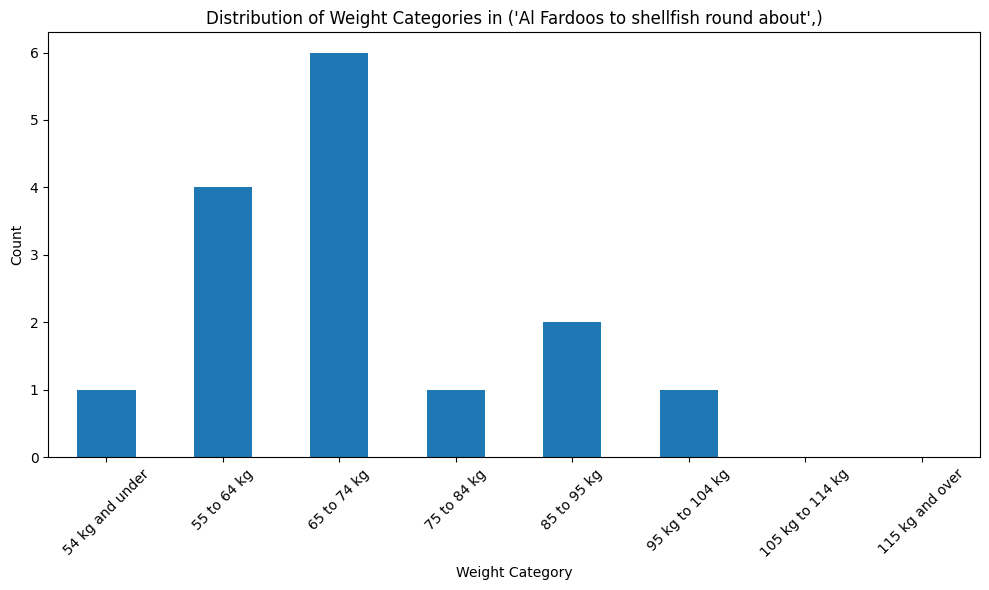

Group: ('Headquarters Business Park',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2966       70 to 74     2253   2018-05-03    male         1         17.7   
2599       25 to 34      608   2019-01-13  female         1         35.7   
4390       35 to 44      923   2019-08-07  female         1         28.2   
3717       20 to 24     1053   2018-11-14  female         1         27.4   
4240            75+     1049   2019-09-03    male         1         35.5   
...             ...      ...          ...     ...       ...          ...   
1138       45 to 54     1022   2018-08-25    male        16         31.9   
4340       35 to 44      355   2019-04-19    male        16         36.1   
2479   19 and under       18   2019-11-16    male        16         28.1   
5379       25 to 34     2038   2018-11-28  female        16         22.6   
3230       25 to 34      613   2017-03-08  female        17         21.8   

      smt_finish_seconds                    smt_name user_weight_category  \
2966                 342  Headquarters Business Park      54 kg and under   
2599                 169  Headquarters Business Park      54 kg and under   
4390                 214  Headquarters Business Park          65 to 74 kg   
3717                 220  Headquarters Business Park          65 to 74 kg   
4240                 170  Headquarters Business Park          85 to 95 kg   
...                  ...                         ...                  ...   
1138                 189  Headquarters Business Park          75 to 84 kg   
4340                 167  Headquarters Business Park          85 to 95 kg   
2479                 215  Headquarters Business Park          65 to 74 kg   
5379                 267  Headquarters Business Park      54 kg and under   
3230                 277  Headquarters Business Park          65 to 74 kg   

                    act_title  act_avg_spd  act_max_spd  act_total_km  \
2966           Afternoon Ride         14.0         34.2         14.84   
2599           Afternoon Ride         24.4         40.0         24.43   
4390             Morning Ride         21.2         32.0         17.80   
3717  Two Amigas Morning Ride         27.4         39.2         30.13   
4240          Ride 4 d health         19.3         46.8         35.51   
...                       ...          ...          ...           ...   
1138             Morning Ride         17.6         38.2         38.30   
4340           Afternoon Ride         38.7         64.1         49.84   
2479             Morning Ride         23.9         43.6         50.45   
5379               Night Ride         17.3         34.2         23.65   
3230             Evening Ride         25.3         37.8         27.68   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
2966                3805               3805            0  7860  
2599                3611               3611            1  7070  
4390                3029               3029            1  7628  
3717                3955               3955            0  6250  
4240                6609               6609            0  7861  
...                  ...                ...          ...   ...  
1138                7829               7829            1  7674  
4340                4635               4635            1  7142  
2479                7596               7596            0  5955  
5379                4910               4910            0  7085  
3230                3945               3945            0  7086  

[155 rows x 17 columns]

user_weight_category
54 kg and under     60
55 to 64 kg         13
65 to 74 kg         32
75 to 84 kg         22
85 to 95 kg         13
95 kg to 104 kg      5
105 kg to 114 kg     2
115 kg and over      4
Name: count, dtype: int64


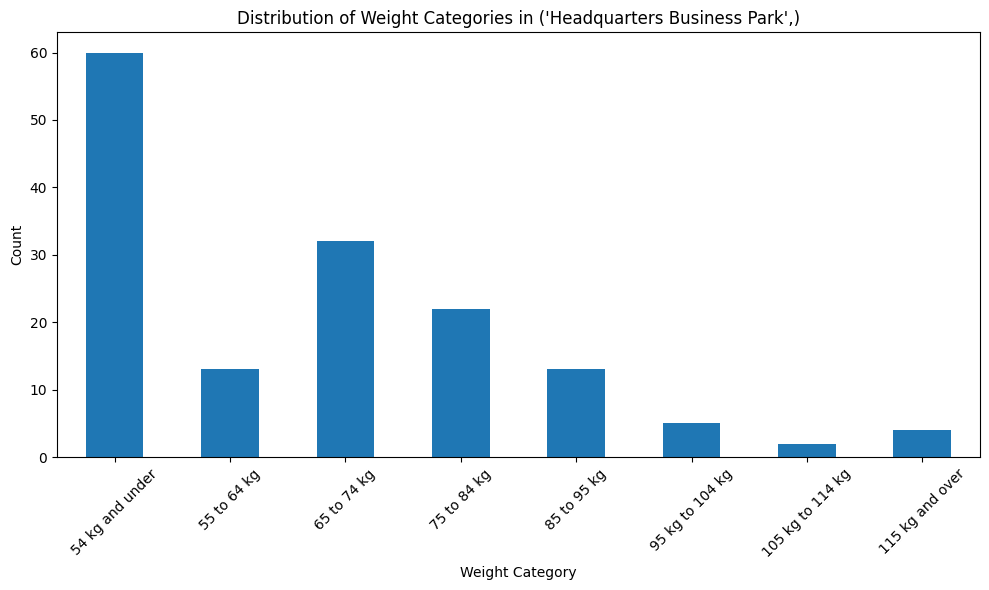

Group: ('King Street side',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2489       25 to 34      610   2018-12-26  female         1         32.7   
2308   19 and under       21   2018-12-26    male         1         43.4   
261        45 to 54     1028   2020-01-10  female         1         10.6   
4292       35 to 44      614   2020-02-14  female         1         28.6   
4703       55 to 64      937   2017-02-08    male         1         40.3   
6187       20 to 24     1053   2018-12-26  female         1         31.6   
1329       65 to 69     1277   2020-03-04    male         1         71.8   
228    19 and under       47   2018-12-14  female         1         22.5   
5765       25 to 34      318   2019-01-27    male         1         46.0   
4491            75+     1049   2019-10-14    male         1         33.4   
5385       35 to 44      924   2018-07-27  female         2         27.0   
6082            75+     1048   2018-09-17    male         2         26.4   
4328       45 to 54      652   2018-12-26    male         2         43.0   
477    19 and under       49   2020-01-10  female         2         10.6   
539    19 and under        2   2018-12-26    male         2         43.3   
3144       35 to 44      267   2018-12-26    male         2         43.2   
1955       20 to 24       66   2018-01-13    male         2         42.9   
2179       20 to 24     1131   2018-10-24    male         2         42.9   
6143       25 to 34      614   2018-07-20  female         2         30.6   
4737   19 and under       48   2020-01-10  female         2         10.6   
1439       25 to 34      217   2018-05-07    male         2         43.8   
2138       55 to 64     1033   2020-03-28    male         2         39.3   
4342       25 to 34      227   2018-12-26    male         3         43.3   
5213       35 to 44      639   2018-01-13    male         3         42.8   
3743       55 to 64     1038   2019-02-26    male         3         37.3   
1404   19 and under       46   2017-06-11    male         3         41.9   
3518       25 to 34      616   2018-10-24  female         3         28.5   
1276       35 to 44      923   2019-10-11  female         3         24.8   
5310       25 to 34      180   2018-12-26    male         3         43.3   
4150       20 to 24       56   2017-04-29    male         4         42.2   
2452       55 to 64     1039   2020-03-27    male         4         37.0   
470        25 to 34      611   2017-05-29  female         4         27.6   
570        55 to 64     1041   2018-02-15    male         5         36.8   
5979       35 to 44      926   2017-12-29  female         5         22.1   
3368       25 to 34     1217   2018-07-27  female         5         27.1   
5970       25 to 34      186   2017-07-17    male         5         43.2   
3007       35 to 44     1260   2018-06-05  female         6         18.9   
2420       45 to 54      936   2019-11-26    male         6         39.2   
4367       55 to 64     1036   2018-02-17    male         6         34.9   
5810   19 and under       17   2018-03-28    male         6         39.0   
2078       25 to 34      267   2018-05-07    male         6         42.3   
4108       20 to 24        2   2019-08-07    male         6         41.1   
2856       25 to 34     1053   2019-09-11  female         6         26.8   
3964       35 to 44      662   2017-05-15    male         6         41.1   
3178       35 to 44      679   2016-10-26    male         7         41.0   
2071       25 to 34      224   2017-11-20    male         7         41.9   
2968   19 and under       34   2019-01-23    male         7         38.5   
295        20 to 24        4   2018-01-13    male         7         40.5   
3351       20 to 24       58   2018-12-02    male         7         40.5   
4100       25 to 34      436   2017-04-05    male         8         41.7   
2817       55 to 64     1032   2019-05-06    male         8         31.3   
3377       45 to 54      676   2018-10-22    male    

user_weight_category
54 kg and under     12
55 to 64 kg          5
65 to 74 kg         17
75 to 84 kg         14
85 to 95 kg          9
95 kg to 104 kg      1
105 kg to 114 kg     0
115 kg and over      1
Name: count, dtype: int64


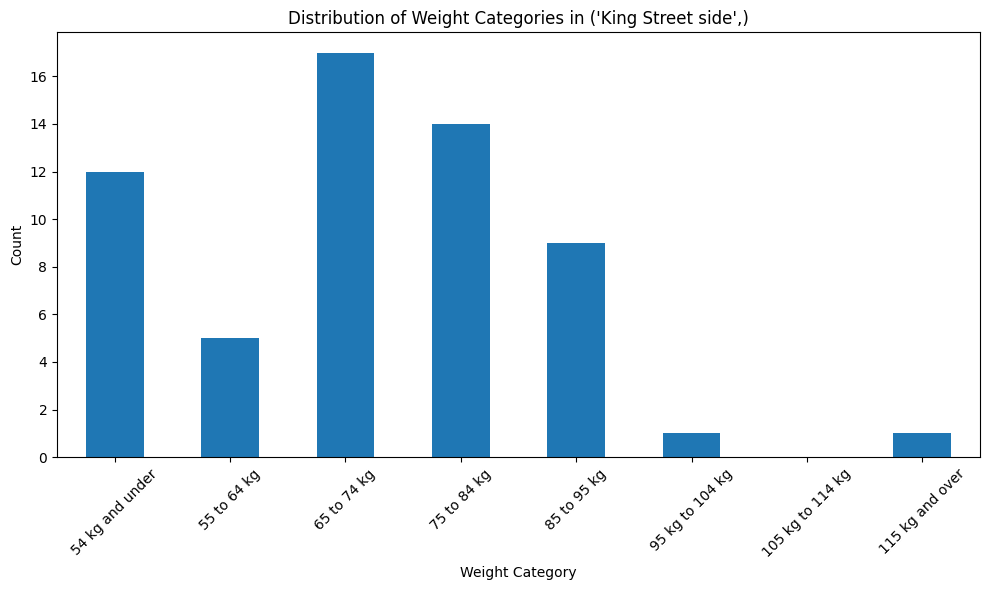

Group: ('North Corniche',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
5172       45 to 54      958   2019-02-11    male         1         48.3   
5358       55 to 64      937   2018-01-01    male         1         43.4   
1701       20 to 24       58   2018-12-02    male         1         47.6   
599        70 to 74     1622   2016-12-05    male         1         33.8   
6074       35 to 44     1583   2019-07-19  female         1         30.3   
...             ...      ...          ...     ...       ...          ...   
641        25 to 34      417   2017-08-02    male        15         42.4   
585        20 to 24        3   2020-03-07    male        15         36.2   
4402       35 to 44      651   2018-11-28    male        15         42.4   
3274       25 to 34      620   2019-06-15  female        15         22.3   
6090   19 and under       27   2018-10-06    male        15         36.8   

      smt_finish_seconds        smt_name user_weight_category  \
5172                 359  North Corniche          85 to 95 kg   
5358                 400  North Corniche          75 to 84 kg   
1701                 365  North Corniche                  NaN   
599                  514  North Corniche      54 kg and under   
6074                 573  North Corniche                  NaN   
...                  ...             ...                  ...   
641                  409  North Corniche     105 kg to 114 kg   
585                  479  North Corniche          65 to 74 kg   
4402                 409  North Corniche          65 to 74 kg   
3274                 778  North Corniche          55 to 64 kg   
6090                 472  North Corniche                  NaN   

                                              act_title  act_avg_spd  \
5172                          Monday evening windy ride         34.7   
5358                         Solo training Evening Ride         30.7   
1701                                       Evening Ride         39.0   
599                                          Night Ride         28.4   
6074                                       Evening Ride         24.0   
...                                                 ...          ...   
641                                          Night Ride         31.0   
585   Morning Ride winking face flexed biceps person...         29.1   
4402                                         Night Ride         39.1   
3274                                       Evening Ride         16.0   
6090                                       Morning Ride         23.7   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
5172         52.2         41.90                4344               4344   
5358         47.5         19.28                2259               2259   
1701         50.8         37.71                3480               3480   
599          49.0          9.71                1230               1230   
6074         37.1         15.52                2324               2324   
...           ...           ...                 ...                ...   
641          52.6         40.70                4729               4729   
585          42.1         65.12                8063               8063   
4402         52.9         20.69                1906               1906   
3274         29.2         50.68               11398              11398   
6090         40.0         66.18               10038              10038   

      has_hr_data    id  
5172            0  5750  
5358            1  5898  
1701            1  4679  
599             0  5935  
6074            0  5739  
...           ...   ...  
641             1  4810  
585             1  4693  
4402            0  5370  
3274            0  5349  
6090            0  4636  

[106 rows x 17 columns]

user_weight_category
54 kg and under     29
55 to 64 kg         13
65 to 74 kg         21
75 to 84 kg         19
85 to 95 kg         14
95 kg to 104 kg      3
105 kg to 114 kg     1
115 kg and over      1
Name: count, dtype: int64


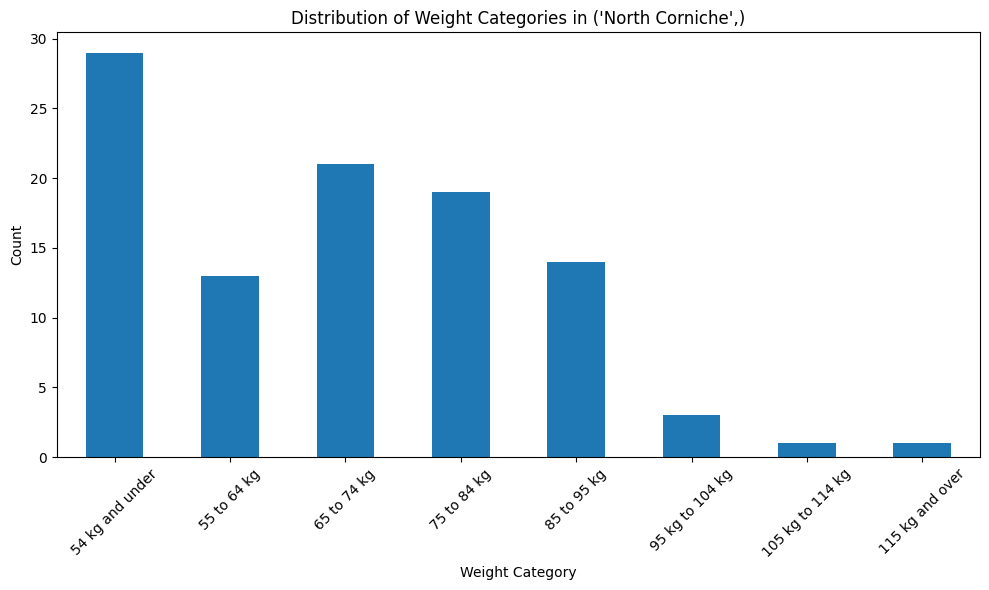

Group: ('Obhur North Short',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2329       35 to 44      639   2018-02-17    male         1         37.6   
6271            75+     1049   2019-06-18    male         1         28.5   
3654       20 to 24       51   2016-08-19    male         1         37.5   
1480       35 to 44      923   2019-09-13  female         1         21.1   
2934       20 to 24     1053   2018-07-27  female         1         24.6   
1245       65 to 69     1047   2018-04-28    male         1         33.4   
2798       25 to 34      214   2014-10-24    male         1         38.1   
4068   19 and under       49   2020-01-10  female         1         17.0   
4607       25 to 34      186   2017-01-20    male         2         37.9   
1515       20 to 24     1054   2019-09-13  female         2          7.4   
5510       35 to 44      267   2019-09-28    male         2         35.8   
4678       35 to 44      927   2019-11-15  female         2          6.3   
394        20 to 24        4   2018-02-17    male         2         36.8   
2075       25 to 34      612   2020-04-04  female         2         24.8   
5061       55 to 64      940   2018-06-03    male         2         33.5   
3887       45 to 54      936   2018-11-30    male         2         39.0   
3255   19 and under        7   2019-07-12    male         3         30.5   
2468       20 to 24       56   2017-03-10    male         3         33.1   
3534       25 to 34      190   2017-10-20    male         3         37.6   
5603       45 to 54      940   2017-01-20    male         3         37.9   
3490       55 to 64      937   2017-03-10    male         3         33.3   

      smt_finish_seconds           smt_name user_weight_category  \
2329                 658  Obhur North Short          65 to 74 kg   
6271                 867  Obhur North Short          85 to 95 kg   
3654                 659  Obhur North Short          65 to 74 kg   
1480                1174  Obhur North Short          65 to 74 kg   
2934                1005  Obhur North Short          65 to 74 kg   
1245                 740  Obhur North Short          75 to 84 kg   
2798                 649  Obhur North Short          75 to 84 kg   
4068                1453  Obhur North Short      54 kg and under   
4607                 652  Obhur North Short      54 kg and under   
1515                3356  Obhur North Short      54 kg and under   
5510                 691  Obhur North Short          65 to 74 kg   
4678                3897  Obhur North Short          65 to 74 kg   
394                  671  Obhur North Short      54 kg and under   
2075                 998  Obhur North Short      54 kg and under   
5061                 738  Obhur North Short          55 to 64 kg   
3887                 633  Obhur North Short          75 to 84 kg   
3255                 810  Obhur North Short          65 to 74 kg   
2468                 747  Obhur North Short          65 to 74 kg   
3534                 658  Obhur North Short          55 to 64 kg   
5603                 652  Obhur North Short          55 to 64 kg   
3490                 743  Obhur North Short          75 to 84 kg   

                                              act_title  act_avg_spd  \
2329                                       Morning Ride         27.4   
6271                                       Morning Ride         20.5   
3654                                       Morning Ride         34.9   
1480                           My 1st ever Century Ride         22.3   
2934                                       Morning Ride         22.2   
1245                         Saturday Spin with Patrice         32.2   
2798  Bike. Jeddah-North Obhur. Ritmo alegre. Grupet...         32.2   
4068                                     Afternoon Ride         17.3   
4607                                       Morning Ride         34.0   
1515                                       Evening Ride         17.7   
5510            تمرين هلاك... collision على

user_weight_category
54 kg and under     5
55 to 64 kg         3
65 to 74 kg         8
75 to 84 kg         4
85 to 95 kg         1
95 kg to 104 kg     0
105 kg to 114 kg    0
115 kg and over     0
Name: count, dtype: int64


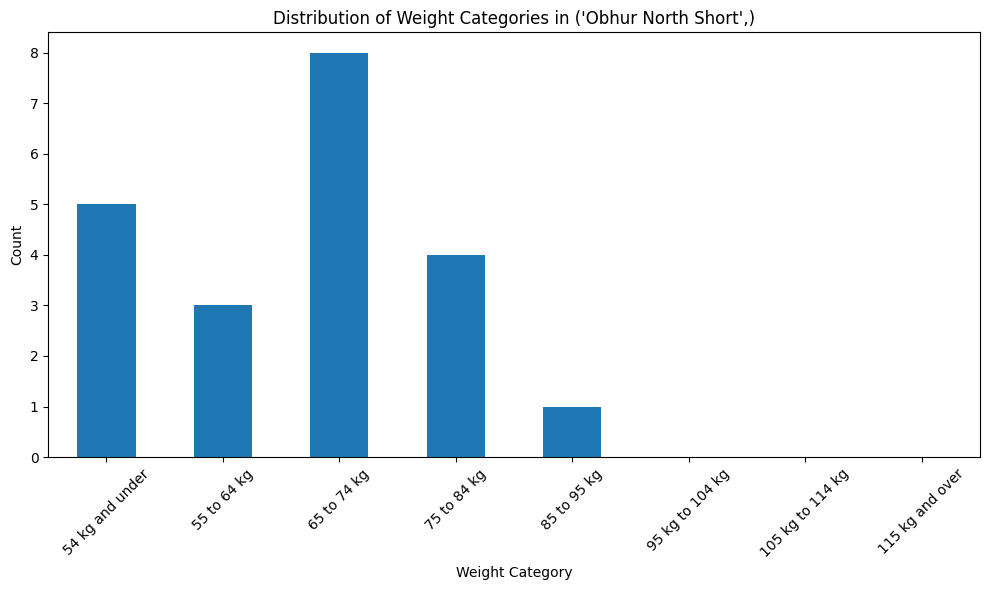

Group: ('Oghor 2 SailsIsland',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3951       35 to 44      923   2018-12-14  female         1         28.4   
3372       20 to 24       58   2018-12-02    male         1         47.8   
3666       45 to 54     1614   2020-03-07  female         1         24.7   
4706       25 to 34      404   2019-12-20    male         1         60.8   
5171       55 to 64      937   2017-05-03    male         1         45.4   
...             ...      ...          ...     ...       ...          ...   
6284   19 and under       18   2019-10-30    male        17         35.5   
5898       45 to 54      997   2019-08-16    male        17         40.5   
3843       45 to 54      946   2015-12-11    male        17         40.5   
4266   19 and under       23   2019-05-08    male        18         34.0   
5884       35 to 44      714   2018-10-22    male        18         44.0   

      smt_finish_seconds             smt_name user_weight_category  \
3951                 253  Oghor 2 SailsIsland          65 to 74 kg   
3372                 150  Oghor 2 SailsIsland                  NaN   
3666                 290  Oghor 2 SailsIsland          55 to 64 kg   
4706                 118  Oghor 2 SailsIsland      95 kg to 104 kg   
5171                 158  Oghor 2 SailsIsland          75 to 84 kg   
...                  ...                  ...                  ...   
6284                 202  Oghor 2 SailsIsland          65 to 74 kg   
5898                 177  Oghor 2 SailsIsland          85 to 95 kg   
3843                 177  Oghor 2 SailsIsland          65 to 74 kg   
4266                 211  Oghor 2 SailsIsland          55 to 64 kg   
5884                 163  Oghor 2 SailsIsland          65 to 74 kg   

                                              act_title  act_avg_spd  \
3951                                       Morning Ride         22.5   
3372                                       Evening Ride         39.0   
3666                   Corniche lazy saturday 7th march         16.3   
4706                                       Morning Ride         26.3   
5171                               Evening Ride with JC         28.5   
...                                                 ...          ...   
6284                                       Evening Ride         25.4   
5898             Morning Ride تمرين خفيف استعادة لياقة          29.1   
3843                             Sortie à vélo matinale         32.3   
4266  ثاني نص، تمرين جميل flexed biceps: light skin ...         27.5   
5884  Nice night ride with jeddahcycliests thumbs up...         35.1   

      act_max_spd  act_total_km  act_moving_seconds  act_total_seconds  \
3951         31.3         50.40                8050               8050   
3372         50.8         37.71                3480               3480   
3666         32.0         33.92                7482               7482   
4706         72.7         24.14                3305               3305   
5171         54.4         32.40                4096               4096   
...           ...           ...                 ...                ...   
6284         45.0         52.48                7449               7449   
5898         52.9         57.40                7093               7093   
3843         47.2        105.11               11718              11718   
4266         44.3         31.40                4106               4106   
5884         51.1         52.75                5405               5405   

      has_hr_data    id  
3951            1  4403  
3372            1  3137  
3666            0  4576  
4706            0  3280  
5171            1  4580  
...           ...   ...  
6284            0  3092  
5898            1  4433  
3843            0  4431  
4266            0  3093  
5884            1  3987  

[126 rows x 17 columns]

user_weight_category
54 kg and under     35
55 to 64 kg         12
65 to 74 kg         21
75 to 84 kg         26
85 to 95 kg         14
95 kg to 104 kg      9
105 kg to 114 kg     1
115 kg and over      4
Name: count, dtype: int64


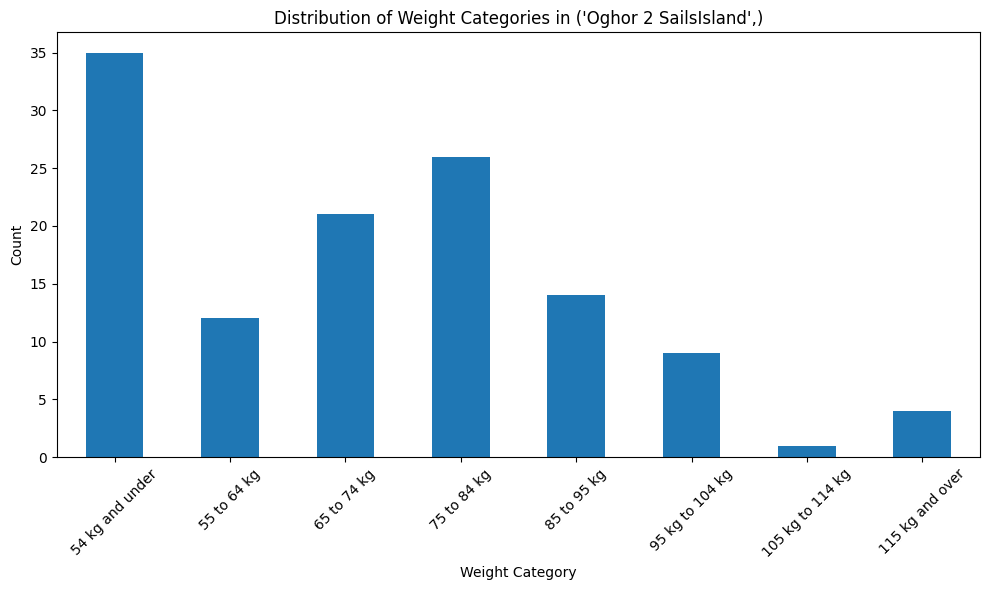

Group: ('PRINCE SULTAN - ASSALAM TO FATIMA',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
4803       55 to 64     1041   2017-11-28    male         1         40.7   
4541       25 to 34      397   2018-02-16    male         1         87.3   
3235       20 to 24      137   2019-01-05    male         1         81.4   
2111            75+     1049   2019-06-09    male         1         36.2   
184        35 to 44     1339   2017-05-29  female         1         63.9   
2042       45 to 54     1124   2018-08-07    male         1         66.9   
1652       65 to 69     1047   2018-05-30    male         1         38.2   
4901       45 to 54     1350   2019-07-12  female         1         28.0   
4979   19 and under       17   2019-01-01    male         1         40.4   
2742       35 to 44      216   2019-02-02    male         1         75.8   
468        20 to 24        2   2019-08-28    male         2         43.1   
1598       55 to 64     1039   2017-10-11    male         2         40.4   
2542       25 to 34      169   2017-08-23    male         2         55.2   
5671       55 to 64     1033   2020-02-12    male         3         37.0   
4959       20 to 24       72   2017-07-29    male         3         38.2   
759    19 and under       34   2019-03-27    male         3         38.2   
5711       35 to 44     1227   2018-09-03    male         4         49.9   
2446       25 to 34     1288   2018-09-03    male         4         49.9   
3437       35 to 44     1077   2018-09-03    male         4         49.9   
6078       55 to 64     1127   2017-05-26    male         4         36.3   
2579       25 to 34      170   2018-12-19    male         5         47.0   
3869       45 to 54     1123   2017-02-06    male         5         43.6   
3339   19 and under       13   2019-10-09    male         5         30.6   
3720       55 to 64     1031   2019-09-11    male         5         35.5   
3530       25 to 34      226   2018-12-19    male         6         44.8   
5643       35 to 44      267   2018-12-19    male         6         46.1   
3423       45 to 54     1090   2020-02-01    male         6         40.2   
3789   19 and under        7   2019-03-18    male         6         28.2   
3206       55 to 64     1044   2020-01-06    male         6         35.4   
3367       20 to 24       60   2015-06-17    male         7         32.0   
2300       55 to 64     1040   2019-12-04    male         7         35.0   
4480   19 and under     1278   2018-01-15    male         7         27.9   
2173       55 to 64      938   2019-06-24    male         7         35.0   
671        25 to 34      166   2015-10-08    male         7         43.1   
278        35 to 44      679   2015-01-19    male         7         44.0   
4936       25 to 34      282   2018-11-17    male         8         42.5   
1838   19 and under       46   2017-04-07    male         8         27.6   

      smt_finish_seconds                           smt_name  \
4803                 240  PRINCE SULTAN - ASSALAM TO FATIMA   
4541                 112  PRINCE SULTAN - ASSALAM TO FATIMA   
3235                 120  PRINCE SULTAN - ASSALAM TO FATIMA   
2111                 270  PRINCE SULTAN - ASSALAM TO FATIMA   
184                  153  PRINCE SULTAN - ASSALAM TO FATIMA   
2042                 146  PRINCE SULTAN - ASSALAM TO FATIMA   
1652                 256  PRINCE SULTAN - ASSALAM TO FATIMA   
4901                 349  PRINCE SULTAN - ASSALAM TO FATIMA   
4979                 242  PRINCE SULTAN - ASSALAM TO FATIMA   
2742                 129  PRINCE SULTAN - ASSALAM TO FATIMA   
468                  227  PRINCE SULTAN - ASSALAM TO FATIMA   
1598                 242  PRINCE SULTAN - ASSALAM TO FATIMA   
2542                 177  PRINCE SULTAN - ASSALAM TO FATIMA   
5671                 264  PRINCE SULTAN - ASSALAM TO FATIMA   
4959                 256  PRINCE SULTAN - ASSALAM TO FATIMA   
759                  256  PRINCE SULTAN - ASSALAM TO FATIMA   
5711                 196  PRINCE SULTAN - ASS

user_weight_category
54 kg and under     7
55 to 64 kg         2
65 to 74 kg         8
75 to 84 kg         7
85 to 95 kg         8
95 kg to 104 kg     3
105 kg to 114 kg    1
115 kg and over     0
Name: count, dtype: int64


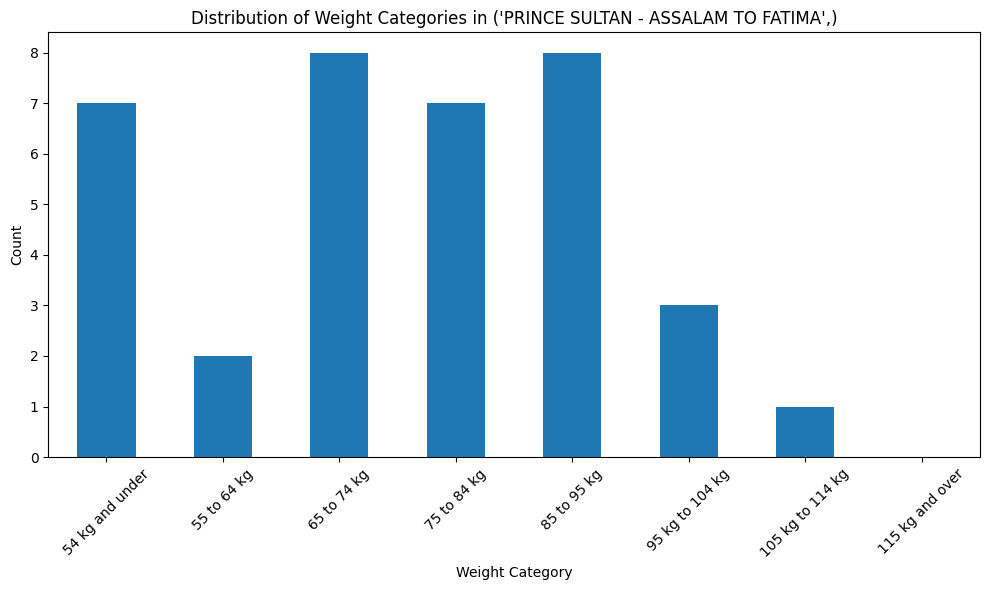

Group: ('S.Ubhur Alkurnaysh South Bound with detour',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
2015   19 and under        6   2017-12-04    male         1         41.1   
3011       25 to 34      158   2016-12-16    male         1         45.5   
3375            75+     1049   2019-11-20    male         1         39.9   
2287       55 to 64      940   2017-12-08    male         1         45.4   
2596       35 to 44      639   2016-12-16    male         1         45.6   
5086       20 to 24     1053   2019-01-04  female         1         29.4   
5581       20 to 24        2   2020-01-03    male         1         43.9   
5971       45 to 54      958   2019-12-13    male         1         44.4   
1094       35 to 44      926   2017-12-08  female         1         28.6   
954    19 and under       47   2018-12-14  female         1         26.2   
3890       35 to 44      614   2019-11-22  female         2         28.2   
4311       35 to 44     1072   2019-12-13    male         2         44.2   
2193   19 and under        4   2017-12-11    male         2         40.6   
2582   19 and under       34   2019-11-11    male         2         40.6   
4498       25 to 34      608   2019-12-20  female         2         32.2   
2185       65 to 69     1100   2020-01-08    male         2         28.0   
3411       35 to 44      927   2019-11-15  female         3         22.1   
3356       20 to 24       51   2015-12-06    male         3         42.1   
489        45 to 54     1089   2018-12-14    male         3         43.0   
4114       35 to 44      267   2020-01-03    male         3         43.7   
5402       25 to 34       56   2019-12-13    male         3         44.2   
1865       55 to 64     1033   2019-11-22    male         3         34.0   
4139   19 and under        8   2020-01-08    male         4         39.6   
6237       35 to 44     1073   2017-12-01    male         4         43.6   
3744       20 to 24       57   2016-12-05    male         4         34.8   
647        55 to 64      937   2017-12-09    male         4         33.8   

      smt_finish_seconds                                    smt_name  \
2015                 776  S.Ubhur Alkurnaysh South Bound with detour   
3011                 700  S.Ubhur Alkurnaysh South Bound with detour   
3375                 798  S.Ubhur Alkurnaysh South Bound with detour   
2287                 702  S.Ubhur Alkurnaysh South Bound with detour   
2596                 698  S.Ubhur Alkurnaysh South Bound with detour   
5086                1083  S.Ubhur Alkurnaysh South Bound with detour   
5581                 726  S.Ubhur Alkurnaysh South Bound with detour   
5971                 718  S.Ubhur Alkurnaysh South Bound with detour   
1094                1114  S.Ubhur Alkurnaysh South Bound with detour   
954                 1217  S.Ubhur Alkurnaysh South Bound with detour   
3890                1129  S.Ubhur Alkurnaysh South Bound with detour   
4311                 721  S.Ubhur Alkurnaysh South Bound with detour   
2193                 784  S.Ubhur Alkurnaysh South Bound with detour   
2582                 784  S.Ubhur Alkurnaysh South Bound with detour   
4498                 990  S.Ubhur Alkurnaysh South Bound with detour   
2185                1139  S.Ubhur Alkurnaysh South Bound with detour   
3411                1441  S.Ubhur Alkurnaysh South Bound with detour   
3356                 757  S.Ubhur Alkurnaysh South Bound with detour   
489                  741  S.Ubhur Alkurnaysh South Bound with detour   
4114                 729  S.Ubhur Alkurnaysh South Bound with detour   
5402                 721  S.Ubhur Alkurnaysh South Bound with detour   
1865                 937  S.Ubhur Alkurnaysh South Bound with detour   
4139                 804  S.Ubhur Alkurnaysh South Bound with detour   
6237                 730  S.Ubhur Alkurnaysh South Bound with detour   
3744                 916  S.Ubhur Alkurnaysh South Bound with detour   
647                  943  S.Ubhur Alkurnaysh South Bound with detour   

     us

user_weight_category
54 kg and under     9
55 to 64 kg         2
65 to 74 kg         8
75 to 84 kg         4
85 to 95 kg         3
95 kg to 104 kg     0
105 kg to 114 kg    0
115 kg and over     0
Name: count, dtype: int64


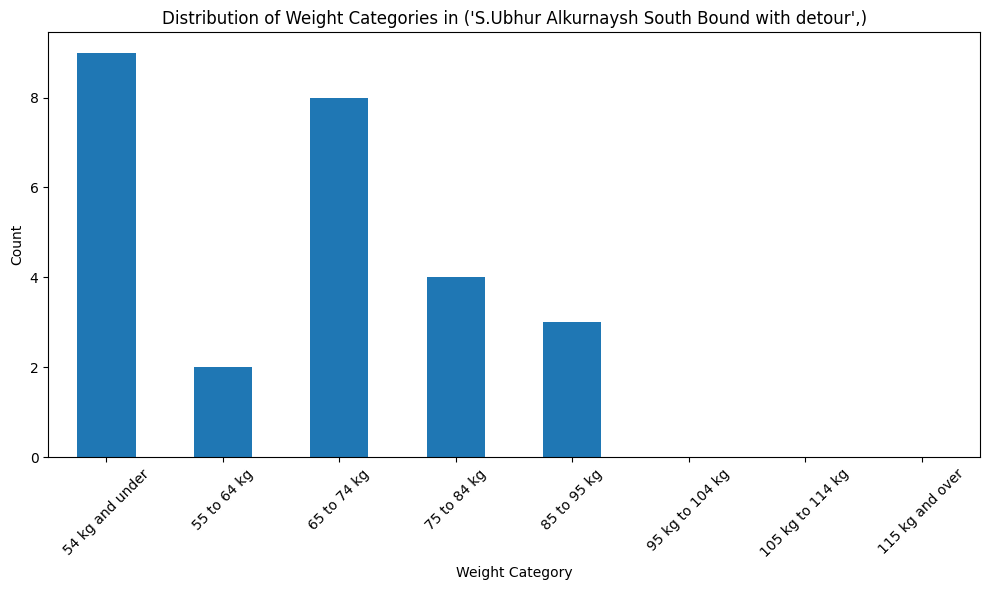

Group: ('Starbucks to Majid',)


user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
3760       65 to 69     1047   2018-05-07    male         1         28.7   
3870       35 to 44      922   2018-05-09  female         1         38.8   
4573   19 and under       47   2018-09-15  female         1         25.3   
2432       35 to 44      631   2019-09-30    male         1         68.7   
2025       25 to 34      146   2019-05-08    male         1         69.4   
...             ...      ...          ...     ...       ...          ...   
1665       20 to 24       61   2017-04-06    male        13         30.8   
478        35 to 44      641   2014-12-01    male        13         38.7   
4756       25 to 34      158   2017-12-06    male        13         41.8   
1197   19 and under       13   2017-09-12    male        13         28.4   
3245       25 to 34      619   2016-09-25  female        13         18.2   

      smt_finish_seconds            smt_name user_weight_category  \
3760                 490  Starbucks to Majid          75 to 84 kg   
3870                 363  Starbucks to Majid      54 kg and under   
4573                 556  Starbucks to Majid      54 kg and under   
2432                 205  Starbucks to Majid      54 kg and under   
2025                 203  Starbucks to Majid     105 kg to 114 kg   
...                  ...                 ...                  ...   
1665                 457  Starbucks to Majid          85 to 95 kg   
478                  364  Starbucks to Majid          65 to 74 kg   
4756                 337  Starbucks to Majid          85 to 95 kg   
1197                 496  Starbucks to Majid          65 to 74 kg   
3245                 775  Starbucks to Majid      54 kg and under   

              act_title  act_avg_spd  act_max_spd  act_total_km  \
3760   Monday Solo Ride         28.4         38.9        102.57   
3870       Evening Ride         18.7         78.8         31.84   
4573   من أرهب التمارين         17.7         31.3         54.53   
2432  تمرين مع دراج جده         32.4        110.9         50.52   
2025         Night Ride         28.8        105.5         28.01   
...                 ...          ...          ...           ...   
1665      MidNight Ride         27.9         40.7         17.51   
478        SS+Threshold         34.2         46.4         57.80   
4756       Evening Ride         31.7         52.9         81.27   
1197       Evening Ride         28.5         46.1         39.08   
3245       Morning Ride         18.2         61.9         15.13   

      act_moving_seconds  act_total_seconds  has_hr_data    id  
3760               12988              12988            1  1100  
3870                6114               6114            0   961  
4573               11094              11094            0    46  
2432                5606               5606            0   643  
2025                3504               3504            0   152  
...                  ...                ...          ...   ...  
1665                2258               2258            0    62  
478                 6079               6079            1   655  
4756                9243               9243            1   164  
1197                4932               4932            0    12  
3245                2986               2986            0   631  

[87 rows x 17 columns]

user_weight_category
54 kg and under     37
55 to 64 kg          5
65 to 74 kg         15
75 to 84 kg          9
85 to 95 kg         12
95 kg to 104 kg      4
105 kg to 114 kg     1
115 kg and over      2
Name: count, dtype: int64


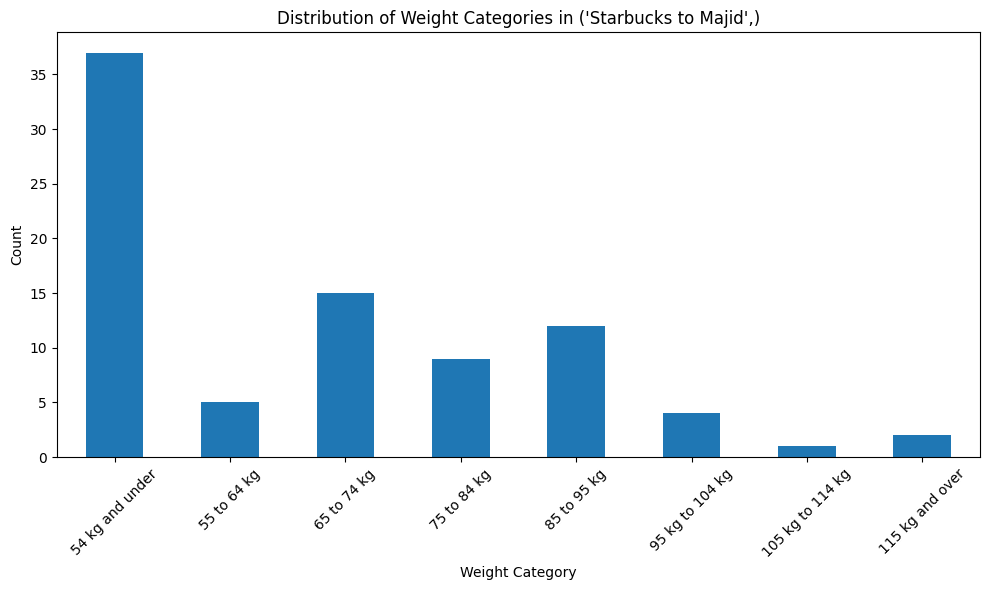

In [1122]:
# Tetapkan urutan kategori untuk 'user_weight_category'
category_order = [
    '54 kg and under', '55 to 64 kg', '65 to 74 kg', '75 to 84 kg',
    '85 to 95 kg', '95 kg to 104 kg', '105 kg to 114 kg', '115 kg and over'
]


# Loop untuk menghasilkan grafik distribusi setiap grup berdasarkan hanya 10 teratas
for group_name, group_data in df_sorted:
    # Ambil hanya 10 data teratas dari grup
    top_10_group_data = group_data.head(math.ceil(len(group_data) * 0.1))

    print(f"Group: {group_name}")
    display(top_10_group_data)

    # Distribusi kategori berat badan untuk 10 data teratas grup saat ini
    weight_distribution = top_10_group_data['user_weight_category'].value_counts().reindex(category_order, fill_value=0)
    print(weight_distribution)

    # Visualisasi distribusi
    plt.figure(figsize=(10, 6))
    weight_distribution.plot(kind='bar', title=f'Distribution of Weight Categories in {group_name}')
    plt.xlabel('Weight Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Kesimpulan

Berdasarkan grafik distribusi yang Anda unggah, berikut adalah **kesimpulan** utama:

1. **Dominasi Kategori Berat Badan:**
   - **"54 kg and under"** adalah kategori yang mendominasi di banyak lokasi, terutama di lokasi dengan jumlah peserta yang besar seperti **Headquarters Business Park**, **Oghor 2 SailsIsland**, dan **North Corniche**.
   - Kategori **"75 to 84 kg"** juga signifikan di banyak lokasi dan sering menjadi kategori kedua terbanyak.

2. **Distribusi Lokasi Tertentu:**
   - Lokasi dengan jumlah peserta lebih kecil, seperti **Obhur North Short**, cenderung memiliki distribusi yang lebih merata di antara kategori berat badan.
   - Lokasi dengan peserta lebih besar, seperti **Headquarters Business Park** dan **Oghor 2 SailsIsland**, menunjukkan dominasi kategori tertentu seperti **"54 kg and under"**.

3. **Kategori Berat Badan dengan Peserta Sedikit:**
   - Kategori **"105 kg to 114 kg"** dan **"115 kg and over"** memiliki jumlah peserta paling sedikit di hampir semua lokasi, menunjukkan bahwa peserta dengan berat badan tinggi jarang ditemukan.

4. **Variasi Lokasi:**
   - Lokasi seperti **Al Fardoos to shellfish round about** menunjukkan distribusi yang relatif seimbang di beberapa kategori, tetapi tetap didominasi oleh **"75 to 84 kg"**.
   - Lokasi seperti **S.Ubhur Alkurnaysh South Bound with detour** memiliki jumlah peserta yang relatif sedikit, tetapi tren distribusi tetap serupa dengan lokasi lain.

# Classification

## Softmax regression

In [1123]:
df_sr = df_clean.copy()
df_sr

user_age_group attempt_date  gender  smt_rank  smt_avg_spd  \
0         25 to 34   2017-12-22    male       712         15.8   
1         25 to 34   2015-04-13    male       189         33.2   
2         25 to 34   2018-02-07    male       264         23.7   
3         25 to 34   2018-08-24    male        50         33.4   
4         25 to 34   2020-03-06  female        19         21.3   
..             ...          ...     ...       ...          ...   
781       45 to 54   2018-09-06     NaN        85         19.3   
782       25 to 34   2020-03-14     NaN        43         41.2   
783       35 to 44   2014-02-24     NaN       297         23.8   
784   19 and under   2015-12-30     NaN        56          8.1   
785       20 to 24   2019-11-22     NaN        13          7.8   

     smt_finish_seconds                             smt_name  \
0                   382           Headquarters Business Park   
1                   216                  Oghor 2 SailsIsland   
2                   593                   Starbucks to Majid   
3                   817  Al Fardoos to shellfish round about   
4                   284           Headquarters Business Park   
..                  ...                                  ...   
781                 728                   Starbucks to Majid   
782                 174                  Oghor 2 SailsIsland   
783                 730                       North Corniche   
784                 883                  Oghor 2 SailsIsland   
785                3175                    Obhur North Short   

    user_weight_category         act_title  act_avg_spd  act_max_spd  \
0        54 kg and under        Night Ride         13.6         34.9   
1       105 kg to 114 kg        Night Ride         21.5         43.2   
2            75 to 84 kg      Evening Ride         26.7         92.9   
3            75 to 84 kg    Afternoon Ride         31.4         54.4   
4        54 kg and under  ثاني تمرين ١٠٠كم         19.9         43.2   
..                   ...               ...          ...          ...   
781          65 to 74 kg      Morning Ride         24.4         35.6   
782      54 kg and under    Afternoon Ride         25.5         51.1   
783     105 kg to 114 kg      Evening Ride         19.3         32.4   
784          65 to 74 kg      Evening Ride         18.1         41.8   
785      54 kg and under   100k challenge          24.3         49.7   

     act_total_km  act_moving_seconds  act_total_seconds  has_hr_data  
0           19.24                5103               5103            0  
1           23.47                3926               3926            0  
2           38.23                5152               5152            0  
3           65.77                7548               7548            1  
4           96.53               17493              17493            0  
..            ...                 ...                ...          ...  
781         74.71               11025              11025            0  
782         63.13                8925               8925            0  
783         21.32                3971               3971            0  
784         17.95                3562               3562            0  
785        100.73               14930              14930            0  

[7078 rows x 15 columns]

In [1124]:
# Pastikan kolom 'gender' sudah ada di df_sr
df_sr['gender'] = df_sr['gender'].replace({'female': 1, 'male': 2})

In [1125]:
unique_summary = {
    "Attribute": [],
    "Unique Count": [],
    "Unique Values": []
}

for column in ["user_age_group", "attempt_date", "smt_name", "user_weight_category", "act_title"]:
    unique_values = df_sr[column].unique()
    unique_summary["Attribute"].append(column)
    unique_summary["Unique Count"].append(len(unique_values))
    unique_summary["Unique Values"].append(unique_values)

unique_summary_df = pd.DataFrame(unique_summary)
unique_summary_df

Attribute  Unique Count  \
0        user_age_group             9   
1          attempt_date          1499   
2              smt_name             9   
3  user_weight_category             8   
4             act_title          1126   

                                       Unique Values  
0  [25 to 34, 19 and under, 35 to 44, 55 to 64, 4...  
1  [2017-12-22, 2015-04-13, 2018-02-07, 2018-08-2...  
2  [Headquarters Business Park, Oghor 2 SailsIsla...  
3  [54 kg and under, 105 kg to 114 kg, 75 to 84 k...  
4  [Night Ride, Evening Ride, Afternoon Ride, ثان...

In [1126]:
# Mapping untuk User Age Group
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}

df_sr['user_age_group'] = df_sr['user_age_group'].map(age_mapping)
df_sr

user_age_group attempt_date  gender  smt_rank  smt_avg_spd  \
0                 2   2017-12-22     2.0       712         15.8   
1                 2   2015-04-13     2.0       189         33.2   
2                 2   2018-02-07     2.0       264         23.7   
3                 2   2018-08-24     2.0        50         33.4   
4                 2   2020-03-06     1.0        19         21.3   
..              ...          ...     ...       ...          ...   
781               4   2018-09-06     NaN        85         19.3   
782               2   2020-03-14     NaN        43         41.2   
783               3   2014-02-24     NaN       297         23.8   
784               0   2015-12-30     NaN        56          8.1   
785               1   2019-11-22     NaN        13          7.8   

     smt_finish_seconds                             smt_name  \
0                   382           Headquarters Business Park   
1                   216                  Oghor 2 SailsIsland   
2                   593                   Starbucks to Majid   
3                   817  Al Fardoos to shellfish round about   
4                   284           Headquarters Business Park   
..                  ...                                  ...   
781                 728                   Starbucks to Majid   
782                 174                  Oghor 2 SailsIsland   
783                 730                       North Corniche   
784                 883                  Oghor 2 SailsIsland   
785                3175                    Obhur North Short   

    user_weight_category         act_title  act_avg_spd  act_max_spd  \
0        54 kg and under        Night Ride         13.6         34.9   
1       105 kg to 114 kg        Night Ride         21.5         43.2   
2            75 to 84 kg      Evening Ride         26.7         92.9   
3            75 to 84 kg    Afternoon Ride         31.4         54.4   
4        54 kg and under  ثاني تمرين ١٠٠كم         19.9         43.2   
..                   ...               ...          ...          ...   
781          65 to 74 kg      Morning Ride         24.4         35.6   
782      54 kg and under    Afternoon Ride         25.5         51.1   
783     105 kg to 114 kg      Evening Ride         19.3         32.4   
784          65 to 74 kg      Evening Ride         18.1         41.8   
785      54 kg and under   100k challenge          24.3         49.7   

     act_total_km  act_moving_seconds  act_total_seconds  has_hr_data  
0           19.24                5103               5103            0  
1           23.47                3926               3926            0  
2           38.23                5152               5152            0  
3           65.77                7548               7548            1  
4           96.53               17493              17493            0  
..            ...                 ...                ...          ...  
781         74.71               11025              11025            0  
782         63.13                8925               8925            0  
783         21.32                3971               3971            0  
784         17.95                3562               3562            0  
785        100.73               14930              14930            0  

[7078 rows x 15 columns]

In [1127]:
# Mapping untuk User Weight Category
mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}

df_sr['user_weight_category'] = df_sr['user_weight_category'].map(mapping)
df_sr

user_age_group attempt_date  gender  smt_rank  smt_avg_spd  \
0                 2   2017-12-22     2.0       712         15.8   
1                 2   2015-04-13     2.0       189         33.2   
2                 2   2018-02-07     2.0       264         23.7   
3                 2   2018-08-24     2.0        50         33.4   
4                 2   2020-03-06     1.0        19         21.3   
..              ...          ...     ...       ...          ...   
781               4   2018-09-06     NaN        85         19.3   
782               2   2020-03-14     NaN        43         41.2   
783               3   2014-02-24     NaN       297         23.8   
784               0   2015-12-30     NaN        56          8.1   
785               1   2019-11-22     NaN        13          7.8   

     smt_finish_seconds                             smt_name  \
0                   382           Headquarters Business Park   
1                   216                  Oghor 2 SailsIsland   
2                   593                   Starbucks to Majid   
3                   817  Al Fardoos to shellfish round about   
4                   284           Headquarters Business Park   
..                  ...                                  ...   
781                 728                   Starbucks to Majid   
782                 174                  Oghor 2 SailsIsland   
783                 730                       North Corniche   
784                 883                  Oghor 2 SailsIsland   
785                3175                    Obhur North Short   

     user_weight_category         act_title  act_avg_spd  act_max_spd  \
0                       0        Night Ride         13.6         34.9   
1                       6        Night Ride         21.5         43.2   
2                       3      Evening Ride         26.7         92.9   
3                       3    Afternoon Ride         31.4         54.4   
4                       0  ثاني تمرين ١٠٠كم         19.9         43.2   
..                    ...               ...          ...          ...   
781                     2      Morning Ride         24.4         35.6   
782                     0    Afternoon Ride         25.5         51.1   
783                     6      Evening Ride         19.3         32.4   
784                     2      Evening Ride         18.1         41.8   
785                     0   100k challenge          24.3         49.7   

     act_total_km  act_moving_seconds  act_total_seconds  has_hr_data  
0           19.24                5103               5103            0  
1           23.47                3926               3926            0  
2           38.23                5152               5152            0  
3           65.77                7548               7548            1  
4           96.53               17493              17493            0  
..            ...                 ...                ...          ...  
781         74.71               11025              11025            0  
782         63.13                8925               8925            0  
783         21.32                3971               3971            0  
784         17.95                3562               3562            0  
785        100.73               14930              14930            0  

[7078 rows x 15 columns]

In [1128]:
df_sr = pd.get_dummies(df_sr, columns=['smt_name'])
df_sr.head()

user_age_group attempt_date  gender  smt_rank  smt_avg_spd  \
0               2   2017-12-22     2.0       712         15.8   
1               2   2015-04-13     2.0       189         33.2   
2               2   2018-02-07     2.0       264         23.7   
3               2   2018-08-24     2.0        50         33.4   
4               2   2020-03-06     1.0        19         21.3   

   smt_finish_seconds  user_weight_category         act_title  act_avg_spd  \
0                 382                     0        Night Ride         13.6   
1                 216                     6        Night Ride         21.5   
2                 593                     3      Evening Ride         26.7   
3                 817                     3    Afternoon Ride         31.4   
4                 284                     0  ثاني تمرين ١٠٠كم         19.9   

   act_max_spd  ...  has_hr_data  \
0         34.9  ...            0   
1         43.2  ...            0   
2         92.9  ...            0   
3         54.4  ...            1   
4         43.2  ...            0   

   smt_name_Al Fardoos to shellfish round about  \
0                                         False   
1                                         False   
2                                         False   
3                                          True   
4                                         False   

   smt_name_Headquarters Business Park  smt_name_King Street side  \
0                                 True                      False   
1                                False                      False   
2                                False                      False   
3                                False                      False   
4                                 True                      False   

   smt_name_North Corniche  smt_name_Obhur North Short  \
0                    False                       False   
1                    False                       False   
2                    False                       False   
3                    False                       False   
4                    False                       False   

   smt_name_Oghor 2 SailsIsland  smt_name_PRINCE SULTAN - ASSALAM TO FATIMA  \
0                         False                                       False   
1                          True                                       False   
2                         False                                       False   
3                         False                                       False   
4                         False                                       False   

   smt_name_S.Ubhur Alkurnaysh South Bound with detour  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   smt_name_Starbucks to Majid  
0                        False  
1                        False  
2                         True  
3                        False  
4                        False  

[5 rows x 23 columns]

In [1129]:
# Frequency Encoding untuk act_title
freq_map = df_sr['act_title'].value_counts(normalize=True)
df_sr['act_title'] = df_sr['act_title'].map(freq_map)
df_sr.head()

user_age_group attempt_date  gender  smt_rank  smt_avg_spd  \
0               2   2017-12-22     2.0       712         15.8   
1               2   2015-04-13     2.0       189         33.2   
2               2   2018-02-07     2.0       264         23.7   
3               2   2018-08-24     2.0        50         33.4   
4               2   2020-03-06     1.0        19         21.3   

   smt_finish_seconds  user_weight_category  act_title  act_avg_spd  \
0                 382                     0   0.132099         13.6   
1                 216                     6   0.132099         21.5   
2                 593                     3   0.282424         26.7   
3                 817                     3   0.091269         31.4   
4                 284                     0   0.000424         19.9   

   act_max_spd  ...  has_hr_data  \
0         34.9  ...            0   
1         43.2  ...            0   
2         92.9  ...            0   
3         54.4  ...            1   
4         43.2  ...            0   

   smt_name_Al Fardoos to shellfish round about  \
0                                         False   
1                                         False   
2                                         False   
3                                          True   
4                                         False   

   smt_name_Headquarters Business Park  smt_name_King Street side  \
0                                 True                      False   
1                                False                      False   
2                                False                      False   
3                                False                      False   
4                                 True                      False   

   smt_name_North Corniche  smt_name_Obhur North Short  \
0                    False                       False   
1                    False                       False   
2                    False                       False   
3                    False                       False   
4                    False                       False   

   smt_name_Oghor 2 SailsIsland  smt_name_PRINCE SULTAN - ASSALAM TO FATIMA  \
0                         False                                       False   
1                          True                                       False   
2                         False                                       False   
3                         False                                       False   
4                         False                                       False   

   smt_name_S.Ubhur Alkurnaysh South Bound with detour  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   smt_name_Starbucks to Majid  
0                        False  
1                        False  
2                         True  
3                        False  
4                        False  

[5 rows x 23 columns]

In [1130]:
df_sr.head()

user_age_group attempt_date  gender  smt_rank  smt_avg_spd  \
0               2   2017-12-22     2.0       712         15.8   
1               2   2015-04-13     2.0       189         33.2   
2               2   2018-02-07     2.0       264         23.7   
3               2   2018-08-24     2.0        50         33.4   
4               2   2020-03-06     1.0        19         21.3   

   smt_finish_seconds  user_weight_category  act_title  act_avg_spd  \
0                 382                     0   0.132099         13.6   
1                 216                     6   0.132099         21.5   
2                 593                     3   0.282424         26.7   
3                 817                     3   0.091269         31.4   
4                 284                     0   0.000424         19.9   

   act_max_spd  ...  has_hr_data  \
0         34.9  ...            0   
1         43.2  ...            0   
2         92.9  ...            0   
3         54.4  ...            1   
4         43.2  ...            0   

   smt_name_Al Fardoos to shellfish round about  \
0                                         False   
1                                         False   
2                                         False   
3                                          True   
4                                         False   

   smt_name_Headquarters Business Park  smt_name_King Street side  \
0                                 True                      False   
1                                False                      False   
2                                False                      False   
3                                False                      False   
4                                 True                      False   

   smt_name_North Corniche  smt_name_Obhur North Short  \
0                    False                       False   
1                    False                       False   
2                    False                       False   
3                    False                       False   
4                    False                       False   

   smt_name_Oghor 2 SailsIsland  smt_name_PRINCE SULTAN - ASSALAM TO FATIMA  \
0                         False                                       False   
1                          True                                       False   
2                         False                                       False   
3                         False                                       False   
4                         False                                       False   

   smt_name_S.Ubhur Alkurnaysh South Bound with detour  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   smt_name_Starbucks to Majid  
0                        False  
1                        False  
2                         True  
3                        False  
4                        False  

[5 rows x 23 columns]

In [1131]:
#encoding attempt_date
df_sr['attempt_date'] = pd.to_datetime(df_sr['attempt_date'])

df_sr['attempt_year'] = df_sr['attempt_date'].dt.year
df_sr['attempt_month'] = df_sr['attempt_date'].dt.month
df_sr['attempt_day'] = df_sr['attempt_date'].dt.day

df_sr = df_sr.drop('attempt_date', axis=1)
df_sr.head()

user_age_group  gender  smt_rank  smt_avg_spd  smt_finish_seconds  \
0               2     2.0       712         15.8                 382   
1               2     2.0       189         33.2                 216   
2               2     2.0       264         23.7                 593   
3               2     2.0        50         33.4                 817   
4               2     1.0        19         21.3                 284   

   user_weight_category  act_title  act_avg_spd  act_max_spd  act_total_km  \
0                     0   0.132099         13.6         34.9         19.24   
1                     6   0.132099         21.5         43.2         23.47   
2                     3   0.282424         26.7         92.9         38.23   
3                     3   0.091269         31.4         54.4         65.77   
4                     0   0.000424         19.9         43.2         96.53   

   ...  smt_name_King Street side  smt_name_North Corniche  \
0  ...                      False                    False   
1  ...                      False                    False   
2  ...                      False                    False   
3  ...                      False                    False   
4  ...                      False                    False   

   smt_name_Obhur North Short  smt_name_Oghor 2 SailsIsland  \
0                       False                         False   
1                       False                          True   
2                       False                         False   
3                       False                         False   
4                       False                         False   

   smt_name_PRINCE SULTAN - ASSALAM TO FATIMA  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   smt_name_S.Ubhur Alkurnaysh South Bound with detour  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   smt_name_Starbucks to Majid  attempt_year  attempt_month  attempt_day  
0                        False          2017             12           22  
1                        False          2015              4           13  
2                         True          2018              2            7  
3                        False          2018              8           24  
4                        False          2020              3            6  

[5 rows x 25 columns]

In [1132]:
df_train_sr = df_sr[:len(df)]
df_test_sr = df_sr[len(df):]

In [1133]:
X = df_train_sr.drop(columns=['gender'])
y = df_train_sr['gender']

In [1134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [1135]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()
scaler.fit(df_sr[X.columns])

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**RobustScaler** digunakan karena kemampuannya untuk menangani outliers dalam data. Sehingga scaler ini cocok karena `act_total_seconds` dan `act_moving_seconds` memiliki outlier yang cukup besar Scaler ini menggunakan median dan interquartile range (IQR) untuk menskalakan data, sehingga lebih tahan terhadap pengaruh nilai ekstrem dibandingkan scaler lain seperti **StandardScaler** atau **MinMaxScaler** yang menggunakan mean dan standar deviasi. RobustScaler sangat cocok untuk data dengan distribusi yang skewed atau mengandung outliers, karena outliers tidak akan mendistorsi skala fitur secara signifikan.

In [1136]:
from sklearn.linear_model import LogisticRegression

softmax = LogisticRegression(multi_class='multinomial')

In [1137]:
softmax.fit(X_train, y_train)
y_pred = softmax.predict(X_test)

In [1138]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import ADASYN
import numpy as np
import pandas as pd

def evaluate_classifier_kfold_with_adasyn(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Tempat untuk menyimpan metrik evaluasi
    accuracy_scores = []
    f1_macro_scores = []
    f1_micro_scores = []
    precision_macro_scores = []
    recall_macro_scores = []

    fold = 1
    for train_index, test_index in skf.split(X, y):
        # Split data
        if isinstance(X, pd.DataFrame):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        else:
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

        # Oversampling dengan ADASYN
        adasyn = ADASYN(random_state=42)
        X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

        # Train model
        model.fit(X_train_resampled, y_train_resampled)

        # Predict
        y_pred = model.predict(X_test)

        # Classification report untuk fold ini
        print(f"Fold {fold}:")
        print(classification_report(y_test, y_pred, zero_division=0))

        # Confusion Matrix untuk fold ini
        print("Confusion Matrix:")
        y_actual = pd.Series(y_test, name="Actual")
        y_pred_series = pd.Series(y_pred, name="Prediction")
        df_confusion = pd.crosstab(y_actual, y_pred_series)
        display(df_confusion)
        print()

        # Hitung metrik dan simpan
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        f1_macro_scores.append(f1_score(y_test, y_pred, average='macro'))
        f1_micro_scores.append(f1_score(y_test, y_pred, average='micro'))
        precision_macro_scores.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
        recall_macro_scores.append(recall_score(y_test, y_pred, average='macro', zero_division=0))

        fold += 1

    # Rata-rata metrik di semua fold
    print("\nRata-rata performa model berdasarkan K-Fold Cross-Validation dengan ADASYN:")
    print(f"Accuracy Average: {np.mean(accuracy_scores):.4f}")
    print(f"F1 Macro Average: {np.mean(f1_macro_scores):.4f}")
    print(f"F1 Micro Average: {np.mean(f1_micro_scores):.4f}")
    print(f"Precision Macro Average: {np.mean(precision_macro_scores):.4f}")
    print(f"Recall Macro Average: {np.mean(recall_macro_scores):.4f}")

# Gunakan fungsi ini dengan model dan dataset Anda
# Contoh:
evaluate_classifier_kfold_with_adasyn(softmax, X, y)


Fold 1:
              precision    recall  f1-score   support

         1.0       0.38      0.90      0.53        51
         2.0       1.00      0.94      0.97      1208

    accuracy                           0.94      1259
   macro avg       0.69      0.92      0.75      1259
weighted avg       0.97      0.94      0.95      1259

Confusion Matrix:


Prediction  1.0  2.0
Actual              
1.0           4   10
2.0          24  242


Fold 2:
              precision    recall  f1-score   support

         1.0       0.44      1.00      0.61        51
         2.0       1.00      0.95      0.97      1208

    accuracy                           0.95      1259
   macro avg       0.72      0.97      0.79      1259
weighted avg       0.98      0.95      0.96      1259

Confusion Matrix:


Prediction  1.0  2.0
Actual              
1.0           1    7
2.0          13  237


Fold 3:
              precision    recall  f1-score   support

         1.0       0.53      1.00      0.69        50
         2.0       1.00      0.96      0.98      1208

    accuracy                           0.97      1258
   macro avg       0.77      0.98      0.84      1258
weighted avg       0.98      0.97      0.97      1258

Confusion Matrix:


Prediction  1.0  2.0
Actual              
1.0           0   10
2.0          18  207


Fold 4:
              precision    recall  f1-score   support

         1.0       0.49      0.98      0.65        50
         2.0       1.00      0.96      0.98      1208

    accuracy                           0.96      1258
   macro avg       0.74      0.97      0.82      1258
weighted avg       0.98      0.96      0.97      1258

Confusion Matrix:


Prediction  1.0  2.0
Actual              
1.0           1    6
2.0          21  214


Fold 5:
              precision    recall  f1-score   support

         1.0       0.47      0.90      0.62        51
         2.0       1.00      0.96      0.98      1207

    accuracy                           0.95      1258
   macro avg       0.73      0.93      0.80      1258
weighted avg       0.97      0.95      0.96      1258

Confusion Matrix:


Prediction  1.0  2.0
Actual              
1.0           0   17
2.0          18  209



Rata-rata performa model berdasarkan K-Fold Cross-Validation dengan ADASYN:
Accuracy Average: 0.9525
F1 Macro Average: 0.7981
F1 Micro Average: 0.9525
Precision Macro Average: 0.7298
Recall Macro Average: 0.9545


In [1139]:
id_test = test_data['id'].copy()

In [1140]:
test_predictions = softmax.predict(df_test_sr[X.columns])

# Membuat file untuk submission kaggle
submission = pd.DataFrame({
'id': id_test,  # Gunakan id yang sudah disimpan
'gender': test_predictions.astype(int)
})

submission.to_csv('CSL_Submission_SR.csv', index=False)
submission

id  gender
0     265       2
1    2473       2
2    1835       2
3     865       2
4    7404       2
..    ...     ...
781  1055       2
782  3322       2
783  5652       2
784  3131       2
785  1454       2

[786 rows x 2 columns]

## Neural Network


In [1141]:
df_nn = df_sr.copy()
df_nn

user_age_group  gender  smt_rank  smt_avg_spd  smt_finish_seconds  \
0                 2     2.0       712         15.8                 382   
1                 2     2.0       189         33.2                 216   
2                 2     2.0       264         23.7                 593   
3                 2     2.0        50         33.4                 817   
4                 2     1.0        19         21.3                 284   
..              ...     ...       ...          ...                 ...   
781               4     NaN        85         19.3                 728   
782               2     NaN        43         41.2                 174   
783               3     NaN       297         23.8                 730   
784               0     NaN        56          8.1                 883   
785               1     NaN        13          7.8                3175   

     user_weight_category  act_title  act_avg_spd  act_max_spd  act_total_km  \
0                       0   0.132099         13.6         34.9         19.24   
1                       6   0.132099         21.5         43.2         23.47   
2                       3   0.282424         26.7         92.9         38.23   
3                       3   0.091269         31.4         54.4         65.77   
4                       0   0.000424         19.9         43.2         96.53   
..                    ...        ...          ...          ...           ...   
781                     2   0.235801         24.4         35.6         74.71   
782                     0   0.091269         25.5         51.1         63.13   
783                     6   0.282424         19.3         32.4         21.32   
784                     2   0.282424         18.1         41.8         17.95   
785                     0   0.000141         24.3         49.7        100.73   

     ...  smt_name_King Street side  smt_name_North Corniche  \
0    ...                      False                    False   
1    ...                      False                    False   
2    ...                      False                    False   
3    ...                      False                    False   
4    ...                      False                    False   
..   ...                        ...                      ...   
781  ...                      False                    False   
782  ...                      False                    False   
783  ...                      False                     True   
784  ...                      False                    False   
785  ...                      False                    False   

     smt_name_Obhur North Short  smt_name_Oghor 2 SailsIsland  \
0                         False                         False   
1                         False                          True   
2                         False                         False   
3                         False                         False   
4                         False                         False   
..                          ...                           ...   
781                       False                         False   
782                       False                          True   
783                       False                         False   
784                       False                          True   
785                        True                         False   

     smt_name_PRINCE SULTAN - ASSALAM TO FATIMA  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   
..                                          ...   
781                                       False   
782                                       False   
783                                       False   
784                                       False   
785                                       Fa

In [1142]:
# Pastikan kolom 'gender' sudah ada di df_sr
df_nn['gender'] = df_nn['gender'].replace({'female': 1, 'male': 2})

In [1143]:
print(df_nn['gender'].value_counts())

gender
2.0    6039
1.0     253
Name: count, dtype: int64


In [1144]:
df_train_nn = df_nn[:len(df)]
df_test_nn = df_nn[len(df):]

In [1145]:
X = df_train_nn.drop(columns=['gender'])
y = df_train_nn['gender']

In [1146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [1147]:
print(y_train.value_counts())

gender
2.0    4227
1.0     177
Name: count, dtype: int64


Hasil evaluasi menunjukkan bahwa kolom gender memiliki distribusi yang sangat tidak seimbang:

Distribusi Gender:

2 (male): 6039 data
1 (female): 253 data
Ini berarti 97.3% dari data adalah male, dan hanya 2.7% adalah female. Sehingga perlu dilakukan **Oversampling**

In [1148]:
from imblearn.over_sampling import SMOTE

# Oversampling menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [1149]:
print(y_train_resampled.value_counts())

gender
2.0    4227
1.0    4227
Name: count, dtype: int64


Hasil evaluasi menunjukkan bahwa kolom gender memiliki distribusi yang sangat tidak seimbang:

Distribusi Gender:

2 (male): 6039 data
1 (female): 253 data
Ini berarti 97.3% dari data adalah male, dan hanya 2.7% adalah female. Sehingga perlu dilakukan **Oversampling**

In [1150]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [1151]:
from sklearn.neural_network import MLPClassifier

# Definisi MLPClassifier class
mlp_classifier = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(30,10),
    solver='adam',
    random_state=42,
    activation='relu'
)

In [1152]:
# Latih model
mlp_classifier.fit(X_train_resampled, y_train_resampled)

# Evaluasi model
y_pred = mlp_classifier.predict(X_test)


In [1153]:
evaluate_classifier_performance(y_pred,y_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

         1.0       0.95      0.92      0.93        76
         2.0       1.00      1.00      1.00      1812

    accuracy                           0.99      1888
   macro avg       0.97      0.96      0.97      1888
weighted avg       0.99      0.99      0.99      1888



Confusion Matrix



prediction  1.0   2.0
actual               
1.0          70     6
2.0           4  1808



Berikut adalah informasi lengkap tentang performa model : 
Accuracy Average: 0.9947033898305084
F1 Macro Average: 0.9652877367163082
F1 Micro Average: 0.9947033898305084
Precision Macro Average: 0.9713191692243511
Precision Micro Average: 0.9947033898305084
Recall Macro Average: 0.9594225630300918
Recall Micro Average: 0.9947033898305084



In [1154]:
test_predictions = mlp_classifier.predict(df_test_nn[X.columns])

# Membuat file untuk submission kaggle
submission = pd.DataFrame({
'id': id_test,  # Gunakan id yang sudah disimpan
'gender': test_predictions
})

submission.to_csv('CSL_Submission_NN.csv', index=False)
submission

id  gender
0     265     2.0
1    2473     2.0
2    1835     2.0
3     865     2.0
4    7404     2.0
..    ...     ...
781  1055     2.0
782  3322     2.0
783  5652     2.0
784  3131     2.0
785  1454     2.0

[786 rows x 2 columns]

# Regression


## Random Forest with Hypertuning

> Add blockquote



In [1155]:
test_data = pd.read_csv("https://drive.google.com/uc?id=1ovJcICAqyP-O87bQulC8e8b6jcyrcsd6")


In [1156]:
df_merged = pd.concat([df, test_data], axis=0)

In [1157]:
df_merged.isnull().sum()

user_age_group            0
user_id                   0
attempt_date              0
gender                    0
smt_rank                  0
smt_avg_spd               0
smt_finish_seconds      787
smt_name                  0
user_weight_category    399
act_title                 0
act_avg_spd               0
act_max_spd               0
act_total_km              0
act_moving_seconds        0
act_total_seconds         0
has_hr_data               0
id                        0
dtype: int64

In [1158]:
df_clean = df_merged.copy()

In [1159]:
df_clean['user_weight_category'] = fill_null_mode(df_clean['user_weight_category'])
df_clean

user_age_group  user_id attempt_date  gender  smt_rank  smt_avg_spd  \
0         25 to 34     1972   2017-12-22    male       712         15.8   
1         25 to 34      239   2015-04-13    male       189         33.2   
2         25 to 34      405   2018-02-07    male       264         23.7   
3         25 to 34      318   2018-08-24    male        50         33.4   
4         25 to 34      628   2020-03-06  female        19         21.3   
..             ...      ...          ...     ...       ...          ...   
782       25 to 34      350   2018-05-17    male        60         32.3   
783       35 to 44      814   2018-07-16    male       221         24.0   
784       35 to 44     1569   2015-12-07    male       401         18.4   
785       25 to 34      280   2017-05-10    male       184         32.1   
786       35 to 44      826   2016-04-11    male       336         21.1   

     smt_finish_seconds                             smt_name  \
0                 382.0           Headquarters Business Park   
1                 216.0                  Oghor 2 SailsIsland   
2                 593.0                   Starbucks to Majid   
3                 817.0  Al Fardoos to shellfish round about   
4                 284.0           Headquarters Business Park   
..                  ...                                  ...   
782                 NaN    PRINCE SULTAN - ASSALAM TO FATIMA   
783                 NaN           Headquarters Business Park   
784                 NaN                  Oghor 2 SailsIsland   
785                 NaN                       North Corniche   
786                 NaN           Headquarters Business Park   

    user_weight_category                                          act_title  \
0        54 kg and under                                         Night Ride   
1       105 kg to 114 kg                                         Night Ride   
2            75 to 84 kg                                       Evening Ride   
3            75 to 84 kg                                     Afternoon Ride   
4        54 kg and under                                   ثاني تمرين ١٠٠كم   
..                   ...                                                ...   
782      54 kg and under                                       Morning Ride   
783          75 to 84 kg                                       Evening Ride   
784          75 to 84 kg  وتلوموني بجدة قطعت احلا مسافة ع اجمل شاطئ بالش...   
785          85 to 95 kg                                       Evening Ride   
786      54 kg and under                                       Evening Ride   

     act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
0           13.6         34.9         19.24                5103   
1           21.5         43.2         23.47                3926   
2           26.7         92.9         38.23                5152   
3           31.4         54.4         65.77                7548   
4           19.9         43.2         96.53               17493   
..           ...          ...           ...                 ...   
782         22.1         48.6         50.06                8151   
783         22.0         41.0         56.15                9187   
784         16.4         41.4         45.38                9959   
785         26.0         38.9         35.48                4913   
786         17.6        105.5         10.57                2158   

     act_total_seconds  has_hr_data    id  
0                 5103            0  6977  
1                 3926            0  3518  
2                 5152            0   415  
3                 7548            1  1755  
4                17493            0  7088  
..                 ...          ...   ...  
782               8151            0  2726  
783               9187            0  7350  
784               9959            0  4370  
785               4913            0  4979  
786               2158            0  7462  

[7079 rows x 17 columns]

In [1160]:
df_clean.drop(["id", "user_id"], axis = 1, inplace=True)

In [1161]:
df_clean['gender'] = df_clean['gender'].map({'female': 1, 'male':2})
df_clean

user_age_group attempt_date  gender  smt_rank  smt_avg_spd  \
0         25 to 34   2017-12-22       2       712         15.8   
1         25 to 34   2015-04-13       2       189         33.2   
2         25 to 34   2018-02-07       2       264         23.7   
3         25 to 34   2018-08-24       2        50         33.4   
4         25 to 34   2020-03-06       1        19         21.3   
..             ...          ...     ...       ...          ...   
782       25 to 34   2018-05-17       2        60         32.3   
783       35 to 44   2018-07-16       2       221         24.0   
784       35 to 44   2015-12-07       2       401         18.4   
785       25 to 34   2017-05-10       2       184         32.1   
786       35 to 44   2016-04-11       2       336         21.1   

     smt_finish_seconds                             smt_name  \
0                 382.0           Headquarters Business Park   
1                 216.0                  Oghor 2 SailsIsland   
2                 593.0                   Starbucks to Majid   
3                 817.0  Al Fardoos to shellfish round about   
4                 284.0           Headquarters Business Park   
..                  ...                                  ...   
782                 NaN    PRINCE SULTAN - ASSALAM TO FATIMA   
783                 NaN           Headquarters Business Park   
784                 NaN                  Oghor 2 SailsIsland   
785                 NaN                       North Corniche   
786                 NaN           Headquarters Business Park   

    user_weight_category                                          act_title  \
0        54 kg and under                                         Night Ride   
1       105 kg to 114 kg                                         Night Ride   
2            75 to 84 kg                                       Evening Ride   
3            75 to 84 kg                                     Afternoon Ride   
4        54 kg and under                                   ثاني تمرين ١٠٠كم   
..                   ...                                                ...   
782      54 kg and under                                       Morning Ride   
783          75 to 84 kg                                       Evening Ride   
784          75 to 84 kg  وتلوموني بجدة قطعت احلا مسافة ع اجمل شاطئ بالش...   
785          85 to 95 kg                                       Evening Ride   
786      54 kg and under                                       Evening Ride   

     act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
0           13.6         34.9         19.24                5103   
1           21.5         43.2         23.47                3926   
2           26.7         92.9         38.23                5152   
3           31.4         54.4         65.77                7548   
4           19.9         43.2         96.53               17493   
..           ...          ...           ...                 ...   
782         22.1         48.6         50.06                8151   
783         22.0         41.0         56.15                9187   
784         16.4         41.4         45.38                9959   
785         26.0         38.9         35.48                4913   
786         17.6        105.5         10.57                2158   

     act_total_seconds  has_hr_data  
0                 5103            0  
1                 3926            0  
2                 5152            0  
3                 7548            1  
4                17493            0  
..                 ...          ...  
782               8151            0  
783               9187            0  
784               9959            0  
785               4913            0  
786               2158            0  

[7079 rows x 15 columns]

In [1162]:
# Mapping untuk User Age Group
age_mapping = {
    '19 and under': 0,
    '20 to 24': 1,
    '25 to 34': 2,
    '35 to 44': 3,
    '45 to 54': 4,
    '55 to 64': 5,
    '65 to 69': 6,
    '70 to 74': 7,
    '75+': 8
}

df_clean['user_age_group'] = df_clean['user_age_group'].map(age_mapping)
df_clean

user_age_group attempt_date  gender  smt_rank  smt_avg_spd  \
0                 2   2017-12-22       2       712         15.8   
1                 2   2015-04-13       2       189         33.2   
2                 2   2018-02-07       2       264         23.7   
3                 2   2018-08-24       2        50         33.4   
4                 2   2020-03-06       1        19         21.3   
..              ...          ...     ...       ...          ...   
782               2   2018-05-17       2        60         32.3   
783               3   2018-07-16       2       221         24.0   
784               3   2015-12-07       2       401         18.4   
785               2   2017-05-10       2       184         32.1   
786               3   2016-04-11       2       336         21.1   

     smt_finish_seconds                             smt_name  \
0                 382.0           Headquarters Business Park   
1                 216.0                  Oghor 2 SailsIsland   
2                 593.0                   Starbucks to Majid   
3                 817.0  Al Fardoos to shellfish round about   
4                 284.0           Headquarters Business Park   
..                  ...                                  ...   
782                 NaN    PRINCE SULTAN - ASSALAM TO FATIMA   
783                 NaN           Headquarters Business Park   
784                 NaN                  Oghor 2 SailsIsland   
785                 NaN                       North Corniche   
786                 NaN           Headquarters Business Park   

    user_weight_category                                          act_title  \
0        54 kg and under                                         Night Ride   
1       105 kg to 114 kg                                         Night Ride   
2            75 to 84 kg                                       Evening Ride   
3            75 to 84 kg                                     Afternoon Ride   
4        54 kg and under                                   ثاني تمرين ١٠٠كم   
..                   ...                                                ...   
782      54 kg and under                                       Morning Ride   
783          75 to 84 kg                                       Evening Ride   
784          75 to 84 kg  وتلوموني بجدة قطعت احلا مسافة ع اجمل شاطئ بالش...   
785          85 to 95 kg                                       Evening Ride   
786      54 kg and under                                       Evening Ride   

     act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
0           13.6         34.9         19.24                5103   
1           21.5         43.2         23.47                3926   
2           26.7         92.9         38.23                5152   
3           31.4         54.4         65.77                7548   
4           19.9         43.2         96.53               17493   
..           ...          ...           ...                 ...   
782         22.1         48.6         50.06                8151   
783         22.0         41.0         56.15                9187   
784         16.4         41.4         45.38                9959   
785         26.0         38.9         35.48                4913   
786         17.6        105.5         10.57                2158   

     act_total_seconds  has_hr_data  
0                 5103            0  
1                 3926            0  
2                 5152            0  
3                 7548            1  
4                17493            0  
..                 ...          ...  
782               8151            0  
783               9187            0  
784               9959            0  
785               4913            0  
786               2158            0  

[7079 rows x 15 columns]

In [1163]:
# Mapping untuk User Weight Category
mapping = {
    '54 kg and under': 0,
    '55 to 64 kg': 1,
    '65 to 74 kg': 2,
    '75 to 84 kg': 3,
    '85 to 95 kg': 4,
    '95 kg to 104 kg': 5,
    '105 kg to 114 kg': 6,
    '115 kg and over': 7
}

df_clean['user_weight_category'] = df_clean['user_weight_category'].map(mapping)
df_clean

user_age_group attempt_date  gender  smt_rank  smt_avg_spd  \
0                 2   2017-12-22       2       712         15.8   
1                 2   2015-04-13       2       189         33.2   
2                 2   2018-02-07       2       264         23.7   
3                 2   2018-08-24       2        50         33.4   
4                 2   2020-03-06       1        19         21.3   
..              ...          ...     ...       ...          ...   
782               2   2018-05-17       2        60         32.3   
783               3   2018-07-16       2       221         24.0   
784               3   2015-12-07       2       401         18.4   
785               2   2017-05-10       2       184         32.1   
786               3   2016-04-11       2       336         21.1   

     smt_finish_seconds                             smt_name  \
0                 382.0           Headquarters Business Park   
1                 216.0                  Oghor 2 SailsIsland   
2                 593.0                   Starbucks to Majid   
3                 817.0  Al Fardoos to shellfish round about   
4                 284.0           Headquarters Business Park   
..                  ...                                  ...   
782                 NaN    PRINCE SULTAN - ASSALAM TO FATIMA   
783                 NaN           Headquarters Business Park   
784                 NaN                  Oghor 2 SailsIsland   
785                 NaN                       North Corniche   
786                 NaN           Headquarters Business Park   

     user_weight_category                                          act_title  \
0                       0                                         Night Ride   
1                       6                                         Night Ride   
2                       3                                       Evening Ride   
3                       3                                     Afternoon Ride   
4                       0                                   ثاني تمرين ١٠٠كم   
..                    ...                                                ...   
782                     0                                       Morning Ride   
783                     3                                       Evening Ride   
784                     3  وتلوموني بجدة قطعت احلا مسافة ع اجمل شاطئ بالش...   
785                     4                                       Evening Ride   
786                     0                                       Evening Ride   

     act_avg_spd  act_max_spd  act_total_km  act_moving_seconds  \
0           13.6         34.9         19.24                5103   
1           21.5         43.2         23.47                3926   
2           26.7         92.9         38.23                5152   
3           31.4         54.4         65.77                7548   
4           19.9         43.2         96.53               17493   
..           ...          ...           ...                 ...   
782         22.1         48.6         50.06                8151   
783         22.0         41.0         56.15                9187   
784         16.4         41.4         45.38                9959   
785         26.0         38.9         35.48                4913   
786         17.6        105.5         10.57                2158   

     act_total_seconds  has_hr_data  
0                 5103            0  
1                 3926            0  
2                 5152            0  
3                 7548            1  
4                17493            0  
..                 ...          ...  
782               8151            0  
783               9187            0  
784               9959            0  
785               4913            0  
786               2158            0  

[7079 rows x 15 columns]

In [1164]:
# One-Hot Encoding untuk Segment Name
df_clean = pd.get_dummies(df_clean, columns=['smt_name'], drop_first=False)
df_clean.head()

user_age_group attempt_date  gender  smt_rank  smt_avg_spd  \
0               2   2017-12-22       2       712         15.8   
1               2   2015-04-13       2       189         33.2   
2               2   2018-02-07       2       264         23.7   
3               2   2018-08-24       2        50         33.4   
4               2   2020-03-06       1        19         21.3   

   smt_finish_seconds  user_weight_category         act_title  act_avg_spd  \
0               382.0                     0        Night Ride         13.6   
1               216.0                     6        Night Ride         21.5   
2               593.0                     3      Evening Ride         26.7   
3               817.0                     3    Afternoon Ride         31.4   
4               284.0                     0  ثاني تمرين ١٠٠كم         19.9   

   act_max_spd  ...  has_hr_data  \
0         34.9  ...            0   
1         43.2  ...            0   
2         92.9  ...            0   
3         54.4  ...            1   
4         43.2  ...            0   

   smt_name_Al Fardoos to shellfish round about  \
0                                         False   
1                                         False   
2                                         False   
3                                          True   
4                                         False   

   smt_name_Headquarters Business Park  smt_name_King Street side  \
0                                 True                      False   
1                                False                      False   
2                                False                      False   
3                                False                      False   
4                                 True                      False   

   smt_name_North Corniche  smt_name_Obhur North Short  \
0                    False                       False   
1                    False                       False   
2                    False                       False   
3                    False                       False   
4                    False                       False   

   smt_name_Oghor 2 SailsIsland  smt_name_PRINCE SULTAN - ASSALAM TO FATIMA  \
0                         False                                       False   
1                          True                                       False   
2                         False                                       False   
3                         False                                       False   
4                         False                                       False   

   smt_name_S.Ubhur Alkurnaysh South Bound with detour  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   smt_name_Starbucks to Majid  
0                        False  
1                        False  
2                         True  
3                        False  
4                        False  

[5 rows x 23 columns]

In [1165]:
# Frequency Encoding untuk act_title
freq_map = df_clean['act_title'].value_counts(normalize=True)
df_clean['act_title'] = df_clean['act_title'].map(freq_map)
df_clean

user_age_group attempt_date  gender  smt_rank  smt_avg_spd  \
0                 2   2017-12-22       2       712         15.8   
1                 2   2015-04-13       2       189         33.2   
2                 2   2018-02-07       2       264         23.7   
3                 2   2018-08-24       2        50         33.4   
4                 2   2020-03-06       1        19         21.3   
..              ...          ...     ...       ...          ...   
782               2   2018-05-17       2        60         32.3   
783               3   2018-07-16       2       221         24.0   
784               3   2015-12-07       2       401         18.4   
785               2   2017-05-10       2       184         32.1   
786               3   2016-04-11       2       336         21.1   

     smt_finish_seconds  user_weight_category  act_title  act_avg_spd  \
0                 382.0                     0   0.134058         13.6   
1                 216.0                     6   0.134058         21.5   
2                 593.0                     3   0.281961         26.7   
3                 817.0                     3   0.092668         31.4   
4                 284.0                     0   0.000424         19.9   
..                  ...                   ...        ...          ...   
782                 NaN                     0   0.230965         22.1   
783                 NaN                     3   0.281961         22.0   
784                 NaN                     3   0.000283         16.4   
785                 NaN                     4   0.281961         26.0   
786                 NaN                     0   0.281961         17.6   

     act_max_spd  ...  has_hr_data  \
0           34.9  ...            0   
1           43.2  ...            0   
2           92.9  ...            0   
3           54.4  ...            1   
4           43.2  ...            0   
..           ...  ...          ...   
782         48.6  ...            0   
783         41.0  ...            0   
784         41.4  ...            0   
785         38.9  ...            0   
786        105.5  ...            0   

     smt_name_Al Fardoos to shellfish round about  \
0                                           False   
1                                           False   
2                                           False   
3                                            True   
4                                           False   
..                                            ...   
782                                         False   
783                                         False   
784                                         False   
785                                         False   
786                                         False   

     smt_name_Headquarters Business Park  smt_name_King Street side  \
0                                   True                      False   
1                                  False                      False   
2                                  False                      False   
3                                  False                      False   
4                                   True                      False   
..                                   ...                        ...   
782                                False                      False   
783                                 True                      False   
784                                False                      False   
785                                False                      False   
786                                 True                      False   

     smt_name_North Corniche  smt_name_Obhur North Short  \
0                      False                       False   
1                      False                       False   
2                      False                       False   
3                      False                       False   
4                      False                       False   
..              

In [1166]:
# Encoding attempt_date
df_clean['attempt_date'] = pd.to_datetime(df_clean['attempt_date'])

df_clean['attempt_year'] = df_clean['attempt_date'].dt.year
df_clean['attempt_month'] = df_clean['attempt_date'].dt.month
df_clean['attempt_day'] = df_clean['attempt_date'].dt.day

df_clean = df_clean.drop('attempt_date', axis=1)
df_clean

user_age_group  gender  smt_rank  smt_avg_spd  smt_finish_seconds  \
0                 2       2       712         15.8               382.0   
1                 2       2       189         33.2               216.0   
2                 2       2       264         23.7               593.0   
3                 2       2        50         33.4               817.0   
4                 2       1        19         21.3               284.0   
..              ...     ...       ...          ...                 ...   
782               2       2        60         32.3                 NaN   
783               3       2       221         24.0                 NaN   
784               3       2       401         18.4                 NaN   
785               2       2       184         32.1                 NaN   
786               3       2       336         21.1                 NaN   

     user_weight_category  act_title  act_avg_spd  act_max_spd  act_total_km  \
0                       0   0.134058         13.6         34.9         19.24   
1                       6   0.134058         21.5         43.2         23.47   
2                       3   0.281961         26.7         92.9         38.23   
3                       3   0.092668         31.4         54.4         65.77   
4                       0   0.000424         19.9         43.2         96.53   
..                    ...        ...          ...          ...           ...   
782                     0   0.230965         22.1         48.6         50.06   
783                     3   0.281961         22.0         41.0         56.15   
784                     3   0.000283         16.4         41.4         45.38   
785                     4   0.281961         26.0         38.9         35.48   
786                     0   0.281961         17.6        105.5         10.57   

     ...  smt_name_King Street side  smt_name_North Corniche  \
0    ...                      False                    False   
1    ...                      False                    False   
2    ...                      False                    False   
3    ...                      False                    False   
4    ...                      False                    False   
..   ...                        ...                      ...   
782  ...                      False                    False   
783  ...                      False                    False   
784  ...                      False                    False   
785  ...                      False                     True   
786  ...                      False                    False   

     smt_name_Obhur North Short  smt_name_Oghor 2 SailsIsland  \
0                         False                         False   
1                         False                          True   
2                         False                         False   
3                         False                         False   
4                         False                         False   
..                          ...                           ...   
782                       False                         False   
783                       False                         False   
784                       False                          True   
785                       False                         False   
786                       False                         False   

     smt_name_PRINCE SULTAN - ASSALAM TO FATIMA  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   
..                                          ...   
782                                        True   
783                                       False   
784                                       False   
785                                       False   
786                                       Fa

In [1167]:
df_train_rf = df_clean[:len(df)]
df_test_rf = df_clean[len(df):]

In [1168]:
# Drop target feature
X = df_train_rf.drop(columns=['smt_finish_seconds'])
y = df_train_rf['smt_finish_seconds']

In [1169]:
# Split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1170]:
# from sklearn.preprocessing import RobustScaler, MinMaxScaler

# # Melakukan standarisasi (pake MinMaxScaler)
scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train) # Standarisasi data training
X_test[X_test.columns]  = scaler.transform(X_test) # Standarisasi data testing

In [1171]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definisikan model Random Forest
rf = RandomForestRegressor(random_state=42)

# Definisikan parameter untuk GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],      # Jumlah pohon dalam hutan
    'max_depth': [None, 10, 20, 30],    # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],    # Minimum jumlah sampel untuk membagi node
    'min_samples_leaf': [1, 2, 4],      # Minimum jumlah sampel di leaf node
    'max_features': ['auto', 'sqrt']    # Jumlah fitur yang dipertimbangkan untuk split
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',  # Gunakan R2 untuk evaluasi
    cv=5,                             # Cross-validation dengan 3 folds
    n_jobs=-1                         # Gunakan semua CPU untuk kecepatan
)

# # Fit GridSearchCV pada data training
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Evaluasi model terbaik pada data testing
best_rf = grid_search.best_estimator_
best_rf

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=50,
                      random_state=42)

In [1172]:
y_pred = best_rf.predict(X_test)

In [1173]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

def evaluate_regression_performance(prediction, y_test) :
  # Menghitung metrik evaluasi
  mae = mean_absolute_error(y_test, prediction)
  mse = mean_squared_error(y_test, prediction)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, prediction)

  # Menampilkan hasil
  print(f"Mean Absolute Error (MAE): {mae:.4f}")
  print(f"Mean Squared Error (MSE): {mse:.4f}")
  print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
  print(f"R-squared (R²): {r2:.4f}")

In [1174]:
evaluate_regression_performance(y_pred, y_test)

Mean Absolute Error (MAE): 40.0226
Mean Squared Error (MSE): 9629.4032
Root Mean Squared Error (RMSE): 98.1295
R-squared (R²): 0.9282


In [1175]:
id_test = test_data['id'].copy()


In [1176]:
test_predictions = best_rf.predict(df_test_rf[X.columns])

# Membuat file untuk submission kaggle
submission = pd.DataFrame({
'id': id_test,  # Gunakan id yang sudah disimpan
'smt_finish_seconds': test_predictions
})

submission.to_csv('CSL_Submission_RF_with_Hypertune.csv', index=False)
submission

id  smt_finish_seconds
0    2699             2270.42
1     332             2408.50
2    3282             1674.88
3    5891             2418.08
4     858             2408.50
..    ...                 ...
782  2726             2382.90
783  7350             2545.10
784  4370             1718.76
785  4979             2418.08
786  7462             2628.60

[787 rows x 2 columns]

# Clustering

## Hierarchical Clustering (Ward)

In [1177]:
df_clust = df_clean[:len(df)].copy()
df_clust


user_age_group  gender  smt_rank  smt_avg_spd  smt_finish_seconds  \
0                  2       2       712         15.8               382.0   
1                  2       2       189         33.2               216.0   
2                  2       2       264         23.7               593.0   
3                  2       2        50         33.4               817.0   
4                  2       1        19         21.3               284.0   
...              ...     ...       ...          ...                 ...   
6287               2       2       431         22.3               778.0   
6288               3       2        34         38.9               446.0   
6289               3       2       218         22.1               637.0   
6290               3       2       477         12.4               485.0   
6291               3       2       142         26.1               231.0   

      user_weight_category  act_title  act_avg_spd  act_max_spd  act_total_km  \
0                        0   0.134058         13.6         34.9         19.24   
1                        6   0.134058         21.5         43.2         23.47   
2                        3   0.281961         26.7         92.9         38.23   
3                        3   0.092668         31.4         54.4         65.77   
4                        0   0.000424         19.9         43.2         96.53   
...                    ...        ...          ...          ...           ...   
6287                     0   0.134058         17.9         96.5         41.93   
6288                     4   0.000283         34.5         52.2         48.13   
6289                     3   0.134058         17.6         40.7         50.64   
6290                     4   0.230965         14.5         34.9         40.93   
6291                     4   0.281961         18.4         40.7         43.39   

      ...  smt_name_King Street side  smt_name_North Corniche  \
0     ...                      False                    False   
1     ...                      False                    False   
2     ...                      False                    False   
3     ...                      False                    False   
4     ...                      False                    False   
...   ...                        ...                      ...   
6287  ...                      False                     True   
6288  ...                      False                     True   
6289  ...                      False                    False   
6290  ...                      False                    False   
6291  ...                      False                    False   

      smt_name_Obhur North Short  smt_name_Oghor 2 SailsIsland  \
0                          False                         False   
1                          False                          True   
2                          False                         False   
3                          False                         False   
4                          False                         False   
...                          ...                           ...   
6287                       False                         False   
6288                       False                         False   
6289                       False                         False   
6290                       False                         False   
6291                       False                         False   

      smt_name_PRINCE SULTAN - ASSALAM TO FATIMA  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   
...                                          ...   
6287                                       False   
6288                                       False   
6289                                       False   
6290                                  

In [1178]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df_clust.columns:
    if df_clust[col].dtype == 'object':
        df_clust[col] = le.fit_transform(df_clust[col])
df_clust

user_age_group  gender  smt_rank  smt_avg_spd  smt_finish_seconds  \
0                  2       2       712         15.8               382.0   
1                  2       2       189         33.2               216.0   
2                  2       2       264         23.7               593.0   
3                  2       2        50         33.4               817.0   
4                  2       1        19         21.3               284.0   
...              ...     ...       ...          ...                 ...   
6287               2       2       431         22.3               778.0   
6288               3       2        34         38.9               446.0   
6289               3       2       218         22.1               637.0   
6290               3       2       477         12.4               485.0   
6291               3       2       142         26.1               231.0   

      user_weight_category  act_title  act_avg_spd  act_max_spd  act_total_km  \
0                        0   0.134058         13.6         34.9         19.24   
1                        6   0.134058         21.5         43.2         23.47   
2                        3   0.281961         26.7         92.9         38.23   
3                        3   0.092668         31.4         54.4         65.77   
4                        0   0.000424         19.9         43.2         96.53   
...                    ...        ...          ...          ...           ...   
6287                     0   0.134058         17.9         96.5         41.93   
6288                     4   0.000283         34.5         52.2         48.13   
6289                     3   0.134058         17.6         40.7         50.64   
6290                     4   0.230965         14.5         34.9         40.93   
6291                     4   0.281961         18.4         40.7         43.39   

      ...  smt_name_King Street side  smt_name_North Corniche  \
0     ...                      False                    False   
1     ...                      False                    False   
2     ...                      False                    False   
3     ...                      False                    False   
4     ...                      False                    False   
...   ...                        ...                      ...   
6287  ...                      False                     True   
6288  ...                      False                     True   
6289  ...                      False                    False   
6290  ...                      False                    False   
6291  ...                      False                    False   

      smt_name_Obhur North Short  smt_name_Oghor 2 SailsIsland  \
0                          False                         False   
1                          False                          True   
2                          False                         False   
3                          False                         False   
4                          False                         False   
...                          ...                           ...   
6287                       False                         False   
6288                       False                         False   
6289                       False                         False   
6290                       False                         False   
6291                       False                         False   

      smt_name_PRINCE SULTAN - ASSALAM TO FATIMA  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   
...                                          ...   
6287                                       False   
6288                                       False   
6289                                       False   
6290                                  

In [1179]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_clust_scaled = scaler.fit_transform(df_clust)
df_clust_scaled

array([[ 0.        ,  0.        ,  2.62608696, ..., -0.5       ,
         0.71428571,  0.4       ],
       [ 0.        ,  0.        ,  0.35217391, ..., -1.5       ,
        -0.42857143, -0.2       ],
       [ 0.        ,  0.        ,  0.67826087, ...,  0.        ,
        -0.71428571, -0.6       ],
       ...,
       [ 1.        ,  0.        ,  0.47826087, ..., -2.5       ,
         0.14285714, -0.33333333],
       [ 1.        ,  0.        ,  1.60434783, ..., -1.5       ,
        -0.42857143,  0.53333333],
       [ 1.        ,  0.        ,  0.14782609, ...,  0.5       ,
        -0.42857143,  0.6       ]])

In [1180]:
correlation_matrix = pd.DataFrame(df_clust_scaled, columns=df_clust.columns).corr()
correlation_matrix.values[np.triu_indices_from(correlation_matrix)] = np.nan
top_correlations = correlation_matrix.unstack().dropna().sort_values(ascending=False)
# Tampilkan hasil
print("3 Pasangan Fitur dengan Korelasi Tertinggi:")
print(top_correlations)

3 Pasangan Fitur dengan Korelasi Tertinggi:
act_moving_seconds    act_total_seconds                                      1.000000
smt_avg_spd           act_avg_spd                                            0.687445
act_avg_spd           has_hr_data                                            0.394458
smt_finish_seconds    smt_name_S.Ubhur Alkurnaysh South Bound with detour    0.333566
act_avg_spd           act_total_km                                           0.332350
                                                                               ...   
smt_avg_spd           smt_name_Headquarters Business Park                   -0.303083
user_weight_category  attempt_year                                          -0.323975
smt_avg_spd           smt_finish_seconds                                    -0.425468
smt_rank              act_avg_spd                                           -0.495756
                      smt_avg_spd                                           -0.548996
Length: 30

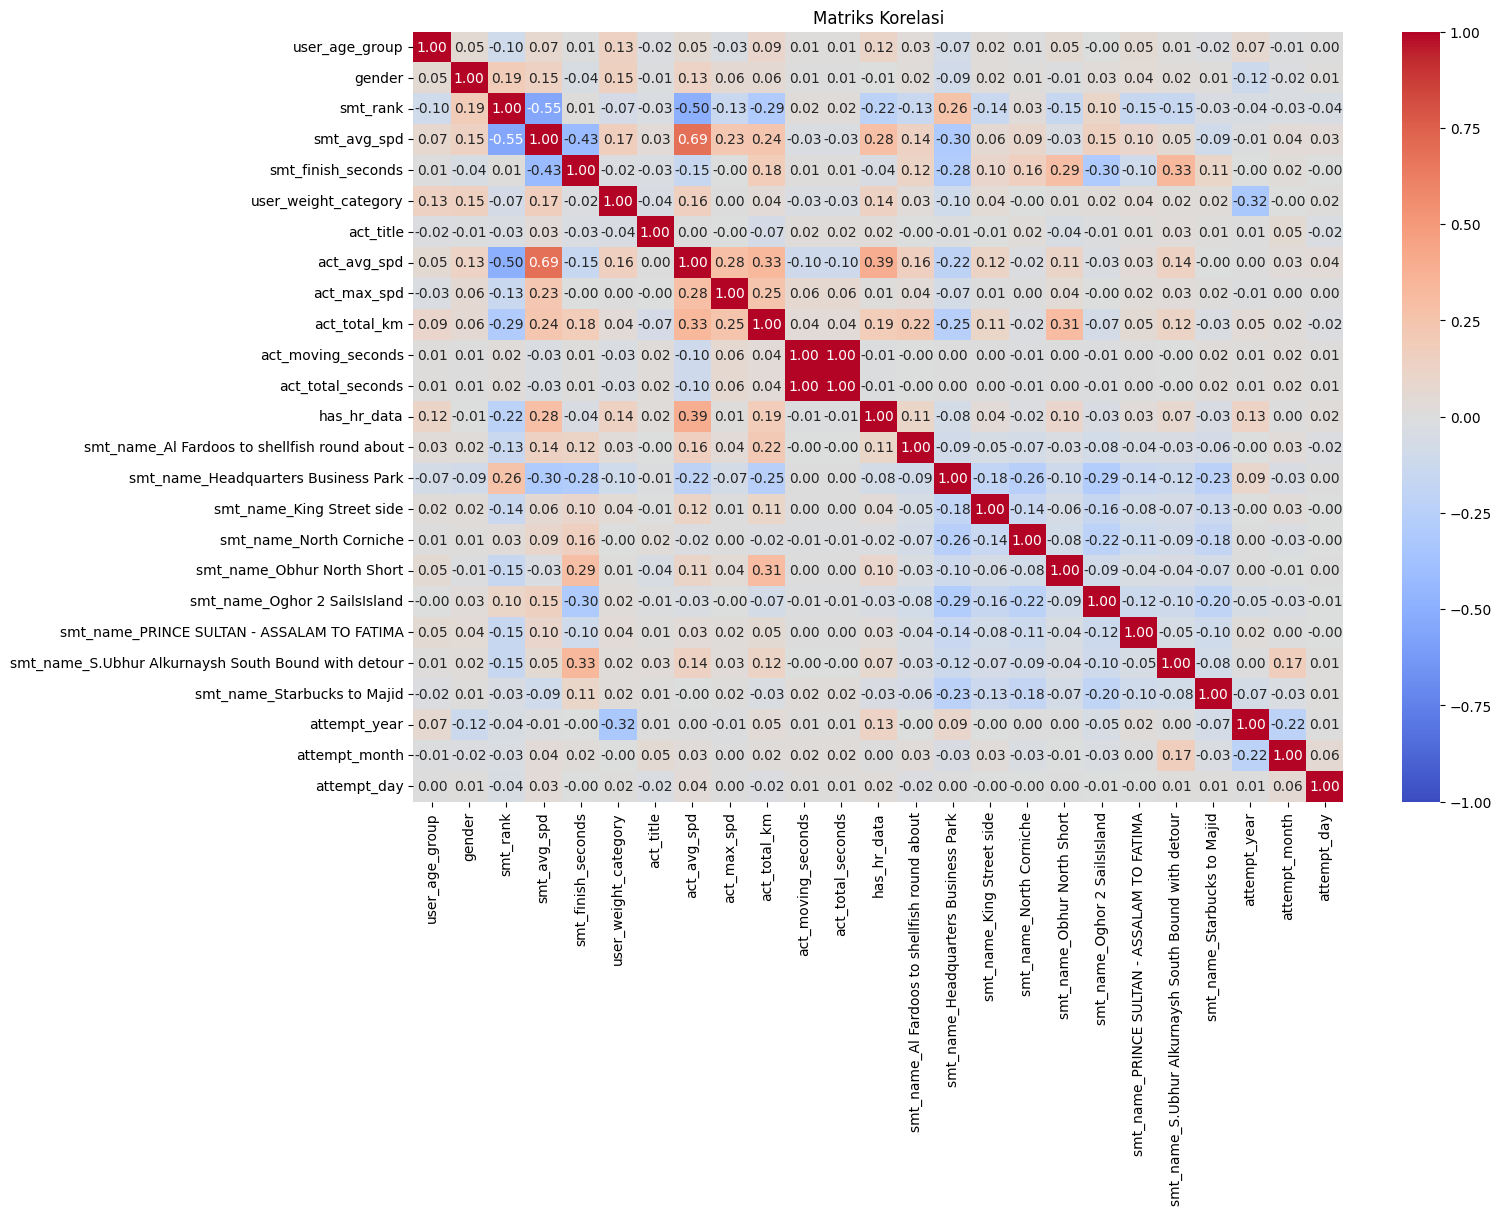

In [1181]:
matriks_korelasi = pd.DataFrame(df_clust_scaled, columns=df_clust.columns).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(matriks_korelasi, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriks Korelasi')
plt.show()

In [1182]:
varians = df_clust.var().sort_values(ascending=False)
print(varians)

act_moving_seconds                                     4.656018e+10
act_total_seconds                                      4.656018e+10
smt_finish_seconds                                     1.866023e+05
smt_rank                                               3.009798e+04
act_total_km                                           7.295827e+02
act_max_spd                                            2.908846e+02
attempt_day                                            7.525260e+01
smt_avg_spd                                            7.136972e+01
act_avg_spd                                            3.424061e+01
attempt_month                                          1.501286e+01
user_weight_category                                   4.137421e+00
attempt_year                                           2.425878e+00
user_age_group                                         1.176589e+00
smt_name_Headquarters Business Park                    1.852846e-01
smt_name_Oghor 2 SailsIsland                    

Berdasarkan matriks korelasi dan varians yang diberikan, kita akan memilih 3 kolom untuk tujuan clustering dengan mempertimbangkan beberapa hal:

1. Korelasi: Hindari kolom yang terlalu berkorelasi tinggi satu sama lain untuk mencegah redundansi.
2. Varians: Pilih kolom dengan varians tinggi karena kolom ini memberikan lebih banyak informasi untuk clustering.
3. Relevansi: Pastikan kolom yang dipilih relevan dengan tujuan clustering.

Kolom dengan varians tertinggi adalah:
- `act_moving_seconds` (4.656018e+10)
- `act_total_seconds` (4.656018e+10)
- `smt_finish_seconds` (1.866023e+05)
Namun, `act_moving_seconds` dan `act_total_seconds` sangat berkorelasi (nilai korelasi = 1.00). Kita hanya perlu memilih salah satu dari keduanya.

Berdasarkan analisis di atas, berikut adalah kolom yang dipilih:

1. `act_moving_seconds`: Varians tinggi dan memberikan informasi tentang waktu aktivitas.
2. `smt_avg_spd`: Informasi tentang kecepatan rata-rata dan tidak terlalu berkorelasi dengan act_moving_seconds.
3. `smt_finish_seconds`: Menyumbang informasi tambahan tentang waktu yang dibutuhkan untuk menyelesaikan segment.

In [1183]:
from sklearn.cluster import AgglomerativeClustering

# Membuat model sementara untuk divisualisasikan
agglomerative = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
cluster_assignment = agglomerative.fit(df_clust_scaled)

cluster_assignment.labels_

array([5886, 6206, 3775, ...,    6,    2,    0])

In [1184]:
import scipy.cluster.hierarchy as shc

# Fungsi untuk menampilkan dendogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot dendogram yang dihasilkan
    shc.dendrogram(linkage_matrix, **kwargs)

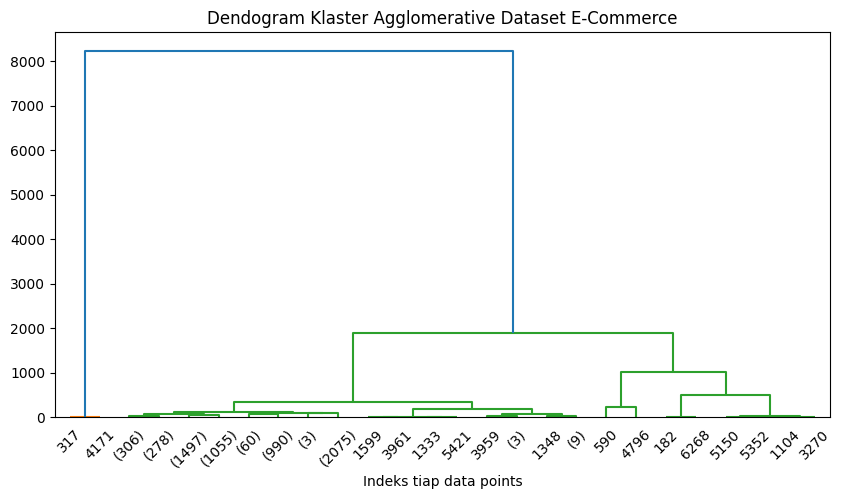

In [1185]:
plt.figure(figsize=(10, 5))
plt.grid(False)
plot_dendrogram(agglomerative, truncate_mode='level', p=5)  # Hanya tampilkan 5 level teratas
plt.title("Dendogram Klaster Agglomerative Dataset E-Commerce")
plt.xlabel("Indeks tiap data points")
plt.show()

Dendrogram menunjukkan bahwa dataset CSL dapat dikelompokkan menjadi **dua klaster besar** berdasarkan jarak dissimilarity yang sangat tinggi. Namun, terdapat beberapa sub-klaster yang lebih kecil dengan jarak dissimilarity rendah, yang menunjukkan adanya kemiripan antar data dalam kelompok tersebut. Secara keseluruhan.

In [1186]:
# Definisikan model dengan hasil visualisasi sebelumnya
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward')
clustering = agglomerative.fit_predict(df_clust)

In [1187]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_clust_scaled, clustering)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.9985486049925366


In [1188]:
# Append hasil clustering ke dataframe
df_with_clusters_agg = pd.DataFrame(df_clust.copy())
df_with_clusters_agg['cluster'] = clustering
df_with_clusters_agg.head()

user_age_group  gender  smt_rank  smt_avg_spd  smt_finish_seconds  \
0               2       2       712         15.8               382.0   
1               2       2       189         33.2               216.0   
2               2       2       264         23.7               593.0   
3               2       2        50         33.4               817.0   
4               2       1        19         21.3               284.0   

   user_weight_category  act_title  act_avg_spd  act_max_spd  act_total_km  \
0                     0   0.134058         13.6         34.9         19.24   
1                     6   0.134058         21.5         43.2         23.47   
2                     3   0.281961         26.7         92.9         38.23   
3                     3   0.092668         31.4         54.4         65.77   
4                     0   0.000424         19.9         43.2         96.53   

   ...  smt_name_North Corniche  smt_name_Obhur North Short  \
0  ...                    False                       False   
1  ...                    False                       False   
2  ...                    False                       False   
3  ...                    False                       False   
4  ...                    False                       False   

   smt_name_Oghor 2 SailsIsland  smt_name_PRINCE SULTAN - ASSALAM TO FATIMA  \
0                         False                                       False   
1                          True                                       False   
2                         False                                       False   
3                         False                                       False   
4                         False                                       False   

   smt_name_S.Ubhur Alkurnaysh South Bound with detour  \
0                                              False     
1                                              False     
2                                              False     
3                                              False     
4                                              False     

   smt_name_Starbucks to Majid  attempt_year  attempt_month  attempt_day  \
0                        False          2017             12           22   
1                        False          2015              4           13   
2                         True          2018              2            7   
3                        False          2018              8           24   
4                        False          2020              3            6   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 26 columns]

In [1189]:

fig = px.scatter_3d(
    df_with_clusters_agg,
    x='act_moving_seconds',
    y='smt_avg_spd',
    z='smt_finish_seconds',
    color='cluster',  # Warna berdasarkan cluster
    title='3D Cluster Visualization with 2 Clusters',
    labels={'cluster': 'Cluster'},  # Label untuk legenda
    opacity=0.8,
    width=800,  # Lebar plot
    height=800  # Tinggi plot (sama dengan lebar untuk persegi)
)

fig.show()





Berdasarkan visualisasi clustering dengan 2 klaster diatas menggunakan **Agglomerative Clustering**:

1. **Pembagian Klaster**:
   - Terdapat dua klaster yang terlihat jelas, dengan sebagian besar data berada dalam klaster **biru**.
   - Klaster **kuning** terdiri dari sejumlah kecil data yang memiliki karakteristik unik.

2. **Insight Klaster Kuning**:
   - Data dalam klaster ini memiliki nilai **smt_avg_spd** yang jauh lebih tinggi dibandingkan klaster lainnya.
   - Ini menunjukkan bahwa klaster kuning mewakili outliers atau kelompok khusus dengan performa kecepatan diatas rata-rata.

3. **Insight Klaster Biru**:
   - Sebagian besar data dalam klaster biru memiliki distribusi yang lebih terpusat pada **act_moving_seconds** dan **smt_finish_seconds**, dengan kecepatan rata-rata yang relatif lebih rendah.
